
# Face recognition with non-linear eigenfaces 

### Data: ["Labeled Face in the Wild"](http://vis-www.cs.umass.edu/lfw/index.html)

In [1]:
# basic imports
from time import time #to compute runtimes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Get Data


In [2]:
from sklearn.datasets import fetch_lfw_people #data is part of Scikit Learn

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) #get data - take some time

In [3]:
# get data shapes
n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

1288 50 37


In [4]:
# get data and labels
X = lfw_people.data #data
y = lfw_people.target #labels

In [5]:
n_features = X.shape[1] #get size of images
print("number of pixels per image:", n_features)

target_names = lfw_people.target_names #get unique IDs of people
n_classes = target_names.shape[0]

print("names of people", target_names)
print("number of people in DB:", n_classes)

number of pixels per image: 1850
names of people ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
number of people in DB: 7


Text(0.5, 1.0, 'George W Bush')

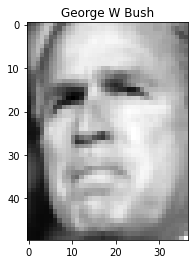

In [6]:
#vis example
plt.gray()
plt.imshow(X[12,:].reshape(h,w))
plt.title(target_names[y[12]])

## ML Model

### Task 1: Split in test and train set
* 20% test - 80% train -> use SKL split function!

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task 1: Apply Kernel-PCA to train data
* Plot Eigenvalues (explained variance) and find cut-off 
* Project all data (train+test) to Eigen-Face-Space

HINT: use *whitenig* in the PCA -> normalization of the components

-> see [https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA()
pca.fit(X)

PCA()

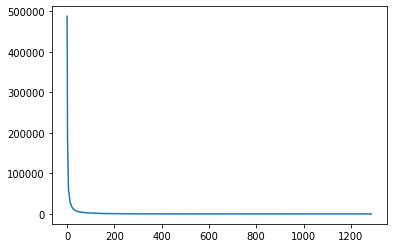

In [10]:
#plot Eigen-Values
plt.plot(pca.explained_variance_)

In [11]:
pca = PCA(n_components=150, whiten=False)#set cut-off to 200
pca.fit(X)

PCA(n_components=150)

In [12]:
#project
train_pca = pca.transform(X_train)
test_pca = pca.transform(X_test)

In [13]:
np.savetxt("output.tsv", train_pca, delimiter="\t")

In [14]:
np.savetxt("label.tsv", y_train, delimiter="\t")

### Task 2: Visualize Faces in kernel-PCA space with Tensorflow projector 
* upload data (original data and in kPCA space) and lables
* use images or different colors for different people


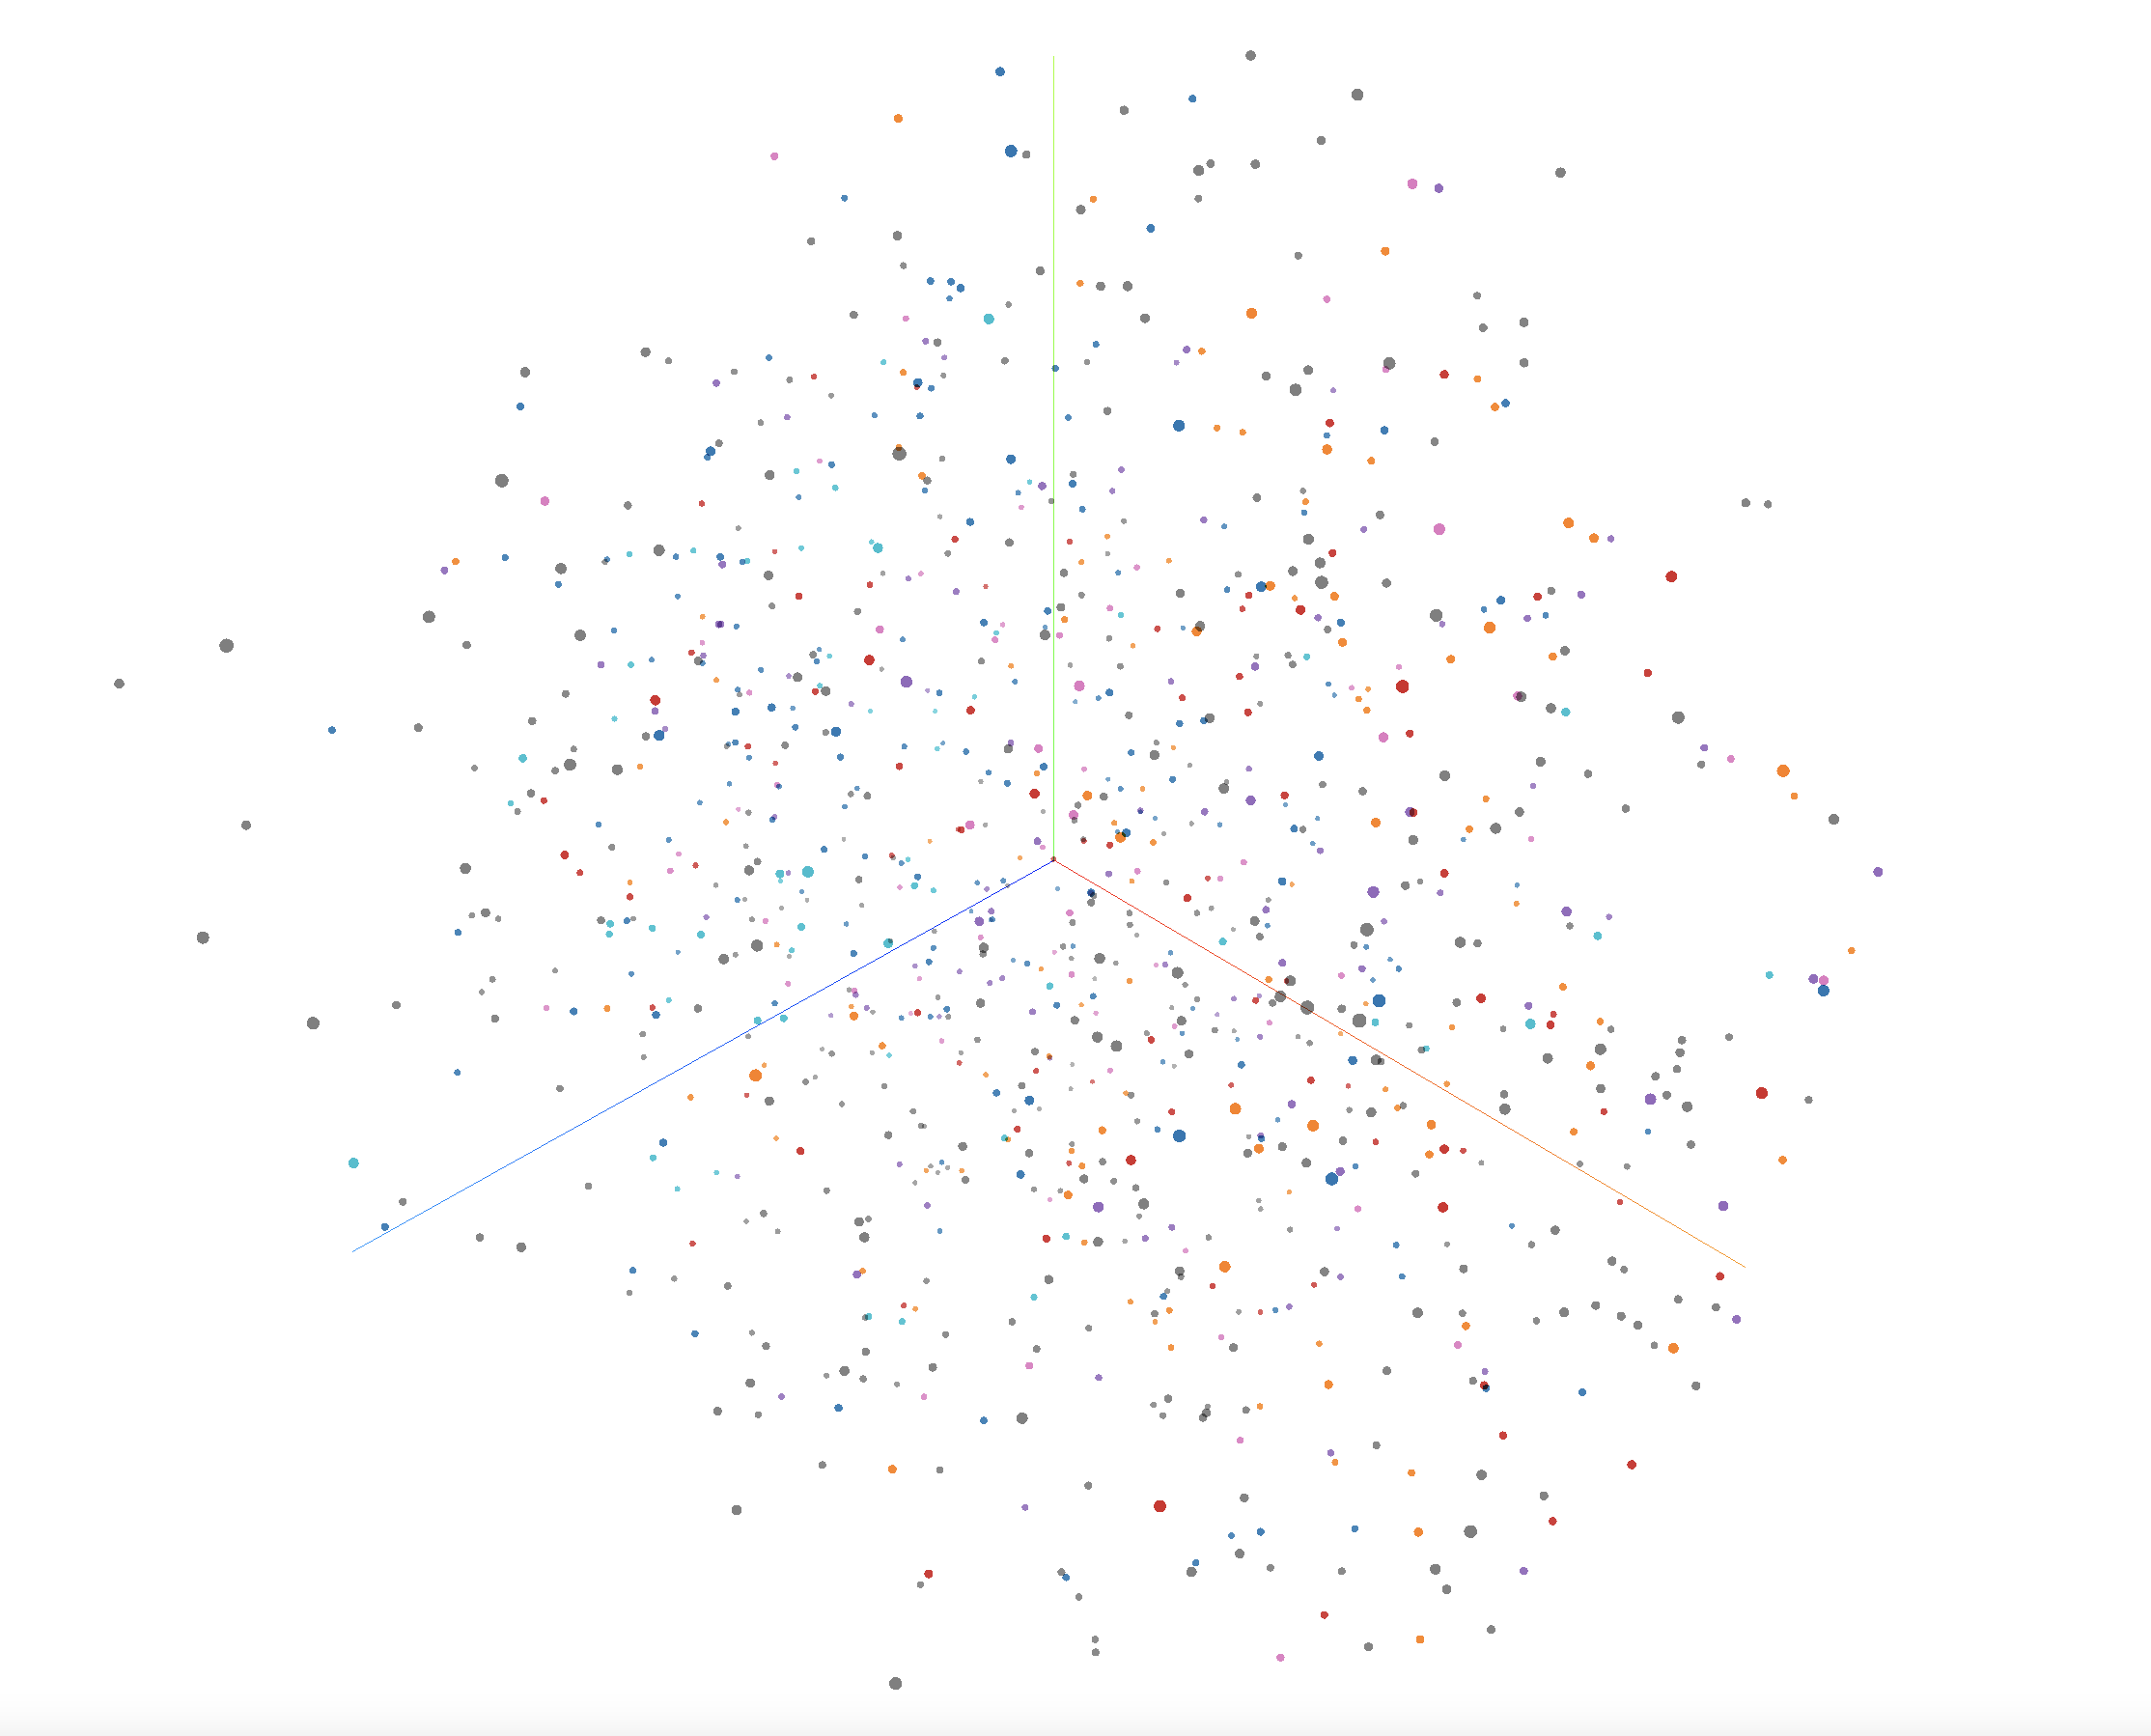

In [15]:
from IPython import display
from base64 import b64decode

base64_data = "iVBORw0KGgoAAAANSUhEUgAACLQAAAcGCAYAAAAVq2uHAAAMaGlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnluSkJDQAhGQEnoTpFcpIbQIAlIFGyEJJJQYE4KKXVlUcO0iihUroujqCsiiIvayKPa+WFBR1sWCoqi8SQFd95XvnXxz588/Z067M/feAUC7lyuR5KE6AOSLC6QJkaHMMWnpTFIHIMAfDbbhXJ5MwoqPjwFQBvq/y/sbAFH0V50Vtv45/l9Fjy+Q8QBAxkGcyZfx8iFuBgBfz5NICwAgKnirKQUSBZ4Dsb4UBgjxKgXOVuFdCpypwk1KnaQENsSXAdCgcrnSbAC07kGeWcjLhna0PkPsKuaLxABoD4M4iCfk8iFWxD4sP3+SAldAbA/1JRDDeIBv5nc2s/9mP3PQPpebPYhVeSlFI0wkk+Rxp/2fpfnfkp8nH/BhCxtVKI1KUOQPa3grd1K0AlMh7hJnxsYpag1xr4ivqjsAKEUoj0pW6aMmPBkb1g8wIHblc8OiITaBOEKcFxuj5jOzRBEciOFqQaeKCjhJEBtCvFAgC09U62yWTkpQ+0LrsqRslpo/y5Uq/Sp8PZDnJrPU9t8IBRy1fUyrSJiUCjEFYutCUUosxFoQu8hyE6PVOiOKhOzYAR2pPEERvzXECQJxZKjKPlaYJY1IUOuX5ssG8sU2C0WcWDU+UCBMilLVBzvJ4yrjh7lglwViVvKAHYFsTMxALnxBWLgqd+y5QJycqLbTKykITVDNxSmSvHi1Pm4pyItU8JYQe8oKE9Vz8ZQCuDhV9vEsSUF8kipOvCiHOzJeFQ++DMQANggDTCCHLRNMAjlA1NpV3wX/qUYiABdIQTYQAGc1MzAjVTkihtdEUAT+hEgAZIPzQpWjAlAI+S+DrOrqDLKUo4XKGbngKcT5IBrkwf9y5SzxoLcU8AQyon9458LGg/HmwaYY//f8APuNYUEmRs3IBzwytQc0ieHEMGIUMYLogBvjQXgAHgOvIbC5476430Ae3/QJTwlthEeE64R2wu2JonnSH6IcBdqh/Qh1LTK/rwVuC2164aF4ILQOLeMM3Bg4457QDwsPhp69IMtWx62oCvMH23/L4Lu7odYju5JR8hByCNn+x5lajlpeg1YUtf6+PqpYMwfrzR4c+dE/+7vq82Ef/aMmthA7iJ3BjmPnsCasHjCxY1gDdhE7osCDq+uJcnUNeEtQxpML7Yj+4Y+r9qmopMy1xrXT9bNqrEAwtUCx8diTJNOkomxhAZMF3w4CJkfMcxnGdHd1dwNA8a5RPb7eMpTvEIRx/hs33weAwOL+/v6mb1z0dgAOpsHtf+0bZ/cRPqOtADi7kSeXFqo4XHEhwKeENtxpRsAMWAF7mI878AYBIASEg5EgDiSBNDABVlkI17kUTAEzwFxQAsrAMrAarAObwFawC+wFB0A9aALHwWlwAVwG18FduHo6wEvQDd6DPgRBSAgNoSNGiDligzgh7ogvEoSEIzFIApKGZCDZiBiRIzOQ+UgZsgJZh2xBqpFfkMPIceQc0obcRh4incgb5BOKoVRUHzVFbdHhqC/KQqPRJHQ8mo1ORovQYnQJWoFWoXvQOvQ4egG9jrajL9EeDGCaGAOzwJwxX4yNxWHpWBYmxWZhpVg5VoXVYo3wPl/F2rEu7CNOxOk4E3eGKzgKT8Z5+GR8Fr4YX4fvwuvwk/hV/CHejX8l0AgmBCeCP4FDGEPIJkwhlBDKCTsIhwin4F7qILwnEokMoh3RB+7FNGIOcTpxMXEDcR+xmdhGfEzsIZFIRiQnUiApjsQlFZBKSGtJe0jHSFdIHaReDU0Ncw13jQiNdA2xxjyNco3dGkc1rmg80+gj65BtyP7kODKfPI28lLyN3Ei+RO4g91F0KXaUQEoSJYcyl1JBqaWcotyjvNXU1LTU9NMcrSnSnKNZoblf86zmQ82PVD2qI5VNHUeVU5dQd1Kbqbepb2k0mi0thJZOK6AtoVXTTtAe0Hq16FouWhwtvtZsrUqtOq0rWq+0ydo22iztCdpF2uXaB7UvaXfpkHVsddg6XJ1ZOpU6h3Vu6vTo0nXddON083UX6+7WPaf7XI+kZ6sXrsfXK9bbqndC7zEdo1vR2XQefT59G/0UvUOfqG+nz9HP0S/T36vfqt9toGfgaZBiMNWg0uCIQTsDY9gyOIw8xlLGAcYNxqchpkNYQwRDFg2pHXJlyAfDoYYhhgLDUsN9htcNPxkxjcKNco2WG9Ub3TfGjR2NRxtPMd5ofMq4a6j+0IChvKGlQw8MvWOCmjiaJJhMN9lqctGkx9TMNNJUYrrW9IRplxnDLMQsx2yV2VGzTnO6eZC5yHyV+THzF0wDJouZx6xgnmR2W5hYRFnILbZYtFr0WdpZJlvOs9xned+KYuVrlWW1yqrFqtva3HqU9QzrGus7NmQbXxuhzRqbMzYfbO1sU20X2NbbPrcztOPYFdnV2N2zp9kH20+2r7K/5kB08HXIddjgcNkRdfRyFDpWOl5yQp28nUROG5zahhGG+Q0TD6sadtOZ6sxyLnSucX7ownCJcZnnUu/yarj18PThy4efGf7V1cs1z3Wb6103PbeRbvPcGt3euDu689wr3a950DwiPGZ7NHi89nTyFHhu9LzlRfca5bXAq8Xri7ePt9S71rvTx9onw2e9z01ffd9438W+Z/0IfqF+s/2a/D76e/sX+B/w/yvAOSA3YHfA8xF2IwQjto14HGgZyA3cEtgexAzKCNoc1B5sEcwNrgp+FGIVwg/ZEfKM5cDKYe1hvQp1DZWGHgr9wPZnz2Q3h2FhkWGlYa3heuHJ4evCH0RYRmRH1ER0R3pFTo9sjiJERUctj7rJMeXwONWc7pE+I2eOPBlNjU6MXhf9KMYxRhrTOAodNXLUylH3Ym1ixbH1cSCOE7cy7n68Xfzk+N9GE0fHj64c/TTBLWFGwplEeuLExN2J75NCk5Ym3U22T5Ynt6Rop4xLqU75kBqWuiK1fczwMTPHXEgzThOlNaST0lPSd6T3jA0fu3psxzivcSXjboy3Gz91/LkJxhPyJhyZqD2RO/FgBiEjNWN3xmduHLeK25PJyVyf2c1j89bwXvJD+Kv4nYJAwQrBs6zArBVZz7MDs1dmdwqDheXCLhFbtE70OicqZ1POh9y43J25/XmpefvyNfIz8g+L9cS54pOTzCZNndQmcZKUSNon+09ePblbGi3dIUNk42UNBfrwo/6i3F7+k/xhYVBhZWHvlJQpB6fqThVPvTjNcdqiac+KIoq2T8en86a3zLCYMXfGw5msmVtmIbMyZ7XMtppdPLtjTuScXXMpc3Pn/j7Pdd6Kee/mp85vLDYtnlP8+KfIn2pKtEqkJTcXBCzYtBBfKFrYushj0dpFX0v5pefLXMvKyz4v5i0+/7PbzxU/9y/JWtK61HvpxmXEZeJlN5YHL9+1QndF0YrHK0etrFvFXFW66t3qiavPlXuWb1pDWSNf014RU9Gw1nrtsrWf1wnXXa8Mrdy33mT9ovUfNvA3XNkYsrF2k+mmsk2fNos239oSuaWuyraqfCtxa+HWp9tStp3Z7ru9eofxjrIdX3aKd7bvSth1stqnunq3ye6lNWiNvKZzz7g9l/eG7W2oda7dso+xr2w/2C/f/+KXjF9uHIg+0HLQ92Dtrza/rj9EP1Rah9RNq+uuF9a3N6Q1tB0eebilMaDx0G8uv+1ssmiqPGJwZOlRytHio/3Hio71NEuau45nH3/cMrHl7okxJ66dHH2y9VT0qbOnI06fOMM6c+xs4Nmmc/7nDp/3PV9/wftC3UWvi4d+9/r9UKt3a90ln0sNl/0uN7aNaDt6JfjK8athV09f41y7cD32etuN5Bu3bo672X6Lf+v57bzbr+8U3um7O+ce4V7pfZ375Q9MHlT94fDHvnbv9iMPwx5efJT46O5j3uOXT2RPPncUP6U9LX9m/qz6ufvzps6Izssvxr7oeCl52ddV8qfun+tf2b/69a+Qvy52j+nueC193f9m8Vujtzvfeb5r6YnvefA+/33fh9Jeo95dH30/nvmU+ulZ35TPpM8VXxy+NH6N/nqvP7+/X8KVcpWfAhhsaFYWAG92AkCD3w50eG6jjFWdBZWCqM6vSgT+E1adF5XiDUAt7BSf8exmAPbDZjtHeVQBik/4pBCAengMNrXIsjzcVbao8CRE6O3vf2sKAKkRgC/S/v6+Df39X7bBYG8D0DxZdQZVCBGeGTaHKdDtlePngB9EdT79Lscfe6CIwBP82P8LM4uPjZBMR1MAAACKZVhJZk1NACoAAAAIAAQBGgAFAAAAAQAAAD4BGwAFAAAAAQAAAEYBKAADAAAAAQACAACHaQAEAAAAAQAAAE4AAAAAAAAAkAAAAAEAAACQAAAAAQADkoYABwAAABIAAAB4oAIABAAAAAEAAAi0oAMABAAAAAEAAAcGAAAAAEFTQ0lJAAAAU2NyZWVuc2hvdDvJm3UAAAAJcEhZcwAAFiUAABYlAUlSJPAAAAHYaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA2LjAuMCI+CiAgIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIj4KICAgICAgICAgPGV4aWY6UGl4ZWxZRGltZW5zaW9uPjE3OTg8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFhEaW1lbnNpb24+MjIyODwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlVzZXJDb21tZW50PlNjcmVlbnNob3Q8L2V4aWY6VXNlckNvbW1lbnQ+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgp/5qVWAAAAHGlET1QAAAACAAAAAAAAA4MAAAAoAAADgwAAA4MAARYSEkNr1gAAQABJREFUeAHs3cuPLNd92PG2MWvTQNZZxhC81CYSBAOSI8lw5McwsRLLeTjOyxIoMxRAkfdqZkiK917xkiIgWg9ITpw4zsNSIiUcv2JYUiwBBmFl42VgOP9EmPUgCetKp9nTXdX16DpV5/HhQtVdU111zufX0OqLvj/0/976b+M/AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAokI/JCgJZFJWAYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMAjAUGLLwIBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBSAoKWpMZhMQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAoIW3wECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGkBAQtSY3DYggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAQtvgMECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJJCQhakhqHxRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECAhafAcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSSEhC0JDUOiyFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEBC0+A4QIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgkJSBoSWocFkOAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQICBo8R0gQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBISkDQktQ4LIYAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQEDQ4jtAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECCQlICgJalxWAwBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgICgxXeAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgKQFBS1LjsBgCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAFBi+8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAUgKClqTGYTEECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKCFt8BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBpAQELUmNw2IIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQELb4DBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECSQkIWpIah8UQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgIWnwHCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEkhIQtCQ1DoshQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAQtPgOECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIJCUgaElqHBZDgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAgaPEdIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQSEpA0JLUOCyGAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBA0OI7QIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkJSAoCWpcVgMAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQICAoMV3gAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAICkBQUtS47AYAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABQYvvAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFICgpakxmExBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECghbfAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgaQEBC1JjcNiCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEBC2+AwQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAkkJCFqSGofFECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQICFp8BwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBJISELQkNQ6LIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQELT4DhAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECCQlIGhJahwWQ4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgIGjxHSBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEEhKQNCS1DgshgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAQNDiO0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJCUgKAlqXFYDAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAgKDFd4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCApAUFLUuOwGAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAUGL7wABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBSAoKWpMZhMQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAoIW3wECBAgQIECAAAECBAgQIECAAAECBA4E7t27tz13dXW1fe0FAQIECBAgQIAAAQIECBBYQkDQsoSyZxAgQIAAAQIECBAgQIAAAQIECBDIRGA3ZNlfsrBlX8R7AgQIECBAgAABAgQIEIglIGiJJeu+BAgQIECAAAECBAgQIECAAAECBDITOBazhK2IWoKEIwECBAgQIECAAAECBAjEFBC0xNR1bwIECBAgQIAAAQIECBAgQIAAAQIZCQhaMhqWpRIgQIAAAQIECBAgQKBwAUFL4QO2PQIECBAgQIAAAQIECBAgQIAAAQJDBIbELOE+fqUlSDgSIECAAAECBAgQIECAQCwBQUssWfclQIAAAQIECBAgQIAAAQIECBAgkJGAoCWjYVkqAQIECBAgQIAAAQIEKhAQtFQwZFskQIAAAQIECBAgQIAAAQIE3hb4g5vHNz9z9vrbJ7wiQOCRgKDFF4EAAQIECBAgQIAAAQIEUhIQtKQ0DWshQIAAAQIECBAgQIAAAQIEogsIWqITe0DGAkOiFv/cUMYDtnQCBAgQIECAAAECBAhkJCBoyWhYlkqAAAECBAgQIECAAAECBAicLiBoOd3QHcoVELSUO1s7I0CAAAECBAgQIECAQG4CgpbcJma9BAgQIECAAAECBAgQIECAwEkCgpaT+Hy4AoFjUYtfZ6ngC2CLBAgQIECAAAECBAgQSERA0JLIICyDAAECBAgQIECAAAECBAgQWEZA0LKMs6fkL7AbtghZ8p+nHRAgQIAAAQIECBAgQCA3AUFLbhOzXgIECBAgQIAAAQIECBAgQOAkgd+/eXzzs2evn3QPHyZAgAABAgQIECBAgAABAgQIEIgrIGiJ6+vuBAgQIECAAAECBAgQIECAQGICgpbEBmI5BAgQIECAAAECBAgQIECAAIEWAUFLC4pTBAgQIECAAAECBAgQIECAQLkCgpZyZ2tnBAgQIECAAAECBAgQIECAQDkCgpZyZmknBAgQIECAAAECBAgQIECAwAABQcsAJJcQIECAAAECBAgQIECAAAECBFYWELSsPACPJ0CAAAECBAgQIECAAAECBJYVELQs6+1pBAgQIECAAAECBAgQIECAAIEpAoKWKWo+Q4AAAQIECBAgQIAAAQIECGQrIGjJdnQWToAAAQIECBAgQIAAAQIECFQkIGipaNi2SoAAAQIECBAgQIAAAQIEhgi89+L3Hl323Qc/N+Ty7K4RtGQ3MgsmQIAAAQIECBAgQIAAAQIEKhQQtFQ4dFsmQIAAAQIECBAgQIAAAQJtAiFk2f9baWGLoGV/wt4TIECAAAECBAgQIECAAAECBNITELSkNxMrIkCAAAECBAgQIECAAAECiwt0xSxhISVFLb938/jm585eD1tzJECAAAECBAgQIECAAAECBAgQSFBA0JLgUCyJAAECBAgQIECAAAECBAgsKdAXszRrEbQsORHPIkCAAAECBAgQIECAAAECBAgQELT4DhAgQIAAAQIECBAgQIAAgcoFhgQtDVEpUYtfaKn8C2/7BAgQIECAAAECBAgQIECAQBYCgpYsxmSRBAgQIECAAAECBAgQIEAgnoCgJZ6tOxMgQIAAAQIECBAgQIAAAQIECEwTELRMc/MpAgQIECBAgAABAgQIECBQjICgpZhR2ggBAgQIECBAgAABAgQIECBAoBgBQUsxo7QRAgQIECBAgAABAgQIECAwXaAvainlnxtqhPyTQ9O/Jz5JgAABAgQIECBAgAABAgQIEFhKQNCylLTnECBAgAABAgQIECBAgACBhAUELQkPx9IIECBAgAABAgQIECBAgAABAhUKCFoqHLotEyBAgAABAgQIECBAgACBLoH9sKWkX2YJe/YLLUHCkQABAgQIECBAgAABAgQIECCQroCgJd3ZWBkBAgQIECBAgAABAgQIECAQQUDQEgHVLQkQIECAAAECBAgQIECAAAECMwsIWmYGdTsCBAgQIECAAAECBAgQIEAgbQFBS9rzsToCBAgQIECAAAECBAgQIECAQCMgaPE9IECAAAECBAgQIECAAAECBKoSELRUNW6bJUCAAAECBAgQIECAAAECBDIVELRkOjjLJkCAAAECBAgQIECAAAECBKYJCFqmufkUAQIECBAgQIAAAQIECBAgQGBJAUHLktqeRYAAAQIECBAgQIAAAQIECKwuIGhZfQQWQIAAAQIECBAgQIAAAQIECBDoFRC09BK5gAABAgQIECBAgAABAgQIEChJQNBS0jTthQABAgQIECBAgAABAgQIEChVQNBS6mTtiwABAgQIECBAgAABAgQIEGgVELS0sjhJgAABAgQIECBAgAABAgQIEEhKQNCS1DgshgABAgQIECBAgAABAgQIEIgtIGiJLez+BAgQIECAAAECBAgQIECAAIHTBQQtpxu6AwECBAgQIECAAAECBAgQIJCRgKAlo2FZKgECBAgQIECAAAECBAgQIFCtgKCl2tHbOAECBAgQIECAAAECBAgQqFPgd28e3/z82et1bt6uCRAgQIAAAQIECBAgQIAAAQKZCAhaMhmUZRIgQIAAAQIECBAgQIAAAQLzCAha5nF0FwIECBAgQIAAAQIECBAgQIBATAFBS0xd9yZAgAABAgQIECBAgAABAgSSExC0JDcSCyJAgAABAgQIECBAgAABAgQIHAgIWg5InCBAgAABAgQIECBAgAABAgRKFhC0lDxdeyNAgAABAgQIECBAgAABAgRKERC0lDJJ+yBAgAABAgQIECBAgAABAgQGCQhaBjG5iACBDAVeeOGF1lV3nW+92EkCBAgQIECAAAECBAgkIiBoSWQQlkGAAAECBAgQIECAAAECBAgsIyBoWcbZUwgQWFagL1rp+/uyq/U0AgQIECBAgAABAgQI9AsIWvqNXEGAAAECBAgQIECAAAECBAgUJCBoKWiYtkKAwCOBobHK0OuwEiBAgAABAgQIECBAIAUBQUsKU7AGAgQIECBAgAABAgQIECBAYDEBQcti1B5EgMACAmMjlbHXL7AFjyBAgAABAgQIECBAgECrgKCllcVJAgQIECBAgAABAgQIECBAoFSB65vHN+dnr5e6PfsiQKAygbGBytjrK+O0XQIECBAgQIAAAQIEEhIQtCQ0DEshQIAAAQIECBAgQIAAAQIE4gsIWuIbewIBAssJjA1Uxl6/3E48iQABAgQIECBAgAABArcFBC23PbwjQIAAAQIECBAgQIAAAQIEChcQtBQ+4Ijb++Cn/3B7928+/6Htay8IrCkwNlAZe/2ae/NsAgQIECBAgAABAgTqFhC01D1/uydAgAABAgQIECBAgAABAtUJCFqqG/nJG94NWXZvJmrZ1fB6LYGxgcrY69fal+cSIECAAAECBAgQIEBA0OI7QIAAAQIECBAgQIAAAQIECFQlIGipatyzbLYraGluLmqZhdhNThAYG6iMvf6EpfkoAQIECBAgQIAAAQIEThIQtJzE58MECBAgQIAAAQIECBAgQIBAbgKCltwmtu56j8UszcoELevOx9O/LzA0Uhl6HVcCBAgQIECAAAECBAikICBoSWEK1kCAAAECBAgQIECAAAECBAgsJiBoWYy6iAcJWooYYxWbGBKrDLmmCiybJECAAAECBAgQIEAgCwFBSxZjskgCBAgQIECAAAECBAgQIEBgLgFBy1ySddxH0FLHnEvZ5bFg5djfStm/fRAgQIAAAQIECBAgUJaAoKWsedoNAQIECBAgQIAAAQIECBAg0CMgaOkB8ucDgWNRi39y6IDLCQIECBAgQIAAAQIECBAgMIuAoGUWRjchQIAAAQIECBAgQIAAAQIEchEQtOQyqbTW2Ra1iFnSmpHVECBAgAABAgQIECBAgEBZAoKWsuZpNwQIECBAgAABAgQIECBAgECPgKClB8ifCRAgQIAAAQIECBAgQIAAAQIJCAhaEhiCJRAgQIAAAQIECBAgQIAAAQLLCQhalrP2JAIECBAgQIAAAQIECBAgQIDAVAFBy1Q5nyNAgAABAgQIECBAgAABAgSyFBC0ZDk2iyZAgAABAgQIECBAgAABAgQqExC0VDZw2yVAgAABAgQIECBAgAABArULCFr6vwEPHjzYXFxc9F/oCgIECBAgQIAAAQIECBAgQIBAJAFBSyRYtyVAgAABAgQIECBAgAABAgTSFBC0tM+liVja/hO2tKk4R4AAAQIECBAgQIAAAQIECMQWELTEFnZ/AgQIECBAgAABAgQIECBAICkBQcvhOLpilnClqCVIOBIgQIAAAQIECBAgQIAAAQJLCQhalpL2HAIECBAgQIAAAQIECBAgQCAJgddvzjePn10nsZZUFtEXtDTrFLWkMi3rIECAAAECBAgQIECAAAECdQgIWuqYs10SIECAAAECBAgQIECAAAECPxAQtBx+FQQthybOECBAgAABAgQIECBAgAABAusKCFrW9fd0AgQIECBAgAABAgQIECBAYGEBQcshuKDl0MQZAgQIECBAgAABAgQIECBAYF0BQcu6/p5OgAABAgQIECBAgAABAgQILCwgaDkEF7QcmjhDgAABAgQIECBAgAABAgQIrCsgaFnX39MJECBAgAABAgQIECBAgACBhQUELYfggpZDE2cIECBAgAABAgQIECBAgACBdQUELev6ezoBAgQIECBAgAABAgQIECCwsICgpR38WNRycXHR/iFnCRAgQIAAAQIECBAgQIAAAQKRBAQtkWDdlgABAgQIECBAgAABAgQOBd589T3bk489/cb2tRcElhQQtHRr70ctQpZuK38hQIAAAQIECBAgQIAAAQIE4goIWuL6ujsBAgQIECBAgAABAgQIvCWwG7Lsgwhb9kW8jy0gaIkt7P4ECBAgQIAAAQIECBAgQIAAgdMFBC2nG7oDAQIECBAgQIAAAQIECBwROBazNB8TtBzB86coAv/15nzzt86uo9zbTQkQIECAAAECBAgQIECAAAECBOYRELTM4+guBAgQIECAAAECBAgQINAh0Be0NB8TtXTgOR1FQNAShdVNCRAgQIAAAQIECBAgQIAAAQKzCghaZuV0MwIECBAgQIAAAQIECBDYFxC07It4v7aAoGXtCXg+AQIECBAgQIAAAQIECBAgQKBfQNDSb+QKAgQIECBAgAABAgQIEDhBQNByAp6PRhEQtERhdVMCBAgQIECAAAECBAgQIECAwKwCgpZZOd2MAAECBAgQIECAAAECBPYFBC37It6vLSBoWXsCnk+AAAECBAgQIECAAAECBAgQ6BcQtPQbuYIAAQIECBAgQIAAAQIEThQ4FrU89vQbJ97dxwmMExC0jPNyNQECBAgQIECAAAECBAgQIEBgDQFByxrqnkmAAAECBAgQIECAAIEKBdqiFjFLhV+EBLYsaElgCJZAgAABAgQIECBAgAABAgQIEOgRELT0APkzAQIECBAgQIAAAQIECBAgUJaAoKWsedoNAQIECBAgQIAAAQIECBAgUKaAoKXMudoVAQIECBAgQIAAAQIECBAg0CEgaOmAcZoAAQIECBAgQIAAAQIECBAgkJCAoCWhYVgKAQIECBAgQIAAAQIECBAgEF9A0BLf2BMIECBAgAABAgQIECBAgAABAqcKCFpOFfR5AgQIECBAgAABAgQIECBAICsBQUtW47JYAgQIECBAgAABAgQIECBAoFIBQUulg7dtAgQIECBAgAABAgQIECBQq4CgpdbJ2zcBAgQIECBAgAABAgQIECCQk4CgJadpWSsBAgQIECBAgAABAgQIECBwsoCg5WRCNyBAgAABAgQIECBAgAABAgQIRBcQtEQn9gACBAgQIECAAAECBAgQIEAgJQFBS0rTsBYCBAgQIECAAAECBAgQIECAQLuAoKXdxVkCBAgQIECAAAECBAgQIECgUAFBS6GDtS0CBAgQIECAAAECBAgQIECgKAFBS1HjtBkCBAgQIECAAAECBAgQIECgT0DQ0ifk7wQIECBAgAABAgQIECBAgACB9QUELevPwAoIECBAgAABAgQIECBAgACBBQX+y8355m+fXS/4RI8iQIAAAQIECBAgQIAAAQIECBAYKyBoGSvmegIECBAgQIAAAQIECBAgQCBrAUFL1uOzeAIECBAgQIAAAQIECBAgQKASAUFLJYO2TQIECBAgQIAAAQIECBAgQOD7AoIW3wQCBAgQIECAAAECBAgQIECAQPoCgpb0Z2SFBAgQIECAAAECBAgQIECAwIwCgpYZMd2KAAECBAgQIECAAAECBAgQIBBJQNASCdZtCRAgQIAAAQIECBAgQIAAgTQFBC1pzsWqCBAgQIAAAQIECBAgQIAAAQK7AoKWXQ2vCRAgQIAAAQIECBAgQIAAgeIFBC3Fj9gGCSwi8ODBg4PnXFxcHJxzggABAgQIECBAgAABAgSmCQhaprn5FAECBAgQIECAAAECBAgQIJCpgKAl08FZNoGEBNpilrA8UUuQcCRAgAABAgQIECBAgMBpAoKW0/x8mgABAgQIECBAgAABAgQIEMhMQNCS2cAsl0BiAsdilrBUUUuQcCRAgAABAgQIECBAgMB0AUHLdDufJECAAAECBAgQIECAAAECBDIU+MbN+eYXzq4zXLklEyCQgoCgJYUpWAMBAgQIECBAgAABAjUICFpqmLI9EiBAgAABAgQIECBAgAABAlsBQcuWwgsCBCYICFomoPkIAQIECBAgQIAAAQIEJggIWiag+QgBAgQIECBAgAABAgQIECCQr4CgJd/ZWTmBFAQELSlMwRoIECBAgAABAgQIEKhBQNBSw5TtkQABAgQIECBAgAABAgQIENgKCFq2FF4QIDBBQNAyAc1HCBAgQIAAAQIECBAgMEFA0DIBzUcIECBAgAABAgQIECBAgACBfAUELfnOzsoJpCJwLGq5uLhIZZnWQYAAAQIECBAgQIAAgawFBC1Zj8/iCRAgQIAAAQIECBAgQIAAgbECgpaxYq4nQKBNoC1qEbO0STlHgAABAgQIECBAgACBaQKClmluPkWAAAECBAgQIECAAAECBKoXeM+z1wcGb7x8fnAutROCltQmYj0ECBAgQIAAAQIECBAgQIAAgUMBQcuhiTMECBAgQIAAAQIECBAgQIDAEYG2kGX38tSjFkHL7rS8JkCAAAECBAgQIECAAAECBAikKSBoSXMuVkWAAAECBAgQIECAAAECBJIU6ItZwqJTjlq+fnO++fDZ4a/LhLU7EiBAgAABAgQIECBAgAABAgQIrC8gaFl/BlZAgAABAgQIECBAgAABAgSyERgatDQbSjVqEbRk83WzUAIECBAgQIAAAQIECBAgQKBiAUFLxcO3dQIECBAgQIAAAQIECBAgMEZgTMzS3FfQMkbXtQQIECBAgAABAgQIECBAgAABArsCgpZdDa8JECBAgAABAgQIECBAgACBToGxQUtzoxSjFr/Q0jlifyBAgAABAgQIECBAgAABAgQIJCMgaElmFBZCgAABAgQIECBAgAABAgTSFpg7aHnppZcONnz37t2Dc3OfELTMLep+BAgQIECAAAECBAgQIECAAIH5BQQt85u6IwECBAgQIECAAAECBAgQKFJgbNBy7NdZ2mKWgBY7ahG0BGlHAgQIECBAgAABAgQIECBAgEC6AoKWdGdjZQQIECBAgAABAgSKE/iLl/70YE/vuPsTB+ecIEAgTYG5gpZjMUuzc0FLmvO3KgIECBAgQIAAAQIECBAgQIDAkgKCliW1PYsAAQIECBAgQIBAxQJtMUvgELUECUcC6QuMiVq6fqFF0JL+nK2QAAECBAgQIECAAAECBAgQILC2gKBl7Ql4PgECBAgQIECAAIEKBI7FLM32BS0VfAlssRiBoUFLV8zSQAhaivk62AgBAgQIECBAgAABAgQIECBAIJqAoCUarRsTIECAAAECBAgQIBAEBC1BwpFAGQJ9UcuxmKURELSU8T2wCwIECBAgQIAAAQIECBAgQIBATAFBS0xd9yZAgAABAgQIECBA4JGAoMUXgUCZAvthS1/IEhQELUHCkQABAgQIECBAgAABAgQIECBAoEtA0NIl4zwBAgQIECBAgAABArMKHIta/JNDs1K7GYEsBLqilrt370Zf/9dvzjcfPruO/hwPIECAAAECBAgQIECAAAECBAgQmC4gaJlu55MECBAgQIAAAQIECIwQ6ApaxCwjEF1KgMAsAoKWWRjdhAABAgQIECBAgAABAgQIECAQVUDQEpXXzQkQIECAAAECBAgQ2BXYj1rELLs6XhMgsJSAoGUpac/pEvjMZz5z60+f+tSnbr1P+c39+/e3y7u8vNy+9oIAAQIECBAgQIAAAQIECMwtIGiZW9T9CBAgQIAAAQIECBAgQIAAgaQFBC1Jj6f4xe3HLGHDqUctuyFLWHM4CluChCMBAgQIECBAgAABAgQIzCkgaJlT070IECBAgAABAgQIECBAgACB5AX+88355u+cXSe/TgssT6ArZgk7TTVqORazNGsXtIQJOhIgQIAAAQIECBAgQIDAnAKCljk13YsAAQIECBAgQIAAAQIECBBIXkDQkvyIil1gqUFLMzBRS7FfWxsjQIAAAQIECBAgQIDAagKCltXoPZgAAQIECBAgQIAAAQIECBBYQ0DQsoa6Z/bFLI1Qir/Q0vfrLGGygpYg4UiAAAECBAgQIECAAAECcwkIWuaSdB8CBAgQIECAAAECBAgQIEAgCwFBSxZjKnKRfVGLoKXIsdsUAQIECBAgQIAAAQIECEwUELRMhPMxAgQIECBAgAABAgQIECBAIE8BQUuec0t11Z/+9KcPlvb8888fnGtO5Bi0NOse8istfqGlkfIfAQIECBAgQIAAAQIECMwpIGiZU9O9CBAgQIAAAQIECBAgQIAAgeQFBC3JjyibBbbFLLuLbwtbuqKWFH+dJexF0BIkHAkQIECAAAECBAgQIEBgSQFBy5LankWAAAECBAgQIECAAAECBAisLiBoWX0ERSygL2ZpNtkWtDTn96OWlGOWZr3Nf8eiFr/O8n0j/0uAQHkCL7744ua5554rb2N2RIAAAQIECBDIREDQksmgLJMAAQIECBAgQIAAAQIECBCYR0DQMo9jzXcZErMEn66oJfw9p+N+1CJkyWl61kqAwFCBJmLp+k/c0iXjPAECBAgQIEAgjoCgJY6ruxIgQIAAAQIECBAgQIAAAQKJCghaEh1MRsuqNWjJaESWSoAAgUkCx2KWcENRS5BwJECAAAECBAjEFxC0xDf2BAIECBAgQIAAAQIECBAgQCAhAUFLQsPIdCmClkwHZ9kECBDoERC09AD5MwECBAgQIEBgYQFBy8LgHkeAAAECBAgQIECAAAECBAisKyBoWde/hKcLWkqYoj0QIEDgtsCQmCV8wq+0BAlHAgQIECBAgEBcAUFLXF93J0CAAAECBAgQIECAAAECBBITELQkNpAMlyNoyXBolkyAAIEeAUFLD5A/EyBAgAABAgRWEBC0rIDukQQIECBAgAABAgQIECBAgMB6AoKW9exLevLQqOX5558vadv2QoAAgWIFBC3FjtbGCBAgQIAAgYwFBC0ZD8/SCRAgQIAAAQIECBAgQIAAgfECgpbxZj7RLtAXtYhZ2t2cJUCAQIoCQ4MW/9xQitOzJgIECBAgQKBUAUFLqZO1LwIECBAgQIAAAQIECBAgQKBVQNDSyuLkRIG2qEXIMhHTxwgQILCywJCoRdCy8pA8ngABAgQIEKhKQNBS1bhtlgABAgQIECBAgAABAgQIEBC0+A4QIECAAAECbQJ9QYuYpU3NOQIECBAgQIBAPAFBSzxbdyZAgAABAgQIECBAgAABAgQSFPhPN+ebv3t2neDKLIkAAQIECBBIQaAtbBGzpDAZayBAgAABAgRqExC01DZx+yVAgAABAgQIECBAgAABApULCFoq/wLYPgECBAgQIECAAAECBAgQIJCFgKAlizFZJAECBAgQIECAAAECBAgQIDCXgKBlLkn3IUCAwDoC//OF79568I+/8N5b770hQIAAAQIECBAgQKAMAUFLGXO0CwIECBAgQIAAAQIECBAgQGCggKBlIJTLCBAgkJjAfsiyvzxhy76I9wQIECBAgAABAgTyFhC05D0/qydAgAABAgQIECBAgAABAgRGCghaRoK5nAABAgkI9MUsYYmiliDhSIAAAQIECBAgQCB/AUFL/jO0AwIECBAgQIAAAQIECBAgQGCEgKBlBJZLCRAgkIiAoCWRQVgGAQIECBAgQIAAgQUFBC0LYnsUAQIECBAgQIAAAQIECBAgsL6AoGX9GVgBAQIExgoIWsaKuZ4AAQIECBAgQIBA/gKClvxnaAcECBAgQIAAAQIECBAgQIDACAFBywgslxIgQCARgTWDls8/9a2twpOvfWD72gsCBAgQIECAAAECBOIKCFri+ro7AQIECBAgQIAAAQIECBAgkJjA127ON794dp3YqiyHAAECBI4JrBG07IYsu2sTtexqeE2AAAECBAgQIEAgnoCgJZ6tOxMgQIAAAQIECBAgQIAAAQIJCghaEhyKJREgQKBHYOmgpStmCcsUtQQJRwIECBAgQIAAAQLxBAQt8WzdmQABAgQIECBAgAABAgQIEEhQQNCS4FAsiQABAgME+qKWH3/hvQPuMuySvqCluYuoZZilqwgQIECAAAECBAhMFRC0TJXzOQIECBAgQIAAAQIECBAgQCBLAUFLlmOzaAIECGwELb4EBAgQIECAAAECBOoSELTUNW+7JUCAAAECBAgQIECAAAEC1QsIWqr/CgAgQCBzgf2wZc5fZgk0fqElSDgSIECAAAECBAgQWE9A0LKevScTIECAAAECBAgQIECAAAECKwgIWlZA90gCBAhkJiBoyWxglkuAAAECBAgQIFCkgKClyLHaFAECBAgQIECAAAECBAgQINAlIGjpknGeAAECBIJAX9Dy5GsfCJc6EiBAgAABAgQIECAQSUDQEgnWbQkQIECAAAECBAgQIECAAIE0BQQtac7FqggQIJCawLGoRdCS2rSshwABAgQIECBAoEQBQUuJU7UnAgQIECBAgAABAgQIECBAoFNA0NJJ4w8ECBAg0CKwG7YIWVqAnCJAgAABAgQIECAQSUDQEgnWbQkQIECAAAECBAgQIECAAIE0BQQtac7FqggQIECAAAECBAgQIECAAAECuwKCll0NrwkQIECAAAECBAgQIECAAIHiBQQtxY/YBgkQIECAAAECBAgQIECAAIECBAQtBQzRFggQIECAAAECBAgQKEPg/OEfH2zk+s5PHZxzggCB0wQELaf5+fRtgc9+9rO3T7z17pOf/OTBOScIECBAgAABAgQIECBAgACBcQKClnFeriZAgAABAgQIECBAgEA0gbagpXmYqCUauRtXKpBy0PLmF95/MJXHfu3bB+ecSEOgLWYJKxO1BAlHAgQIECBAgAABAgQIECAwTUDQMs3NpwgQIECAAAECBAgQIDCrQFfM0jxE0DIrtZsR2KQatLTFLGFcopYgkdZR0JLWPKyGAAECBAgQIECAAAECBMoSELSUNU+7IUCAAAECBAgQIEAgUwFBS6aDs+wsBQQtWY4tuUUfi1maxfqFluRGZkEECBAgQIAAAQIECBAgkJmAoCWzgVkuAQIECBAgQIAAAQLlCnRFLX6hpdyZ29k6Al+9Od985Ox6nYcfeapfaDmCk+CfBC0JDsWSCBAgQIAAAQIECBAgQKAoAUFLUeO0GQIECBAgQIAAAQIEchZoC1rELDlP1NpTFRC0pDqZ/NZ1LGrxCy35zdOKCRAgQIAAAQIECBAgQCAtAUFLWvOwGgIECBAgQIAAAQIECGxC2CJm8WUgEEcgt6DlsV/7dhwId51FoC1qEbPMQusmBAgQIECAAAECBAgQIFC5gKCl8i+A7RMgQIAAAQIECBAgQIAAgdoEUg1awhx2/+khMUtQSfsYohYhS9pzsjoCBAgQIECAAAECBAgQyEtA0JLXvKyWAAECBAgQIECAAAECBAgQOFEg9aDlxO35OAECBAgQIECAAAECBAgQIECgCAFBSxFjtAkCBAgQIECAAAECBAgQIEBgqICgZaiU6wgQIECAAAECBAgQIECAAAEC6wkIWtaz92QCBAgQIECAAAECBAgQIEBgBYElg5Z79+5td3h1dbV97QUBAgQIECBAgAABAgQIECBAgMBxAUHLcR9/JUCAAAECBAgQIECAAAECBAoTWCJo2Q1Z9vmELfsi3hMgQIAAAQIECBAgQIAAAQIEDgUELYcmzhAgQIAAAQIECBAgQIAAAQIFC/zOzfnml86uo+3wWMwSHipqCRKOBAgQIECAAAECBAgQIECAAIF2AUFLu4uzBAgQIECAAAECBAgQIECAQKECgpZCB2tbBAgQIECAAAECBAgQIECAQFECgpaixmkzBAgQIECAAAECBAgQIECAQJ+AoKVPyN8JECBAgAABAgQIECBAgAABAusLCFrWn4EVECBAgAABAgQIECBAgAABAgsKxAxahvxzQ2Gr/tmhIOFIgAABAgQIECBAgAABAgQIEDgUELQcmjhDgAABAgQIECBAgAABAgQIFCwQM2hp2IZELWKWgr9gtkaAAAECBAgQIECAAAECBAjMIiBomYXRTQgQIECAAAECBAgQIECAAIFcBAQtuUzKOgkQIECAAAECBAgQIECAAIGaBQQtNU/f3gkQIECAAAECBAgQIECAQIUCsYOWhvTYr7T4dZYKv3S2TIAAAQIECBAgQIAAAQIECIwWELSMJvMBAgQIECBAgAABAgQIECBAIGeBJYKWxqctahGz5PzNsXYCBAgQIECAAAECBAgQIEBgSQFBy5LankWAAAECBAgQIECAAAECBAisLrBU0LL6Ri2AAAECBAgQIECAAAECBAgQIJCxgKAl4+FZOgECBAgQIECAAAECBAgQIDBeQNAy3swnCBAgQIAAAQIECBAgQIAAAQJLCwhalhb3PAIECBAgQIAAAQIECBAgQGBVAUHLqvweToAAAQIECBAgQIAAAQIECBAYJCBoGcTkIgIECBAgQIAAAQIECBAgQKAUAUFLKZO0DwIECBAgQIAAAQIECBAgQKBkAUFLydO1NwIECBAgQIAAAQIECBAgQOBAQNByQOIEAQIECBAgQIAAAQIECBAgQCA5AUFLciOxIAIECBAgQIAAAQIECBAgQCCmgKAlpq57EyBAgAABAgQIECBAgAABAgTmERC0zOPoLgQIECBAgAABAgQIECBAgEAmAoKWTAZlmQQIECBAgAABAgQIECBAgEDVAoKWqsdv8wQIECBAgAABAgQIECBAoD6B/3hzvvl7Z9f1bdyOCRAgQIAAAQIECBAgQIAAAQIZCQhaMhqWpRIgQIAAAQIECBAgQIAAAQKnCwhaTjd0BwIECBAgQIAAAQIECBAgQIBAbAFBS2xh9ydAgAABAgQIECBAgAABAgSSEhC0JDUOiyFAgAABAgQIECBAgAABAgQItAoIWlpZnCRAgAABAgQIECBAgAABAgRKFRC0pDPZv/HcH9xazH9/8WduvfeGAAECBAgQIECAAAECBAgQqFdA0FLv7O2cAAECBAgQIECAAAECBAhUKSBoSWPs+zFLWJWoJUg4EiBAgAABAgQIECBAgACBugUELXXP3+4JECBAgAABAgQIECBAgEB1AoKW9UfeFbOElYlagoQjAQIECBAgQIAAAQIECBCoV0DQUu/s7ZwAAQIECBAgQIAAAQIECFQpIGhZf+yClvVnYAUECBAgQIAAAQIECBAgQCB1AUFL6hOyPgIECBAgQIAAAQIECBAgQGBWgf9wc775+2fXs97TzYYL9MUszZ38QstwT1cSIECAAAECBAgQIECAAIFSBQQtpU7WvggQIECAAAECBAgQIECAAIFWAUFLK8uiJ/uiFkHLouPwMAIECBAgQIAAAQIECBAgkKSAoCXJsVgUAQIECBAgQIAAAQIECBAgEEtA0BJLdvh9BS3DrVxJgAABAgQIECBAgAABAgRqFRC01Dp5+yZAgAABAgQIECBAgMDCAvfv398+8fLycvvaCwJLCwhalhZvf15X1OLXWdq9nCVAgAABAgQIECBAgAABArUJCFpqm7j9EiBAgAABAgQIECBAYGGB3ZBl/9HCln0R75cQELQsoTzsGftRi5hlmJurCBAgQIAAAQIECBAgQIBADQKClhqmbI8ECBAgQIAAAQIECBBYSeBYzBKWJGoJEo5LCQhalpL2HAIECBAgQIAAAQIECBAgQIDAdAFBy3Q7nyRAgAABAgQIECBAgACBHgFBSw+QP68iIGhZhd1DCRAgQIAAAQIECBAgQIAAAQKjBAQto7hcTIAAAQIECBAgQIAAAQJjBAQtY7Rcu5SAoGUpac8hQIAAAQIECBAgQIAAAQIECEwXELRMt/NJAgQIECBAgAABAgQIEOgRELT0APnzKgKCllXYPZQAAQIECBAgQIAAAQIECBAgMEpA0DKKy8UECBAgQIAAAQIECBAgMEZA0DJGy7VLCQhalpL2HAIECBAgQIAAAQIECBAgQIDAdAFBy3Q7nyRAgAABAgQIECBAoBCBl19++WAnzz777ME5J8YLCFrGm/lEfAFBS3xjTyBAgAABAgQIECBAgAABAgQInCogaDlV0OcJECBAgAABAgQIEMhaoC1mCRsStQSJ047HopbLy8vTbu7TBCYICFomoPkIAQIECBAgQIAAAQIECBAgQGBhAUHLwuAeR4AAAQIECBAgQIBAOgLHYpZmlYKW+WbVFrWIWebzdadxAoKWcV6uJkCAAAECBAgQIECAAAECBAisISBoWUPdMwkQIECAAAECBAgQSEJA0JLEGCyCwOICgpbFyT2QAAECBAgQIECAAAECBAgQIDBaQNAymswHCBAgQIAAAQIECBAoRUDQUsok7YPAOAFByzgvVxMgQIAAAQIECBAgQIAAAQIE1hAQtKyh7pkECBAgQIAAAQIECCQhIGhJYgwWQWBxgX9/c775B2fXiz/XAwkQIECAAAECBAgQIECAAAECBIYLCFqGW7mSAAECBAgQIECAAIECBY5FLc8++2yBO7YlAgQELb4DBAgQIECAAAECBAgQIECAAIH0BQQt6c/ICgkQIECAAAECBAgQiCywH7UIWSKDuz2BlQUELSsPwOMJECBAgAABAgQIECBAgAABAgMEBC0DkFxCgAABAgQIECBAgAABAgQIlCMgaClnlnZCgAABAgQIECBAgAABAgQIlCsgaCl3tnZGgAABAgQIECBAgAABAgQItAgIWlpQnCJAgAABAgQIECBAgAABAgQIJCYgaElsIJZDgAABAgQIECBAgAABAgQIxBUQtMT1dXcCBOoSePPV97Ru+LGn32g97yQBAgQIECBAgAABAgSGCghahkq5jgABAgQIECBAgAABAgQIEChCQNBSxBhtggCBBAS6YpawNFFLkHAkQIAAAQIECBAgQGCKgKBliprPECBAgAABAgQIECBAgAABAtkKCFqyHZ2FEyCQmICgJbGBWA4BAgQIECBAgACBwgQELYUN1HYIECBAgAABAgQIECBAgACB4wKCluM+/kqAAIEhAn0xS3MPv9AyRNI1BAgQIECAAAECBAh0CQhaumScJ0CAAAECBAgQIECAAAECBIoUELQUOVabIkBgYQFBy8LgHkeAAAECBAgQIECgQgFBS4VDt2UCBAgQIECAAAECBAgQIFCzgKCl5unbe00Cr7zyysF2n3nmmYNzTkwX6Ita/ELLdFufJECAAAECBAgQIEBgsxG0+BYQIECAAAECBAgQIECAAAECVQkIWqoat81WKtAWswQKUUuQOP0oaDnd0B0IECBAgAABAgQIEOgWELR02/gLAQIECBAgQIAAAQIECBAgUKCAoKXAodoSgT2BY0FLc6moZQ/shLddUYtfZzkB1UcJECBAgAABAgQIEHgkIGjxRSBAgAABAgQIECBAgAABAgSqEhC0VDVum61UQNCy/OBD2CJkWd7eEwkQIECAAAECBAiUKiBoKXWy9kWAAAECBAgQIECAAAECBAi0CghaWlmcJFCUgKClqHHaDAECBAgQIECAAAEClQoIWiodvG0TIECAAAECBAgQIECAAIFaBf7dzfnmH55d17p9+yZQhcCxoMU/N1TFV8AmCRAgQIAAAQIECBAoQEDQUsAQbYEAAQIECBAgQIAAAQIECBAYLiBoGW7lSgI5C3RFLYKWnKdq7QQIECBAgAABAgQI1CQgaKlp2vZKgAABAgQIECBAgAABAgQIbAQtvgQE6hHYjVqELPXM3U4JECBAgAABAgQIEChDQNBSxhztggABAgQIECBAgAABAgQIEBgoIGgZCOUyAgQIECBAgAABAgQIECBAgMCKAoKWFfE9mgABAgQIECBAgAABAgQIEFheQNCyvLknEiBAgAABAgQIECBAgAABAgTGCghaxoq5ngABAgQIECBAgAABAgRmF/jc5z63+cQnPjH7fd2QQJuAoKVNxTkCBAgQIECAAAECBAgQIECAQFoCgpa05mE1BAgQIECAAAECBAgQqEqgCVn2/xO27It4P7eAoGVuUfcjQIAAAQIECBAgQIAAAQIECMwvIGiZ39QdCRAgQIAAAQIECBAgQGCgQFvQ0nxU1DIQ0GWTBAQtk9h8iAABAgQIECBAgAABAgQIECCwqICgZVFuDyNAgAABAgQIECBAgACBINAVszR/F7QEJccYAr99c7755bPrGLd2TwIECBAgQIAAAQIECBAgQIAAgZkEBC0zQboNAQIECBAgQIAAAQIECIwTELSM83L1fAKClvks3YkAAQIECBAgQIAAAQIECBAgEEtA0BJL1n0JECBAgAABAgQIECBAoFegK2rxCy29dFVf8ODBg4P9X1xcHJzrOiFo6ZJxngABAgQIECBAgAABAgQIECCQjoCgJZ1ZWAkBAgQIECBAgAABAgSqExC0VDfykzfcFrOEmw6NWgQtQcyRAAECBAgQIECAAAECBAgQIJCugKAl3dlYGQECBAgQIECAAAECBKoRCGGLX2apZuSTNnosZmluKGiZxOpDBAgQIECAAAECBAgQIECAAIEkBQQtSY7FoggQIECAAAECBAgQIECAAIF9gb6gpbl+SNTiF1r2Zb0nQIAAAQIECBAgQIAAAQIECKQnIGhJbyZWRIAAAQIECBAgQIAAAQIECLQICFpaUJwiQIAAAQIECBAgQIAAAQIECBQqIGgpdLC2RYAAAQIECBAgQIAAAQIEShMQtJQ2UfshQIAAAQIECBAgQIAAAQIECHQLCFq6bfyFAAECBAgQIECAAAECBAgQSEhA0JLQMCyFAAECBAgQIECAAAECBAgQIBBZQNASGdjtCRAgQIAAAQIECBAgQIAAgfkEjkUtFxcXgx702zfnm18+ux50rYsIECBAgAABAgQIECBAgAABAgTWERC0rOPuqQQIECBAgAABAgQIECBAgMBEgbaoZWjM0jxS0DIR3scIECBAgAABAgQIECBAgAABAgsKCFoWxPYoAgQIECBAgAABAgQIECBAYH0BQcv6M7ACAgQIECBAgAABAgQIECBAgECfgKClT8jfCRAgQIAAAQIECBAgQIAAgaIEBC1FjdNmCBAgQIAAAQIECBAgQIAAgUIFBC2FDta2CBAgQIAAAQIECBAgQKBd4G/e/6PtH/7b5U9vX3tRj4CgpZ5Z2ykBAgQIECBAgAABAgQIECCQr4CgJd/ZWTkBAgQIECBAgAABAgQIjBTYjVl2P3pq2PLT996OZJr7/tGVUGbXN7XX//bmfPOPzq5TW5b1ECBAgAABAgQIECBAgAABAgQI7AgIWnYwvCRAgAABAgQIECBAgACBcgW6YpZmx6cELfsxSxAUtQSJ9I6ClvRmYkUECBAgQIAAAQIECBAgQIAAgX0BQcu+iPcECBAgQIAAAQIECBAgUKTAsaCl2fCUqKUrZgmAopYgkdZxqaDlzS9+4NbGH/v4t26994YAAQIECBAgQIAAAQIECBAgQKBbQNDSbeMvBAgQIECAAAECBAgQIFCQgKCloGGeuJUlgpb9mCUsObeo5d69e2Hpj45XV1e33ntDgAABAgQIECBAgAABAgQIEIglIGiJJeu+BAgQIECAAAECBAgQIJCUwLGgZcqvszSb8wstSY148GJiBy1dMUuzwFOClgcPHrTu8eLiovX8KSf3Q5bde4ladjW8JkCAAAECBAgQIECAAAECBGIJCFpiybovAQIECBAgQIAAAQIECCQn0BW1TA1amg0ei1r8k0PJfQUeLWjNoKVZwJSopStmCcJzRy3HgpbmmaKWIO9IgAABAgQIECBAgAABAgQIxBIQtMSSdV8CBAgQIECAAAECBAgQSFJgP2o5JWZpNtgVtLTFLB944Q9vmXzrhQ/deu/NMgJrBi1TYpZGZcmgpS9mCVMStQQJRwIECBAgQIAAAQIECBAgQCCGgKAlhqp7EiBAgAABAgQIECBAgEB1AiFsaQtZGoz9mCUAiVqCxHLH2EFLs5Ouf3ZoStDSF7MEubl+pUXQEkQdCRAgQIAAAQIECBAgQIAAgTUFBC1r6ns2AQIECBAgQIAAAQIECFQh0BWzhM2LWoLEMsclgpZmJ7tRy5SQJWgIWoKEIwECBAgQIECAAAECBAgQIFCTgKClpmnbKwECBAgQIECAAAECBAisIiBoWYW986FLBS2dCxj5B0HLSDCXEyBAgAABAgQIECBAgAABAkUICFqKGKNNECBAgAABAgQIECBAgEDKAoKWtKaTW9DS6PVFLXP9c0PNs/yTQ06VpcoAAEAASURBVI2C/wgQIECAAAECBAgQIECAAIG1BQQta0/A8wkQIECAAAECBAgQIECgeAFBS1ojFrT0z6Mvarm6uuq/iSsIECBAgAABAgQIECBAgAABAicICFpOwPNRAgQIECBAgAABAgQIECAwREDQMkRpuWtyDFqCTtsvtcz56yzhOc2xK2oRs+wqeU2AAAECBAgQIECAAAECBAjEEhC0xJJ1XwIECBAgQIAAAQIECBAgsCPQFbV864UP7Vzl5RICOQctS/jsPyOELUKWfRnvCRAgQIAAAQIECBAgQIAAgZgCgpaYuu5NgAABAgQIECBAgAABAgT2BELYImTZg1nwraBlQWyPIkCAAIHoAq+88sqjZzzzzDPRn+UBBAgQIECAAAECBJYUELQsqe1ZBAgQIECAAAECBAgQIECAwOoCv3VzvvmVs+vV12EBBAgQIEDgFIEQsuzfQ9iyL+I9AQIECBAgQIBArgKCllwnZ90ECBAgQIAAAQIECBAgQIDAJAFByyQ2HyJAgACBhAS6YpawRFFLkHAkQIAAAQIECBDIWUDQkvP0rJ0AAQIECBAgQIAAAQIECBAYLSBoGU3mAwQIECCQmICgJbGBWA4BAgQIECBAgEAUAUFLFFY3JUCAAAECBAgQIECAAIFaBD7yuT/ZbvWrn/jJ7Wsv0hUQtKQ7GysjUIrAX372je1WfuyT79m+9oLAXAKClrkk3YcAAQIECBAgQCBlAUFLytOxNgIECBAgQIAAAQIECBBIWmA3ZgkLFbUEiXSPgpZ0Z2NlBHIX2A1ZdvciatnV8HoOAUHLHIruQYAAAQIECBAgkLqAoCX1CVkfAQIECBAgQIAAAQIECCQp0BazhIWKWoJEmkdBS5pzsSoCJQh0BS3N3kQtJUw4rT10RS3PPPNMWgu1GgIECBAgQIAAAQITBQQtE+F8jAABAgQIECBAgAABAgTqFhC05Dt/QUu+s7NyAikLHItZmnULWlKeXr5ra4taBC35ztPKCRAgQIAAAQIEbgsIWm57eEeAAAECBAgQIECAAAECBAYLtEUtfp1lMN9qF/6bm/PNPz67Xu35HkyAQLkCx6IWQUu5c7czAgQIECBAgAABAgTiCAha4ri6KwECBAgQIECAAAECBAhUICBoyXPIgpY852bVBHIQELTkMCVrJECAAAECBAgQIEAgFwFBSy6Tsk4CBAgQIECAAAECBAgQIJCIwBe/+MXtSj7+8Y9vX+fyQtCSy6Ssk0CeAm1Ri19nyXOWVk2AAAECBAgQIECAwLoCgpZ1/T2dAAECBAgQIECAAAECBAhkJbAbs4SF5xa1CFrC5BwJEIglsBu1iFliKbsvAQIECBAgQIAAAQKlCwhaSp+w/REgQIAAAQIECBAgQIAAgRkF2oKW5vY5RS2Clhm/EG5FgAABAgQIECBAgAABAgQIEIgkIGiJBOu2BAgQIECAAAECBAgQIECgNIGumKXZp6CltGnbDwECBAgQIECAAAECBAgQIEBgXQFBy7r+nk6AAAECBAgQIECAAAECBLIS6IpaBC1ZjdFiCRAgQIAAAQIECBAgQIAAAQLJCwhakh+RBRIgQIAAAQIECBAgQIAAgXQE2oKWnGKWRtI/OZTO98lKCBAgQIAAAQIECBAgQIAAAQJdAoKWLhnnCRAgQIAAAQIECBAgQIAAgVaB3aglt5il2ZCgpXWsThIgQIAAAQIECBAgQIAAAQIEkhIQtCQ1DoshQIAAAQIECBAgQIAAAQIEYgsIWmILu38pAv/7pXcdbOVH737v4JwTBAgQIECAAAECBAgQIEAghoCgJYaqexIgQIAAAQIECBAgQIAAAQLJCghakh2NhSUi0Bay7C9N2LIv4j0BAgQIECBAgAABAgQIzC0gaJlb1P0IECBAgAABAgQIECBAgACBpAUELUmPx+ISEBC0JDAESyBAgAABAgQIECBAgACBjaDFl4AAAQIECBAgQIAAAQKZCTx8+PDWiu/cuXPrvTcECBwXELQc9/HXugWGxCxByK+0BAlHAgQIECBAgAABAgQIEIghIGiJoeqeBAgQIECAAAECBAgQiCSwH7PsPkbYsqvhNYFuAUFLt42/EBC0+A4QIECAAAECBAgQIECAQCoCgpZUJmEdBAgQIECAAAECBAgQ6BE4FrM0HxW09AD6M4EfCPzrm/PNPzm75kGAQIuAoKUFxSkCBAgQIECAAAECBAgQWEVA0LIKu4cSIECAAAECBAgQIEBgvEBf0NLcUdQy3rXkT3zkT/68dXtf/cl3tp6v5aSgZdlJ37t3r/WBV1dXreedXFdA0LKuv6cTIECAAAECBAgQIECAwNsCgpa3LbwiQIAAAQIECBAgQIBA0gKClqTHk9ziumKWsNCaoxZBS/gWxD92xSzhyaKWIJHOUdCSziyshAABAgQIECBAgAABArULCFpq/wbYPwECBAgQIECAAAEC2Qj0BS25/zrL/3rtewez+GtPvevgnBP9An0xS7hDrVGLoCV8A+Ie+2KW8HRRS5BI5zgkavnRu4f/n53ODqyEAAECBAgQIECAAAECBEoQELSUMEV7IECAAAECBAgQIECgGoFjUUvOQUtbzNIMVdAy7astaDnuJmg57jPXXwUtc0kuf5++oEXMsvxMPJEAAQIECBAgQIAAAQI1Cghaapy6PRMgQIAAAQIECBAgkLVAW9SSc8zSDKMraGn+JmppFMb9NzRoae5a46+0CFrGfZ+mXi1omSqXzufawhYxSzrzsRICJQjcv3//YBuXl5cH55wgQIAAAQIECBCoU0DQUufc7ZoAAQIECBAgQIAAAQJJCQha5h2HoOW4p6DluM9cfxW0zCXpPgQIEChToC1mCTsVtQQJRwIECBAgQIBA3QKClrrnb/cECBAgQIAAAQIECBBIQqAraPHrLNPGI2g57iZoOe4z118FLXNJug8BAgTKEzgWs4TdilqChCMBAgQIECBAoF4BQUu9s7dzAgQIECBAgAABAgQIJCWwH7WIWaaPZ2jQUuM/N9SoClqmf7fGfrIvarm6uhp7S9cTIECAQAECgpYChmgLBAgQIECAAIEFBAQtCyB7BAECBAgQIECAAAECBAgQWFpgSNQiaFl6KnU+rytqEbPU+X2wawIECDQCghbfAwIECBAgQIAAgSECgpYhSq4hQIAAAQIECBAgQIAAAQIZChyLWmqNWZox+oWWdb7MIWwRsqzj76kECBBISUDQktI0rIUAAQIECBAgkK6AoCXd2VgZAQIECBAgQIAAAQIECBA4WWA/aqk5ZAmYgpYg4UiAAAECpQq89NJLt7Z29+7dW+/XfiNoWXsCnk+AAAECBAgQyENA0JLHnKySAAECBAgQIECAAAECBAgQmElA0DITpNsQIECAQJIC+zFLWGRKUYugJUzFkQABAgQIECBA4JiAoOWYjr8RIECAAAECBAgQIECAAAECxQkIWoobqQ0RIECAwA8EumKWAJRL1HJ5eRmW7EiAAAECBAgQIFCxgKCl4uHbOgECBAgQIECAAAECBAgQqFFA0FLj1O2ZAAECdQj0BS2NQkpRS7Oe3V9rEbI0Iv4jQIAAAQIECBAIAoKWIOFIgAABAgQIECBAgAABAgQIVCHwmzfnm396dl3FXm2SAAECBOoSyDFoqWtCdkuAAAECBAgQIDBGQNAyRsu1BAgQIECAAAECBAgQIECAQPYCgpbsR2gDBAgQINAhIGjpgHGaAAECBAgQIEAgSwFBS5Zjs2gCBAgQIECAAAECBAgQIEBgqoCgZaqczxEgQIBA6gJ9QUtq/9xQ6p7WR4AAAQIECBAgsK6AoGVdf08nQIAAAQIECBAgQIAAAQIEFhYQtCwM7nEECBAgsKhAV9QiZll0DB5GgAABAgQIECAwg4CgZQZEtyBAgAABAgQIECBAgAABAgTyERC05DMrKyVAgACBaQL7UYuYZZqjTxEgQIAAAQIECKwrIGhZ19/TCRAgQIAAAQIECBAgQIAAgYUFBC0Lg3scAQIECBAgQIAAAQIECBAgQGCCgKBlApqPECBAgAABAgQIECBAgAABAvkKCFrynZ2VEyBAgAABAgQIECBAgAABAvUICFrqmbWdEiBAgAABAgQIECBAgAABAm8J/Kub880/O7tmQYAAAQIECBAgQIAAAQIECBAgkLCAoCXh4VgaAQIECBAgQIAAAQIECBAgML+AoGV+U3ckQIAAAQIECBAgQIAAAQIECMwtIGiZW9T9CBAgQIAAAQIECBAgQIAAgaQFBC1Jj8fiCBAgQIAAAQIECBAgQIAAAQKPBAQtvggECBAgQIAAAQIECBAgQIBAVQKClqrGbbMECBAgQIAAAQIECBAgQIBApgKClkwHZ9kECBAgQIAAAQIECBAg0C/wW5/+01sX/crzP3Hrfdebhw8fbu7cudP1Z+czFxC0ZD5AyydAgAABAgQIECBAgAABAgSqEBC0VDFmmyRAgAABAgQIECBAgEB9AvsxSxDoilqaiKXtP2FLm0re5wQtec/P6gkQIECAAAECBAgQIECAAIE6BAQtdczZLgkQIECAAAECBAgQIFCVQFfM0iC0BS1dMUtAE7UEiTKOgpYy5mgXBAgQIECAAAECBAgQIECAQNkCgpay52t3BAgQIECAAAECBAgQqFJA0FLl2AdvOqeg5fGXv7nd1+vPfnD72gsCBAgQIECAAAECBAgQIECAQOkCgpbSJ2x/BAgQIECAAAECBAgQqFSgK2rxCy2VfiF2tp1D0LIbsuwsfSNq2dXwmgABAgQIECBAgAABAgQIEChZQNBS8nTtjQABAgQIECBAgAABAhULCFoqHn7P1gUtPUD+TIAAAQIECBAgQIAAAQIECBBIQEDQksAQLIEAAQIECBAgQIAAAQIE4gjsRi1tv8wSnvrw4cPwsvV4586d1vNO5imQc9DSiPuVljy/d1ZNgAABAgQIECBAgAABAgQIjBMQtIzzcjUBAgQIECBAgAABAgQIFCrQFbWIWcobuKClvJnaEQECBAgQIECAAAECBAgQIFCegKClvJnaEQECBAgQIECAAAECBAhMFNiPWsQsEyET/1jOQYtfZ1nmy/XlO9/ZPuhjD9+3fe0FAQIECBAgQIAAAQIECBAgsJyAoGU5a08iQIAAAQIECBAgQIAAAQIEEhDIIWhpmB5/+Zu3tMQstziivNkNWXYfIGrZ1fCaAAECBAgQIECAAAECBAgsIyBoWcbZUwgQIECAAAEC1Qncu3evdc9XV1et550kQIAAAQJLCfzLm/PNPz+7XupxnpORQFfQ0mxhaNTy5hfev93xY7/27e1rLwgQIECAAAECBAgQIECAAIFxAoKWcV6uJkCAAAECBAgQGCDQFbOEj4pagoQjAQIECKwhIGhZQz39Zx6LWZrVDwladmOW3R0LW3Y1vCZAgAABAgQIECBAgAABAsMEBC3DnFxFgAABAgQIECAwUKAvZmluI2gZiOkyAgQIEIgiIGiJwpr9TU8NWrpilgZG0JL918MGCBAgQIAAAQIECBAgQGAFAUHLCugeSYAAAQIECBAoWWBI0NLsX9RS8rfA3ggQIJC2gKAl7fmstbqYQUuzJ1HLWpP1XAIECBAgQIAAAQIECBDIVUDQkuvkrJsAAQIECBAgkKDA0JilWbqgJcEBWhIBAgQqERC0VDLoCdvsilpO+eeGwjIELUHCkQABAgQIECBAgAABAgQIDBMQtAxzchUBAgQIECBAgMBAgaFRi6BlIKjLCBAgQGB2AUHL7KRF3XA/ahkSswSArn92SMwShBwJECBAgAABAgQIECBAgMBwAUHLcCtXEiBAgAABAgQIDBAYErSIWQZAuoQAAQIEogkIWqLRVn/jtqBFzFL91wIAAQIECBAgQIAAAQIECEwUELRMhPMxAgQIECBAgACBdgFBS7tLjWc//Oq3t9v++tPv3772gkDuAl999Xubjzz9rty3UfX6BS1Vj3+RzTdhi5BlEWoPIUCAAAECBAgQIECAAIGCBQQtBQ/X1ggQIECAAAECawkci1r8OstaU1n2ubsxS3iyqCVIOOYq0IQs+/8JW/ZF8ngvaMljTlZJgAABAgQIECBAgAABAgQI1C0gaKl7/nZPgAABAgQIEIgqsBu2CFmiUid187aYJSxQ1BIkHHMTaItZmj0IWnKb5PfXK2jJc25WTYAAAQIECBAgQIAAAQIECNQlIGipa952S4AAAQIECBAoSuC1117b7uepp57avvZiXQFBy7r+nh5HoPag5dVXX70F+/TTT996n9sbQUtuE7NeAgRyEnjhhRdal9t1vvViJwkQIECAAAECBAgQIPCWgKDF14AAAQIECBAgQCBLgd2YJWxA1BIk1j0KWtb19/Q4AjUHLfsxSxDOOWoRtIQpOhIgQGBegb5ope/v867G3XIRePDgwa2lXlxc3HrvDQECBAgQIECAQL0CgpZ6Z2/nBAgQIECAAIFsBdpilrAZUUuQWPfYFrX454bWncmcT3/yf/zF9naf/+vv2L4u/cV+1FLDPzfUFbOEWecataQQtHzpS18KjI+OTzzxxK333hAgQCA3gaGxytDrctu/9Y4X2A9Zdu8gatnV8JoAAQIECBAgUK+AoKXe2ds5AQIECBAgQCBbAUFLHqPbjVrELHnMbMgqd2OWcH1NUUvYcy1HQUucSe/HLOEpopYgMf/xdz77Zwc3/aVPvvvgnBMECEwTGBupjL1+2qp8KmWBYzFLWLeoJUg4EiBAgAABAgTqFRC01Dt7OydAgAABAgQIZCsgaMl2dBaeuUBbzNJsSdCS+WCPLL/UoOU3bs43v3p2fWTncf8kaInr23Z3QUubinME5hMYG6iMvX6+lbpTKgKCllQmYR0ECBAgQIAAgbQFBC1pz8fqCBAgQIAAAQIEWgQELS0oThFYQEDQsgByYo84FrTk+s8NNcSClsS+aAsspy1oaR7rV1oWwPeIKgTGBipjr68CsbJNCloqG7jtEiBAgAABAgQmCghaJsL5GAECBAgQIECAwLoCbVHLU089te6iPJ1A4QKClsIH3LG9tqgl55il2aagpWPYBZ9uC1rELAUP3NYWF5gSqEz5zOIb88BoAoKWaLRuTIAAAQIECBAoSkDQUtQ4bYYAAQIECBAgQIAAAQJxBfajFv/cUFzvlO7ehC25hyzBc+2gpVnH/j879MQTT4TlOUYQELREQHVLAjsCY+OUsdfvPMrLQgQELYUM0jYIECBAgAABApEFBC2Rgd2eAAECBAgQIECAAAECBAgQSEvgfQ/esfmRH/717aJ+9+5PbV97UbZAE7b4ZZayZ3zK7u7du/fo41dXV6fcpsrPjg1Uxl5fJWoFm+6LWi4uLipQsEUCBAgQIECAAIFjAoKWYzr+RoAAAQIECBAgQIAAAQIECBQl8PMv/fHm//zff3EraGk2KGopasw2Q2CUQAhZ9j8kbNkX6X7/l6/+2eYL3/rN7QV/5d1/dfu67YWgpU2lznNdUYuYpc7vg10TIECAAAECBPYFBC37It4TIECAAAEC0QRefPHFW/d+7rnnbr33hgABAgQIECAQW6AraGmeK2qJre/+BNIT6IpZwkpFLUGi+9jELM1/u0FL874rahGzNDr+2xdowhYRy76K9wQIECBAgAABAoIW3wECBAgQIEAgusB+yLL7QFHLrobXBAgQIECAQEyBJmZp/mv7hZbmvKClUfAfgXoE+mKWICFqCRLtxxC0hL/uhi37UYuYJSg5EiBAgAABAgQIECAwREDQMkTJNQQIECBAgMBJAseClubGopaTeH2YwCOBz3/+8wcSTz755ME5JwikKPDmlz64XdZjT3xz+9oLAjEE/EJLDFX3JJCngKBlnrntBy3hrk3YEoIWIUtQcSRAgAABAgQIECBAYIyAoGWMlmsJECBAgACB0QJ9MUu4oaglSDgSGC/QFrOEu4hagoRjqgK7MUtYo6glSDjGEOgKWvw6Swxt9ySQtoCgZZ75dAUtzd1/7Ol3z/OQRO/yvfe9Z7uyd33nje1rLwgQIECAAAECBAgQmEdA0DKPo7sQIECAAAECHQKClg4YpwnMKCBomRHTrRYVaItZwgJELUHCMYbA+x68Y/MjP/zr21uLWbYUXhCoSkDQMs+4awxadkOWXUVRy66G1wQIECBAgAABAgROFxC0nG7oDgQIECBAgMARAUHLERx/IjCTgKBlJki3WVxA0LI4uQf+QOA3bs43v3p2zYMAgYgC9+/fP7j75eXlwbm1TwyJWq6urtZeZvLPb4taSv11lq6YJQxJ1BIkHAkQIECAAAECBAicLiBoOd3QHQgQIECAAIEjAoKWIzj+RGAmAUHLTJBus7hATkHLV77ylVs+H/3oR2+99yYvAUFLXvOy2vwE2mKWsIvUopa+oEXMEibnGAQELUHCkQABAgQIECBAgEB8AUFLfGNPIECAAAECVQsIWqoev80vKNAWtTz55JMLrqCsR/35L/7CdkPv/No3tq+9mF+gK2pJ7Z8c2g9aGglRy/zfh6XuKGhZStpzahQ4FrMEj1yiFjFLmJhjEOiLWcJ1fqUlSDgSIECAAAECBAgQOE1A0HKan08TIECAAAECAwT6opbnnntuwF1cQoAAgfgCuyHL7tNELbsa875uC1pyiFkaBUHLvN+FJe/2lbf+yaGP+ieHliT3rIoEcgxaKhqPrZ4oIGg5EdDHCRAgQIAAAQIECIwUELSMBHM5AQIECBAgMF7gWNAiZhnv6RMECMQTELTEs835zm2/ztLsR9CS71QFLfnOzsrTFxC0pD8jKzxNoC9qWfrXWd587b0HG3rsqe8enHOCAAECBAgQIECAQI4CgpYcp2bNBAgQIEAgU4H9sEXMkukgLZvAigL7/7TS3P+skqBlxeEm/ui2qEXQkvjQjixP0HIEx58InCggaDkR0MeTF0gpaGmLWQKgqCVIOBIgQIAAAQIECOQsIGjJeXrWToAAAQIECBAgQKAigf2YJWx9zqhF0BJUHdsEdqMWMUubUD7nBC35zMpK8xMQtOQ3MyseL9AVtaTw6yxhN4KWIOFIgAABAgQIECCQs4CgJefpWTsBAgQIECBAgACBigSWCFoazv2o5Z1f+0ZFynlt9b2Xv9+64O/e/9nW804SCAKCliDhSCCOwLGo5fLyMs5D3ZVAZQLHfp2loRC0VPaFsF0CBAgQIECAQKECgpZCB2tbBAgQIECAAAECeQh8+c53bi30Yw/fd+u9N98X6IpZmr/O+QstvPMR6IpZwg5ELUHCsU1A0NKm4hyBeQXaohYxy7zG7kbgWNQiaPH9IECAAAECBAgQKEFA0FLCFO2BAAECBAgQIEAgS4H9mCVsQtQSJG4fu6IWQcttpxre9cUsjYGgpYZvwvQ9Clqm2/kkAQIECKQjIGhJZxZWQoAAAQIECBAgEEdA0BLH1V0JECBAgAABAgQIHBXoilnCh0QtQeLto6DlbYvaXwlaav8GnL7/L9+cbz52dn36jdyBAIH/z969Rd12FQSe/x7qjK4XDE/1YD9UlxZ2FV7KBtEQCAmXiBYMPShSiBBEDYU5MUDI7eRCTq7n5EKEmESGqEhACjHI0cJCCQFCIEQpaHt46WodVVZVj3rsMUBe2nHsMZr5HeY+a6299tprr70uc671+8Zo1+Xba605f3O3lXz5uzcBAgQmFqiLWnw6y8SL4vEECBAgQIAAAQK9CQhaeqN0IwIECBAgQIAAAQLtBQQt7a2KryxGLT6ZpSizrP02QUsQ8Skty3pf7DJbQcsuWl5LgAABAgQIECBAgAABAgQIEJhGQNAyjbunEiBAgAABAgQILFxA0LLwN4Dp7yXQJmgRs+xFPPuLBS2zX2ITJHBw4sSJQ4W4RUKAAAECBAgQIECAAAEC+QkIWvJbMyMmQIAAAQIECBCYicCmqMXXDc1kgU1jMIEYtPyP0/etnvE/H716tR92BC0lDgcVAUFLBcQhgZkIbItXtv1+JgymQYAAAQIECBAgQIAAgdkICFpms5QmQoAAAQIECBAgkJuAoCW3FTPelASe9T0XrQ0nRi3bYpafvOextWs/du0la+ecmK+AoGW+a2tmyxVoG6u0fd1yJc2cAAECBAgQIECAAAEC6QgIWtJZCyMhQIAAAQIECBBYqEAMW3wyy0LfAKbdSeDPfu7Sg5/60/+2du3f/MUTa+eqJ+qClvAaUUtVar7Hgpb5rq2ZLVNgl0hll9cuU9OsCRAgQIAAAQIECBAgkI6AoCWdtTASAgQIECBAgAABAgQIEGgpEIKWup/v/81H6k6vzm2KWcILBC0rptnvCFpmv8QmuDCBXSOVXV/fN+dH3vX04S1f+47z+761+xEgQIAAAQIECBAgQGBWAoKWWS2nyRAgQIAAAQIECBAgQGAZAnVBy7aYJcgIWpbx/tg2S0HLNiG/J5CXwK6Byq6v71MjxizxnqKWKGFLgAABAgQIECBAgACBdQFBy7qJMwQIECBAgAABAgQIECCQgUAxamkTs4QpCVoyWNgRhihoGQHZIwiMKLBroLLr6/uaSjVmifcVtUQJWwIECBAgQIAAAQIECJQFBC1lD0cECBAgQIAAAQIECBAgMHOBuqjF1w3NfNEr0xO0VEAcEshcYNdAZdfX98UjaOlL0n0IECBAgAABAgQIEFiKgKBlKSttngQIECBAgAABAgQIECBQEghhi5ClRLKYA0HLYpbaRBcisGugsuvr+2IUtPQl6T4ECBAgQIAAAQIECCxFQNCylJU2TwIECBAgQIAAAQIECBAgQOBQQNDijUBgXgK7Biq7vr5PrWrU4uuG+tR1LwIECBAgQIAAAQIE5iYgaJnbipoPAQIECBAgQIAAAQJJCLzvfe8rjeOyyy4rHTsgQGA6AUHLdPaeTGAogbaRStvXDTVO9yVAgAABAgQIECBAgACB9gKClvZWXkmAAAECBAgQIECAAIFWAtWYJV4kaokStgSmFXj4H44eXP6PTk87CE8nQKB3gW2xyrbf9z4gNyRAgAABAgQIECBAgACBvQQELXvxuZgAAQIECBAgQIAAAQLrAoKWdRNnCKQkIGhJaTWMhUC/ApuilU3n+326uxEgQIAAAQIECBAgQIBAnwKClj413YsAAQIECBAgQIAAAQLfFBC0eBsQSFtA0JL2+hgdAQIECBAgQIAAAQIECBAgQCAICFq8DwgQIECAAAECBAgQIDCAQDVq8XVDAyC7JYGOAoKWjnAuI0CAAAECBAgQIECAAAECBAiMKCBoGRHbowgQIECAAAECBAgQWJZAjFrELMtad7NNX0DQkv4aGSEBAgQIECBAgAABAgQIECBAQNDiPUCAAAECBAgQIECAAAECBAgsSkDQsqjlNlkCBAgQGEDgklv+cHXXx259xWrfDgECBAgQIECAAIE+BQQtfWq6FwECBAgQIECAAAECBAgQIJC8gKAl+SUyQAIECBBIWKAYs8RhilqihC0BAgQIECBAgECfAoKWPjXdiwABAgQIECBAgAABAgQIEEheQNCS/BIZIAECBAgkKlAXs8ShilqihC0BAgQIECBAgEBfAoKWviTdhwABAgQIECBAgAABAgQIEMhCQNCSxTIZJAECBAgkJtAUs8ShilqihC0BAgQIECBAgEAfAoKWPhTdgwABAgQIEFgTuOTEue/TDr987ITv1F5DcoIAAQIECBCYREDQMgm7hxIgQIBA4gJff9eFqxGe944nV/txR9ASJWwJECBAgAABAgTGEhC0jCXtOQQIECBAYEEC1ZglTl3UEiVsCRAgQIAAgSkFBC1T6ns2AQIECKQoUIxZ4viqUYugJcrYEiBAgAABAgQIjCUgaBlL2nMIECBAgMBCBDbFLHH6opYoYUuAAAECBAhMJSBomUrecwkQIEAgRYG6mCWOc5eoxdcNRTVbAgQIECBAgACBvgQELX1Jug8BAgQIECBwKCBo8UYgQIAAAQIEUhcQtKS+QsZHgAABAmMJNMUscQzFqKXpU1oELVHMlgABAgQIECBAoC8BQUtfku5DgAABAgQIHAoIWrwRCBAgQIAAgdQF5h60nDp16uD6669PfRmMjwABAgQSENg1aIlDLoYtQpaoYkuAAAECBAgQINC3gKClb1H3I0CAAAECCxcQtCz8DWD6BAgQIEAgA4GH/uHowbF/dDqDkbYfYohY6n6ELXUqzhEgQIBAFOgatMTrbQkQIECAAAECBAgMKSBoGVLXvQkQIECAwEIFNkUtj514xUJFTJsAAQIECBBISWBuQcummCWai1qihC0BAgQI1Ak0RS3Frxuqu9Y5AgQIECBAgAABAkMKCFqG1HVvAgQIECCwYIFq1CJmWfCbwdQJECBAgEBiAoKWxBbEcAgQIEBgUgFBy6T8Hk6AAAECBAgQINAgIGhpwPErAgQIECBAgAABAgQIECBAYH4Cgpb5rakZESBAgMD+AsWwxSez7O/pDgQIECBAgAABAvsLCFr2N3QHAgQIECBAgAABAgQIECBAICMBQUtGi2WoBAgQIECAAAECBAgQIECAwGIFBC2LXXoTJ0CAAAECBAgQIECAQFng0gc+tzrxyJUXr/Zz2fmxk398ONQ/OP7yXIZsnBMJCFomgvdYAgQIECBAgAABAgQIECBAgMAOAoKWHbC8lAABAgQIECBAgAABAnMVKMYscY65RC0xZInjjlthS5SwrQrMLWgJ8zt16lR1mofH119/fe15JwkQIECAAAECBAgQIECAAAECqQsIWlJfIeMjQIAAAQIECBAgsHCB37rtyZLAz77zwtKxg34E6oKWcOccohZBSz/vgSXd5aEzRw+OHTm985R/6r5Pr6753atfttpPZacatYhZUlkZ4yBAgAABAgQIECBAgAABAgS6CAhauqi5hgABAgQIECBAgACB0QSqQUt4sKilf/5cg5ZNMUsU8iktUcK2KNAlaCnGLPFeKUYtcWy2BAgQIECAAAECBAgQIECAAIHcBQQtua+g8RMgQIAAAQIECBCYsUBdzBKnK2qJEv1sBS39OLpLHgK7Bi11MUucqaglStgSIECAAAECBAgQIECAAAECBPoVELT06+luBAgQIECAAAECBAj0KCBo6RGzxa2qUUsOXzcUprXpU1p8OkuLRV/oSwQtC1140yZAgAABAgQIECBAgAABAgSyEhC0ZLVcBkuAAAECBAgQIEBgWQKbghafzrKs98G22dYFLWKWbWrL/r2gZdnrb/YECBAgQIAAAQIECBAgQIBAHgKCljzWySgJECBAgAABAgQIJCfw0EMPHY7p2LFjg46tLmoRtAxK7uYEZi+wa9ASQOq+dsjXDc3+rWKCBPYWePolL1y7x/mf+cLaOScIECBAgAABAgQIECBAYF1A0LJu4gwBAgQIECBAgAABAg0CMWQpvmToqKX4LPsECBDYV+DBM0cPrjhyeufbFKMWMcvOfElc8MLr69f9C6eOJjE+g5iXQF3MEmcoaokStgQIECBAgAABAgQIENgsIGjZbOM3BAgQIECAAAECBAjUCNQFLeFlopYaLKcIEEhSoGvQkuRkDKq1wKaYpXgDYUtRw/4+Ak0xS7ivoGUfXdcSIECAAAECBAgQILAUAUHLUlbaPAkQIECAAAECBAj0JCBo6QnSbQgQmExA0DIZ/WQPbhOzhMEJWiZbotk9eFvQEiYsapndspsQAQIECBAgQIAAAQI9CwhaegZ1OwIECBAgQIAAAQJzFxC0zH2FzY/A/AUELfNf4+oM2wYt4TpRS1XPcRcBQUsXNdcQIECAAAECBAgQIECgLCBoKXs4IkCAAAECBAgQIEBgi4CgZQuQXxMgkLyAoCX5Jep1gLvELOHBgpZe+Rd7M0HLYpfexAkQIECAAAECBAgQ6FFA0NIjplsRIECAAAECBAgQWIpANWo5duzYUqZungQIzEBA0DKDRdxhCjkFLV9/6IfXZnbesU+tnXMiD4GmqMXXDeWxhkZJgAABAgQIECBAgMC0AoKWaf09nQABAgQIECBAgAABAgQIEBhZQNAyMvjEj8s9aAl8opaJ30R7PL4uapljzPLSd37iUOnx2165h5ZLCRAgQIAAAQIECBAgUBYQtJQ9HBEgQIAAAQIECBAgQIAAAQIzFxC0zHyBK9PLJWip+3SWOBVBS5TIdxvCljmHLNWVEbZURRwTIECAAAECBAgQINBFQNDSRc01BAgQIECAAAECBAgQIECAQLYCgpZsl67zwHeJWr5w6mjn5+xzoaBlHz3XTiEQP5Vl07NFLZtknCdAgAABAgQIECBAoK2AoKWtlNcRIECAAAECBAgQIECAAAECsxAQtMxiGXeaRNugZaqYJUxmiqAlPtMnwOz0dvLibwkIWrwVCBAgQIAAAQIECBAYWkDQMrSw+xMgQIAAAQIECBAgQIAAAQJJCQhaklqO0QazLWqZMmaJCDEwicdhO0RsUvecoZ5VnIv9eQkIWua1nmZDgAABAgQIECBAIEUBQUuKq2JMBAgQIECAAAECBAgQIECAwGACgpbBaLO4cTVsSSFkKcIVY5MhYpbwrOIzis8e6nnFZ9ifj4CgZT5raSYECBAgQIAAAQIEUhUQtKS6MsZFgAABAgQIECBAgAABAgQIDCIgaBmE1U0zEtgUtIQpiFoyWsiJhypomXgBPJ4AAQIECBAgQIDAAgQELQtYZFMkQIAAAQIECBAgQIAAAQIEzgkIWs5Z2FumgKBl2HX/N+96fO0Bv/OOl66dm8OJTVHL47e9cg7TMwcCBAgQIECAAAECBCYWELRMvAAeT4AAAQIECBAgQIAAAQIECIwr8Ctnjh780pHT4z7U0wgkJLApaPHpLPsvUl3MEu4616AlzK0atYhZgoofAgQIECBAgAABAgT6EBC09KHoHgQIECBAgAABAgQIECBAgEA2AoKWbJbKQAcUqEYtYpZ+sDcFLeHuc45a+tFzFwIECBAgQIAAAQIECJQFBC1lD0cECBAgQIAAAQIECBAgQIDAzAUELTNfYNMjMKGAoGVCfI8mQIAAAQIECBAgQGB2AoKW2S2pCREgQIAAAQIECBAgQIAAAQJNAoKWJh2/I0BgH4FNQYtPZ9lH1bUECBAgQIAAAQIECCxVQNCy1JU3bwIECBAgQIAAAQIECBAgsFABQctCF960CYwkUBe1CFpGwu/hMSdPnizd5fjx46VjBwQIECBAgAABAgQIjCcgaBnP2pMIECBAgAABAgQIECBAgACBBAQELQksgiEQIEAgQYFqzBKHKGqJErYECBAgQIAAAQIExhUQtIzr7WkECBAgQIAAAQIENgrcc889q99de+21q307BAgQINCvgKClX093I0CAwBwENsUscW6ilihhS4AAAQIECBAgQGA8AUHLeNaeRIAAAQIECBAgQGCjQDFmKb5I2FLUsE+AAIF+BAQt/Ti6CwECBOYkIGiZ02qaCwECBAgQIECAwFwEBC1zWUnzIECAAAECBAgQyFZgU8wSJiRoyXZZDZwAgYQFBC0JL46hESBAYCIBQctE8B5LgAABAgQIECBAoEFA0NKA41cECBAgQIAAAQIExhBoClrC80UtY6yCZxAgsCQBQcuSVttcCRAg0E5A0NLOyasIECBAgAABAgQIjCkgaBlT27MIECBAgAABAgQI1AgIWmpQnCJAgMCAAoKWAXHdmgABApkKCFoyXTjDJkCAAAECBAgQmLWAoGXWy2tyBAgQIECAAAECOQg0BS0+nSWHFTTGXQT+7ld/tPTyb/vFT5aOHRAYQ0DQMoayZxBYtsDX7n7+CuCZ131ptW8nbYFNUcvx48fTHrjRESBAgAABAgQIEJipgKBlpgtrWgQIECBAgAABAvkICFryWSsj3U+gGrPEu4laooTtWAKClrGkPYfA8gSKIUt19sKWqkiax9WoRcyS5joZFQECBAgQIECAwDIEBC3LWGezJECAAAECBAgQSEDgohv/4HAUT9z5Y7WjqYYtPp2llsnJjAUELRkv3syG/sCZowdXHjk9s1mZDgECUws0xSxxbKKWKGFLgAABAgQIECBAgACB7QKClu1GXkGAAAECBAgQIEBgL4EYslRvsilsqb7OMYG5CBx/xT+vncr/9LzXH5w4caL2d04SGEJA0DKEqnsSICBo8R4gQIAAAQIECBAgQIBAvwKCln493Y0AAQIECBAgQIBASWBTzBJfJGqJErZzFwjByt9/+UO10wxBS/gRtdTyODmAgKBlAFS3JEDgoE3QEph8Sos3CwECBAgQIECAAAECBNoJCFraOXkVAQIECBAgQIAAgZ0FtsUs8YailihhO1eBGKpsC1rC/ONr52phXmkICFrSWAejIDAngbYxS5izoGVOK28uBAgQIECAAAECBAgMKSBoGVLXvQkQIECAAAECBBYtIGhZ9PKb/LcEqoFKNWqJn85SBKteU/ydfQJ9CAha+lB0DwIEqgJtoxZBS1XOMQECBAgQIECAAAECBOoFBC31Ls4SIECAAAECBAgQ2FtA0LI3oRvMQKBLnNLlmhlQmcKIAoKWEbE9isCCBNoELWKWBb0hTJUAAQIECBAgQIAAgb0FBC17E7oBAQIECBAgQIAAgXoBQUu9i7PLEugap3S9blm6ZttVQNDSVc51BAg0CQhamnT8jgABAgQIECBAgAABArsLCFp2N3MFAQIECBAgQIAAgdYCbaKWJ+78sdb380ICOQnsE6Xsc21ORsY6jYCgZRp3TyWwBIGmqMWnsyzhHWCOBAgQIECAAAECBAj0KSBo6VPTvQgQIECAAAECBAgUBF5196cOvvypPz08853nf1/hN+d2xSznLOzNT2CfKGWfa+cnaUZ9Cwha+hZ1PwIEqgLFsEXIUtVxTIAAAQIECBAgQIAAgXYCgpZ2Tl5FgAABAgQIECBAYCeBELPEn01Ri5glCtnOWaBrmNL1ujlbpja3TZ9AlcP/bhO0pPZuMh4CBAgQIECAAAECBAgQIECAwLqAoGXdxBkCBAgQIECAAAECewkUY5bqjT5+3Q9XTzkmMGuBLmFKl2uGRHzooYdKtz927FjpeIkHm2KWaJF61CJoiStlS4AAAQIECBAgQIAAAQIECBBIV0DQku7aGBkBAgQIECBAgECmAoKWTBfOsAcR6BKndLlmkMF/86bVmCU+Z+lRy7agJTilHLUIWuI72ZYAAQJlga//8sWrE+e9/XOrfTsECBAgQIAAAQIECBCYQkDQMoW6ZxIgQIAAAQIECMxaQNAy6+U1uQ4CuwQqu7y2w1B2vkTQsk7WJmYJVwla1u2cIUCAQMoCxZgljlPUEiVsCRAgQIAAAQIECBCYQkDQMoW6ZxIgQIAAAQIECMxeYFPU4iuH8l36v/3N/700+H/2c/9b6dhBs0CbUKXNa5qf0v9vBS3rpoKWdRNnCBAgkLtAXcwS5yRqiRK2BAgQIECAAAECBAiMLSBoGVvc8wgQIECAAAECBBYjUI1axCz5Ln01ZokzEbVEifbbumil7lz7Ow77SkHLuu8cgpb3nDl68NYjp9cn5wwBAgQWKNAUswQOQcsC3xSmTIAAAQIECBAgQCARAUFLIgthGAQIECBAgAABAgQIpCsgaEl3bYYeWV3QcuzYsaEfm/z920QtKX/lkKAl+beYARIgMKKAoGVEbI8iQIAAAQIECBAgQGAnAUHLTlxeTIAAAQIECBAgQIDAEgW6BC0/cc+n1qh+79ofXjvnBIEcBbYFLSnHLMFb0JLju86YCRAYUqApavEJLUPKuzcBAgQIECBAgAABAk0CgpYmHb8jQIAAAQIECBAgQIDAtwSqUUvT1w3VxSzhNoIWb6c5CWyKWlKPWcIaCFrm9E40FwIE+hAQtPSh6B4ECBAgQIAAAQIECPQtIGjpW9T9CBAgQIAAAQIECBBYvMCmoCXAiFoW//aYHUAMW3IIWSK+oCVK2BIgQOCcQF3U4tNZzvnYI0CAAAECBAgQIEBgfAFBy/jmnkiAAAECBAgQIECAwMwFBC0zX2DTy15A0JL9EpoAAQIECBAgQIAAAQIECBAgsAABQcsCFtkUCRAgQIAAAQIECBAYV0DQMq63pxHYVeDdZ44evO3I6V0v83oCBAgQIECAAAECBAgQIECAAIERBQQtI2J7FAECBAgQIECAAAECyxGoi1p83dBy1t9M0xYQtKyvzwdu/8Lq5BtvfuFq3w4BAgQIECBAgAABAgQIECBAYCoBQctU8p5LgAABAgQIECBAgMDsBYpRi5hl9sttghkJCFrKi1WMWeJvRC1RwpYAAQIECBAgQIAAAQIECBCYSkDQMpW85xIgQIAAAQIECBAg0KvAFU//Vel+D57/7NKxAwIECEQBQUuUODioi1nib0UtUcKWAAECBAgQIECAAAECBAgQmEJA0DKFumcSIECAAAECBAgQINCrQDVmiTcXtUQJWwIEigKClnMagpZzFvYIECBAgAABAgQIECBAgACBtAQELWmth9EQIECAAAECBAgQmI3A7bffvjaXm2++ee1cHycELX0ougeB5QgIWs6ttaDlnIU9AgQIECBAgAABAgQIECBAIC0BQUta62E0BAgQIECAAAECBGYhUBezxIkNEbUIWqKuLQECbQT6Clruv//+tcddddVVa+dSP1EXtfi6odRXzfgIECBAgAABAgQIECBAgMD8BQQt819jMyRAgAABAgQIECAwqkBTzBIH0nfUImiJsrZff89LSgjnvfUzpWMHBILAkEFLuH/uUYuYJayiHwIECBAgQIAAAQIECBAgQGBqAUHL1Cvg+QQIECBAgAABAgRmJNAmZgnT7TtoCfesRi0Pnv/scNrPggSqMUucuqglSthGgT6ClrpPZ4n3zzFoiWO3JUCAAAECBAgQIECAAAECBAikIiBoSWUljIMAAQIECEwscOLEidoRbDpf+2InCRBYvMCUQcvi8RcOsClmiSyilihhGwQELd4HBAgQIECAAAECBAgQIECAAIH0BQQt6a+RERIgQIAAgUEF2gQrbV4z6CDdnACBbAQELdks1ewGKmiZ3ZIOOiFBy6C8bk6AAAECBAgQIECAAAECBAgQ6EVA0NILo5sQIECAAIE8BXYJVXZ5bZ4aRk2AQB8CgpY+FN2ji0CboOXuu+8+uO6667rc3jUzE+gjaAkkm752yFcOzewNYzoECBAgQIAAAQIECBAgQIDAJAKClknYPZQAAQIECKQhsGuksuvr05ilURAgMLZAm6jl5ptvHntYnrcAgU1Ry3v/35evzV7YskayqBN9BS0BrRi1CFkW9TYyWQIECBAgQIAAAQIECBAgQGBgAUHLwMBuT4AAAQIEUhXoEqd0uSbV+RsXAQLDCWwLWsQsw9kv/c51Qcu7H/+vB//4Bf+2lkbUUsuyiJO/fObowduPnF7EXE2SAAECBAgQIECAAAECBAgQIJCrgKAl15UzbgIECBAgsKdA1zil63V7DtflBAhkKFAXtohZMlzIDIccw5a6T2YpTkfQUtRIZ//q//jXB/f9wHcNOiBBy6C8bk6AAAECBAgQIECAAAECBAgQ6EVA0NILo5sQIECAAIH8BLqGKV2vy0/IiAkQIEAgd4G777576xRELVuJRntBCFmqP0OFLX0FLZec+MPSkB878YrSsQMCBAgQIECAAAECBAgQIECAAIHuAoKW7nauJECAAAECWQt0DVO6Xpc1lsETIECAQJYCgpa8li23oKUas0RtUUuUsCVAgAABAgQIECBAgAABAgQI7CcgaNnPz9UECBAgQCBbgS5hSpdrsgUycAIECBCYhUBT1OLTWdJa4q5By0PXPL6ayLF7X7rab9rZ9xNaNsUs8ZmilihhS4AAAQIECBAgQIAAAQIECBDoLiBo6W7nSgIECBAgkLVAlzilyzVZIxk8AQIECGQvIGjJZwl3DVqKIUt1ltvCFkFLVcwxAQIECBAgQIAAAQIECBAgQCA9AUFLemtiRAQIECBAYDSBXQOVXV8/2kQ8iAABAgQIbBEohi0+mWUL1oS/LkYt9/3AdzWORNDSyOOXBAgQIECAAAECBAgQIECAAIHsBQQt2S+hCRAgQIAAgf0E2kYqbV+332hcTYAAgfkKvOWpvyhN7r0XfE/p2AEBAu0FmmKWeJemT2nxCS1RyZYAAQIECBAgQIAAAQIECBAgkK6AoCXdtTEyAgQIECAwmsC2WGXb70cbqAcRIEAgU4FqzBKnIWqJErYEdhOYOmgJo73kxB/WDvqxE6+oPe8kAQIECBAgQIAAAQIECBAgQIDAbgKClt28vJoAAQIECMxaoBquVI9nPXmTI0CAwIACgpYBcd16kQIpBC0Bvhq1iFkW+XY0aQIECBAgQIAAAQIECBAgQGAgAUHLQLBuS4AAAQIECBAgQIAAgSiwKWgJv/cpLVGp/+3r3v3Z0k0//LYXl44d5C3QFLU0fd1QmPW+XzmUm9wjd33xcMiX3vCC3IZuvAQGEXjwwQdX973iiitW+3YIECBAgAABAgQIECBAIC0BQUta62E0BAgQIECAAAECBAjMUGBT0CJmGW6xqzFLfJKoJUrMY1sXtWyLWcLMlxS0xJiluOLClqKG/aUJFGOWOHdRS5SwJUCAAAECBAgQIECAQFoCgpa01sNoCBAgQIAAAQIECBCYqUBd1CJoGW6xBS3D2e5655976PMHv3nsRbte1vr1MWppE7LEmy4laKmLWYKBoCW+E2yXKFAXtAQHUcsS3w3mTIAAAQIECBAgQIBA6gKCltRXyPgIECBAgAABAgQIEJiVQAhbhCzDL6mgZXjjbU8IIUv1Z8iwpfqspuP7zxw9uOrI6aaXzOJ3gpZZLKNJ9CiwKWYJjxC09AjtVgQIECBAgAABAgQIEOhJQNDSE6TbECBAgAABAgQIECBAgEA6AoKW6ddC0DL9Gghapl8DI0hPYFPUImhJb62MiAABAgQIECBAgAABAoIW7wECBAgQIECAAAECBAgQmKVANWr58NtePMt5pjqpuqAljDWFT2lZyie0BO+6qMVXDgUZP0sVqAtaxCxLfTeYNwECBAgQIECAAAECqQsIWlJfIeMjQIAAAQIECBAgQIAAAQIZCtQFLSnELIFySUFLmG+MWoQsQcNPHwJ33XVX6TY33HBD6TiHgxi2iFlyWC1jJECAAAECBAgQIEBgqQKClqWuvHkTIECAAAECBAgQmLHAL/zq51ez+/VffNFq3w4BAuMJCFrGs/YkAmMKVGOW+Owco5Y4dlsCBAgQIECAAAECBAgQSFNA0JLmuhgVAQIECBAgQIAAAQIdBYoxS7yFqCVK2BIgEASW9gktVp1AXwKbYpZ4f1FLlLAlQIAAAQIECBAgQIAAgT4EBC19KLoHAQIECBAgMJnA/3n7E6tn/8ubL1rt2yFAYJkCdTFLkBC0LPP9YNYENgkIWjbJOE+gWUDQ0uzjtwQIECBAgAABAgQIECDQr4CgpV9PdyNAgAABAgRGEiiGLNVHCluqIo4JLEdA0LKctTZTAvsICFr20XPtUgW2xSzBxSe0LPXdYd4ECBAgQIAAAQIECBAYRkDQMoyruxIgQIAAAQIDCjTFLOGxgpYB8d2aQAYCdVGLT2jJYOEMkcCAAg899FDp7n//5scOrjpyunTOAQEC2wW2RS05Bi1/9/CPrCb+bZf/0WrfDgECBAgQWLLAnXfeuZr+jTfeuNq3Q4AAAQIExhYQtIwt7nkECBAgQIDA3gLbgpbwAFHL3sxuQCBrgWLUImbJeikNnsDeAtWYJdzw8f/vVw9+78q/2PvebkBgaQJzC1qKMUtcS1FLlLAlQIAAgSUKFEOW4vxFLUUN+wQIECAwpoCgZUxtzyJAgAABAgR6ERC09MLoJj0LfPW1rz6843M+8mjPd3Y7AgQIENhHQNCyj55rCawLbIpacvt0lrqYJc5W1BIlbAkQIEBgSQKbYpZo0FfUcurUqXgJS6e7AABAAElEQVTLg+uvv361b4cAAQIECNQJCFrqVJwjQIAAAQIEkhYQtAy/PHfffffqIdddd91q3866QAxZir8RtRQ17BMgQGBaAUHLtP6ePk+BatSSW8wSVkXQMs/3plkRIECAQHeBbUFLuPM+UUsxZCmOUtRS1LBPgAABAlUBQUtVxDEBAgQIECCQvICgZbglKoYsxaeIWooa5f26oCW8QtRSdnJEgACBqQQELVPJey6BtAUELWmvj9ERIECAwPgCUwUtYaailvHX2xMJECCQi4CgJZeVMk4CBAgQIEBgJbAtaPmXN1+0eq2d3QQ2BS3hLqKWektBS72LswQIEEhJoBq1/P2bHzu46sjplIZoLAQIjCywKWjxdUMjL4THESBAgEAyAkMGLZs+nSVOXtASJWwJECBAoCogaKmKOCZAgAABAgSyEGiKWgQt3ZawKWYJdxS01LsKWupdnCVAgEDKAvefOSpoSXmBjI3ASALVqEXMMhK8xxAgQIBAkgKCliSXxaAIECCweAFBy+LfAgAIECBAgEDeAsWwRciy31puC1rC3UUt68aClnUTZwgQIFAn8Le//tXS6X/2C88pHY95IGgZU9uzCBAgQIAAAQIEchDYFrTceOONnafhE1o607mQAAECixcQtCz+LQCAAAECBAgQIHBWYFvQImZpfqfEsOU5H3m0+YV+S4AAgQUKVGOWSDBV1DJ20PIT9zwWp3y4/b1rLykdOyBAgAABAgQIECCQgsCmqGWfmCXOqylq8ZVDUcmWAAECBKoCgpaqiGMCBAgQIECAwIIFmqIWQcuC3ximToAAgT0Flhy0VGOWSClqiRK2BAgQIECAAAECSxGoi1rELEtZffMkQIBANwFBSzc3VxEgQIAAAQIEZitQF7WIWWa73CZGgACBUQTqgpapPp0lTHjMT2gRtIzyFvMQAgQIECBAgACBjARC2CJkyWjBDJUAAQITCghaJsT3aAIECBAgQIBAqgLFqEXMkuoqGRcBAgTyEqhGLUsPWsLq+ZSWvN7DRkuAAAECBAgQIECAAAECBAiMKyBoGdfb0wgQIECAAAECBAgQIECAAIGJBd515ujBO46cHmUUPqFlFGYPIbCTwE/d9+m11//u1S9bO+cEAQIECBAgQIAAAQIECEwrIGiZ1t/TCRAgQIAAAQIECBAgQIAAgZEFBC0jg3scgcQE6oKWMERRy/aFOnny5NqLjh8/vnbOCQIECBAgQIAAAQIECPQhIGjpQ9E9CBAgQIAAAQIECBAgQIAAgWwExgxaIkrxk1p81VBUsSUwjYCgpZt7XcwS7yRqiRK2BAgQIECAAAECBAj0KSBo6VPTvQgQIECAAAECBAgQIECAAIHkBaYIWpJHMUACCxIQtOy+2E0xS7iboGV3U1cQIECAAAECBAgQILBdQNCy3cgrCBAgQIAAAQIECBAgQGChAh/5yEcOXvva1y509vOdtqBlvmtrZgTaCAha2iiVX7MtaAmvFrWUzRwRIECAAAECBAgQILC/gKBlf0N3IECAAAECBAgQIECAAIGZCYSQpfojbKmK5HssaMl37YycQF8C1ajld69+WV+3nuV9BC2zXFaTIkCAAAECBAgQIJC8gKAl+SUyQAIECBAgQIAAAQIECBAYW0DQMrb4uM8TtIzr7WkECOQvIGjJfw3NgAABAgQIECBAgECOAoKWHFfNmAkQIECAAAECBAgQIEBgUAFBy6C8k99c0DL5EixiAO+76YnSPC+746LSsQMCuQk0RS2+bii31TReAgQIECBAgAABAnkICFryWCejJECAAAECBAgQIECAAIERBVIIWn741j88+NQtrxhx1st5lKBlOWs91UyrMUsch6glStjmKCBoyXHVjHlIga+dOr90+2de/3Tp2AEBAgQIECBAgMD+AoKW/Q3dgQABAgQIECBAgAABAgRmKhDDlte+9rWjzTCELHU/4pY6lW7nBC2b3d73vveVfnnZZZeVjh1sF9gUs4QrBS3b/bwifYFi2OKTWdJfLyPsX6AashSfIGopatgnQIAAAQIECOwvIGjZ39AdCBAgQIAAAQIECBAgQIBALwKbYpZwc0FLL8SHNxG01FtWY5b4KlFLlGi3bQpawh1ELe0cvYoAAQIpCjTFLHG8opYoYUuAAAECBAgQ2F9A0LK/oTsQIECAAAECBAgQIECAAIFeBJqClvAAUUsvzAeClnpHQUu9y65nm4IWMcuuml5PgACBtATaBC1hxKKWtNbNaAgQIECAAIF8BQQt+a6dkRMgQIAAAQIECBAgQIDAzAQELeMsqKCl3lnQUu/S5eymqEXQ0kXTNQQIEEhDoG3MEkYraEljzYyCAAECBAgQyF9A0JL/GpoBAQIECBAgQIAAAQIECMxEQNAyzkLed+bowdVHTo/zsMyeUhe1+MqhbotYjVrELN0cXUWAAIFUBAQtqayEcRAgQIAAAQJLEhC0LGm1zZUAAQIECBAgQIAAAQIEkhYQtIyzPIKWZucYtQhZmp2m+u3PP/z5w0f/xuUvmmoInktgcQJ/deKzpTk/+8SLS8cOliEgaFnGOpslAQIECBAgkJaAoCWt9TAaAgQIECBAgAABAgQIEFi4wKao5VO3vGLhMv1NX9DSn6U7jSsQY5biU4UtRQ37BPoVqIYs1bsLW6oi8z9uG7X4yqH5vxfMkAABAgQIEBhHQNAyjrOnECBAgAABAgQIEJhE4P3vf//hc9/0pjdN8nwPJUCgu0AMW4Qs3Q03XSlo2STjfMoCdTFLGK+gJeVVM7acBbbFLHFuopYosYytoGUZ62yWBAgQIECAQDoCgpZ01sJICBAgQIAAAQIECPQmEEOW4g1FLUUN+wQILFlA0LLk1c937oKWfNcupZH/xi1nv7Iqjunnb/XVVdGiuG0bs4RrBC1FuWXsb4tafDrLMt4HZkmAAAECBAiMIyBoGcfZUwgQIECAAAECBAiMKlAXtIQBiFpGXQYPI0AgUQFBS6ILY1iNAoKWRh6/bCFQjVniJaKWKHFuu0vQEq4StZyzW8peXdQiZFnK6psnAQIECBAgMKaAoGVMbc8iQIAAAQIECBAgMJKAoGUkaI8hQCBLAUFLlstm0N8UqEYtvm7I26KtwKaYJVwvaFlXFLSsmzhDgAABAgQIECBAYAoBQcsU6p5JgAABAgQIECBAYGCBuqDFp7MMjO72BAhkIyBoyWapDJQAgZ4EBC27QQpadvPyagIECBAgQIAAAQJDCQhahpJ1XwIECBAgQIAAAQITCxSjFjHLxIvh8QQIJCUgaElqOQyGAIERBAQtuyELWnbz8moCBAgQIECAAAECQwkIWoaSdV8CBAgQIECAAAECBAgQIEAgSQFBS5LLYlAECAwsUBe1+LqhevRdgpZnn3hx/U2cJUCAAAECBAgQIEBgbwFBy96EbkCAAAECBAgQIECAAAECBAjkJCBoyWm1jJUAgT4FilGLmKVZtm3UImhpdvRbAgQIECBAgAABAvsICFr20XMtAQIECBAgQIAAAQIECBAgkJ2AoCW7JTNgAgQITCKwLWoRs0yyLIt86NfuueBw3s+89qlFzt+kCRAgQIAAgeUKCFqWu/ZmToAAAQIECBAgQIAAAQIEFilw75mjB9ccOT27uX/jkZ8uzekZl/670rEDAgQ2C9x6661rv7zlllvWzjmxPIFNUYuYZXnvhSlmHEOW6rOFLVURxwQIECBAgMBcBQQtc11Z8yJAgAABAgQIECBAgAABAgRqBeYYtFRjljhxUUuUsCVQL1AXshRfKWopatgnQGBMgU0xSxxDl6jl129+4vDyX7j9ongbWwIECBAgQIBA0gKClqSXx+AIECBAgAABAgQIECBAIEeBL7/yR0rDft4n/qh07GBaAUHLtP6eTiAVgW0xSxynqCVK2BIgMJbAtpgljqNt1BJDlnhd2Ipaihr2CRAgQIAAgVQFBC2proxxESBAgAABAgQIECBAgECWAtWYJU5C1BIlpt8KWqZfAyMgkIJA26AljFXUksKKGQOB5Qj0GbTUxSxRUtQSJWwJECBAgACBVAUELamujHERIECAAAECBAgQIECAQJYCm4KWMJm5RS0nT548OH78eHbrNMegJSxC9WuHfN1Qdm9NAx5ZQNAyMrjHESDQWkDQ0prKCwkQIECAAIGZCwhaZr7ApkeAAAECBAgQIECAAIFtAtd+5a8P7nnud217md+3EGiKWcLlcwlaQshS/ckpbNknaPmzN76+NPXv/8CHSsdTH4SoRcgy9Sp4fi4CgpZcVso4CSxPQNCyvDU3YwIECBAgQKBeQNBS7+IsAQIECBAgQIAAAQIEFiEQYpbij7ClqNFtvylqmUPQUhezRKlcopauQUs1ZonzTi1qieOyJUCgWUDQ0uzjtwQITCuwLWp55rVPtRqgrxxqxeRFBAgQIECAQKICgpZEF8awCBAgQIAAAQIECBAgMLRANWYJzxO07K++KWiZe8wS5XKIWgQtcbVsCSxbQNCy7PU3ewKpC/QVtIR51kUtv3D7RakTGB8BAgQIECBA4EDQ4k1AgAABAgQIECBAgACBhQrUBS2BQtSy/xuiGrXMIWYJKk2fzhLVBC1RwpYAgdQF2gYtt9xyS+pTMT4CBGYqsClqafvpLFWWGLaIWaoyjgkQIECAAIFUBQQtqa6McREgQIAAAQIECBAgQGBggbqgpRizvO4zXz0cwYdf8pyBR+L2uQgIWl5fu1S+cqiWxUkCWQhsi1rELFkso0ESIECAAAECBAgQIDBTAUHLTBfWtAgQIECAAAECBAgQINBGoBi1xJglhix114tb6lSWc27pQUtY6T97YzlqEbMs5/1vpvMWqAtbxCzzXnOzI0CAAAECBAgQIEAgfQFBS/prZIQECBAgQIAAgUUJ+I8Ji1puk01QoClmicMVtUSJZW6bopYcvm4orNq9Z44eXHPk9DIX0KwJECBAgAABAgQIECBAgAABApkICFoyWSjDJECAAAECBAgsQaAuZinO2/+VbFHDfhuBt/3pfyq97N0/+C9Kxw7WBQQt6ybOrAvURS25xCxhNoKW9TV1hgABAgQIECBAgAABAgQIECCQmoCgJbUVMR4CBAgQIECAwEIFtsUsgUXQstA3R8dpV2OWeBtRS5RY37aJWcJVPqFl3c6ZvATu+eYntFzrE1ryWjSjJUCAAAECBAgQIECAAAECBBYnIGhZ3JKbMAECBAgQIEAgPYE2MUsc9RRRyy89/Vfx8Qe/cv6zV/t20hYQtOy+Pm2DlnBnUcvuvq5IR0DQks5aGAkBAgQIECBAgAABAgQIECBAYJOAoGWTjPMECBAgQIAAAQKjCaQctBRjlggiaokSaW8FLbuvT9ugRcyyu60r0hIQtKS1HkZDgAABAgQIECBAgAABAgQIEKgTELTUqThHgAABAgQIECAwqsAuQUsY2Fif0lIXs4TnC1qCQrefP7/8LWsXfu/D710719eJatTi64a2y7aJWgQt2x29Im0BQUva62N0BOYq8CeXXLw2tR967HNr55wgQIAAAQIECBAgQIAAgbMCghbvBAIECBAgQIAAgckFBC2TL8FoAxg7aAkTi1GLmKXdMgta2jmFVz344IOlF19xxRWlYwfpCgha0l0bIyMwV4G6mCXOVdQSJWwJECBAgAABAgQIECBQFhC0lD0cESBAgAABAgQIfEvgLU/9ZcnivRd8d+m4z4NdgpaxPp0lzM8ntPS5ymfvNUXQ0v8s5n/HpqjFp7OcXf9qzBLfFaKWKJH2dq5By2//9m+X4H/mZ36mdOyAAIFpBJpiljAiQcs06+KpBAgQIECAAAECBAikLyBoSX+NjJAAAQIECBAgMLpANWaJAxgqakk1aAnzrotafOVQfEfsvhW07G425RXFsEXIcm4lNsUs4RWClnNOKe8tJWgJayBqSfmdaGxLERC0LGWlzZMAAQIECBAgQIAAgb4FBC19i7ofAQIECBAgQGAGAmMHLYGsTdSy66ezvOZdjx+uxkff8dJsVuVHb/9kaayfvPlHS8dzOChGLd/78HvnMCVzWJiAoCX/BRe05L+GZkAgJwFBS06rZawECBAgQIAAAQIECKQkIGhJaTWMhQABAgQIJCTwYyf/uDSaPzj+8tKxg3kLTBG0BNGmqKVrzFJcqdTDlmrMEsc+x6glzs2WQK4Cm6IWn9CSx4oKWvJYJ6MkMCeBpqjFVw7NaaXNhQABAgQIECBAgACBPgUELX1quhcBAgQIEJiJQDVmidMStUSJ+W+nClqCbF3U0kfMEu6dctCyKWYJ4w4/opazDv4ngVQE6oIWMUsqq7N9HEsJWnzd0Pb3glcQGEtgU9AiZhlrBTyHAAECBAgQIECAAIEcBQQtOa6aMRMgQIAAgYEFNgUt4bGiloHxO9z+0l954vCqR37pog5Xb76kGrW894Lv3vzixH4Tv2qoOixBS1XEMQEC+wrEsEXMsq/kuNfPNWgZV9HTCBDYVaAatYhZdhX0egIECBAgQIAAAQIEliYgaFnaipsvAQIECBBoISBoaYGUwEtiyFIcSt9RS/HeOe0LWnJaLWMlQIDA+AKClvHNPZHAHAXiJwvu+mmCc7QwJwIECBAgQIAAAQIECAwhIGgZQtU9CRAgQGCxAl9/z0tKcz/vrZ8pHedyIGjJY6XqgpYwclHLwUGOQUtYu6avHRrqK4cu/9JfhUevfh5+/rNX+3YIECAwVwFByzxX9hsffF1pYs94w4dLxw4I9CUQQ5a6+4lb6lScI0CAAAECBAgQIECAQDcBQUs3N1cRIECAAIE1gWrMEl+QY9SyKWjxdUNxVaffPvzwwwcf+Nxfrwbyv174qtW+oGVFUQpbUv66oTjiTUFLXzHLq+/9dHzU4fafvPDbS8fxQNQSJWwJEJirwN1njh5cd+T0aNP7xm+9ZvWsZ/zsR1f7dvoTqMYs4c6Clv583emcQFPMEl8laokStgQIECBAgAABAgQIENhPQNCyn5+rCRAgQIDAocCmmCXyzCFqEbPE1Zx+G2KW8CNomX4thhpBDFv6ClnCOKsxSzj3X/7v/35w/k+fH3ZLP4KWEocDAgRmKDBm0FKMWSKlqCVK9LetC1rC3UUt/Rm708FBm5glOAlavFsIECBAgAABAgQIECDQj4CgpR9HdyFAgACBhQvMMWhZ+JImO/0Ys8QBVqMWn84SZfLf/ur1n12bxC+eevHaubYnBC1tpbyOAIElCIwVtNTFLMFX0NL/u0zQ0r+pO64LtA1awpWilnU/ZwgQIECAAAECBAgQILCrgKBlVzGvJ0CAAAECNQKClhoUpwYRqAYtxYdcfvnlxUP7GQvUxSxxOl2jFkFLFLQlQIDAwYGgZX7vgrqgxaezzG+dp56RoGXqFfB8AgQIECBAgAABAgSWJiBoWdqKmy8BAgQIDCawKWrJ8euGBkNK8MbVP0rn8H9JWRe1iFkSfHN1HFJTzBJu2WfQEu73T1747WGz+vF1QysKOwQIzFhA0DLfxQ1hi5Blvus79cyq/+7QNJ4c/r2iafx+R4AAAQIECBAgQIAAgRQEBC0prIIxECBAgMAsBOqCFjFLuku77Y/Rqf8Buhq1CFrSfa/tOrKhgpYwjuqntDx6zct2HZ7XEyBAYBYCYwUtAav6tUNz/rqh//zwlw++8/LnzeI9YhIE6gS2/TtE8ZrU/32iOFb7BAgQIECAAAECBAgQSFVA0JLqyhgXAQIECBAgMJhA2z9E+yP0YEvgxg0CQwYtDY/1KwIECCxKYMygZQmwIWSp/ghbqiKO5yDg3yPmsIrmQIAAAQIECBAgQIBATgKClpxWy1gJECBAgACBXgT8IboXRjcZUKApaun6lUMDDtetCRAgkJ2AoKXfJasLWsITRC39OrvbdoHbb7/98EU333zz9hd3fEWbf5cQxnfEdRkBAgQIECBAgAABAgQqAoKWCohDAgQIECBQFKj7j8r+Y3JRKL/9Nn+ALs7KH6OLGvbHFPC/f8bU9iwCBJYmIGjpb8U3xSzhCYKW/pzdqVkghizVVw0VtjT9O4V/f6iugmMCBAgQIECAAAECBAh0FxC0dLdzJQECBAjMXKDuPybHKYtaokR+26Y/PtfNxh+k61ScG0sg/u8h/ztnLHHPIUBgKQKClv5WWtDSn6U7dRPYFLPEuw0VtYT7x3+38O8MUduWAAECBAgQIECAAAEC/QoIWvr1dDcCBAgQmJFA/A/JdVPyH5frVPI4F//o3Ha0/jjdVsrrCBAgQIBAPgJtgpZTp06VJnT99deXjh2cE6iLWnw6yzkfe8MKbAtawtOHjFqGnZ27EyBAgAABAgQIECBAYNkCgpZlr7/ZEyBAgMAGgaaYJVwiaNkAl8FpQUsGi2SIBAgQIEBgYIFtQUs1ZonDmVvU8qaHnjic2vuPXRSn2HlbjFrELJ0ZXbijQJuYJdxS0LIjrJcTIECAAAECBAgQIEAgEQFBSyILYRgECBAgkJ5AU9QiaElvvXYZUduoxaez7KLqtQTKAtX/wOQ/JJV9cj764Ac/uBr+G97whtV+Kjv/9QN/djiU/+WN35/KkIwjQYFTZ44eXH/kdO3INsUs8cVziVpizBLnFbZ9hC3F+9lPT+CBBx44uPLKK9MbWMcRVf95Y9Nt/HPIJhnnCRAgsAyBp174vNVEL/jCl1f7dggQIECAAIH0BQQt6a+RERIgQIDARAKClongR3psm6hF0DLSYnjMrAS2/Ycl/0Ep7+UuxixxJilFLTFmiWMTtUQJ26rA0oOWupglGAlaqu+U+RyHkKX6M4ewZds/d8Q5++ePKGFLgACBZQkUQ5bqzIUtVRHHBAgQIEAgTQFBS5rrYlQECBAgkIhAXdTi01kSWZwehtEUtYhZegB2i0UKbPsPS/6DUt5vi5SDlmrMEqVFLVHCtiggaDn7VUNFk7AvaKmKzOO4LmaJM1tK1OKfP+KK2xIgQGA5Ak0xS1QQtUQJWwIECBAgkK6AoCXdtTEyAgQIEEhEoBi1iFkSWZSehxHDFhFLz7ButziBbTFLBPEflaJEfltBS35rZsT1AksPWoJK3ae0CFrq3y+5n1160OKfO3J/Bxs/AQIEdhdoE7PEu4paooQtAQIECBBIU0DQkua6GBUBAgQIECBAgACB7AQELdkt2c4Dzi1o8eksOy/xYi4QtKwHLWKW+b795x60hJXb9M8gYpb5vq/NjAABAk0CgpYmHb8jQIAAAQJ5CQha8lovoyVAgAABAgQIECCQrMCm/5hUHbD/uFQVye84hC1veMMbBh/4h04+dfiM1x+/oNWzil87JGZpRbbYFzUFLQHl1KlTtTbXX3997XknCaQssISgJfrHfxYZ+581Tpw4cTiEuI3jsSVAgACB8QV2iVnC6HxCy/hr5IkECBAgQGAXAUHLLlpeS4AAAQIECBAgQIDARoH4H5E2vuBbvxj7PzJtG4/fpycQQ5biyNpGLcVr7BPYJLAtaInXxbBFyBJFbHMVqItarrzyylynk8S4m+KVpt8lMXiDIECAwIwFBC0zXlxTI0CAAIFFCghaFrnsJk2AAAECBAgQIEBgGIFtUYuYZRj3ud21LmgJcxS1zG2lp5tP26BluhF6MgECKQu0DVbavi7luRobAQIEchTYJWrxCS05rrAxEyBAgMCSBAQtS1ptcyVAgAABAgQIECAwgkBT1CJoGWEBZvAIQcsMFjHxKQhaEl8gwyOQsMCukcqur0946q2Gduedd65ed+ONN6727RAgQGBMAUHLmNqeRYAAAQIEhhUQtAzr6+4ECBAgQIAAAQIEFilQjVqELIt8G3SetKClM50LWwoIWlpCeRkBAmsCuwYqu75+7YGZnCiGLMUhi1qKGvYJEBhLoG3Q4tNZxloRzyFAgAABAt0FBC3d7VxJgAABAgQIECBAgAABAgMJVKMWXzc0EPRCbytoWejCmzaBPQW6xCldrtlzmKNfvilmiQMRtUQJWwIExhTYFrWIWcZcDc8iQIAAAQLdBQQt3e1cSYAAAQIECGQq8Kq7P7U28o9f98Nr55wgQIDA3AW+8pM/fjjF537s9+c+VfMjUBIQtJQ4HBDoReDC4+f+35InT579f1+KN/7a3c8vHh7uP/O6L62dS/lE1zil63UpWxTHti1oCa8VtRTF7BMgMKZAXdgiZhlzBTyLAAECBAjsJyBo2c/P1QQIECBAgEBmAnUxS5iCoCWzhTRcAgT2EoghS/UmwpaqiOO5Cgha5rqy5jWFQDFkqT4/hi11MUvxtbmELV3DlK7XFY1S3W8Ts4SxC1pSXUHjIkCAAAECBAgQIJC2gKAl7fUxOgIECBAgQKBngU1BS3iMqKVnbLcjQCBZAUFLsktjYCMJCFpGgvaY2Qs0xSxx8v/+mafi7satoGUjTfK/ELQkv0QGSIAAAQIECBAgQCBrAUFL1stn8AQIECBAgMCuAoKWXcW8ngCBOQoIWua4quU5/eVVby2d+O7731M6XvqBoGXp7wDz70OgTcwSntMmaAmvm2vUMudPZwnrFn7aRC0+oeWslf9JgAABAgQIECBAgMBuAoKW3by8mgABAgQIEMhcQNCS+QIaPgECvQgIWnphTPomgpbm5RG0NPv4LYE2Am2Clv/ni28+vNVTr/iOrbcUtGwlSvYF24IWMUuyS2dgBAgQIECAAAECBJIXELQkv0QGSIAAAQIECPQtUBe1+LqhvpXdjwCBlAUELSmvzv5jq8Ys8Y4+pSVKHBwIWs5Z2Mtb4NX3PnY4gUevuWT0iSw1aAnQbT91pe3rRl+8AR64KWoRswyA7ZYECBAgQIAAAQIEFiQgaFnQYpsqAQIECBAgcE6gGLWIWc652CNAYDkC1ajluR/7/eVMfgEzrUYtYpbyogtayh6O8hSIMUtx9GOGLW2CljC28Ckt2z6hJZdPZylab4tVtv2+eK857cewRcgyp1Wd11zuvvvutQldd911a+ecIECAAAECBAgQSENA0JLGOhgFAQIECBAgQIAAAQIECMxQ4Ddu+fxqVj9/64tW+0PvCFqahQUtzT5+m75AXcwSRp1i0PLvn3lqK2iOQUuYVF20UnduK4AXECAwikBdzBIfLGqJErYECBAgQIAAgbQEBC1prYfRECBAgAABAgQIECBAgMBMBIoxS5zSmFFLfKbtusDJM0cPjh85vf4LZxYjcMcdd6zN9aabblo7l+qJFIKWYNPmU1qePPnjB1+7+/kbKXONWTZOyC8IEEhWoCloCYMWtSS7dAZGgAABAgQILFhA0LLgxTd1AgQIECBAgAABAgQIEBhGoC5miU8StUSJ6baClunsU3hyXcwSx5VL1JJL0BJiluJPMWwRshRl7BMgMIaAoGUMZc8gQIAAAQIECPQrIGjp19PdCBAgQIAAAQIECBAgQIDAgaAl7TeBoCXt9RlydE0xS3xuDlFLKkFLNKv7pJZqzBJfa0uAAIGpBKYOWh6+9jNrU7/8npesnXOCAAECBAgQIEDgnICg5ZyFPQIECBAgQIAAAQIECBAg0IuAoKUXxsFuMmbQ8sADD5TmceWVV5aOHYwrMJegJahVo5ZHr7mkN8wvv/LlpXs97xN/XDp2sJ/A1+97QekG5139xdKxAwIEhhGYMmipi1niLEUtUcKWAAECBAgQILAuIGhZN3GGAAECBAgQIECAAIGMBf70R1+2Nvof/OSn1845QWBIgU1Bi68bGlK9/b3HClqqMUscoaglSoy/nVPQMoReNWQpPkPUUtTovl+NWeKdRC1RwpZAO4GnX3bh2gvP//STa+eKJ5qCluuuu6740t73m4KW8DBRS+/kbkiAAAECBAjMREDQMpOFNA0CBAgQIECAAIF6gUt/5YnSLx75pYtKxw7mJVAXs8QZilqihO1YAnVRi6BlLP3m50wdtITRiVqa12io3wpammUFLc0++/52U8wS7ytqiRK2BJoF6mKWeMW2qCW8rhq2DB2zhGcKWoKCHwIECBAgQIDA7gKClt3NXEGAAAECBAgQIJCJQDVmicMWtUSJ+W0FLfNbUzMiMISAoGUI1TzuKWhpXqe5BC1/974fP5zot132+80THvm324KWMBxRy8iL4nFZCjQFLWFCbaKWsScuaBlb3PMIECBAgACBuQgIWuaykuZBgAABAgQIECCwJiBoWSOZ/QlBy+yX2AQJ9CJw8syrDo4f+Xgv92q6ia8catKZ7ndNUctNN9003cASePIcgpYYs0TOlKIWQUtcFdvcBF5y8ydWQ/7M7a9c7U+xsy1mCWMStEyxMp5JgAABAgQIEBhGQNAyjKu7EiBAgAABAgQIJCAgaElgEUYegqBlZHCPI5CpwFhBS+Cpi1p83dD0b5y6qGXpMUtYldyDlmrMEt9pqUQtgpa4IrY5CRRjluK4pwpbcg1agt2mT2m5/J6XFGntEyBAgAABAgQIFAQELQUMuwQIECBAgAABAvMTqEYtvm5ofmtcnJGgpahhnwCBTQJjBi1hDMWoRcyyaVWcT0WgLmp53if+OJXhNY4j96DF1w01Lq9fTiCwKWaJQ0k1aknxE1qiWTVqEbNEGVsCBAgQIECAQL2AoKXexVkCBAgQIECAAIEZCcSoRcwyo0VtmEpd1PKDn/x0wxV+RYDA0gTGDlqW5mu+BKYSSD1oCS5Nn9IiaJnqneO5dQLbYpZwTYpBS8oxS52zcwQIECBAgAABAs0CgpZmH78lQIAAAQIECBAgQIAAAQIEZiYgaJnZgpoOgYJAXdSSylcOxWHWRS1ilqhjm4pAykFLMKr76iExSyrvHuMgQIAAAQIECPQnIGjpz9KdCBAgQIAAAQIECBAgQIAAgQwE7jpz9OCGI6czGKkhEiDQRSBGLamFLF3m4hoCUwmkHrRM5eK5BAgQIECAAAEC4woIWsb19jQCBAgQIECAAAECBAgQIEBgYgFBy8QL4PEECBAgkLyAoCX5JTJAAgQIECBAgMAiBAQti1hmkyRAgAABAgQIECAwrcADDzywGsCVV1652rdDgACBKQQELVOoeyYBAgQI5CbQFLV85vZX5jYd4yVAgAABAgQIEMhQQNCS4aIZMgECBAgQIECAAIGcBIoxSxy3qCVK2BIgMIVAXdBy11131Q7lhhtuqD3vJAECBAgQWIJAXdQiZlnCypsjAQIECBAgQCANAUFLGutgFAQIECBAgAABAgRmKVAXs8SJilqihC0BAmMLVIOWTTFLHFeuUcvfvPvpg2e97fw4DVsCBAgQIECAAAECBAgQIECAQFYCgpaslstgCRAgQIAAAQIECOQlIGjJa72MlsBSBOYetISQpfojbKmKOA4CX/03P3kI8Zzf+disQb50UX3Y9fwn1v//lVlDmBwBAgQIECBAgAABAgQyExC0ZLZghkuAAAECBAgQIEAgJwFBS06rZawEliNQDFq2fTpLUMntE1rqgpYwD1FLUPATBGLIUtSYa9SyKWaJcxe1RAnbOQq8+t7HStN69JpLSscOCBAgQIAAAQIECKQuIGhJfYWMjwABAgQIECBAgEDmApuiFl85lPnCGj6BhAX+9R2fLI3uP9z0o6XjOQctm2KWACBoKb0NFn1QF7QEkDlGLduCljBvUUtQ8DM3gWrMEucnaokStgQIECBAgAABAjkICFpyWCVjJECAAAECBAgQIJC5QDVqEbP0u6D333//2g2vuuqqtXNOEFiCQDVmiXMuRi3FoCX8ftuntOT0CS2Clrjitk0CSwla2sQswUnQ0vRu8btcBQQtua6ccRMgQIAAAQIECBQFBC1FDfsECBAgQIAAAQIECBDITKAuZolTELVECdslCWwKWoJBjFrmHLSEeW6KWnxCS9DxEwQELeX3gaCl7OHo4ODEiRO1DJvO17544pOClokXwOMJECBAgAABAgR6ERC09MLoJgQIECCQukD4o1NOf3hK3dP4CBAgQCAdAUFLOmthJNMLNMUsYXSbgpbwu02f0pLTp7OEeYSfuqBFzHLWxv88KyBoKb8TBC1ljyUftfm7QZvXpGAoaElhFYyBAAECBAgQIEBgXwFBy76CridAgACBZAWa/sjU9LtkJ2RgBAgQIECgItAUs4SX+oSWCpjD2QvsE7TMHscECVQEilHLc37nY5XfzuPQVw7NYx3HmsUufyfY5bVjjb/uOXVRy6PXXFL3UucIECBAgAABAgQIJCkgaElyWQyKAAECBPYVaPPHpTav2XccridAgAABAkMLNEUtgpah9d0/RYGmqKXpE1pSnMtYY3rLU39ZetR7L/ju0rEDAjkLbItafDpLzqvb79h3/RvBrq/vd7Tt7xajliWGLK++99MlqEeveVnp2AEBAgQIECBAgED6AoKW9NfICAkQIEBgR4Fd/qi0y2t3HIaXEyBAgACBUQQ2BS1illH4PSRRgbqoJcYsYch3nTl6cMOR04mOftxhVWOW+HRRS5SwnYPApqhFzDKH1e1nDl3+NtDlmn5G6y5tBKoxS7xG1BIlbAkQIECAAAECeQgIWvJYJ6MkQIAAgZYCu/5BadfXtxyGlxEgsECBbzzy06VZP+PSf1c6dkBgSIFq1CJmGVLbvXMRiFFLMWSJYxe0RImDA0HLOQt78xcohi37xCy/duPnVlhvvvPi1b6dfAW6/G2gyzX5CuU3ckFLfmtmxAQIECBAgACBOgFBS52KcwQIECCQrUCXPyh1uSZbIAMnQGAQgWrMEh4iaBmE2k0JECDQi4Cg5RyjoOWchT0C2wSKIUvxtaKWokae+13+LtDlmjx1xh31e49/du2Bbzn54rVz204IWrYJ+T0BAgQIECBAIA8BQUse62SUBAgQINBSoMsflLpc03I4XkaAwEIE6oKWMHVRy0LeAKZJgEB2Am2Dlq8/eMlqbudd8dhqf047gpY5raa5DC2wKWgJzxW1DK0/7P27/F2gyzXDziL/u9fFLGFWgpb819YMCBAgQIAAAQJdBQQtXeVcR4AAAQJJCnT5g1KXa5KcvEERIDCZQF3QImaZbDk8mAABAlsF2gQtxZileMM5hi3VqOW9F3x3ccr2CRD4pkBTzBKABC15v026/F2gyzV5Kw07+k0xS3zqrlGLT2iJcrYECBAgQIAAgbwFBC15r5/REyBAgEBFYNc/KO36+srjHBIgQOBQQNDijUCAAIG8BLYFLZtiljDLOQYtea2e0RKYRkDQMo37mE/d5e8Du7x2zDnk/Ky+g5ZoEcOWR695WTxlS4AAAQIECBAgkJGAoCWjxTJUAgQIENgusOsflXZ9/fYReAUBAksWCGGLT2ZZ8jvA3AlML/Ajt/2H0iD+6J3/unTs4KzAnWeOHtx45PRGDkHLRhq/ILBogU1RS1+fznLJiT9c833sxCvWzjkxnEDbvxG0fd1wI53fnYcKWuYnZUYECBAgQIAAgWUJCFqWtd5mS4AAgUUI7PKHpV1euwg8kyRAgAABAgSyFajGLHEiopYocW4raDlnYY8Agd0E6qKWPoKWupgljkzUEiXG2W77O8G2348zynk+ZVPUsuvXDc1Tx6wIECBAgAABAssUELQsc93NmgABArMXaPMHpjavmT2UCRIgkIxA8Y+3Tz3554fjuvDi7zvcXnbHxcmM00AIEEhTYFPMEkcraokSZ7fbgpbwqk2f0uIrh8qWjs4J3HbbbecOvrn3zne+s3TsYF4CIWzpI2SJKk1BS3iNqCVKjbOt+3tBPPfIHV9YDeLSm1642rfTj0Dx34vCHcUs/bi6CwECBAgQIEAgVwFBS64rZ9wECBAgsFUg/rGp+sJN56uvc0yAAIGxBIp/tI0xS3y2qCVK2BIg0CQwZNDy3x75Pw4f/U8v/VdNQ8jqd12DFjFLVss86mCrMUvx4cKWoob9TQKClk0yaZ0vxizFkeUUtnzt5A8Vh77af+bxP1nt2yFAgAABAgQIECCQioCgJZWVMA4CBAgQIECAAIHFCsSgpRqzBBBBy2LfFiZOYCeBIYKWGLIUBzKXqOXOM686uPHIx4tTs0+gs0BTzBJuKmjpTLuoCwUteSx37kHLppgl6otaooQtAQIECBAgQIBAKgKCllRWwjgIECBAgAABAgQWK9B30PL693y2ZPmht764dOyAAIF5CjRFLV2+ckjQMs/3iVn1K7AtZolPE7VECdtNAoKWTTJpnc85aNkWs0RpUUuUsCVAgAABAgQIEEhBQNCSwioYAwECBAgQIECAwKIF+gxaqjFLhBW1RAlbAvMV2BS0dIlZglKOQctVH3h6tcD3v/H81X51xye0VEUcdxUQtHSVc12dwKao5bETr6h7uXMTCCwhaAmsopYJ3lweSYAAAQIECBAgUCsgaKllcZIAAQIECBAgQIDAeAKClvGsPWl3gf9015NrF/2LGy5cO+dEOgIxbOkassSZ5Ba0FGOWOIdNUYugJQqlvf3Kq4+WBvjcR0+Xjvs6qL53Nr1v6p4naKlTcS4I3HvvvSWIa665pnS86aAatYhZNklNc74uaLn0phdOM5gdntr201niLQUtUcKWAAECBAgQIEBgagFBy9Qr4PkECBAgQIAAAQIEvilQF7VcePH3HdpcdsfFrY18QktrKi9sIVAXs8TLRC1RYv7bGLb800v/VdKTrUYJYbCbwgRBS9JLeTi4aswSRzxE1LLLeyeOI2y/dvfzD+55/L8XTx384xf+29JxPPCVQ1FiGdtqzBJn3TZqia+3TVcghi05xCxBUdCS7nvJyAgQIECAAAECBJoFBC3NPn5LgAABAgQIEMhW4HXv/mxp7B9+24tLxw7SFAhhy1tOdl+ruqDF1w2ludapj6opZgljF7SkvoLLG98uUYKgJf33R+pBS4hZwk81aImy1bBF0BJllrHdFLSE2YtalvEeSG2WgpbUVsR4CBAgQIAAAQIE2goIWtpKeR0BAgQIECBAICOBaswShy5qiRLz3hajFjHLvNd6yNltC1rCs0UtQ66Ae3cRqEYtPqGli+L012yKWcLIUviElhizRKm6qKUYtIhZotQytk0xSxAQtCzjfZDaLAUtqa2I8RAgQIAAAQIECLQVELS0lfI6AgQIECBAgEALgVtvvbX0qltuuaV0PNaBoGUsac8hMF+BbUGLmGW+a5/rzG677bbS0JsiAp/QUqJK8mBT1DJE0BIAijHUphAqQlWDlnC+KWppei/Ge9rOR0DQMp+1nNNMBC1zWk1zIUCAAAECBAgsS0DQsqz1NlsCBAgQIEBgIIFqyFJ9zNhhi6ClugKOCRDYVUDQsqtYvq+/9it/XRr8Pc/9rtJxDgfVmKU45rqY4I4zrzq46cjHiy+zn5hAXdAyVMyyy9TrYpZ4fTVquetT/yP+ynZhAk1Ri09oWdibIaHpto1annn8TxIataEQIECAAAECBAgsXUDQsvR3gPkTIECAAAECewtsi1niA8aMWgQtUd2WAIF9BJqiFp/Qso9sOtdWY5Y4spyilqaYJc6nGrUIWqJM+tsYtqQQswStpqClqvnM675UPeV4IQKbghYxy0LeAAlPc1vUImZJePEMjQABAgQIECCwUAFBy0IX3rQJECBAgACB/gRSDFrC7KpRy4ff9uL+Ju1OBAgsRqAuahGzzGf5cw9a2sQsYbW2BS1/c//Ta4v6rKvOXzvnBIEg0CZqEbN4r1SjFjGL90QqApuiFjFLKitkHAQIECBAgAABAkUBQUtRwz4BAgQIECBAYEeBtjFLvO2Yn9ISn2lLgAABAgQ2CSwlaAnzL0YtxU9oqYtZopeoJUrYFgUELUUN+wQIECBAgAABAgQIECBAYDgBQctwtu5MgAABAgQILEBA0LKARTZFAgQIzFygGrXM7euG4vIJWqKEbR8CTVGLT2fpQ9g9CBAgQIAAAQIECBAgQIDAwYGgxbuAAAECBAgQILCHgKBlDzyXEiBAgACBPQXafuVQeMySgpaHH364JHv55ZeXjh30I1AXtYhZ+rF1FwIECBAgQIAAAQIECBAgEAQELd4HBAgQIECAAIE9BAQte+C5lAABAt8S+PmHP3+49xuXv4jJyAJ/8+6nV0981tvOX+3nsiNoWV+paswSXyFqiRK2BAgQIECAAAECBAgQIECAQC4CgpZcVso4CRAgQIAAgWQF2kYtt9xyS7JzMDACBAhMJRBjlvh8UUuUGH5bjFni0+YatRQ/nSXM9Y4zrzq46cjH47QP/ub+c2FPPPmsq/ILfMLYBS1xBW0JECBAgAABAgQIECBAgACB3AUELbmvoPEvQuDEiRMH4f/zQ4AAAQJpCgha0lwXoyJAIH2BaswSRyxqiRLDbetilvi03KKWbZ/SUo1ZwjyrQUucewhbcg1Z4hwELVHClkC+Al+/7wVrgz/v6i+unXOCAAECBAgQIECAAAECcxcQtMx9hc0vW4GmgKXpd9lO2MAJECCQucC2qMWns2S+wIZPgMAgAoKWQVhb3XROQUuccF3YUhezhNdvClrivXLeClpyXj1jJ3BwUBezRBdRS5SwJUCAAAECBAgQIEBgKQKClqWstHlmJdA2WGn7uqwmb7AECBDIXKAatghZMl/QlsP/L+/7aumV33HZc0rHDggQqBcQtNS7jHF2jkHLLm5LC1ouv/zyXXi8lgCBiQSaYpY4JFFLlLAlQIAAAQIECBAgQGAJAoKWJayyOWYlsGuksuvrs8IwWAIzFzh58uTaDI8fP752zgkCBNIXqAYtYcSilvTXzQjTEKhGLb5uaLx12RS15PaVQ13E5hy0RI/wSS1ClqhhSyAPAUFLHutklAQIECBAgAABAgQIjCcgaBnP2pMIbBXoEqd0uWbrQLyAAIHBBepilvhQUUuUsCWQj4CgJZ+1MlICBMoC1ahlCTFLEFhC0FJeaUcECOQgIGjJYZWMkQABAgQIECBAgACBMQUELWNqexaBLQJd45Su120Zjl8TIDCQQFPMEh4paBkI3m0JDCggaBkQ160JECAwgICgZX/Ub3zoDaubPOP1H1zt2yFAoLuAoKW7nSsJECBAgAABAgQIEJingKBlnutqVhkK7BOl7HNthlSGTCB7gW1BS5igqCX7ZTaBhQkIWha24KZLgED2AoKW/ZawGLPEO4laooQtgf0EtkUt5139xf0e4GoCBAgQIECAAAECBAhkJCBoyWixDHXeAvtEKftcO29VsyOQpoCgJc11MSoCfQiEsOU7LntOH7dyDwIECBAYUEDQsh+uoGU/P1cTaBJoClrELE1yfkeAAAECBAgQIECAwBwFBC1zXFVzylJgnyhln2uzxDJoApkLCFoyX0DDJ0CAAAECBLIXELTst4SClv38XE2gjUAxbBGytBHzGgLDC9xxxx2lh9x0002lYwcECBAgQIAAAQL9Cwha+jd1RwKdBbqGKV2v6zxQFxIgsLdAU9Ti64b25nUDAgQIDCLw1vd/aXXf97zp+at9OwQI5CcgaNlvzQQt+/m5mgABAgTyEqiGLMXRi1qKGvYJECBAgAABAv0LCFr6N3VHAp0FuoQpXa7pPEAXEiDQq0Bd1CJm6ZXYzQgQINCbQDFmiTcVtUQJWwL5Cdx+5lUHNx/5eH4DT2zEIWx5xus/mNioDIcAAQIECPQr0BS0hCeJWvr1djcCBAgQIECAQFFA0FLUsE9gYoEucUqXayaepscTIECAAAECBLITELRkt2QGTKBRQNDSyOOXBAgQIECAwLcEtsUsEUrUEiVsCRAgQIAAAQL9Cgha+vV0NwJ7C+wSqOzy2r0H5gYECBAgQGBhAl99zU+szfg5H/29tXNOLENA0LKMdTbL5QgIWpaz1mZKgAABAgT2ERC07KPnWgIECBAgQIDA/gKClv0N3YFA7wJtQpU2r+l9YG5IgAABAgQWIlAXs4SpC1qW8Qa47777VhO9+uqrV/vVqMVXDq1o7BDITkDQkt2SGTABAgQIEJhEQNAyCbuHEiBAgAABAgRWAoKWFYUdAukJ1EUrdefSG7kRESBAgACBvAU2BS1hVqKWvNe2afTFkKX4umLUUjxvnwCBfAUELfmunZETiAK//Mu/HHcP3v72t6/27RAgQKBPAUFLn5ruRYAAAQIECBDYXUDQsruZKwgQIECAAAECBGYu0CVo+a3bnlxT+dl3Xrh2zol0BTYFLWHEopZ0183ICHQRELR0UXMNgTQEiiFLcUSilqKGfQIEtgl8/V3r/6523jvW/50u3Gdb1HLTTTdte5zfEyBAgAABAgQIdBQQtHSEcxkBAgQIECBAgMB8BTYFLU2fziJoyfv90BSzhJntErRc+5W/LmHc89zvKh07IEBgegFBy/RrYAT5Cvzar/3a2uDf/OY3r50b6kTfQcubv/jna0P9tRd879o5JwgQmI9AXcwSZ1cXtTQFLWKWKGdLgAABAgQIEBhGQNAyjKu7EiBAgAABAgQIZC5QjVp2jVni9H1KS5RIeztk0BJmnmLU8qULf2i1KM9/8k9W+3YILEFA0LKEVTbHoQSmDFo2xSxxrl0+paUuaAn3E7VEVduuAl+/74WHl5539Re63sJ1Awg0xSzhcXVBSxxGNWwRs0QZWwIECBAgQIDAcAKCluFs3ZkAAQIECBAgQGAhAnWfzhKnLmiJEulvm6KWtp/QUv10ljjrlIKWYsgSxxe3wpYoYTt3AUHL3FfY/IYSqItZwrNS+ISWMI5dg5ZNMUu4l6AlKPjpIhBDluq1wpaqyDTH24KWMKqmqGWaUXsqAQIECBAgQGC5AoKW5a69mRMgQIAAAQIEJhX4+Yc/f/j837j8RZOOo8vD77rrrtJlN9xww0Fd1CJmKTElf7ApaGkbs8QJ1kUtqQQtTTFLHL+oJUrYzllA0DLn1TW3IQVSDlp2jVmCk6BlyHfLMu+9KWaJGqKWKDHdVtAynb0nEyBAgAABAgS6CAhauqi5hgABAgQIECBAYC+BGLPEm+QUtVRjljiHb/+HC+PuaitoWVFks1ONWnaNWcJEq0FLKjFLGJugJSjM86f4NRxd/qPuPFU2z0rQstnGbwhsE6iLWsb8hJYwvuL/zovj7fK/+wQtUc+2D4FtMUt4hqClD+n97rEtaPHpLPv5upoAAQIECBAg0LeAoKVvUfcjQIAAAQIECBBoFKjGLPHFOUQtm2KWOIfwSS1+5iXw2vs/U5rQR656Sek4p4M2MUucj09piRJ5bPv6D7t5zLafUQpa+nF0l+UKFKOWsWOWvtXrohZfN9S38jLuJ2jJZ52bohZBSz7raKQECBAgQIDAMgQELctYZ7MkQIAAAQIECCQjMOegJSCLWpJ5q+09kGrMEm+Ya9QiaIkrOK9tXcwSZ9jl0writXPfClrmvsLmR2A3gWLUImbZzc6rzwkIWs5Z5LBXF7WIWXJYOWMkQIAAAQIEliYgaFnaipsvAQIECBAgQGBigbkGLY9+6W8PZb/35a8/3H7giosmlvb4fQUELfsKun4MAUFLN2VBSzc3VxFIXSB+dWCXrwxMfW7Gl4fAtqjFVw7lsY5GSYAAAQIECBAgkI6AoCWdtTASAgQIECBAgECtwPtu+tza+cvuuHjt3FAn3vLUX6xu/d4Lvme1v89ONWrJ4euGwnw3feVQjFnCawQtQWEeP0sNWnzdUF7vX0FLt/UStHRzcxWBVAViyFIdn7ClKuJ4aIGmoEXMMrS++xMgQIAAAQIECMxRQNAyx1U1JwIECBAgQGA2AnUxS5zcGFFLMWaJz+0raon3y2m7LWiJMUuck09piRJ5bucWtIRVaPO1Q4KWvN6vgpZu67Vv0PKhD31o9eDXv/7sJ3OtTtghMGOBh655vDS7Y/e+tHQ8xcGmmCWMRdAyxYp4Zl3UImbxviBAgAABAgQIECDQTUDQ0s3NVQQIECBAgACBUQSmDFrqYpY4aVFLlDi7DZ/QUo1Zwm8ELWWnHI+qUctHrnpJjtMojbkpahGzlKiyOaiLWt7+9rePMv5vPPK60nOecemHS8epHuwTDzCqigAAQABJREFUtBRjlji/nKOWBx54IE5jtb3yyitX+3YIRIFqzBLPTx21NAUtYYyilrhStgQIECBAgAABAgQIEMhPQNCS35oZMQECBAgQILAgAUFLmotd/aSW/+vbXrA2UDHLGokTCQnURS1iloQWKKOhVIOWMPQcohZBy9k3WV3MEn4jaDnr43+eE9gUs8RXTBm1CFriKuS5/c+/+h9LA//OX/yB0rEDAgQIECBAgAABAgSWLSBoWfb6mz0BAgQIECCQuICgJfEFKgzvjQ8+sToSs6wo7BAgMGOBupglTDeHoOW2M686eOeRj3danTl9QsumoCXAiFo6vT1me5GgZbZLO+nEqjFLHIyoJUrYEiBAgAABAgQIECAgaPEeIECAAAECBAgkLDBl0BJY6r52aMlfN5TwW8XQCIwm8NGPfvTgNa95zWjP86B0BQQt59Ym168cErScW0N7zQIpBy1h5Js+pcXXDTWv69S/FbRMvQKeT4AAAQIECBAgQCB9AUFL+mtkhAQIECBAgMDCBeqilsvuuHg0lWLUImYZjT35B136K58rjfGRX7q4dOxgfgIhZCn+iFqKGsvdr4ta5v4JLXG14ye15BqzhHkIWuJq2m4TSD1oCeOvRi1ilm2rOv3vBS3Tr4ERECBAgAABAgQIEEhdQNCS+goZHwECBAgQIECAAIHEBKoxSxyeqCVKzHNbDVrCLEUt81zrLrMKYUsOIUuc2z5fORTvMZdtXdTi64bmsrr9zSOHoKW/2brTWAKClrGkPYcAAQIECBAgQIBAvgKClnzXzsgJECBAgAABAgQITCIgaJmEffKHClomXwID6FFA0LKOGcIWIcu6izPnBDZFLcfufem5F9kj0EEghi3f+Ys/0OFqlxAgkLPA0y+9cG345z/+5No5JwgQIECAAIHlCghalrv2Zk6AAAECBAgQIECgk4CgpRNb9hdVgxafzpL9ki56AoKWRS+/ye8pEMMWIcuekC4nQIDAwgXqYpZIImqJErYECBAgQICAoMV7gAABAgQIECBAgACBnQXqohZfObQzY3YXxKhFzJLd0hlwRUDQUgFxSIAAAQIECBAYWaApaAlDEbWMvCAeR4AAAQIEEhUQtCS6MIZFgAABAgQIECBAIHWBYtSSUsxy++23H9LdfPPNqRMaHwECEwkIWiaC91gCBAgQIECAwLcEBC3eCgQIECBAgEAbAUFLGyWvIUCAAAECBAgQIEAgCYFHH/jy4ThefeXz1sYTQ5bqL4QtVRHHBAgIWrwHlirw5Vf+SGnqz/vEH5WOHRAgQIAAgbEEBC1jSXsOAQIECBDIW0DQkvf6GT0BAgQIECBAgACBxQjEmCVOuBi1bIpZ4mtFLVHClgCBICBo8T5YokA1ZokGopYoYUuAAAECYwoIWsbU9iwCBAgQIJCvgKAl37UzcgIECBAgQIAAAQKLEajGLHHiMWrZFrSE14taopotAQKCFu+BpQlsilmCg6Blae8G8yVAgEAaAk1By/mPP5nGII2CAAECBAgQmFxA0DL5EhgAAQIECBAgQIAAAQLbBJqCljYxS7i/oGWb8vS/v/+KP14bxFUPvnztnBME9hUQtOwr6PrcBJqCljAXUUtuK2q8BAgQmIdAXdQiZpnH2poFAQIECBDoS0DQ0pek+xAgQIAAAQIECBDoKPCNR153eOUzLv1wxzss47Jq1LLLp7MEIUFL2u+TupilOGJhS1HD/r4Ct5551cEtRz6+721cTyAbAUFLNktloAQIECBAgAABAgQIECBQEBC0FDDsEiBAgAABAgQIEBhbIMYs8bmiliixvhW0rJvM5cy2mCXOU9QSJWz3FRC07CuY/vXvv/XsVxW86ZYL0x/sSCPcFLX4dJaRFsBjCBAgQIAAAQIECBAgQGBnAUHLzmT5XVD3Eez+r1PzW0cjJkCAAAECBOYnUI1Z4gxFLVGi/bbun3mrV/tn4KpIGsdtY5YwWkFLGmu2bRRveujzq5e8/9iLVvsp7QhaUlqNfscSQ5biXUUtZzXqghYxS/GdYp8AAQIECBAgQIAAAQIEUhMQtKS2Ij2Pp+kP+/6g3zO22xEgQIAAAQIEdhQQtOwI1vDypn/uDZf5Z98GvIl/tUvQEoYqapl4wbY8vhizxJemGLUIWuLqzG9bF7SEWYpa5rfWZjRPgacueG5pYhc89ZXSsQMCBAgQIECAAAECBJYlIGiZ8Xpv+6N+mLo/7M/4DWBqBAgQIECAQPICgpZ+l2jTP//6Z95+nfu+m6Clb9Hp7lcXs4TRLDFo+asTn6tdiGefuLj2vJP9CQha+rN0JwJjClRDluqzhS1VEccECBAgQIAAAQIEliEgaJnxOm/6g35xyv64X9SwT4AAAQIECBAYX6Aatfi6ofHXwBOnFRC0TOvf59MFLWc1N8Us0VrUEiWG2QpahnF1124CP/vgE6ULf+uKi0rHDs4KbItZopOoJUrYEiBAgAABAgQIEFiOgKDl/2fv7oNvOQvCjp9/8kc75aW2HTqdvvg6llasqJAgkBA0ggjEBClIAQ1cTZCXXIi53Lzce5N783K5MZIAkaAB5KUBpCSCCNEgCQGFgBGqtuig0mlnOu1M/0Ds0M7kjzbPL3nOb3fP7jm75+zLs7uf3x/d3XP27D7P5zkNhXy7Z6JrXSdmiVMXtUQJWwIECBAgQIAAAQLrBd7wpb/YO+FXnvS960/0bm0BQUttqlGcWBa1zOkJLZtilriIopYo0f5W0NK+qStuJ1CMWeJVRC1R4uFt3ZglfkrUEiVsCRAgQIAAAQIECMxDQNAy0XUWtEx0YU2LAAECBAgQIEBgMIEYs2QHIGzJamy3L2jZzi3lT2WjlhRjlmB39YPnLY6ddmfrjIKW1km3umAxarng2NO3uo4PEdhFQNCyWa9pzBKuKGjZ7OoMAgQIECBAgAABAlMSELRMaTUzcxG0ZDDsEiBAgAABAgQIENhRoCxmCZcUtOwI+8jH60Ytb3jbs9q5oavMXkDQMvuvAAACnQv0GbR8/bY/XnzHgR/sfE5t30DQ0rao6xEgQIAAAQIECBCYnoCgZXprupxRnajFzw0tuewQIECAAAECBAgQqBQQtFTStPJGnaBFzNIKtYs8ItBF0FL36SxxEfzsUJSwJTBdgWLU0vbPDYWQJfs3tqhF0JJdPfsECBAgQIAAAQIECJQJCFrKVCb02rqoRcwyoYU2FQIECBAgQIBAiUD8lyht/8uTklvN4qWyqCU8oaXs/83t/6293VeiKmwRs2zn6VPVAl0ELeFudaMWMUv12niHAIF6AsWYJX6qadTyt+97Sfzo3vZRL7s9d9zlgaClS13XJkCAAAECBAgQIDANAUHLNNZx7Sz8D+xrebxJgAABAgQIEJikQIxZspMTtmQ1mu8Xg5a/f9dvrr2IqGUtjzcJDCogaBmU380JEGhBoKugJQytr6hF0NLCF8ElCBAgQIAAAQIECExcQNAy8QU2PQIECBAgQIAAgfkJlMUsQUHQUv+78KXnPXvl5Cf99l2518rC8dwJDx2IWooiwx1/4j1/krv5c372+3PHDuYlMIeg5dnHP7G3qHcdfc68FtdsCcxEoI2gpfh0lkgnaIkStgQIECBAgAABAgQIDC0gaBl6BdyfAAECBAgQIECAQMsC2wYtf33rH+2N5Dsv+uGWRzSuy5XFLHEGMWqpE7OEzwhaotyw22LMEkZTJ2h5wam79wb+kUPnDDsBd29doKugJQx0088Odf1zQzFkKaIJW4oijgmMX6AYtez6c0NRpK+gJdyv6VNafuQPH4jDtCVAgAABAgQIECBAYAYCgpYZLLIpEiBAgAABAvUFTp06VXryoUOHSl/3IoEUBbYJWmLMkp3PXMMWQUv2WzCN/aZBSwxZirMXthRFxnvcZdASVYphS9chS7xvVdAS3he1RCVbAgSiQPEpLX3GLHEMdaMWMUsUsyVAgAABAgQIECAwHwFBy3zW2kwJECBAgACBGgKClhpIThmFQDZq+doffnxxwTO/d3HgwIHSsZfFLOFEQcsqlye0rJqM5ZVi1LLuCS2ClrGs6vbj7CNo2X50239yXcwSripo2d7WJwlMWSBGLUPELNF1U9QiZolS491+9cRncoP/8P/bPz569GjuPQcECBAgQIAAAQIEooCgJUrYEiBAgAABArMXqIpZIoyntEQJ2zEJ3HbbbbnhlkUtgpYc0aLOE1rCJ+r87JCfHMrbDn0Uo5Z1MUsYo6Bl6JXq/v6Clu6N3YEAgfUCl7znC3sn3PizZ6w/cWbvFsMWIcs0vgDZmOVX733PclL/6KxvX+6HHWFLjsMBAQIECBAgQIDAQwKCFl8DAgQIECBAgMAjAoIWX4WpCRRjlji/YtQiaIky+9uyqCU+nSWeJWiJEtPbClqmt6bFGQlaiiKOCRDoUyDGLPGeopYoYTtFgaqYJc5V1BIlbAkQIECAAAECBMoEBC1lKl4jQIAAAQIEZikgaJnlsk960nWDloBQFrXM9SeH4pciG7UUY5Z4zrqoxdNZotL4tqkGLZd/+S+XmNc98buX+3aaC0w1aAkS6352yE8OlX9XHvip5y7f+KHf+vhy3w6BrgSKQUu4j6ilK23XHVIgG7OEcWSfzhLHVQxawuue1BJ1bAkQIECAAAECBAQtvgMECBAgQIAAgUcE1gUtfm6ou6/J559++srFn/LZ+1de80JzgSZBS7x6CFvmHrJEiybbbNgiZGkil+65xajlI4fOGXSw2ZglDkTUEiWab8catFz4js/tTfYdFz5t7aTLohYxSzlZNmaJZ4haooRtVwKClq5kXTc1gTpBSxhzMWoRtKS2ksZDgAABAgQIEBhOQNAynL07EyBAgAABAgkKVEUtgpZuFqssZol3ErVEid22xail+HNDu13dpwkQ6EtA0NKu9NiClhiyZBU2RS3Zc+2XC5TFLPFMUUuUsO1CoBi0dPF0lm++/SdWhv7oV31y5TUvEOhSIBu0lD2dJd5b0BIlbAkQIECAAAECBIoCgpaiiGMCBAgQIECAwEMCMWwRsnT3dVgXs8S7ilqihC0BAnMXELS0+w2YQtASREQtu30vBC27+fn0bgIxaukrZgmjFbTstmY+vZ1AjFqqgpZizBLu4gkt21n7FAECBAgQIEBgigKClimuqjkRIECAAAECBEYgUCdoCdMQtYxgMQ2RAIHOBYpBi58b2o1c0LKb31Q+LWiZykqaR1Gg7Oks8RxRS5Sw7UsgBi3hfmVRi6Clr5VwHwIECBAgQIDAOAUELeNcN6MmQIAAAQIECIxaoG7MEiYpaBn1Uhs8AQItC4SwRcyyO2pXQcu1d3xlb3BXnP8Duw8ycwU/OZTBaHm3Kmrxk0MtQ7tcrwKCll653ayGQIxaikGLmKUGnlMIECBAgAABAjMXELTM/Atg+gQIECBAgACBIQQELUOouycBAgQIRIGrHjxvcdVpd8bDVrYxZokX6zJq8VNDUXn3bVnQImbZ3dUVhhWoClo8nWXYdXH3xSKELSFqKQtZoo+fG4oStgQIECBAgAABAkFA0OJ7QIAAAQIECBAgMIhA3ajFE1oGWR43TVTgg79y/3JkL37D6ct9OwQINBNoO2gpxixhNG0HLc1m6GwC/QncdtttuZsdOHAgd+xgGIGyqEXQMsxauOuqwPHjx1deFLKskHiBAAECBAgQIEDgIQFBi68BAQIECBAgQIDAIAKClkHY3XTEAtmYJU5D1BIlbAk0ExC0NPNyNoF1AsWgJZwralkn5j0CBAgQIECAAAECBAgQqCsgaKkr5TwCBAgQIECAAIHWBTZFLZ7O0jr5oBf8sWMfX3zq6ucOOoYx37wsaAnzEbWMeVWNfSiBtoOWMI/iU1o8oWWo1XXfPgXKYpZwf0FLn6vgXgQINBU4ceLE8iNHjhxZ7tshQIAAAQIECBBIT0DQkt6aGBEBAgQIECBAYFYCVVGLmGUaX4MQsZT9CVvKVNa/JmhZ7+NdAk0EughamtzfuQSmIiBomcpKmgeBeQhkQ5bijIUtRRHHBAgQIECAAIE0BAQtaayDURAgQIAAAQIEZi8QwxYhy7S+ClVBS5ilqKXZWpcFLZ7O0szQ2QSigKAlStgS2F2gLGrxhJbdXV2BAIF2BdbFLPFOopYoYUuAAAECBAgQSEdA0JLOWhgJAQIECBAgQIAAgUkJrItZwkR3DVpe/xtfyHm9+efOyB1P8aAYtQhaprjK+3P6wo8+fXlwxu9/drlvZ3cBQcvuhq5AICuQjVrELFkZ+wQIpCIgaEllJYyDAAECBAgQINBMQNDSzMvZBAgQIECAAAECHQncetk9i4uuP7ujq7vsEAKbgpYwpl2ilmLQEq43h6glzNPftAWyIUt2pqKWrMZu+4KW3fx8mgCBaQj8zVt/NDeRx7z293PHDghMRaBOzBLn6iktUcKWAAECBAgQIJCGgKAljXUwCgIECBAgQIDAbAVCyFL8E7YUReofn3PV7+ROvvuqn8wd93mwKWhpO2YJcxO09LnC7tWVQFXQEu4namlHXdDSjqOrECAwXoFizBJnImqJErZTEmgzaHnpPV/O0bz/7Cfmjh0QIECAAAECBAi0KyBoadfT1QgQIECAAAECBBoIlMUs8eOilihRb1sMWbKfGipq6TJoCfPzhJbsKm+3f82ffn35wSuf8B3L/TnunPrP/2U57UP/6tuX+33vrItZ4lhELVFi+62gZXs7n5y2wP3PeubKBE//3U+vvOaFcQtUxSxhVoKWca+t0ZcLtBG0FEOW7J1ELVkN+wQIECBAgACBdgUELe16uhoBAgQIECBAgEADAUFLA6wNp64LWsJHU4xadnlCS5hTMWjxdJagUv8vG7PET805askGLcFjqKhF0BK/jd1uBS3d+rr6OAXKYpY4E1FLlJjGdl3QEmYoapnGOptFXqBO1LLu54bWBS3hTqKWvLcjAgQIECBAgEBbAoKWtiRdhwABAgQIECBAoLGAoKUxWeUHUg1awoCLT2rZNWSpRPBGIwFByz5XMWYJ7wha9n2muCdomeKqmtOuAoKWXQXH8/l1QYuYZTzraKTNBHYJWjbFLGEkgpZm6+FsAgQIECBAgEBdAUFLXSnnESBAgAABAgQItC4gaGmPNOWgpb1ZulKbAoKWfc0xBS1+bmh/3XbZE7Q007vhhhtyH7j00ktzxw6mIbAuaAkz9JSWaaxznEVV1CJoiUK2UxRYF7Xs8nSWaCVqiRLj2F511VWVA133XuWHvEGAAAECBAh0IiBo6YTVRQkQIECAAAECBOoICFrqKNU7R9BSz8lZeYFs1DLnnxsKKtmoZains8TVWfezQ4KWqLTbVtBS368Ys2Q/KWzJaox/X9Ay/jVsMoOyoEXM0kTQuWMWyIYt60KWOEdPaIkS09nWCVbqnDMdETMhQIAAAQLpCgha0l0bIyNAgAABAgQIzEKgLGq56PqzZzH3Nie5Lmi5+6qfbPNWrkWAQA8CxahFyNIuuqClvqegpb5VnTOz/xI1e36df6GaPb+L/XVBi6ezdCHumgQIjElgU9Ti6SzjWc0moUqTc8cjYKQECBAgQGBcAoKWca2X0RIgQIAAAQIECBCoFCiLWsQslVzeIEBgxgKClnqLvy5mCVfwhJZ6jvGsqpglvp9y1CJoiatkS4DAXAXWBS1ilvF8K5oGKk3PH4+EkRIgQIAAgfEICFrGs1ZGSoAAAQIECBDYSuDi+/98cfPp/3Krz/oQAQIECBCYooCgpd6qClrqOdU5a1PMEq+RWtQiZIkrY0uAAIGHBYphi5hlXN+MbQKVbT4zLhWjJUCAAAECaQsIWtJeH6MjQIAAAQIECGwtEEKW4p+wpSjimAABAgTmKCBoqb/q66IWT2ip7zimoKX+rJxJgAABAgTGJbBNnLLNZ8alYrQECBAgQCBtAUFL2utjdAQIECBAYBYCJ0+eLJ3n4cOHS1/3Yj0BQUs9J2cRIECAwPwEjj143uLq0+6c38S3mHFV0CJmWY/53Gvvyp3wtXs+sHjpWd+de63sIIUntJSNy2sECBAgQGAKAtvEKdt8ZgpW5kCAAAECBFIRELSkshLGQYAAAQIEZixQFbQEElHLdl+MspglXslTWqKELQECBAjMVUDQ0nzls2GLmGWzX1nQEj61KWoRtGy2dQYBAgQIENhWYJs4ZZvPbDs+nyNAgAABAgRWBQQtqyZeIUCAAAECBHoUWBezhGEIWrZfjLKoRcyyvadPEiBAgMB0BAQt01nLFGdSjFnCGMMTWuLfuqhF0BKVbAkQIECAQPsCTeOUpue3P2JXJECAAAECBAQtvgMECBAgQIDAoAKbgpYwOFHLdkskaNnOzacIECBAYPoCgpbpr/G6GZYFJx+/4tnrPtLovbLr1wlaxCyNmJ1MgAABAgS2EmgSqTQ5d6vB+BABAgQIECCwUUDQspHICQQIECBAgECXApuCFjHL7vohbPFklt0dXYEAAQIEpiMgaJnOWm4zk7LgJFynrail6voxaql6QougZZvV9BkCBAgQINBMoG6kUve8Znd3NgECBAgQINBUQNDSVMz5BAgQIECAQKsCgpZWOV2MAAECBAgQqCEgaKmBNNFTqmKTMN22gpZwrar7hHucOHEinLL8E7IsKewQIECAAIHeBNYFK+ve622AbkSAAAECBAjsCQhafBEIECBAYJQC119//XLcl1122XLfzjgF1kUtntAyzjU1agIECBAgkLKAoCXl1el2bFWhSbxrl1FLm9eO47UlQIAAAQIEdhPIxivZ/d2u6tMECBAgQIBAWwKClrYkXYcAAQIEehHIhizZG4pashrj3C9GLUKWca6jURMYSuAFp+7O3fojh87JHTsgQIBAVkDQktWY1/66oEVwMq/vgtkSIECAAAECBAgQIECAQPoCgpb018gICRAgQOARgaqYJQKJWqKELQECBOYlUIxZ4uxFLVHClgCBooCgpSgyr+OqqEXQMq/vgdkSIECAAAECBAgQIECAQPoCgpb018gICRAYocBPnPjE3qg/eeQ5Ixx9ukPeFLSEkYta0l0/IyPQhsAHb/xC7jIvvuSM3LGD+QlUxSxBQtAyv++DGROoKyBoqSs13fOKUYuYZbprbWYECBAgQIAAAQIECBAgMF4BQct4187ICRBIUCCGLMWhCVuKItsdC1q2c/MpAlMRKMYscV6iligxz+2YgpYzL/9Y6SLdd93zS1/3IgEC3QkIWrqzdWUCBAgQIECAAAECBAgQIECAQFsCgpa2JF2HAIHZC1TFLAFG0NLO10PQ0o6jqxAYq4CgZawr1/24q6KWlJ7QUhWzRB1RS5SwJdCPgKClH2d3IUCAAAECBAgQIECAAAECBAjsIiBo2UXPZwkQIJARWBe0hNNELRmsLXc3BS1+bmhLWB8jMBIBQctIFmqAYZYFLX3HLG95y1uWM3/d61633A87m2KWeLKoJUrYEuheQNDSvbE7ECBAgAABAgQIECBAgAABAgR2FRC07Cro8wQIEHhEQNDSz1dhXdQiaOlnDdyFQB8CTzv80dxtPnfy3IWgJUfioEQghi19xizZkCU7pGzUImjJytgnkIaAoCWNdTAKAgQINBG4/5xnrJx++t33rrzmBQIECBAgQIAAAQIEpiMgaJnOWpoJAQIDCwha+luAsqhFzNKfvzsR6FKgGLIU7/Waf/S43EsvvuSM3LEDAn0LVAUtYRwxahG09L0q7kdgs4CgZbORMwgQIJCSQFnMEscnaokStgQIECBAgAABAgSmJyBomd6amhEBAgMKVEUtfm5owEVxawIEBhc4efLk3hgOHz68diybYpb44fC0Fn8EUhEQtKSyEsZBoJmAoKWZl7MJECCwTuCrV9+79/bjjz1j3Wlbv7cuZgkXFbRsTeuDBAgQIECAAAECBJIXELQkv0QGSIDA2ASKUYuYZWwraLwECLQlEEOW4vWqwhZBS1HK8RgEBC1jWCVjJLAqIGhZNfEKAQIEmgrEkKX4ubbDFkFLUdgxAQIECBAgQIAAgfkICFrms9ZmSoAAAQIECBDoTaAqZokDKEYtdWOW8HlPaImKtikIVAUt8eeGwhjr/OTQfdc9P4XpGAOB2QgcffC8xfHT7pzNfE2UAAECbQtUxSzxPm1GLYKWqGpLgAABAgQIECBAYH4Cgpb5rbkZEyBAgAABAgQ6FxC0dE7sBgkJFKOWbMwSh7kpahG0RClbAv0ICFr6cXYXAgSmKbApZomz7itq8ZNDUdyWAAECBAgQIECAwPQEBC3TW1MzIkCAAAECBAgMLiBoGXwJDCBRgWLYImRJdKEMa/ICgpbJL7EJEiDQoUBKQYuYpcOFdmkCBAgQIECAAAECCQgIWhJYBEMgQIAAAQIECExNQNAytRU1HwIECExLQNAyrfU0GwIE+hUYImiJM8z+/JCYJarYEiBAgAABAgQIEJiugKBlumtrZgQIECBAgACBwQSaBi1hoE87/NFa4/3cyXNrneckAgQIECBQJSBoqZLxOgECBDYLDBm0bB6dMwgQIECAAAECBAgQmJKAoGVKq2kuBAgQIECAAIGEBKqilsOHD1eOclPUImappPMGAQIECDQQELQ0wHIqAQIECgKClgKIQwIECBAgQIAAAQIEOhMQtHRG68IECBAgQIAAAQLFqGVdzBK1qqIWMUsUqt6ef+r3Vt6849CPr7zmBQIECLQl8K6r7std6hVXnZk7TvVA0JLqyuyP69Zbb10eXHTRRct9OwQIpCGwKWp5/LFnpDFQoyBAgAABAgQIECBAYNQCgpZRL5/BEyBAgAABAgQIENgXKAtawruiln0jewR2Ebj8A1/a+/h1P/OkXS4zmc8WY5Y4sTFELYKWuFppbrMxSxyhqCVK2BJIQ2Bd0CJmSWONjIIAAQIECBAgQIDAFAQELVNYRXMgQIAAAQIECBCYlcCh992/nO+pl52+t18Vs4Q3xxq03HDDDct5hp1LL700d+yAQJ8CMWaJ9xS1LBaClvhtsG1boCxoCfcQtbQt7XoEdhcohi1ilt1NXYEAAQIECBAgQIAAgX0BQcu+hT0CBAgQIECAAAECyQtkY5Y42BC1TC1oKcYsca6ilihh26dAMWYJ9xa0CFr6/A7O7V6ClrmtuPkSIECAAAECBAgQIECAAIFyAUFLuYtXCRAgQIAAAQIECCQncNttty3+w+e/vhzX9z/j+Xv7m57SsukJLQ+88LzlNcPOD334ztzxEAdVQUsYi6hliBXp/p4vf8u9y5u893XPWO6nsCNoKV8FT2gpd/Hq7gKClt0NXYEAAQIECBAgQIAAAQIECExBQNAyhVU0BwIECBAgQIAAgckLhJgl/DUNWprGLBFyyKhlXcwSxidoias0nW02ZomzSjlqmfvTWa699tq9ZXrg9/cDu+ee+fK4dItXXHXmcr/tna9ec9/KJR9/ZfP7HX3wvMXx04aP91Ym44WlQDFq8XNDSxo7BAgQIECAwAgF3n74npVRv+rk2SuveYEAAQIECBDICwha8h6OCBAgQIAAAQK1BG666aa98w4ePFjrfCcR2FUgBi3hOsWoJT6hpek9ik9myX5e0JLVsN+1QFnQEu6ZWtTStcMYrh9jljjWYtTSd8wSx9E0ahG0RLlpb//2A6/ITfBRP/Ou3LEDAgQIECBAgEAfAmUxS7yvqCVK2BIgQIAAgXIBQUu5i1cJECBAgAABApUCMWbJniBsyWrY70IgG7Rkr3/gwIHsYaP9VIOWMIl1T2nxhJZGyzyKk1MKWo7+x7/KmR3/N9+VO57zQTFmKbO44ooryl5u5bWyp7NkL9wkahG0ZOWmu18MWsJMRS3TXW8zI0CAAAECKQqsi1nCeAUtKa6aMREgQIBASgKClpRWw1gIECBAgACB5AXKYpYwaEFL8ks3+gGWBS27xCwRpCpqGfIJLWFsVUGLmCWu3LS2ZUHLEE9nKcYsQVnQsv9dGzJo2RSzhFEKWvbXyt7DAoIW3wQCBAgQIEBgaAFBy9Ar4P4ECBAgMHYBQcvYV9D4CRAgQIAAgV4FqoKWMAhRS69LMcubZaOWNmKWgFgWtAwds2QXNxu2iFmyMtPaTzloCdJ9RC0v/OVPLRf1w7/0Y8v9lHYELSmthrHUERC01FFyDgECBAgQINClgKClS13XJkCAAIE5CAha5rDK5kiAAAECBAi0JiBoaY3ShQgQIJCcwFBPaMnGLBElxahF0BJXZ97bF5y6ewnwkUPnLPdT3clGLX5uKNVVMi4CBAgQIDBtgXVRi58cmvbamx0BAgQI7C4gaNnd0BUIECBAgACBGQlUBS2ezjKjL4GpEiAwaYFi1NL301myuKlFLUMGLcFl088O+cmh7Lenm/1szJK9Q1thy4kTJ7KX3ds/cuTIymteIECAAAECBAiMTaAsahGzjG0VjZcAAQIEhhAQtAyh7p4ECBAgQIDAqAXKohZBy6iX1OAJECAwmEDZ01niYMYWtFxxxRVx6J1tq6KWJjFLGNzRB89bHD/tzs7GOcULV8UsYa5tBC1lMUvWUdiS1bA/tMAzrvhYbgj3Xvv83LEDAgQIECBAgAABAgQIEGhHQNDSjqOrECBAgAABAgQIECBAgACBrQSqopbUgpYwuaqntPQRs0TcbNTSNGSJ1xC0RIn62y6Dlk0xSxiloKX+WjmzW4FizJK9m7Alq2GfAAECBAgQIECAAAECuwsIWnY3dAUCBAgQIECAAAECBAjsJPD863938bHLnrXTNXx4vAJlQUuKMct4hVdHLmhZNdn0ytBBSxifqGXTKnm/a4F1MUu4t6Cl6xVwfQIECBAgQIAAAQIE5iYgaJnbipsvAQIECBAYQODl934ld9f3PuMHcscOCBAgMFeBELIU/4QtRZF5HGejFjFL92suaNnOuCpq2fUnh+o8oSWMWNCy3br5VDsCm2KWeBdRS5SwJUCAAAECBAgQIECAwO4CgpbdDV2BAAECBAgQqBAohizZ00QtWQ37BIYXuOCWz+QG8e5Xn5U7dtC+QFnMEu8iaokStgS6ERC0bO+ajVp2DVniKAQtUcI2ZQFBS8qrY2wECBAgUBT4izd9LvfS977xabljBwQIECBAYCwCgpaxrJRxEiBAgACBEQoIWka4aIY8S4FizBIRRC1RoputoKUbV1clUEdA0FJHqb9zBC39WbvT9gKClu3tfJIAAQIE+hUoxizx7qKWKGFLgAABAmMSELSMabWMlQABAgQIjEhgXcwSp+EpLVHClsCwAoKWYfwFLcO4uyuBIHDkwfMWJ067E0YiAnWCFj83lMhizXgYgpYZL76pJy9Q9p8j/nMj+WUzwI4EqmKWcDtBS0foLkuAAAECnQoIWjrldXECBAgQIDBfAUHLfNfezMcnIGgZZs0ELcO4uyuBICBoSe97UPYvI7Oj9C8msxr2hxLYFLXce+3zhxqa+xKYrYD//Jjt0pt4hcC6oCV8RNRSAedlAgQIEEhWQNCS7NIYGAECBAgQGLfAVIKWq666qnQhql4vPdmLBBIXKAta/NxQP4tWFrV87LJn9XNzdyEwYwFBS5qLX/YvJYUsaa7VnEe1LmoRtMz5m2HuQwiU/edGcRz+c6Qo4njqAoKWqa+w+REgQGB+AoKW+a25GRMgQIAAgd4E1kUtY/i5oTrRSp1zegN3IwI7CsSwRcyyI2TDj2ejFjFLQzynE9hSQNCyJZyPESCwJ1CMWoQsvhgEhhGoE7SEkYlahlkfdx1GYF3Q4uksw6yJuxIgQIDAbgKClt38fJoAAQIECBDYIFAWtUwlZolTF7VECVsC9QT+9KKfz534hFt/PXfsgAABAl0LCFq6FnZ9AgQIECDQvYCgpXtjd9hN4NSpUysXOHTo0Mprbb9QFbUIWtqWdj0CBAgQ6ENA0NKHsnsQIECAAIGZC2SjljHELGG5mkQqTc6d+VfB9AnsCRSDlvCiqMWXgwCBPgWOPHj+4sRpd/R5S/ciQIAAAQIEWhYQtLQM6nKtCpTFLPEGQ0QtYpaob0uAAAECYxMQtIxtxYyXAAECBAgQ6Fxgm0Blm890PhE3IJCgQFnMEoYpaElwsToc0hefc07u6k/+xN25YwcEthF49vFPLD9219HnLPfLdgQtZSpeqxJ4//vfv3zrpS996XLfDgECBAgMKyBoGdbf3asF1sUs4VN9BC3Vo/MOAQIECBAYl4CgZVzrZbQECBAgQIBADwLbxCnbfKaHqfR2i2/edl7uXo8+cGfu2AGBrEBZ1CJoyQpNd78YsmRnKmrJathvIpANWbKfWxe1CFqyUvbXCWRjlnieqCVK2BIgQGBYgTpBy5EjR4YdpLvPUkDQMstlN2kCBAgQ6EhA0NIRrMsSIECAAIE2BN761rcuL/Pa1752uW+nW4Ft4pRtPtPtLPavfvXVV+8fFPaOHTtWeKX5YTFmiVcQtUQJ26JAMWgRsxSFpnssaJnu2g41s6qYJY6nKmoRtEQh200CgpZNQt4nQIDAsALrohYxy7BrM+e7C1q6Wf1vXHd66YUfe/n9pa97kQABAgSmISBomcY6mgUBAgQITFAgG7PE6YlaokS3223ilG0+0+0sHr76upgl3n/XqEXQEiVtCRDYJCBo2STk/aYCgpamYs5vKjDXoOW91/3Bkurllz91uW+HAAECKQqURS1ilhRXaj5jErS0v9ZVMUu8k6glStgSIEBgegKClumtqRkRIECAwAQEymKWOC1RS5Rovr3hhhv2PnTppZdu/HCTQKXJuRtv3OIJdWKWcDtBS4voLkWAwFoBQctaHm9uITC2oOWvf/2B3Cy/8+d/KHfsID2BYtAyh58bysYscUVELVHClgABAgQI1BOoiloOHTpU7wLOWgpsilniiaKWKGFLgACBaQkIWqa1nmZDgAABAhMRELS0u5AxZCledV3Y0iRSaXJucQxdHtcNWsIYdolaPKGly1V0bQLTEhC0TGs9U5jNmIKWYswS/UQtUcI2FYGyoCWMTdSSygoZBwECBAiMSSAbtohZmq9c3ZglXlnUEiVsCRAgMB0BQct01tJMCBAgQGBCAoKWdhezKmgJd9k1akk1Zglz6ytoCfcqRi2PPnBneNkfAQIEVgTKopYnf+LulfO8QKCuQFXUctfR51Re4siD5y9OnHZH5ftdvCFo6ULVNdsWqIpZwn0ELW1rux4BAgQIECCwSUDQsknI+wQIEJi+gKBl+mtshgQIECAwUoGyqMXPDTVfzHUxS7jauqAlvF8VrFS9Hj6Tyl+fQUsqczYOAgTGIxDCFiFLf+v1kpvu2bvZ7QfP7u+mPd6pGLWsi1nCsAQtPS6OW41OoCpqEbSMbikNmACBkQmcPHlyOeLDhw8v9+0QmLNA06AlWHlKy5y/MeZOgMAUBQQtU1xVcyJAgACByQhkoxYxy3bLumvQst1d0/iUoCWNdTAKAgQIDCkQQ5biGMYYtrT5NLAhgpawBsWntPi5oeI303EKAmVBi5glhZUxhtQEyv771i4/5Zra/IynX4FszJK9s7Alq2F/bgLbxCzBSNAyt2+K+RIgMHUBQcvUV9j8CBAgQIDAzAUELfW+AP6H13pOziJAgMDYBKYStBRjlrgO2/7E3VBBSxh3iFqELHEFbQkQIDA+gbKQpTgL//2qKOJ4nUBVzBI/I2qJErZzFNgmahG0zPGbYs4ECExZQNAy5dU1NwIECBAgQGBPoCpq2fRzQ1Pg8z+2TmEVzYEAAQLbCwhayu2GDFrKR+RVAgQIEBiLgP+ONZaVGs84BS3jWSsj7V+gadAiZul/jdyRAAECXQsIWroWdn0CBAgQIEAgCYFi1DKHmCXCr/sfXP3/HIxKtgQIEJimgKClfF2vfPD8xTWn3VH+plcJECBAgECFwLr/blX8iP+uVRRxXCUgaKmS8TqBxULQ4ltAgAABAoIW3wECBAgQIECAwEwEsv/jq/9xdSaLbpoECBB4SKAYtdx+8OzRubT9k0OCltF9BQyYAAECSQhk/zvVpgH571ybhLwfBQQtUcKWQLlA3ajF01nK/bxKgACBsQsIWsa+gsZPgAABAgQIECBAgAABAgRmIFCMWh594M6tZy1o2ZrOBwkQIDBrAUHLrJe/s8kLWjqjdeEJCWyKWsQsE1psUyFAgEBBQNBSAHFIgAABAgQIECBAgAABAgQITFtA0DLt9Q2z+6mTv7syyd86/KyV17xAgACBJgKCliZazm0iUBW1HD58uMllnEtg8gLFsEXIMvklN0ECBAgsBC2+BAQIECBAgAABAgQIECBAgMCsBKYctFz5wT/KreU1L/7h3PFcDsqCljB3UctcvgHmSaAbAUFLN66u+rBANmoRsvhWECBAgAABAgQeFhC0+CYQIECAAAECBAgQIECAAAECsxKYatBSjFnCos4xaKmKWYKHoCUo+CNAYBeBOlHLsWPHdrmFzxIgQIAAAQIECBAg8IiAoMVXgQABAgQIECBAgAABAgQIjFjgQx/6UG70L3rRi3LHDlYFBC2rJlN6ZS5By2233bZctgMHDiz37RAg0L3AuqhFzNK9vzsQIECAAAECBAjMR0DQMp+1NlMCBAgQIECAAAECBAgQmJhAMWYJ0+syaDnvTb+3InjnG3985bXUX5hq0BLci09p8YSW/LdxKk9oycYscYailihhS6AfgbKoRczSj727ECBAgAABAgQIzEdA0DKftTZTAgQIECBAgACBCQn8wjs+t5zNr134tOW+HQIE5iVQFrQEgS6ilrKYJdxL0BIU0voLUcscQ5bsKpQ9pWUqMUuYp6Alu9rD79944425QVxyySW5YwcECBAgQIAAAQIECBAgsJ2AoGU7N58iQIAAAQIECBAgMJhANmaJgxhj1PKXb/1iHP7e9rtf++TcsQMCBOoJFKOWLmKWMJKqoCW8N7aoZcpPaAnr4e9hgWzUMqWYJcxO0JLOt7wYs8SRiVqihC0BAgQIECBAgAABAgS2FxC0bG/nkwQIECBAgAABAgQGEZhC0FKMWSKkqCVK2BKoLyBoqW8VzxS0RAnbsQkcP358b8gPPPDA4nnPe15u+H5yKMfRy0FVzBJvLmqJErYEdhd433V/kLvIyy5/au7YAQECBAgQIECAwDQFBC3TXFezIkCAAAECBAgQmLDA1IKWg/d9Zblajzv7Xy7e+YtnLo/tECCQjoAntKSzFkYyP4EYsmRnHqKW8BfCFjFLVqa/fUFLf9buNG+BYswSNUQtUcKWAAECBAgQIDBdAUHLdNfWzAgQIECAAAECBCYqMKWgJRuzhOUKQUv4E7XsMfg/CCQnUBa1jO3nhgKqJ7Qk99UyoDUCZTFL8fSjR48WX3Lcg4CgpQdktyDwkICgxdeAAAECBAgQIDBfAUHLfNfezAkQIECAAAECBEYuEMKWX7vwaaOcRfzJIUFLO8v3ql/7XO5Cb/+FcX4vcpNwkKxANmoZY8wSYAUt+a/XK265b/nCu17d7lOy/vb9L19e+1Evfe9y3059gTpBS7iaqKW+aZtnVkUtfm6oTWXXmruAoGXu3wDzJ0CAAAECBOYsIGiZ8+qbOwECBAgQIECAAIEBBULUkg1a4tNZwpA8oaX+whRjlvBJQUt9P2fOU0DQsr/u2ZglvtpW1JKNWeK1RS1Rot62bswSriZoqWfa9lllQUuqMcvJkyeX0z98+PBy3w6B1AUELamvkPERIECAAAECBLoTELR0Z+vKBAgQIECAAAECBAjUEHjlr+4/GSCcLmapgZY5pSxoCW+LWjJIdgkUBAQt+yBlQUt4t42oRdCy77ztnqBlWzmfywpkQ5bs66KWrIb91AWKUcvLLn9q6kM2PgIECBAgQIAAgRYEBC0tILoEAQIECBAgsLvA9ddfv3eRyy67bPeLuQIBAqMTCFGLkGW7ZSsLWsQs21n6VHoCn3/66SuDespn7195rekLgpZ9MUHLvkWKe4KWFFdlfGOqClrCTEQt41tPIyZAgAABAgQIECAwJwFBy5xW21wJECBAgECCAjFkKQ5N2FIUcUyAAIFqgWLUImiptvLOeATKYpY4+l2jFkFLlFwsyoKWNp7OEu7gCS37zrvs1Y1a/OTQLsrT/ey6mCXOWtQSJWwJECBAgAABAgQIEEhNQNCS2ooYDwECBAgQmJFAVcwSCUQtUcKWAAECDwvccsstS4pXv/rVy307BKYmsC5miXPdJWpJIWj5xpueEqeyt33sGz+fO+7zIBu1tBWzxPFno5ZHvfS98WXbBgJ1ghYxSwPQmZ0qaJnZgpsuAQIECBAgQIAAgYkJCFomtqCmQ4AAAQIExiQgaBnTahkrAQJDC2RjljiWbaKWU6dOxY8vDh06tNy3QyAlgTpBSxjvtlHL0EFLMWbJ2g8ZtmTHYT8tgU1Ry9SDlvvPecbKgpx+970rr3lhVUDQsmriFQIECBAgQIAAAQIExiMgaBnPWhkpAQIECBCYnICgZXJLakIECHQkUBazhFs1DVqyMUscqqglStimIlA3ZgnjHWPQsi5miWtQN2op/otqPxsSBae5LYtaph6yhJUsi1niCotaosT6bfGfFdmz/XMjq2GfAAECBKYk8Dc3P3NlOo+5+NMrr3mBAAECBNIWELSkvT5GR4AAAQIEJi0gaJn08pocAQItClQFLeEWdaOWspglDlHUEiVsUxAQtCwWdYIW/4I6hW+rMfQhsC5oCfcXtWxeBf+82GzkDAIECBCYlkBZzBJnKGqJErYECBAYh4CgZRzrZJQECBAgQGCSAoKWSS6rSREg0IFAVdBSN2YJQxK0dLAwLtmZQN2oZWxPaKnzdJaAuiloWfcvp8PnPXEhKPibgsCmmCXMUdBSf6Wz/+zwz4n6bs4kQIAAgfEJCFrGt2ZGTIAAgSoBQUuVjNcJECBAgACBXgSqopbLLrusl/u7CQECBMYiUBa11A1a1sUsYf6e0DKWb8F8xlknaNk2ZgmKVzx4/uLa0+7oHVTQ0ju5G+4gcNPrfm/l0wff8uMrr3X9wqaoRdDS9Qq4/hQE/uaW/P/dfcyrV//v9xTmaQ4ECBCIAoKWKGFLgACB8QsIWsa/hmZAgAABAgRGL1CMWsQso19SEyBAoCOBGLXUDVmyw1gXtQhaslL2UxFYF7XsErOE+Q0VtIR714ladn1CS7iPpy8EBX/bCpTFLPFafUct64IWMUtcFVsC1QLFmCWeKWqJErYECExRQNAyxVU1JwIE5iogaJnryps3AQIECBAYucCXnv8TKzN40sc+ufKaFwgQIEDgYQFBi2/CGAXKopZdY5bgMPWgRcwyxm97OmNeF7PEUfYZtQhaorotge0EqoKWcDVRy3amPkWAQPoCgpb018gICRAgUFdA0FJXynkECBAgQIBAMgJlMUsYnKAlmSUyEAIEEhUoi1o8nSXRxTKsTgWGDFrCxNY9pWXT01kizMmTJ+PuylbQskLihQYCqQUtcejZsMWTWaKKLYHNAoKWzUbOIEBgmgJlUctjLv70NCdrVgQIEJiwgKBlwotragQIECBAYKoCVUFLmK+oZaqrnu68fvHX/2Dxqz//1HQHaGQECBAgsCIwdNASBlSMWuqGLNnJlEUtYpaskP2mAnVilnjNPp/SEu9pS4BAc4GqoMXTWZpb+gQBAgQIECBAgED/AoKW/s3dkQABAgQIjFrgoj/8s9z4b/2R78sd93EgaOlD2T3qCISYJfsnbMlq2CdAgEC6AikELenqGNmcBQQtc159c5+qgKBlqitrXgQIECBAgACBeQgIWuaxzmZJgAABAgRaESjGLPGifUctgpYobzukQDFmiWMRtUQJWwIECKQr0EfQ8uY3v3kP4PWvf326EEZGoESgTtTi6SwlcF4ikLBAMWrxdJaEF8vQCBAgQIAAAQIEcgKClhyHAwIECBAgQGCdQCpBSxhjWdTi54bWrZ732hYQtLQt6noECBDoT6DLoCWGLNnZiFqyGvZTF0g5aDn877+45Dv575683LdDgAABAgQIECBAgAABAtMUELRMc13NigABAgQIdCKQUtASJhijFiFLJ8vtohsEyoIWT2fZgOZtAgQIJCLQVdBSFrPEKYtaooTtGATWRS1DPZ0lG7NEQ1FLlLAlQIAAAQIECBAgQIDANAUELdNcV7MiQIAAAQKdCKQWtHQySRcl0ECgGLUIWhrgObVS4MDb78u9d9urzswdOyBAYHcBQcvuhq4wfYGyqGWomCVoC1qm/50zQwIE0hU4efLkcnCHDx9e7tshQIAAAQIECHQtIGjpWtj1CRAgQIDAxASKUcutP/J9E5uh6RAgQGA4gWLMEkciaokStgTaERC0tOPoKgT6FBC09KntXgQIENgXyMYs+68+FBoKW7Ic9gkQIECAAIGOBAQtHcG6LAECBAgQIECAAAECBJoKCFqaijmfwHYCgpbt3HyKwNAC2ajFzw0NvRruT4DAHASqYpY4d1FLlLAlQIAAAQIEuhIQtHQl67oECBAgQIAAAQIEBhb4rx/6T7kR/PMX/evcsYP0BAQt6a2JEU1ToKugJWi9+c1vXkF7/etfv/La1F/4jeOf3Zvizx19+tSnan4ECPQkcPPFd6/c6eKbz1l5zQtpC1xzzTW5AV555ZW5YwdpCQha0loPoyFAgAABAnMUELTMcdXNmQABAgQIdCRw880356588cUX544dECDQn0AxZgl3FrT057/LnYpRi58b2kXTZwmUC3QZtMQ7xrBlzjFLtAjbuYYtt152T5ZhcdH1Z+eOHRAgUE+gLGb57799cO/D533nty3O+NTDEV29qzlrKIFizBLHIWqJEultBS3prYkRESBAgACBuQkIWua24uZLgAABAgQ6EijGLPE2opYoYUugX4FtgpZbb711cdFFF/U7UHcjQIBACwJ33HHH8irnn3/+cr9qp4+gpereU389PpklzPPDf/a1xQu/73v2pjzHoKUYs8S1F7VECVsC9QTWxSzxCiFqCX/CliiS3rYqZokjFbVEibS2gpa01sNoCBAgQIDAHAUELXNcdXMmQIAAAQIdCAhaOkB1SQI7ChSjlqontISQpfgnbCmKOCZAIFWBbMwSx7gpamkzaPnq8c/E2+5tH3/0rNzx3A5C0BJCluzfHKOWqpgluAhast8O+wQ2CxSDlvhkluwnY9ASXhO1ZGXS2N8Us4RRClrSWKviKAQtRRHHBAgQIECAQN8Cgpa+xd2PAAECBAhMVKAqaAnT9ZSWiS66aY1CIEYtTWKWMDFByyiW1yAJEHhIYKigpRiyZBdjzlFLWdASbH7nN1+RJZr8/rqgJUxe1DL5r4AJtiRQjFnCZQUtLeH2eJk6QUsYjqilx0VpcKuqqOXw4cMNruJUAgQIECBAgMB2AoKW7dx8igABAgQIECgIVAUtYpYClEMCiQmUPZ0lDlHUEiVsCRBIWSDFoCV4zTlq+cl/+66Vr4ygZZ9EzLJvYY/AJgFByyahcbwvaBnHOq0bZTZqEbKsk/IeAQIECBAg0LaAoKVtUdcjQIAAAQIzFRC0zHThTXv0AlVBi5hl9EtrAgRmJZCNWjb93FCA2fUnh9Y9nSULP9eo5eiH/mjxwEf+ZEkxt5glTHzdE1oELcuvhh0CtQSKUYsntNRiS+qkOkGLp7MktWQGQ4AAAQIECBBIRkDQksxSGAgBAgQIEBi/QDFq8XSW8a+pGcxDoCxq6TJo+cAvf2EJ+zO/dMZy3w4BAgT6EhC09CU97/uURS1ilnl/J8x+OwFBy3ZuqX1qU9QiaEltxYyHAIE+BK6++uqV2xw7dmzlNS8QIEBgzgKCljmvvrkTIECAAAECBAgQeEQgG7X0FbNEfFFLlLAlQKAvAUFLX9LuEwRi2CJm8X0gsL3AuqjlvO/8tuWFz/jUZ5f7dtITqIpaxCzprZURESDQvUBZzBLvKmqJErYECBBYLAQtvgUECBAgQIAAAQIECAfmrc0AABWuSURBVPQikH0yS/aGgpashn0CBPoQELT0obz9PS67/UvLD1//kict9+0QSEHgDe/Zf9Lcr/ysJ831uSZlUYuYpc8VaOdexahFzNKOq6sQIDAugXUxS5yJqCVK2BIgMHcBQcvcvwHmT4AAAQIECBAgQKAHgRf/yqcXf3Xvny/v9IYzf3C5L2hZUtghQKAngV2DljDMrx7/zHK0t3/xzuX+S5583t7+44+etXzNTn2BbMwSPyVqiRK2KQhkg5YwHlFLCqtiDAQIECBAYDwCdWKWOBtRS5SwJUBgzgKCljmvvrkTIECAAAECBAgQ6EEgxCzxryxqEbREHVsCBPoSaDNoycYs2fGf+PhN2UP7NQUELTWhnDaIQDFmCYOYetDyjTc9JWf92Dd+PnfsgAABAgQIEGgmIGhp5uVsAgQICFp8BwgQIECAAAECBAiMROCb73rB3kgf/YqPjGTEDw9zXdAiZhnVUhosgckItBG0RIwjzz0Yd/e2j3v2d+9tX/Oa1+Red1BPQNBSz8lZwwjMKWgphixFcWFLUcQxAQIECBCoJyBoqefkLAIECEQBQUuUsCVAgAABAgQIECCQsECMWeIQxxS1ZIOWOP6w/eAbnpk9tE+AAIHeBNoMWt72treVjjvFoOWb7/7pvbE++oL/UDrmVF7MRi1+biiVVTGOKFCMWqb6hBZBS1xxWwIECBAg0K6AoKVdT1cjQGD6AoKW6a+xGRJYClxzzTXL/ezOlVdemT20T4AAAQIECCQmUIxZ4vDGErUIWuKK2RKoJ/DV458pPfHxR88qfd2LzQXmGLTEmCWrlXrYkh1rCvu333773jBe8pKXpDAcYyDQmcCmmCXe2FNaooQtAQIECBCoLyBoqW/lTAIECAQBQYvvAYGZCFTFLHH6opYoYUuAAIF0BF5y0z25wdx+8OzcsYP5CIw9aAkrVYxaPJ1lPt9fM20mUBWzxKuIWqLEbtu5BS1lMUsQFLTU/x7FmCV+os+o5eC7P7+46YKnxFvbEuhcQNDSObEbECBAgMDMBepELceOHZu5kukTIEDgYQFBi28CgZkICFpmstCmSYDAZASKMUucmKglSsxrO4WgZV4rZrYEthPYFLOEq9YNWj784Q/nBvHCF74wdzz3gzaDlmCZ/dmhlH9qqLjugpaiSPVxMWgJZ3YdtYSQpfgnbCmKOO5CQNDShep4rpn9l6z+Zep41s1ICRAYl0D2n7VVI/fP4CoZrxMgMDcBQcvcVtx8ZymwKWaJKJ7SEiVsCRAgMLyAoGX4NUhtBMWoZSw/N5Sao/EQSFmgraClGLOEOQta8it/+YPnL6477Y78ixM+8oSW3RdX0LK7oSuMR0DQMp61anOk6/7lqn+p2qa0axEgQGBfoOyfvf6Zu+9jjwABAkFA0OJ7QGAGAoKWGSyyKRIgMDkBQcvklrSVCcWoRczSCqeLEEhOoE7QEga96SktgpbNSzu3oCWIlEUtntCy+bsSzygGLV0/nSXc1xNaon6z7bOPf2L5gbuOPme5b6eZwKao5bFvXH2CULM7ODslgbJ/oVocn3/BWhRxTIAAAQIECBAg0IeAoKUPZfcgMLCAoGXgBXB7AgQIbCEgaNkCzUcIECAwcoE6QcummCUQCFo2fxHmGLRsVnHGJoEYtfQRs4SxCFo2rcjq+9mYJb5bFbXceOONe6dccskl8VTbgsC6qEXQUsDq8PBvbj47d/XHXHxP7njXgzoxS7iHoGVXaZ8nQIAAAQIECBDYRkDQso2azxAYmYCgZWQLZrgECBB4RKAYtdx+MP8/ZIIiQIAAgXEJ/KdLDi6+9Rd/vjLoJ338rr3X2gpawsWyUYufG1ohXwhaVk28kqZANmq56YKnpDnIREZVFrPEoWWjlhiyxPfCVtSS1cjvF6MWIUvep+ujYswS79dm1FI3aAn3FrXEFbAlQIAAAQIECBDoS0DQ0pe0+xAYWGBT1HLllVcOPEK3J0CAAAECBAgQIDBNgRCyxL+vf+rheOVx/+zb40t727pRS50ntOQu7KBUQNBSyuJFAqMWqBO0lMUscdKilihhm4pAVcwSx9dG1NIkZgn3FbREfVsCBAgQIECAAIG+BAQtfUm7D4EEBKqiFjFLAotjCAQIECBAgAABApMViEFLjFnCRKuClvBe2ZNahCxBpr0/QUs9y2ce+e3liZ8+8bzlvh0CqQmsi1nCWOMTWgQtqa2c8awTELSs0/EeAQIECBAgQIDAXAQELXNZafMkkBGIYYuQJYNilwABAgQIECBAgEBHAk2Dlo6G4bIZAUHLYvFL771/KfLLLz99uR92siFL7o2HDoQtRRHHqQisi1oELamsknE0EegjaAnjafKUFk9oabKCziVAgAABAgQIEGhDQNDShqJrECBAgAABAgQIECBAgACBCgFBSwXMgC/PPWjJxixxGbJRy7qgJZwvaolqtikJCFpSWg1jaUugKmpp4+eG4hjrBi1ilihmS4AAAQIECBAg0KeAoKVPbfciQIAAAQIECBAgQIAAgdkKhLDlW3/x56Xzf9LH7yp93YvdCAha9p/OEoVj0LIpZgnnpxC0fPCDH4xDX7z4xS9e7tuZt0BZ1BKfzhJlyn526JJLLolv2xJISqCPoCVMuE7UImhJ6qthMAQIECBAgACB2QgIWmaz1CZKgAABAgQIECBAgAABAikIfOm5z84NQ8yS4+jlQNCyH7R846Mv3DP/5Sf9k73tWZ/8673tPzjznZVrMXTQko1Z4iBFLVHCto5ANmoRs9QRc87QAjFsafPJLMU5rYtaxCxFLccECBAgQIAAAQJ9CQha+pJ2HwIECBAgQIAAAQIECBAgQCAJgbkHLWERws8OFWOW8HoMWsJ+VdQiaAk6/ggQIDBNgRi2iFimub5mRYAAAQIECBAYm4CgZWwrZrwECBAgQIAAAQIECBAgQIDATgKClsXiGyfPKDXMBi3hhLKoRdBSSudFAgQIECBAgAABAgQIECBAoGUBQUvLoC5HgAABAgQIECBAgAABAgQIpC0w96ClKmaJq5aNWopBy9AxSxxj9meH/NxQVLElMB+BEydOrEz2yJEjK695gQABAgQIECBAgACBcQsIWsa9fkZPgAABAgQIECBAgAABAgQINBQYKmh5xzvesTfSCy+8sOGI2z19U9AS7hajlmzQkkrM0q6GqxEgMDaBspglOwdhS1Zj/Pt/9bYv5ibxXa95cu7YAQECBAgQIECAwLQFBC3TXl+zI0CAAAECBAhMWuCCW+7Lze/drz4zd+yAwNgEPvrRj+aGfO655+aOHRCYu8Db3/jpJcGr3vTM5X7TncsffMHiutM+0vRjO50fY5bsRYYKW+oELXGcjz38hbhrS4AAgcEFNsUsYYBjDVpe884/zPm+7ZU/kjue40ExZokGopYoYUuAAAECBAgQmL6AoGX6a2yGBAgQIECAAIFJChRjljBJQcskl3pWkxK0zGq5TbahQDZmiR/dNmrpO2iJMct/+413x6Ev/tnPXbAQtCw57BAgQKCWQJ2gJVxobFFLMWYJcxC0LBaClvBN8EeAAAECBAgQmLeAoGXe62/2BAgQIECAAIHRCpQFLWEyopbRLqmBPyQgaOn+a/C/f+tg7iZ/76duyh07SFOgLGaJI90mahkiaMnGLHHs13x+uKef1H1KS59PaPnmrc+JNItHX/SJ5b4dAgQIRIE5BS1hznOPWgQt8ZtvS4AAAQIECBCYr4CgZb5rb+YECBAgQIAAgVELCFpGvXwGXyEgaKmAafFlQUuLmD1eaqpBy09/7/csfuA33tej5P6t6gQtQ8UscZSilihhS4BAFJhT0DL3mCWsuaAlfvNtCRAgQIAAAQLzFRC0zHftzZwAAQIECBAgMGqBsqDF01lGvaQG/4hAjFrOPfdcJh0IFIOWcAtPaekAuuVLrgtawq2aPqWl7ye0hDFe+ZQzwmb5F2KW8DdU0BLuvS5qGTpmCeMLf6KWhx38n8MIvO5dn1/e+C2veMpy385wAlMNWoJo8WeHBC0Pf8+KUct3vebJw30B3ZkAAQIECBAgQKB3AUFL7+RuSIAAAQIECBAg0JZANmoRs7Sl6joEpi1QDFrELONY73VBS9OYJcx4iKDlKz/3shXsrmKWPzp3/6d74k1/+KPVP+GTDVv6DFni2LI/NRRfi1tBS5Sw7VsgG7PEe4taosRw2zpBy5EjR4YboDsTIECAAAECBAgQINCqgKClVU4XI0CAAAECBAgQIDAugXe+852LV77yleMatNES2FEgRi1ilh0he/z4FIKWwJWNWrqKWcJ9yoKW8Pq6qCW8P9SfoGUoefddJ1AWtITzRS3r1Pp5b1PUImjpZx3chQABAgQIECBAgEAfAoKWPpTdgwABAgQIECDQo8BNN92Uu9vBgwdzxw4IBIEQshT/hC1FEccECKQkUBa1bPN0ljCnIZ7Q0pdlVcwS7p9q0BLGVha1eDpLkPE3lEBZ0CJmGWo1Vu9bFrUIWVadvEKAAAECBAgQIEBg7AKClrGvoPETIECAAAECBDICxZglviVqiRK2UUDQEiVsCRAYu8DXb/vj3BS+48AP5o7LDgQtZSrDv5aNWsQsw6+HESwWxahF0OJbQYAAAQIECBAgQIAAgX4FBC39ersbAQIECBAgQKAzgaqYJdxQ0NIZ+2gvXBa0hMl4SkuzJT335O8uP/DRw89a7tshQKAfgWLMEu+6KWoRtEQpWwIECBAgQIAAAQIECBAgQIBAugKClnTXxsgIECBAgAABAo0EBC2NuGZ/clnQImZp9rXIxizxk6KWKGFLoB8BQUu5c9nPDqX8c0Pls/AqAQIECBAgQIAAAQIECBAgMHcBQcvcvwHmT4AAAQIECExGQNAymaXsbSLFqEXQUp++LGaJnxa1RAlbAt0LCFqqjbNRi5il2sk7BLYVeOex+1Y++sqrz1x5zQsECBAgQIAAAQIECBAgsL2AoGV7O58kQIAAAQIECCQnUBW1+Mmh5JbKgEYuIGgZ+QIa/qQEilHLpp8bCpOf8k8OTWpxTYZAogJlMUscqqglStgSIECAAAECBAgQIEBgdwFBy+6GrkCAAAECBAgQSEqgGLWIWZJaHoOZiICgZSILaRqzFRC0zHbpTZxAKwKCllYYXYQAAQIECBAgQIAAAQIbBQQtG4mcQIAAAQIECMxJ4AtnPzU33TPu+YPcsQMCBAhEgaqoxU8ORSFbAukKXPbgCxbXn/aRdAdoZAQIJC0gaEl6eQyOAAECBAgQIECAAIEJCQhaJrSYpkKAAAECBAjsJlCMWeLVRC1RYrzb//Lur+QG/+0X/EDu2AGBbQTKghYxyzaSPkOgfwFBS//m7khgSgKClimtprkQIECAAAECBAgQIJCygKAl5dUxNgIECBAgQKA3gaqYJQ5A1BIlxrctxixxBqKWKGFLoH2BP/mFVy4v+v2/9s7lvh0CqQgIWlJZCeMgMF6BsqjllVefOd4JGTkBAgQIECBAgAABAgQSFBC0JLgohkSAAAECBAj0LyBo6d+8rzsKWvqSdp+UBf7tjb+fG95vXvKjueM2D7IxS7yuqCVK2KYiIGhJZSWMg8D4BULYImQZ/zqaAQECBAgQIECAAAECaQoIWtJcF6MiQIAAAQIEehTYFLOEoXhCS48L0vKtBC0tg7rc6ASKMUucQFdRS1nQEu4paonytikICFpSWAVjIECAAAECBAgQIECAAAECBAisFxC0rPfxLgECBAgQIDATgU1Ri6Bl3F+EYtTi54bGvZ5G30xgqKDlt7/2l7mBXnHPZ3LHDuYl8L8//KrlhP/eC9++3B9qR9AylLz7EiBAgAABAgQIECBAgAABAgTqCwha6ls5kwABAgQIEJiwgKBlwotragRmLpBC0PLPX3FgbxVe9rKXNVqNw1/+2uLkE7+n0WecnJ5ANmaJoxsyavnTV79q8bP/53cW7/k7P7l4wi3DxzXRxJYAAQIECBAgQIAAAQIECBAgQCAvIGjJezgiQIAAAQIEZixQFbV4OsuMvxSmviJw6tSpxaFDh1Ze90K6An0HLUHi2rPPWoLEmCW8UDdoCSFL8U/YUhQZz3FKQUuIWcJfDFrCvqglKPgjQIAAAQIECBAgQIAAAQIECKQnIGhJb02MiAABAgQIEBhQoBi1iFkGXAy3TkoghCzFP2FLUSTd42LU8puX/Gjng33f+963cg9BywrJLF5IJWiJMUtAF7TM4qtnkgQIECBAgAABAgQIECBAgMDIBQQtI19AwydAgAABAgQIECDQtUBZzBLvKWqJErZFgWLQUjdmCdfxhJai5viPs1HL0D83FDQFLeP/TplBOwJ/9bYv5i70Xa95cu7YAQECBAgQIECAAAECBAgQGFJA0DKkvnsTIECAAAECBAgQGIGAoGUEizTSIV74js8tR/6OC5+23Be0LCnstCwQntLy47f/372rfvJffHbxTx/1qMU//OyXW76LyxEYh0AxZomjFrVECVsCBAgQIECAAAECBAgQGFpA0DL0Crg/AQIECBAgQIAAgcQF1gUtYeie0pL4AiY6vGzMEodYFbWcfOL3xFNsCWwt8Ljv+9beZz911iV72yfc8va97f96+hNFLVur+uCYBaqCljAnUcuYV9bYCRAgQIAAAQIECBAgMB0BQct01tJMCBAgQIAAAQIEOhb48r970fIOT/z3H1ruT31nXdAiZpn66nc3v7KgJdwtG7V0d3dXnpvAP37Ctxb/40//buW0Q9QS/jytpZLIGxMUELRMcFFNiQABAgQIECBAgAABAhMTELRMbEFNhwABAgTSF7j66qtLB3ns2LHS171IgEAaAtmYJY5oLlGLoCWuuG2bAoKWNjVdq0rgcQ+FLOHvf66JWbKfFbZkNexPXaAqaPF0lqmvvPkRIECAAAECBAgQIEBgPAKClvGslZESIECAwAQEqmKWODVRS5SwJZCewJyDlrAaZVGLp7Ok9z0d04jKghZPZxnTCqY91qYhS3E2foaoKOJ4qgJlUYugZaqrbV4ECBAgQIAAAQIECBAYn4CgZXxrZsQECBAgMFKBTTFLnJaoJUrYEkhHoCxmiaObylNaTpw4Eae0OHLkyHLfDoEuBbJRi5ilS+n5XHvXkCUr9b/OfORniO77cvZl+wQIECBAgAABAgQIECBAgAABAj0JCFp6gnYbAgQIECBQN2gJUqIW3xcC6QmURS1TiFmyIUtRfcphy8986oHidBcf+LEfWnnNCwQIjEOgzZClOGNhS1HEMQECBAgQIECAAAECBAgQIECgHwFBSz/O7kKAAAECMxdoErMEKkHLzL8wpp+kwByDlrAQU4xaymKW7JdO2JLVsE8gfYHHff+3Fv/zT/5u5wMVtnRO7AYECBAgQIAAAQIECIxA4OaL786N8uKbz8kdOyBAgECbAv8fAAD//5QtdKQAAEAASURBVOzdabgtVWHg/c2XN4+8rSbCE0w66STaxiStglOcxwhqHAI4ICIKqCAXuAqKwEVyISiDqCCTCgooKo5gHBJF44xDHNF0EtvWTJ2BNJBW+8Hn/cR71j537Vu7TlXt2nvXXL/zgao9Va31W1uv3PO3ao87N34mfggQIECAAIFaBc4666yljr9z586l3u/NBMYs8MM3f33L9O/z8odtea6qJ75z2CGTB77n/VUdrtXjnH322aXOf8YZZ5R6Xx/edOhnvlVqmNc96cGl3udNBAi0J7DPA+6YnvyW7+3Z6CBufewDJ3t/8TuNnrMPJ/vhxX85N8z7bP/9ucceECBAgAABAgQIECDQf4E3v/zTuZN4+Zv3z33NCwQIEFhVYA9By6p0PkeAAAECBJYTWCZqEbQsZ9u1d3/zwKdNh/SQj3yia0Mb3HiyYpYwyTqDliEhji1oKRuzhDUWtAzpm24uQxNoK2RJOoaoJfwIWzZV0jHL5rMbfx6LWiKFLQECAxT42hMfPTerh3/2y3OPPSBAgAABAkMTKIpZ4lxFLVHClgCBqgQELVVJOg4BAgQIEFggUDZoEbMsgOzwyzFkSQ5R1JLUqH4/L2gJZxK1LPbuStDygs9lX+ng3U/Y/IVxcibvv3DzCgCHnLj8//N/maAlnFPUkpS3T6B9gX323XVFlpubvSJL0cynYcseG2HLF7L/e6zos0N6TdAypNU0FwIEygikY5b4GVFLlLAlQIAAgSEKCFqGuKrmRKD7AoKW7q+RERIgQIDAQAQELQNZyIJpZAUt4e2ilgK0NV8StKwH2IWgJS9miTOLUUsMWeLzYbts1CJoSerZJ9AfgV/eCFk2mpHJLR0KWdJ6tz5u4zZEHYlarjrri+nhTY7a+dgtz1X5RF7QEs7hKi1VSjsWAQJdEMiLWeLYRC1RwpYAAQIEhiRQJmYJ83WFliGturkQ6IaAoKUb62AUBAgQIDASgUVRi6uz9PeLkBezhBkJWupb17ygxdVZypkLWoqdXKGl2MerBJoQCDHLv3c4ZEka3Pq4/aYP9/7Cd5NPN7qfFbPEAdQZteQFLWKWqG9LgMCQBAQtQ1pNcyFAgACBsgKClrJS3keAQNUCgpaqRR2PAAECBAgsEMiLWsQsC+A6/rKgpb0FSkctYpbl1mJR1HLGGWcsd8Al3r3o6izhUK7QsgSotxIYkEAXby9UlrfNsKWtoCXYZEUtgpay3xrvI0CgTwKLgpYwF1dp6dOKGisBAgQIlBUoE7W4QktZTe8jQKCsgKClrJT3ESBAgAABAgQWCORFLa7QsgDOy60L5EUtdcYsYdJdDlpcnaX1r2WpARx43qe2vO8jpz55y3Oe6I9An0OWtHIIW5q+WkubQUuYf4xahCzpb4PHBAgMSWBR0CJmGdJqmwsBAgQIJAUELUkN+wQINCUgaGlK2nkIECBAgACBwQtkBS1ilsEv+6AmGMOWukOWJNqiqCVeoSV85v0X/uXso4ec+Puz/WV2Dv3Mt0q9XdBSiqnVN2XFLHFAopYo0Z/tPvvdMZncOZnc0pPbC5WVbfpqLW0HLWVdvI8AAQJ9FhC09Hn1jJ0AAQIE1hUoilpcnWVdXZ8nQCBLQNCSpeI5AgQIECBAgAABAgQaEVgmaKlqQIuilj7HLG94wxtmTK961atm+0PcEbQMZ1VDzHLLd/cczoQyZjINW/aYTPb+/HczXq32qayo5aidj632JI62ksB3j3rR3Of2u+qdc4+zHvz4yvkQ814vfXDW2zxHgEDDAnlRi6uzNLwQTkeAAAECrQhkRS1illaWwkkJjEJA0DKKZTZJAgQIECBAgAABAt0VyItakldnqWP06bClzyFL8EnGLEmvoYYtgpbkKvdzf3pVlo2hDz1mSa7OrY/fb/qwqbBFyJLUb3c/HbPE0RRFLemYJX5G1BIlbAm0K5COWsQs7a6HsxMgQIAAAQIECAxTQNAyzHU1KwIECBAgQIAAAQK9E4hhS90hS+9gSgw4L2YJHxW0lAD0lkKBl771S9PXr3zZYwrfV/bFfR646/ZCA78qS5FHCFuaiFqKxuC1ZgUELct7P2nnxzM/9Jmznp75vCcJECBAgAABAgQIECBAYHgCgpbhrakZESBAgAABAgQIEOilwM6bfzQb91n73nu2b2exwBiDlqCSdZWWj5z65MVg3lFaIMYsyQ+sGrZMQ5aNA93ynWHfXihpVbTf5NVaisax7Gs/u/awuY/c9fD3zD32IFtA0JLtkvdsXswS3y9qiRK2eQKXXHLJ3EsnnHDC3GMPCBAgQIAAAQIECBDoh4CgpR/rZJQECBAgQIAAgVYEfnbNc2fnvesRH5jt2yFQtUAyZonHFrVEicXbsQYtUSaGLWOLWY694suTtxz96MhQ+TYrZgknWTZo+eWNK7LssfE5IUv2EvUtbEkHLWFWbUYtl1566Rzs8ccfP/e4Sw/SUUvR7YbCuMd8yyFBS5e+uf0bSzpmiTMQtUQJWwIECBAgQIAAAQL9ERC09GetjJQAAQIECBAg0KhAMmaJJxa1RAnbqgUELeuJjj1oWU+vf58OIUvyp66opYqgJcQs/+6KLMnlyt3vy22IuhS0pGOWiNuHqGVRzBLnko5a7vXSB8eXBr0VtAx6eWufnKCldmInIECAAAECBAgQINCYgKClMWonIkCAAAECBAj0S0DQ0q/16vtoBS3rr2Be1PKqV71q/YM7QqcE0kFLGFyTUUuZK7SEkCX8iFmmDKX/cesT9pu+d+/Pfbf0Z5p+o6ClafFxnm+VoOX/fvDYKdZ/es5bxok2sFmfc845mTPasWNH5vPJJwUtSQ37BAgQIECAAAECBPotIGjp9/oZPQECBAgQIECgNgFBS220cwe+9tprZ48PP/zw2f4Yd5JRi9sNrfYNSEYtQw1Zjvzi97bgXP3YB2x5bqhPZMUsYa5NBS2LYhYhSzXfvC6HLYKWatbYUYoFlg1aYswSjypqiRL93ObFLGE2gpZ+rmkY9Suu/ups8Bcd+YjZvh0CBAgQIECAAAECRQKCliIdrxEgQIAAAQIERiwgaKl/8ZMxSzzb2KOW6GBLIEsgK2aJ7xt71FJX0BJ9k9vrr79+9vDggw+e7u/zoM0rstzy7T1nr9lZXyCELV2+Wsv6M1zvCH285dB6Mx7Xp4uils+c9fQ5jHTQEl4UtcwR9eZBUcwSJ7FK1HLCCSfEj9u2IJCMWeLpRS1RwpYAAQIECBAgQKBIQNBSpOM1AgQIECBAgMDIBZJRy12P+MDINaqfvqClelNH7I/A31+9eUuV3zxy8xYrZUYuaNmtlLxSS1sxSxjNUa/8/ya/8Et/NBGy7F6bqve6fLWWque6yvHSUcvxxx+/ymF8pqMCWVFLOmYJQxe0dHQBVxhWVUHLCqf2kRoFBC014jo0AQIECBAgQGDgAoKWgS+w6REgQIAAAQIECHRXQNDS3bUxsnoFYswSz1ImaimKWcJxxnSFlujWxjZ5dZYQs1z1xl+YxKu0tDGeMZ1T2DKm1TbXZQXSQYursywr2J33C1q6sxZVjkTQUqWmYxEgQIAAAQIExiUgaBnXepstAQIECBAgQIBAhwQELR1aDENpTCAds8QTrxu1CFqi5Pz2g2/+xuyJ57z8obP9dXZ+8V7XTT9+1Rt+Ybrte9ByzvWbVwsKk9lxcPkrBk0n38I/hC0toDtlLwRi1CJmWX+5Ljz+U1sOcuKlT97yXB1PCFrqUG3/mOmgxe2G2l8TIyBAgAABAgQI9EVA0NKXlTJOAgQIECBAgACBwQqEsOXwww8f7PxMjEBSoI6gZd2Y5cRv/GA6xAsfet/kUHu/n4xZ4mTWiVr2efAd08Pc8q09J/FKLUOKWaJRH6KWMNZbn7jfZO/P7o5x4vhtCRAgsKpAVsiSPlYTYcuiqGXHjh3pYXncE4EQtohZerJYhkmAAAECBAgQ6IiAoKUjC2EYBAgQIECAAAECBAgQGItAOmopc3WWaJO+9dA6MUsMWeKxw3YoUUtWzBLmt0rQss9DNkKWOyeTELIM7Sd5dZY4tzaDlv3P/MR0GJ8+82lxOIXbELWEH2FLIZMXCRAoIVAmZomHaTNqEbPEVbAlQIAAAQIECBAgMA4BQcs41tksCRAgQIAAAQIECIxW4JXv/Nps7m980cNn+3baFYhRyzIxS9UjzgpawjmGELVUEbT8cghZNn7+/ZvDC1mmE9v4R1eClhiyxHHFrbAlStgSIFC3QNeCljDf5JVauhKyXHXmF6dLcdSZj617SRyfAAECBAgQIECAAIENAUGLrwEBAgQIECBAgAABAoMVSMYscZKilihhO+SgJaxuOmpZ5uosIWYZcsiS/PYno5a2rs4SgpZbv/Xj5LAmez/4XtPHZaOW8OZb/2DjNkR/4TZEc5AeECBQSqCLQUupgTf0phiypE8nbEmLeEyAAAECBAgQIECgWgFBS7WejkaAAAECBAgQIECAQIcEBC0dWowODmXoQUsgj1FL2Zgl3F5o4+5Co4lZuvC1zIpZ4rhC1LJM0BI+F6KW8CNsmTL4BwECJQSWiVni4Zq47VA8Vxe2gpYurIIxECBAgAABAgQIjFFA0DLGVTdnAgQIECBAgAABAiMRELSMZKHXmGY6ahnC7YZW4QghS/i5ZcC3F1rFpYnPZAUt//vHn5ue+v/99b0nP/jkFSsNQ9iyEpsPERilgKCleNnzYpbwKVdoKbbzKgECBAgQIECAAIF1BQQt6wr6PAECBAgQIEBgwALfeOZTZ7N76Ef/fLZvh0CfBJJRi9sN9WnljLUJASFLE8rF50gHLTFmCZ8KQcuxT/m96QFe8YpXFB8o51W3IcqB8TQBAnMCy0Qtrs6ym07QstvCHgECBAgQIECAAIE6BAQtdag6JgECBAgQIEBgAALJmCVOR9QSJWwJECDQb4F9Hrrriizf2LPfExnI6B/4jEumM0nHLOHJdYOWcAxXawkKy/18/UmPnfvAwz7zxbnHHhAYmoCgpXhF867SImgpdvMqAQIECBAgQIAAgXUFBC3rCvo8AQIECBAgQGCAAlkxS5ymqCVK2BIgQKCfAiFmuUXI0qnFC1dpCT9/88F3TLfhyizhJ8YsYX/VK7SEz8afadiyx2Sy92e+G5+yzRBIxyzxLaKWKGE7VIEyUcvYrs6SXOt01CJmSerYJ0CAAAECBAgQIFCPgKClHldHJUCAAAECBAj0WkDQ0uvlM3gCBAhkCrgqSyZLp56871OOno0nGbOEJ6sIWuLBb33SftNdYUsU2b3Ni1niO0QtUcJ2qAJFUcuYY5ahrrd5ESBAgAABAgQIEOi6gKCl6ytkfAQIECBAgACBFgQELS2gV3zKF136hdkR33n842b7cecDH/hA3J0897nPne3bIUBgeAL7/P6u2wv9pdsL9WF1L7roosxhVhm0xBOEsEXUEjU2t4KWeY8qH11zzTXTwx1xxBFVHtaxahDIilrELDVAOyQBAgQIECBAgAABAgsFBC0LibyBAAECBAgQIDA+AUFLv9c8GbPEmSSjlmTMEl8fW9TykY98JE59uj3wwAPnHntAYAgCQpb+rmI6aqkjZok6rtYSJTa3gpZ5jyoexZAleSxRS1LDPgECBAgQIECAAAECBAjkCQha8mQ8T4AAAQIECBAYuUBW1PLQj/75yFX6Mf2soCWMPEYtgpbJRNDSj++yUa4m8Mu7rsjy767IshpgS586//zzt5z5lFNO2fJcXU/c+qR9p4fe+zM313WKXhxX0FL9MmUFLeEsopbqrR2RAAECBAgQIECAAAECQxMQtAxtRc2HAAECBAgQIFCxQAhbhCwVo9Z8OEHLYmBBy2Ij7+inwD4Pu2Nyy9fdWqhvq5cVs8Q5NBm1hHOGsGXMUUtR0PKwz3wxLovtEgKCliWwvJUAAQIECBAgQIAAAQIE5gQELXMcHhAgQIAAAQIECBDov0BW0BKvzhJnl7xKy9huNxQMBC3xm2A7FIEQsoQfMUv/VrQoZgmzaTpoCeecXq1lj8lk70+P82otWVGLmCV8M1b7yQpaXJ1lNUufItBXgZ9e/Zy5od/tyA/OPfaAAAECBAgQIECAQJ6AoCVPxvMECBAgQIAAAQIEeiyQjlrSQUuPp1bZ0GPUcuCBB1Z2TAci0LSAkKVp8erP18WgJc7y1v133YZopGFLdLBdXyAZtYhZ1vd0BAJ9EkjHLGHsgpY+raCxEiBAgAABAgTaFRC0tOvv7AQIECBAgAABAgQIEKhF4D3vec/suIcddths384wBPZ5+K4rsnzN7YX6vqJdDlqibQhbxnq1lmhgS4AAAQKrCWQFLeFIopbVPH2KAAECBAgQIDA2AUHL2FbcfAkQIECAAAECBAgQGLxAMmaJkxW1RIn+b0PMcouQpf8LmZhBUdTSxi2HEkOb7U6v1rLHHpO9b/zu7Dk7BAgQIEBgkYCgZZGQ1wkQIECAAAECBIoEBC1FOl4jQIAAAQIECBAgQIBADwUELT1ctBJDdlWWEkg9fUte0NKVmCXJeusB+00fCluSKvYJECBAIE8gK2hxdZY8Lc8TIECAAAECBAikBQQtaRGPCRAgQIAAAQIECBBoTeCDH/zg7NzPec5zZvt2lhMQtCzn1fV3C1m6vkLVjS8ZtnQxZknOVNiS1Fht/5prrpn74BFHHDH3eAgP3nra56bTeNm5TxjCdMyBAIEVBZJRi5hlRUQfI0CAAAECBAiMVEDQMtKFN20CBAgQIECAAAECXRNIxixxbKKWKLH8Nh21uOXQ8oZtf0LI0vYKOH8ZgRC2uFpLGan596RjlvDq0IKWGLMkZy5sSWrYJ0CgjwIXbb9xy7BfcfEBW57zBAECBAgQIECAQDUCgpZqHB2FAAECBAgQIECAAIE1BQQtawL6+GAE7vmIOyZ33jmZ3PK1PWuZ01VnfnF63KPOfGwtx3fQ8Qm4Wsvya54VtISjDCVqyYpZopKoJUrYEiDQN4GsmCXOQdQSJWwJECBAgAABAtUKCFqq9XQ0AgQIECDQisBrX/vazPO+5jWvyXzekwQIEOiigKCli6tiTE0L7LMRs9zy1d0hy+nXfXM6hNcd+pC1hxJDluSBRC1JDfvrCtx6wL7TQ+x9483rHmrwn88KWoYSs4TFE7QM/itsggRGJ1AUs0QMUUuUsCVAgAABAgQIVCcgaKnO0pEIECBAgEArAnkxSxyMqCVK2BIg0AeBZNTidkN9WDFjrEoghCzhJytmiedYN2rJClrCsUUtUbjc9n+84atzb/ztVz1i7vGQH1x66aXT6R1//PGF07z1yftO9v7UeKKWyy+/fOqxbdu2Qpfki0MOWopilmDgCi3Jb4J9AgT6IlAmaAlzEbX0ZUWNkwABAgQIEOiLgKClLytlnAQIECBAIENgUcwSPiJoyYDzFAECBAgQ6IjAPo/cCFnC7YUSV2WJQ4tXZ4mP1wla8mKWcGxBSxRevE3HLPETQ49aYsgS5xu2ZaKW8L4hhy0xZAnzjD/LRC3hMyFsGdKVWaJDUdQiaIlKtgQI9EWgbMwS5iNo6cuqGicBAgQIECDQFwFBS19WyjgJECBAgECGQJmgJXxM1JKB5ykCBAgQINCiwDRk2Tj/LV/ZfXuh9HAELWmRdh/nxSxxVEOOWrKCljDvRVFLeE+4Wkv4GWLYkhW0hLkuG7WEzwztR9AytBU1HwLjFhC0jHv9zZ4AAQIECBBoV0DQ0q6/sxMgQIAAgS0Cl1122dxzxx133Nzj5ANBS1LDPgECBAgQ6L5AmZAlzqLKoCUcM+8qLa7QEsWLt4KWrT5lgpb4qSHehkjQElc3e5uOWlyZJdvJswQI9EOgbNTiCi39WE+jJECAAAECBPojIGjpz1oZKQECBAiMQCAds8Qp50UtgpYoZEuAAAECBLovcM9H3TH5t5vyr8jSxAzSUYuYpby6oGWr1TJBS/j00K7WImjZ+p3wDAECBIYqUCZo6XLMcu05N00O3/GooS6PeREgQIAAAQIDFhC0DHhxTY0AAQIE+iewbNASZrgoanG7of59D4x4GALvOf+rs4kcdsojZvt2CBAYn0AIWcJP2zHL+OSrn3Fe1DLk2w0FxXVuOZS1CkMJWwQtWavrOQIECAxXYFHU0sWgJYQs6R9hS1rEYwIECBAgQKDLAoKWLq+OsREgQIDAqATyYpaAkHeFlvDaukFL/Iv4bdu2hcP5IUCgAoFkzBIPJ2qJErYExiMgZBnmWqejlqHHLHEV01HLsldnicdJbm99yr6TvT95c/Kp3u3H/y0dBu5/T/du+QyYAAECSwvkRS1djFnC5LKClvC8qCUo+CFAgAABAgT6ICBo6cMqGSMBAgQIjEYgL2opCloiTjpsKXNlluRfwMfj+Iv4KNGt7XnnnTcb0Kmnnjrbb3LnyiuvnDvdS1/60rnHHmwKZMUs0aZPUUtcb+scV8+WQHmBez561xVZvtzM7YXe/IpPT15+0f7lB7jxzqMu++L0/Vcd99ilPufNBKoWCFFL+Ol72FK1SxePd/bZZ28Z1hlnnLHlOU8QIECAQDcE8mKWMDpBSzfWyCgIECBAgACBxQKClsVG3kGAAAECBBoTyApaysQsqwwwK2YJxxG0rKJZ32eSIUv6LHWFLQedf+PsVDeccsB0P8YNsxd27Ygd0iKbj/Oilj4ELVlrbZ2z19mzBNICTYYsIWLJ+lkUtjzq2GumH7vv/e41+7ioZUZhp0UBYUuL+CVOnRWzxI+JWqKELQECBLonkBe1CFq6t1ZGRIAAAQIECGQLCFqyXTxLgAABAgQGLyBo6ccSNx20JGOWKBSilqzIIbwudIhK89usoKUPMUuYxTpr/eO3fnMO4l4ve8jcYw8IDFlgn42rstzS4BVZiizzopY3fuz7k+v/7Fuzj4paZhR2OiRw61N3XbHlz/t9K6IOka49lKKYJR5c1BIlxrlN/sLcL8nH+R0w6+4KJP/zGUfpP6dRwpYAAQIECBDog4CgpQ+rZIwECBAgQKAGAUFLDagVH7IoZomnqvIqLVkxSzzPH97jH+Lu3FbQMscx9yAZtfQlZgkTWDVoSccsEUPUEiVshyrQ5FVZomHe1Vni62GbFbWkg5bwvhi1uEpL0Fj+5+KLL5770Pbt2+cee7C6QAhb9ha1rA5Y4ScFLRViDvBQflk+wEU1pcEJJP9zKmYZ3PKaEAECBAgQGLyAoGXwS2yCBAgQIEAgW0DQku3SpWeXDVqO+OL8/5P5msdu/j+cy86pKGjJukqLmKWsbL/eJ2jp13oZbXsCbYQscbaClijR7jYds8TRiFqixPpbV2tZ37CKI5QJWsJ5XKWlCu1+HSP5S/L0yP3SPC3iMQECBAgQIECAAAECqwgIWlZR8xkCBAgQIDAggWTYsm3btgHNbBhTWRS1xCu0pGOWOPtlopZFQUs8pu3wBdJRS5l4yRVa6vlebL/qK9MDX3zUI+s5gaMuLXDPx9wxmdw5mfxbQ7cXSg+wTMwSPpN3hZbwWrztkKuzBI3VfwQtq9st+0lhy7Ji1b5f0FKt55COJmgZ0mqaCwECBAgQIECAAIFuCghaurkuRkWAAAECBAgQmAoUBS2LYpZIWDZqyQtawtVZ/BBYJJAVtLjd0CK1/NdjyJJ8h6glqdH8/jRk2Tjtv31pz+ZPnjpjmaglK2hJHcbDNQTyYpZwyKFeoeXSSy/dInb88cdvea7OJ9yGqE7d/GOXCVpcnSXfb+iv5EUtrtAy9JU3v6TAhRdeOH144oknJp+2T4AAAQIECBAgUIGAoKUCRIcgQIAAAQIECNQpkBW1xJglnDfv6ixxTGWDlvD+dNQiZomKtmUE0lFLF4KWI76QuhXX45a7FVeZedfxHkFLHaqrHzPELF0IWeIMBC1Rot1tXtQyxKAlK2YJ+k0HLeGcrtYSFJr9WTdoOeZtX54b8NuOefTcYw/aETjzzDMzT5z3fOabN57MClrELHlanh+aQAxZ0vMStqRFPCZAgAABAgQIrC4gaFndzicJECBAgAABAp0QqDJo6cSEDIJARQLpmCUe9poeRC2Clrha7W7v+dhdtxfqwFVZ0hJFUYurs6S16nksaNl0bSNqCWe+9Q83A8W9/2w+XKxntR21KGopujpLOmYJkoKWdr9PZYKVMu9JzyKELUKWtIrHQxcQtAx9hc2PAAECBAgQ6IKAoKULq2AMBAgQIECAAIE1BYqilmWu0LLmMEp//KgvfW/Le696zAO2POcJAqsK5MUs8Xhdj1oELXGl2tlOQ5aNU//bF9u/vVCRQFbUImYpEqv+tXTUMsSrswS1vCu0hNfaClrCucNPCFtELZsWTfwzHbYUxSxhPFlBS3he1BIUmv9ZJlRZ5r3Nz8QZCbQvkBezxJG5SkuUsCVAgAABAgQIrCcgaFnPz6cJECBAgAABAp0QyAta+hKzRERRS5SwXVeg70FLnH8MWy4+6pHxKdsaBfoSstRI4NAEcgWyopa2Y5Y4WFdriRLd2wpaurUmy0Yqy76/W7M1GgL1Cgha6vV1dAIECBAgQIBAFBC0RAlbAgQIECBAgMAABGLY0sWQJfJmXZ0lviZoiRK26woMJWhZ18Hnywv8yuPumPzrF7p9RZbys/FOAtULpIOWrsQsyZne+rRdtyH6hNsQffjDH57SPOtZz0oStbKfjlpcnaWVZZisEqes8pl2ZuesBNoRyItaXJ2lnfVwVgIECBAgQGCYAoKWYa6rWREgQIAAAQIEOisgaOns0gxqYIKWQS1nrZMJIUv4EbPUyuzgBBoVGHvYEmOWJHrbYUuIWoQsyRVpfn/VOGXVzzU/Q2ck0LyAoKV5c2ckQIAAAQIExicgaBnfmpsxAQIECDQk8IxzPjk708d2PGW2b4fA2AUELWP/BjQ3/7yo5ZrHbf4/+JsbiTN1UeCeGyHLHhsDCyHLtddeOzfEww8/fO6xBwQI9FMghC17j/BqLV0MWvr5DRrWqFcNU1b93LD0zIZAsUAMW1yZpdjJqwQIECBAgACBVQQELauo+QwBAgQIECgQSIYsybeJWpIa9scukBe1uOXQ2L8Z1c8/HbWIWao37tsRf+Xxu67I8vnN2wulY5YwH0FL31bVeAnkC4zxai2Clvzvw5hfWTVMWfVzY7Y2dwIECBAgQIAAAQIEqhMQtFRn6UgECBAgQGAqkBe0hBdFLb4kdQmkA5E+hCF9HHPW+r3oCzfPPf1OV/+Y8/CAQFcE0iFLHFdW0BJeE7VEIVsCwxAYW9iSjFravt3QML5B/Z/FqmHKqp/rv5gZECBAgAABAgQIECDQBQFBSxdWwRh6KZD3L/R5z/dykgZNgMBKAoKWldh8aA2BdBgSD9WHqCWOta/bdMwS5yFqiRK2BLohEGKWf911RZb0iLKCFjFLWsljAsMRGOttiIazgmayqsAqf1+1ymdWHZ/PESBQXuDwz3937s3XPn6/ucceECBAgAABAgSGJCBoGdJqmksjAmX/Zb7s+xoZtJMQINCogKClUW4n2xDIC1oCjqilvq9IXswSzyhqiRK2BNoT+JUn7Lq90Oc2by+UN5J01CJoyZPyPIF8gQ9+8IOzF5/znOfM9ru4c+vT950Oa++Pz19lrYtj7cOYXv/618+G+epXv3q2b6d7Asv+XdWy7+/ejI2IwLAE0iFLcnailqSGfQIECBAgQGBIAoKWIa2muTQisMy/zC/z3kYG7yQECDQiIGhphNlJdgkUxSzhLYKW+r4qgpb6bB2ZwLoCZUOWdc/j8wQIbAokY5Zo0vWoJYxT2BJXa/VtMmZJHkXYktTo1n7Zv6sq+75uzc5oCAxboChoCTMXtQx7/c2OAAECBAiMVUDQMtaVN++VBJb9l/ll37/SoHyIAIFOCmRFLR/b8ZROjtWg+i9QFLUIWupbX0FLfbaOTGBVgbGGLD96yzfnyO597EPmHntAoG6BvgYt0SWELa7WEjXKb/NilnAEQUt5xzbeuejvqxa93saYnZMAgclE0OJbQIAAAQIECIxRQNAyxlU355UFlv0X+mXfv/LAfJAAAQIERi2QF7SIWer9Wgha6vV1dALLCIw1ZAlG6ZglPCdoCQp+mhToe9ASrG59xq7bEH3MbYjKfneKgpZwDFFLWcn23pf+e6v04/ZG5swECKQFFsUs4f2u0JJW85gAAQIECBAYgoCgZQiraA6NCazyL/arfKaxCTkRAQIECAxGIB21iFmaWdq8qOWdj9v8pVgzo3AWAuMWCDHLv35uz9EiZAUtAUPUMtqvRGsTT0YtfbjdUB6UsCVPZuvzgpatJp4hsKzAWWedNfvIzp07Z/t2CGQJLIpaBC1Zap4jQIAAAQIE+i4gaOn7Chp/owKrxCmrfKbRSTkZAQIECBAgsJZAOmoRs6zF6cMESguM+aosSSRBS1LDPoHqBLoYtiT/N0cX/veGoKW675sjjU8gGbKkZy9sSYt4HAUELVHClgABAgQIEBiTgKBlTKttrmsLLBunLPv+tQfoAAQIECBAgAABAgRaEHj+Z789Pevff+7G6fbl9/ut6faQQw6pfDS/+sQ7psf8l8+O96osSdSsoMXVWZJC9gmsJxDClr07cBuiZMwSZ9TlqMXthuIq2RLYKlAUs8R3i1qihG1aIC9qcXWWtJTHBAgQIECAwFAEBC1DWUnzaERg2UBl2fc3MgknIUCAAAECBAisIJD+3zXpxysc0kcGIhBjljCdGLTEqYWwpaqoRcgSVbduk1GLmGWrj2cIrCvQ9tVasmKWOKcuRi1ilrg6tgS2CpSJWeKnykYt5513XvzIbHvqqafO9u0MUyCGLUKWYa6vWREgQIAAAQK7BQQtuy3sESglsMwvb5Z5b6mTexMBAgQIECBAoGGBRf97ZtHrDQ/X6RoWSMYs4dR1BC2/+gd3TO68czL5V1dkaXh1nY4AgbRAW2FLUdASxtiFqCVt5TEBAtkCVQctWTFLPLOoJUrYEiBAgAABAgQI9FlA0NLn1TP2VgTK/tKm7PtamYSTEiBAgAABAgRKCJT93zNl35d1yp+985DJXV/0/qyXPNdxgXTMEoabDlrCc185e/X/h3CIWf7lL9xaKDj6IUCgOwK3PnPjNkQfvbmRAS2KWcIgBC2NLEWnT3LBBRfMje/kk0+ee+xBdwQELd1ZCyMhQIAAAQIECBDoh4CgpR/rZJQdFCj6xU3Rax2ciiERIECAAAECBDIFlvnfNMu8N5wshCzpH2FLWqTbj7OCljDiZNTym084YPLeJz5o6YmEkCX8iFmWppucffbZsw+dccYZs307BAhUKxCilvDTRNhSFLWIWapd1z4eLR2zJOcgbElqdGO/yqCl6Ooscbau0hIlbAkQIECAAAECBPoqIGjp68oZd2cE4i9v4rYzAzMQAgQIECBAgMAaAsv+b5tl3y9oWWNxOvLRvKAlPbxlghYhS1pvucfJmCX5SWFLUqP8/uWXXz5787Zt22b76Z0Tr/nq9KkLj3hE+iWPRyDQRNgiaBnBF2mNKQpa1sBr4aOClhbQnZIAAQIECBAgQKDXAoKWXi+fwRMgQIAAAQIECBCoR2DZQGXZ92cFLWEmrtJSz3rWcdQqg5ZffdKuK7J8xu2FVl2rvJglHk/UEiUWb5MhS/LdWVFLjFmS7xO2JDXGs3/rH23chuhP67sNUVbU4uos4/l+Fc101aDlpW/90txhr3zZY+Yee1CPQJNBi6uz1LOGjkqAAAECBAgQINCsgKClWW9nI0CAAAECBAgQINALgWUDlWXfnxW0iFl68dWYG+SiqGXR1Vm6ELK88JLPz83pXSc8fu5xHx4silniHEQtUaJ4K2gp9vFqvkCIWsJPnWFL/tm9MlaBqoKW4CdqaeZbVCZq2blzZ6nBFN12SNBSitCbCBAgQIAAAQIEOi4gaOn4AhkeAQIECBAgQIAAgTYElg1Uln2/oKWNVa3+nOsELSFm+ZeWr8iSjlmiUN+iFkFLXLlqtoKWahzHfBRhy5hXv/m5rxK0pK/OEkctaIkS9W+LopayMUscZVbUImaJOrYECBAgQIAAAQJ9FxC09H0FjZ8AAQIECBAgQIBADQLLBirLvr+KIR//tb+eHubSh/9eFYdzjDUE0mFL0ZVZfnX/XbcX+nT7txcStKyx6AP+qKBlwIvb8NSELQ2Dj/h0WVHLySefnCsiaMmlafyFZNiybMjS+GCdkAABAgQ6LfCTi/9gbnx33/4Xc489IECAQF8FBC19XTnjJkCAAAECBAgQIFCzwDKRyjLvrWLYMWZJHkvYktTo3n6XQpaoI2iJErZpgayoZdu2bem3TR+feM1Xp9sLj3hE5uueJBDCFrch8j2oWyAZtRTFLHEcWVGLK7REHVsCBAgQINAvgXTMEkcvaokStgQI9FlA0NLn1TN2AgQIECBAgAABAjULlAlVyrynymFmxSzh+IKWKpWrO9Z/PuCOyZ13Tib/0oErsqRnlRW09O12Q2FObjmUXtlqHseoJS9kqeYsjjIWAVdrGctK92ueMWoRsvRr3YyWAAECBAgkBfJilvAeQUtSyj4BAn0VELT0deWMmwABAgQIECBAoJTAydd+fe59Fxz+sLnHHiwWKApWil5bfOTV3iFomUyeee6n5vA+etqT5x534UEIWcLPP9/Y/q2FijySUUsfY5Y4txi1fOUrX5k+9chHPjK+NN2eccYZc4/H/OCfPvDf56b/68/9b3OPPei/wAnv2PzPQZjJJS+e/89C27O79cB9p0PY+yM3tz0U5ydAgAABAgQIEBiAQFHQEqYnahnAIpsCgZELCFpG/gUwfQIECBAgQIDA0AXSQUuYr6hltVWP8UrcrnaU9T819qAlHbNE0S5FLSFm6XrIEt2Gsn3qU5+aOZUQtohZ5mnSQUt4VdQyb9TnR8mYJc6ja1FLGFcIW0QtcYVsCRAgQIAAAQIEVhUoClrELKuq+hwBAl0SELR0aTWMhQABAgQIECBAoHKBsQUtV1111ZzhUUcdNfd4KA/SUcuYbjeUF7SEtW07avnPT951e6GOX5VlKP85SM7jTW960/Thpz/96eTTk/33339y0kknzT039geClmF/A/oStIRVcLWWYX8XzY4AAQIECBAg0JRAXtQiaGlqBZyHAIE6BQQtdeo6NgECBAgQIECAQOsC6aBlyFdnSccsAX+oQUvrX6wWB9DFoCWELOHnnz/V7dsLtbhstZ86Bi1ZJxK0zKukg5Y+XZ3lT/7kT+Ym88d//Mdzjz2YTPoUtMT1uvWgXbchusFtiKKJLQECBAgQIECAQHmBrKBFzFLezzsJEOi2gKCl2+tjdAQIECBAgAABAhUIxKilbzFL+heXgaLol5dZQUv4zJCiluuvvz5Mafpz8MEHx91RbbsUtAhZuvHVK4pZwggFLVvXKUYtfYlZsv48SM6q6M+G5PvGsN/HoCWuSwhb9ha1RA5bAgQIECBAgAABAgQIECAwEbT4EhAgQIAAAQIECBDooMAqv7wcetCSjFniko0xaskLWpq+3VCIWVyRJX4T298WRS2ClvbXZ50RLPrzIB5b1BIlNrchbLnkxY+cf7IHj1ytpQeLZIgECBAgQIAAAQIECBAg0JiAoKUxaiciQIAAAQIECBAgUE6gzC8vs35xmRW0DPXqLFFyjEFLmHs6amkyZnFVlvjt69Y2L2gRs9S3Ttdee+3s4Icffvhsv+qdMn8mhHNm/blQ9VgcrzmB2w7evA3RXte7DVFz6s5EgAABAgQIECBAgAABAl0TELR0bUWMhwABAgQIECBAYPQC6/7yMoYtQ4pZwpfCFVra/Y+GkKVd/7Jnj2GLkKWs2GrvS8Ys8Qh1RS1l/0wI4xC1xNUYzlbYMpy1HONMTrzma7NpX3jEw2f7dggQIECAAAECBAgQIFBWQNBSVsr7CBAgQIAAAQIECDQg4BeXxcjJqGWsV2cpFqr+1V97yh3Tg/6vT+5Z/cEdcVACZ7zvm7P5nP28h8z2h7iTFbSEeVYdtSzzZ0I4v6AlKAzzJ4QtrtYyzLUd8qySQUuYp6hlyKttbgQIECBAgAABAgTqERC01OPqqAQIECBAgAABAgRWEljml5d+cbkSsQ+VFBhiyHLQ+TfOzf6GUw6Ye+zB6gLJmCUeZchRS1bQUnXMEhyX+TMhvN+fC0FhuD9jvVrL5a/+7GxRt73+ibN9O90WSMcscbSilihhS4AAAQIECBAgQIBAGQFBSxkl7yFAgAABAgQIECDQkMAyv7z0i8uGFmWEpwkxy9CuyJKOWeKyilqixHrbsQUtQSsdtdQRtITzlP1zwZ8JQWscP2MJW5IhS3JlRS1Jje7uC1q6uzZGRoAAAQIECBAgQKBPAoKWPq2WsRIgQIAAAQIECIxCwC8vR7HMnZzkrz114/ZCd04GF7ME7LygJbwmagkK6/2sE7S88OLPz538XdsfP/d47A+q/jPh6quvniM98sgj5x570B+Bod+GKC9oCSskaunH9zQdtbg6Sz/WzSgJECBAgAABAgQIdElA0NKl1TAWAgQIECBAgAABAhsCZX556f+J76tSpcA0ZNk44P/68z2rPGynjiVoqX85klFL2dsNpWOWOEpRS5TY3C76c6HsnwnpmCUcvc9By3vO/+oc1GGnPGLu8Rge3PasfafT3OvDNw9qukUxS5iooGVQy20yBAgQIECAAAECBAgQyBUQtOTSeIEAAQIECBAgQIBAewJFv7ws+4vL9kbvzH0RGEPIEtciL2hxdZYo1M5W0FLePe/PhWX+TMgKWsIIuhi1/ON135/h/JdD7z/bjzvpmCU8P8agJXoMLWwRtMSVtSVAgAABAgQIECBAgMC4BQQt415/sydAgAABAgQIEOi4QPIXmMv80rLj0zK8lgV+7Q83bi208fO//qyfV2T58CXfnBN81gkPmXuc9yArahG05Gk187ygpRnneJasoKXrMUscezpqyQpawnvHHLWE+YewZQhXaxG0hNX0Q4AAAQIECBAgQIAAAQKCFt8BAgQIECBAgAABAgQIjEggxCx9DVnCMqVjlvBc2aAlvDdGLUKWoNH+j6Cl+TVIRy2ClubXoO4z3vbsXbch+lC/b0NUFLW45VDd3yLHJ0CAAAECBAgQIECAQDcEBC3dWAejIECAAAECBAgQIECAQK0Cfb8qS8TJClrCa8tELfFYtt0QSEct79r++G4MzChaE0jebigOwhVaokT57RDClqyoRcxS/jsQ3/m2HZ+Lu7PtMec8Ybbf5s7z3vTZ2enfd9ITZ/t2CBAgQIAAAQIECBAgEAQELb4HBAgQIECAAAECBAgQGLDArz1t1+2FPtHP2wullyYraBGzpJXG8/hn73nhbLJ3Pexds307/RdIRi3pmCXOLn3bobK3GzrrrLMmO3fujIcZ/HYIYcvgF6nGCWbFLPF0bUctyZgljknUEiVsCRAgQIAAAQIECBAIAoIW3wMCBAgQIEBgNAJXXnnldK4vfelLRzNnEyVAYLwCQwtZkiuZjloELUmd8ewnY5Y4a1FLlLBNC4SIJe9nLHHLbc/Zd7LXB/t9G6K8NfR8vkBR0BI+1WbUkhW0hDGJWoKCHwIECBAgQIAAAQIEgoCgxfeAAAECBAgQGIVAjFniZEUtUcKWAIGhCQw5ZBnCWr3vTV+fTuN5Jz1sCNNpdQ6Cllb5e3XyopglTmRMUUuYs7Alrvzwt4KW4a+xGRIgQIAAAQIECBAYsoCgZcira24ECBAgQIDAVCAds0QWUUuUsCVAYCgCv/70Oyb/9PFh3FpoKGuSnEeMWeJzopYosdpW0LKa29g+VSZmiSZjiVrCfMPVWsKPsGXKMOh/FAUtbV6dJaC7Qsugv3omR4AAAQIECBAgQKASAUFLJYwOQoAAAQIECHRZQNDS5dUxNgIEqhAIIUv4EbNUoVnPMdIxSzyLqCVKLL9NBy1uN7S84Rg+IWgpXmW3ISr2GcqreVFLF4MWtxsayrfOPAgQIECAAAECBAhUIyBoqcbRUQgQIECAAIEOCwha1lucIy79wtwBrjn+cXOPPSBAoD0BIUt79sueWdCyrFj33//DizdvHxVHep/tbiMVLbq0XSZoCeMe01Va4jq5WkuUGPY2HbW0HbMkteOVWsQsSRX7BAgQGLbAi75w89wE3/m4zavHzT3pAQECBAgQ2BAQtPgaECBAgAABAqMQSEctbjdUbtnTMUv8lKglStgSaEfg15+x64osH3N7oXZWYPmzZgUtrs6yvGNXPpGOWeK4RC1RojtbQUv5tRC2lLeq+50/vOhrs1Pc5xUPn+3bIUCAAAECfRdIhyzJ+Yhakhr2CRAgQCAKCFqihC0BAgQIECBAgMAWAUHLFhJPEGhVQMjSKv/aJ09HLYKWtUlbO4CgpTX6pU8saFmabHLbc/ed7PWB+f/X9PJH8YlVBJIhS/Lzopakhn0CBAgQ6LOAoKXPq2fsBAgQaEdA0NKOu7MSIECAAAECBHohIGjpxTIZ5EgEQszyT67IMpLVNs2uCwhaur5Cu8e3TNAyxtsN7Zaa3wtRS/gRtsy71P0oL2gJ5xW11K3v+AQIECDQhEBR0BLO3+WrtLz55Z/eQvTyN++/5TlPECBAgEC1AoKWaj0djQABAgQIECAwOIF01OJ2Q4NbYhPquMB/eebm7YX+8aNuL9TxpRrk8N77+q/O5vX8Vz9itj/2HUFLf74Bgpb11qoPYUtyjfseJQla1vu++jQBAgQIdF+gr0FLVswStfOilr856/PTt/zuzsfHt9oSIECAwAoCgpYV0HyEAAECBAj0TeDiiy+eG/L27dvnHntAYJFAjFrELIukvE6gOoFf3xWy/JOQpRTqP1z7vdn7fuPwB8z27awukIxZ4lFELZsSTQUtn/zkJ6cnfMpTnhKXwHYFgWTwkPfxvocQefOq6vnbDtm4DdH7V78N0U8uO2BuKHc/7sa5x6s8KFrXvq6noGWVb4LPECBAgECfBIqClq5enaUoZon2yaglhizxtbgVtkQJWwIECCwnIGhZzsu7CRAgQIBA7wTSMUucgKglStgSIECgWwJCluXXIxmzxE+LWqLEatusmCUcSdAy7xnDlvtsf9j8CxU8ijFLPJSoJUqsth1i/LCaxOqfClFL+Fk2bEnHLHEE60QtResZjz+kqKWN2w1tv2rzCl0XH+XqXPE7ZUuAAAEC1QjkRS1DCFryYpYoJ2qJErYECBAoLyBoKW/lnQQIECBAoJcCgpZeLptBEyAwQgG3Flp90QUtq9vlfVLQkifTzPPpmCWcte2g5advP2hu8nd7yQ1zj/v0IMYQfQ0e2rZeNmzJC1rCPFaJWm4+6kWTt31382ox+/zR/PcybdPXNU5eqaXNmCV6ilqihC0BAgQIVCWQjFq6GrKEuZa5Okt4X7hCy6KYJbwv/IhaNh38kwABAmUFBC1lpbyPAAECBAj0VCAvaAnTcZWWni6qYRMgMDiBELP8o1sLrbyugpaV6XI/KGjJpWnshXTU0mbQko5ZIkKfo5Y4B9vVBW573q4rtrwv/1ZERTFLOPOyQUsyZokjL4pa+hq0xLm1sY1XZkmfW9SSFvGYAAECBMYgIGgZwyqbIwECXRcQtHR9hYyPAAECBAisKZAXtIhZ1oT1cQIECFQg4KosFSBuHCIdtLjdULbre16/efuI8Ophr158C4l01OJ2Q9mudT0raKlL1nGrFghhy14rRi2ClqpXY/3jCVrWN3QEAgQIEBiWQJmoxRVahrXmZkOAQLcEBC3dWg+jIUCAAAEClQsIWiondUACBFoQ+NFbvjl31nsf+5C5x3178F/+6I7pkP/xT/fs29CNt6cCyZglTqFM1BLfaztuAVdoGff6l5l90dVa8q7SsmzMEsbhCi1lVmP996SjFldnWd/UEQgQIECgvwKClv6unZETIDAMAUHLMNbRLAgQIECAwEKBGLa4MstCKm8gQKCDAumgJQyxj1GLkKWDX64RDCkrZgnTHlPQctSXvje56jEPGMFq1zPFMQUtV1xxxQzx6KOPnu3bKSeQF7ako5ZVYpYwAkFLuXWo4l0xahGzVKHpGAQIECDQd4GiqCVcnSX8/M1Zn59uF/3jd3c+ftFbvE6AAAECCQFBSwLDLgECBAgQIECAAAEC3RPIilnCKPsWtISYxRVZuvf9GsOIxhy0hJAl/SNsSYuUe5yOWu72khvKfbBH70rGLHHYopYosdx20W2Iljva/LuTUcs+f3TQ/IupRzt37kw94yEBAgSWF/jJRU+Yfejur/jcbN8OAQLjE0iGLTFkSSosilrELEkt+wQIECgnIGgp5+RdBAgQIECAAAECBAi0JND3oOU3Dty8vdA/fMTthVr6CjnthkBW1DL0K7RkxSzxyyBqiRK2USArZomviVqixHLbvKu1LHeU7HefddZZ2S8knhWzJDDsEiCwskAyZkkeRNiS1LBPgEBSIC9qEbMklewTIECgvICgpbyVdxIgQIAAAQIECBAg0JJAVtTS9Su0CFla+rI4baZAOmgZeswSEAQtmV8FTxYI5EUtgpYCtBIvTcOWPSaTva67ucS7y7+lKGoRs5R39E4CBPIF8mKW8AlBS76bVwiMXeDRp35kSvCvX/rr6fZXHvN7ky+fd+DYWcyfAAECKwsIWlam80ECBAgQIECAAAECBJoUSEYtXY5ZhCxNfiuci0C+gKAl38Yr2QJZQYuYJdtqlWdvO3TfyqOWVcbhMwQIECgrUBS0hGOIWspKeh+B8QjEmCVvxsKWPBnPEyBAIF9A0JJv4xUCBAgQIECAAAECBAiUFviNg3bdWuiGem4t9O53v3vyghe8oPR4vJHA2AUELWP/Bqw2/2TUImZZzbDoUyFqCT9VX62l6JxeI0CAwKoCgpZV5XyOwDgFFsUsUUXUEiVsCRAgUE5A0FLOybsIECBAgAABAgQIECCQKxBiln+oMWRJnziELT+8+C/nnr7P9t+fe+wBgbEL5AUtVz3mAWOnMX8CrQtMw5ZwG6L3VnsbotYnZgAECAxKQNAyqOU0GQK1CpSNWcIgBC21LoWDEyAwQAFBywAX1ZQIECBAYDwC8f9B6v89Op41N1MCBLolUPdVWcJsw5VZ0j8Pu/23009NH4taMlk8OWKBdNQiZhnxl8HUOylw2/N3XbFF2NLJ9TEoAgQmk7yoxe2GfDsIEEgKLBO0hM+JWpJ69gkQIFAsIGgp9vEqAQIECBDorECMWeIARS1RwpYAAQL1C/zGwbtuL3R9PbcXSs5A0JLUsE+AAAECQxQIYYurtQxxZc2JwDAE0lGLmGUY62oWBKoUELRUqelYBAgQmBcQtMx7eESAAAECBHohkI5Z4qBFLVHClgABAvUINBmyxBkIWqKELQECBAgMWSB5tZazzjpry1R37ty55TlPECBAgAABAgS6ICBo6cIqGAMBAkMVELQMdWXNiwABAgQGLSBoGfTymhwBAh0UaCNkSTIko5YXvOAFkx9e/Jezlz/+F9+f7Z/4py+e7dshQIAAAQJ9Ewghyx0fumw67D2ffdyW4YtatpB4ggABAgQIEOiAgKClA4tgCAQIDFZA0DLYpTUxAgQIEBiygKBlyKtrbgQIdE3gN591x+TvP1z/rYWWnXeIWpIxy14P+53pIV6441HLHsr7CRDooMCzL/j05EMn79/BkRkSgXoE0ldlCWGLqKUea0clQIAAAQIEqhVYJmj58nkHVntyRyNAgMDABQQtA19g0yNAgACB4Qqkoxa3GxruWpsZAQLtCISQJfx0MWYJ43rXOTeFzZYfQcsWEk8Q6JVACFnSP8KWtIjHXRH46BXfmRvKM49+4NzjZR6kg5bw2byrtbhSyzKy3js2ga8+7uFzU37EF74299gDAgQIEKhHoGzUImipx99RCRAYroCgZbhra2YECBAgMAKBGLWIWUaw2KZIgEBjAl0PWSJEXtASXhe5GbydAABAAElEQVS1RKXVtldfffXsg0ceeeRs3w6BugWyYpZwTkFL3fKOv6pAOmgJx1k1askKWuK47vjwrtsQPWvzNkSClijT3PZRp3wk92Q3ne//aZ6L0/AL6ZgleXphS1LDPgECBOoRWBS1iFnqcXdUAgSGLSBoGfb6mh0BAgQIECBAgAABAiUFfvPZu67I8qHu3V4oawp5QYuYJUur/HPJmCV+StQSJWzrFsgLWsJ5RS116w/z+O9749cmz3vl/NUaqpxpVUFLUcySHG8IW/bciFoELUmV+veLYpZ4dlFLlGhvWxSzhFEJWtpbG2cmQGBcAllRi5BlXN8BsyVAoFoBQUu1no5GgAABAgQIECBAgEDPBPoWsiR5s6IWQUtSaPl9QcvyZj5RnYCgpTrLpo70tre9be5UxxxzzNzjth6EkCX5U1fU0nTQEuYUopZXP+BXJnu9++bkFO3XJFAmZomnFrVEiea3i2KWOCJRS5SwJUCAAAECBAgQ6IuAoKUvK2WcBAgQIECAAAECWwRe+Y0fzD33xofed+6xBwQWCYSY5e97ckWWormEsEXIUiRU/jVBS3kr76xeIC9ocXWW6q2rOGI6ZonHbDtqSccscVxVRC3fOviZ8XCz7T8/5azZfh23G5odPLETrtBy2wv2nT4jbEnAVLy7TMwSTy1qiRLNbgUtzXo7GwECBAgQIECAQHMCgpbmrJ2JAAECBAgQIECgQoF0zBIOLWipEHjgh/qt52zeXujvPtiP2wsNfDk6Nb0+Bi2ve93rZoann376bN9OPwXSUYuYpbvrKGjZvTYPvv6jux+suFf2tkPh8MlbDglbVgQv8TFBSwmkJd9yzjnnzH1ix44dc49XfSBoWVXO5wgQIECAAAECBLouIGjp+goZHwECBAgQIECAQKZAVtAS3ihqyeTy5C4BIYuvQhmBZNRy5JFHlvlIK+9JhizpAQhb0iIeE6heYGxBS9bVWaLqskHLBRdcED863Z588smTskFLMmZJHiSELa7WkhRZf1/Qsr5hPEI6ZInPh20VUYugJSlqnwABAgQIECBAYEgCgpYhraa5ECBAgAABAgRGJCBo6e9iH3rhZ2eDv+7EJ87269wRstSp69htCRQFLWFMopa2VsZ5xyLQ1aAl+KdvO1TX7YbiWi8TtKRjlniMMlFLXswSj3Hb4btuQ3TtzfGp0tszzzxz9t7k/uzJEe4IWqpb9KKgJZyliajlEV/4WnUTciQCBAgQIECAAAECDQkIWhqCdhoCBAiMTeDcc8/dMuXTTjtty3OeIECAwKoCWUGLq7Osqtnc55IxSzxrnVHLbz13162FPuDWQtHbdhgCi2KWMEtByzDW2iy6LZCOWo455phuD3iN0VVxhZa8mCUOK0Qt4Sfrai2LYpZ4jLAtG7YsClcWvZ48Z9/2f/a+l8yGfNfnvX22n9wRtCQ11ttvImgJIyy6UougZb019GkCBAgQIECAAIF2BAQt7bg7KwECBAYtkBWzxAmLWqKELQECVQgkoxYxSxWi9R4jK2aJZ6wjagkxy98JWSKx7cAEBC3rL+hB59+45SA3nHLAlueqeOL/fvBl08P8p+e8tYrDOQaB1gSyopYqrs4SJxSDlvh43W0IW/bKuVpL2Vil7PvWHWuTn0/GLPG8WVGLoCXqrLddFLOEo1dxhZY4ynTU0seQ5fJTdl/RMc5r2/nNXNkxns+WAAECBAgQIECgGwKClm6sg1EQIEBgMAJFMUucpKglStgSIEBgXAJNBS2uyjKu79VYZytoWX/ls4KWcNSqo5YYs8QRi1qihG2fBWLYskzMEuZb9gotVdpMr9ayx2Sy17t234Zo2Uhl2fdXOf46jpUVtITzpKMWQUt1+ouiliqDlupG3c6RsmKWOBJRS5SwJUCAAAECBAiMR0DQMp61NlMCBAg0IiBoaYTZSQgMRuDbhzxrOpcHvf/DvZrTeeedNxvvqaeeOtu3s1ggK2qp6uosv3XIrtsLvX+4txf62XteNId818PeOffYg/EICFrWW+u8mCUctcqgJR2zxFGLWqKE7RgFiqKWqq/QkvS97YX7Th+GsGWVQGWVzyTPv+x++Hfruv7PIFlBSzpmieNdJmq56fwD48dsUwKClhRIzsOimCV8RNCSA+dpAgQIECBAgMCABQQtA15cUyNAgEAbAoKWNtSd80dv+cYcwr2Pfejc4yE/+OlbnjI3vbsd+8m5x119EEOW5Pj6ErUkY5bk+IUtSY38/TqCljGELEE0HbOE55YNWq499yvhY7Ofw0975GzfTv8EFkUtp59+ev8m1dCImwpawnSyohZBS/0Lfd11181Ocuihh8727bQvkBe01BmzJGf96n1/ebLnQduST5Xabypoyft36qrjlnTUkhe0BJwyUYuYZfHXKC9qcXWW3XaClt0W9ggQIECAAAECBDYFBC2+CQQIECBQqUDeX74lT1L1X8Qlj21/fALpmCUKjCFqSccsce59iFqygpYw/q5HLXkxS7QXtUSJZrZjCVmiZlbQEl4rG7WkY5bwWUFLUFjt5+DXf3rug9e/ev+5x008KApaxCzFK9Bm0CJmKV6bql5NBi3hmFVFLSe982uzIb7pRQ+f7dtZXiCGLU2FLHGEIUy544bLpw+XCVuaCFoW/ft0m/8uXRS1iFnit2vxNhm1CFm2eglatpp4hgABAgQIECAwdgFBy9i/AeZPgACBGgSK/hKuzb+Aq2GqDtkBgTaDlief9WeTT+38w9YUBC3N0wtamjfPO+O9Nm4v9OMB31ooa95ZQUvZmCUcLytoCc+LWoLCcj/pmCV+uo2oJZw7GbYIWeJqLN5mRS1V3m5o8Qi8oy6BdMwSzlNF0JKMWeLYRS1Roj/bZJiyTNiS/Fxdsy36d+lwTv8+XZe843ZJoChqccuhLq2UsRAgQIAAAQIEmhEQtDTj7CwECBAYnUDWX8T5y7fRfQ0amXAbQUsIWdI/TYcteTFLGJcrtKRXp7rHgpbqLFc9UghZws/YYpbolY5aBC1RprltXswSRtBW0NLc7Js/01VnfXFy1M7H1nriGLaIWWplbvTggpZGuXt3sqwwpUzYkvW5Kief9e/Q6eP7d+q0iMdDFMgLWsQsQ1xtcyJAgAABAgQILBYQtCw28g4CBAgQIECgwwJNBy1ZMUvk6UrU0tegpeu3GwrrLGiJ3/bmt2MPWaoQz7pCyxCuzvKNpx0w43noJ26c7de1I2ipS3b+uCFkSf/UHbakz+dxvwXSUYsrtPR7PascfVGYEsKWvNsQFX2uivEJWqpQdIwhCSTDFjHLkFbWXAgQIECAAAECywkIWpbz8m4CBAgQIECggwLpqOXexz60llEWxSzhhIKW5di/fcizZh/oQ8wSBitomS1ZYzv3et6uK7K8b8/GzjnkEyWjlmTM8r73vW9u2s973vPmHnf1QTJmiWNsM2pxhZa4Cutts2KWeERRS5SwbUsgedshtxtqaxXWP29RnHLHRy6fnmDPA7fNnajoM3NvXOPBoqjFFVrWwPVRAgQIECBAgAABAgR6KSBo6eWyGTQBAgQIECDQhkDXgpZgkL71UB+uzpK3dgec+YnZSzee+bTZftd28qKWU089tWtD7f14QszyYyFL7euYjlniCbsUtfzzR38QhzX5z8+873Q/K2aJb6o7asm6SouYJeqvvxW07Db8h/d8b/eDjb3fOOwBc489IEBgNYEycUoybCnz/tVGMv+poqBFzDJv5RGBKgS+eeDT5w7zkI98fO6xBwQIECBAgAABAu0LCFraXwMjIECAAAECBHoi0MWgpSd0hcNMhizpN3Y1bElGLUKW9Kqt/9hVWRYb/uQNj97ypru/6stbnivzRNeDlmTMEubThaAlusawRcwSRarZClp2O6aDlvCKqGW3z5D3PvXu70+n9+QX3H/I02x1bmUjlRP+7iOTvd753cbGmhW1iFka43eiEQmkY5Y4dVFLlLAlQIAAAQIECHRDQNDSjXUwCgIECBAgQKAnAkVRS9O3HOoJ2cJh9jFoWTgpb1hJ4N6H3jG5887JoK7K8vGrNn8B9vSj9lvJJOtDWTFLfF9VUUtXr84S5xmiljav0BLHYVuPgKBl0zUrZgmvCFrq+d516agxZoljErVEieq3i6KW+PptR2z+Ob7XNc2FLdXP1hEJEEgKCFqSGvYJECBAgAABAt0VELR0d22MjAABAgQIEOioQFbUImZZbbGKYpZ4xK5epSWOz3Z9gRCyhJ8fXbfn+gfryBFiyJIcThVRS1HMEs+1btTSpZglzCl9hZbw3LpBy4sv/2I4zPTnHdseG3e3bP/0iu9Mn/ujox+45bX4xBVXXBF3J0cfffRs3856AllRy1E789dqvbN199PpqEXM0t21qmpk6ZglHFfQUpVu/nFiuBLfkX4cn+9T2JI3hzCXotfiXG0JDF0gL2gJ83aVlqGvvvkRIECAAAECfRIQtPRptYyVAAECBAisKZC8TUo8lNulRInltyFsEbIs75b8hKAlqTG+/byQ5UVfuHkLxjsft++W57r8RB+DlrY8X/KWL03efuxjCk+fjFriLYfCB7Ku0vLQT9xYeKxkzBLfmBW1xJglvicraknGLPF9opYoYVuVQDJqEbRUpdrd4whaurs2yZGFsKWrV2spG6uUfV9y3vYJDEkgL2gRswxplc2FAAECBAgQGIKAoGUIq2gOBAgQIECghEBWzBI/JmqJErZtCBRFLa7O0saKNHPOez//jsmP3rv1iixZMUscUZ+iFkFLXLX8bQhZ0j+Lwpb0++PjELYsClnie7OClvBaMmpJxyzxs8moJStmCe8TtESt8W3POeec6aR37Ngxvsn3eMZnn332bPRnnHHGbL/NnXTU4gotba5G/rlvO3LXbYiu7s5tiJaNVJZ9f76GVwj0T0DQ0r81M2ICBAgQIEBgnAKClnGuu1kTIJAQSP8FTvpx4q12CfRaoChoCRMTtfR6eXs9eEFLf5YvHZusEpiEkCX8ZMUs4fn0OcJzyZ9Vzpn8fJP76ail67ccatImnKvKoGWZsa8atCRjlnA+Qcsy6sN+bwxZ0rMUtqRFuvU4GbKkR9aVsCU9Lo+7KdClsGWVv89Y5TPdXAmjIrC8QDpqcXWW5Q19ggABAgQIECBQt4CgpW5hxydAoLMCi/7SZtHrnZ2YgRHIERC05MB4uhMCWVGLq7N0YmmmgyiKTMoGJotCljjbonOF95Q9XzzeELc/ecOjc6d191d9Ofe1rr2QFbSEMa56lZay88sKWpJXZ4nHSV+lJR20hPdlRS2u0BIFx7HNi1ni7EUtUaJ726KgJYxW1NK9Nev6iG47cvP2iHtdvfXWiU2MfdW/w1j1c03MyTkIEFgs8JOL/2D2prtv/4vZvh0CBAgQIECAwFAEBC1DWUnzIEBgKYGyf2FT9n1LndybCbQkIGhpCd5pCQxAoCgyWRSY3PuwjSuy3Jl/RZY0T9G5wnsXnS99vCE+HnLQUnfMEr8PyaglK2aJ7wtRS1bIEl9PBy1iligznu2ioCVIiFq6931YFLOEEQtaurdufRnRbUftN9nrquZvQ7Tq318Ufe6IL2yNc6553Ga405f1MM5+Czz/s9+em8B7n/igucdjf5CMWaKFqCVK2BIgQIAAAQJDERC0DGUlzYMAgaUEiv7CJn2gZd6b/qzHBLokIGjp0moYC4F+CawSmUxDlo1p/ug9ey412aJziVnmKZNhS5+uzJKcRfoqLU0FLckx2CewjoCgZR299j5bJmgJoxO1VL9GP77iW9OD3uvoB1d/8A4dMUQt4afJsGXVv7vI+1xWzBKJRS1RwrZOgXTMkjyXsGUyyYpZopGoJUrYEiBAgAABAkMQELQMYRXNgQCBpQTy/rKm6CCrfKboeF4j0IZAUdBy6qmntjEk5yRAoCcCRZFJmEI6NAkxy7IhS5Ii63zpcyTfb58AAQJtCQha2pJf77yClvX8Vvl0DFmSnx161BLm2mTYsurfW+R9TtCS/Lbab1qgKGaJY1k1avnaE+dv3/nwz/bnlp1x7mEraElq2CdAgAABAgSGLCBoGfLqmhsBApkCeX9Zk/nmXU+u8pmi43mNQFsCWVGLmKWt1XBeAv0RyApM4uiTocmqV2WJx0pv43mT50i/x2MCBAi0KbAoaHG7oTZXJ//cgpZ8m7peyQpawrnGELWEed724o3bEL2j3tsQrfr3FnmfE7SElfPThkCZmCWMa5WgJR2zxPn1MWoRtMTVsyVAgAABAgSGLiBoGfoKmx8BAlsE8v6yZssbE0+s8pnEx+0SIECAAIFeC8SwJGsSITb5ry/4+fSl//nuu2S9xXMECBAYtEBR1CJo6ebSlwla3G6o2rUbe9ASNEPUEn7qCltW/XuLvM91LWi5+OKLp37Jf2zfvj350P5ABOoKWvJilsjWt6hF0BJXzpYAAQIECBAYuoCgZegrbH4ECGwRyPvLmi1vTDyxymcSH7dLgAABAgQGIZAOW2668ren8xKyDGJ5TYIAgTUEsqIWMcsaoBV/9O/e/u3ZEX/rJQ+a7i+KWgQtM7JKdgQtuxnrCltW/XuLvM/1IWgJqqKW3d+toeyVDVrCfJe5SsvQgpYw/6yo5e7b/yK85IcAAQIECBAgMBgBQctgltJECBAoK5D3lzVFn1/lM0XH8xoBAgQIEOizwH89fOOKLHdOJkKWPq+isRMgQGAcAsmYJc64KGoRskSl6rfpqGUstxvKk6zjNkTL/t1F0fu7FLRkXZ0lunY5aPnp254ehznd3u2Yj8899iBboGzQskzMEs40xKAlzCsZtYhZgogfAgQIECBAYGgCgpahraj5ECCwUKDoL2yyPrzs+7OO4TkCBAgQIDAUgRCz/M9r3VpoKOtpHgQIEBi6QFbQEuYco5ahz9/8ui1w+67bEN3jHd+tbKBl/w6j7PuSYcs1G7eabOOnj0FLOmaJbkOIWi655JLpdE444YQ4rUq3gpZKObcc7E1vetP0uZNOOmnLa54gQIAAAQIECHRRQNDSxVUxJgIEahco+xc3YSDLvLf2gTsBAQIECBBoSWB6VZaNc4tZWloApyVAgACBlQSyghYxy0qUPlSjQNVhy6K/x1j0eo1TXfnQeVFLV6/QMsSgJYYs6UWsI2wpE7W4Qkt6JYofx5Al+S5RS1LDPgECBAgQINBVAUFLV1fGuAgQqF2gzF/glHlP7QN1AgIECBAg0KKAkKVFfKcmQIAAgbUF+hK0ZP2iuI5fEq8N6gC1CoSwpcqrtdQ62IYPnhW0dDVmCTSClvW/IEVRy7IxSxxN3m2HHv7ZL8e3DHKbFbPEiYpaooQtAQIECBAg0FUBQUtXV8a4CBBoRKAoWCl6rZHBOQkBAgQIEGhR4D4v/Pn07D98l9sLtbgMTk2AAAECFQgko5YuXp0lK2YJ0143aPnQhz401Xv2s59dgaJDNCVw+0v2m57qHm+v7jZETY3deXYLCFp2W6yzl45aVg1ZkmNIRy1Dj1nC3AUtyW+AfQIECBAgQKBvAoKWvq2Y8RIgQIAAAQIECBCoUUDIUiOuQxMgQIAAgQyBvKAlvHXVqCXGLPF0opYo0Z+tsKU/a5U30nTUcrdjPp731l48n/ffVav+91QvJj2QQQpaBrKQpkGAAAECBEYqIGgZ6cKbNgECBAgQIECAAIG0QIhZXJElreIxAQIECFQp8Pa3v312uJe85CWz/THv5P2SOJis+ovidNASjiVqCQr9+xG29G/NhjrivP+uWvW/p4bq1MV5CVq6uCrGRIAAAQIECJQVELSUlfI+AgQIECBAgACBUgKXXXbZ3PuOO+64uccedE/gPi/adXuhd7q9UPdWx4gIECCwKXDWWWdNdu7c2WuOZMwSJ9J21HLsFTfFocy2bzn6UbP9Jnbq+CWxoKWJlavnHP/3hpfPDvyfDnrzbP/2l+43uceVbkM0A7HTikD6v6/ELK0sw0onzYtaTjrppJWO50MECBAgQIAAgaYEBC1NSTsPAQIECBAgQGAEAumYJU5Z1BIlurUVsnRrPYyGAAECaYEQseT99DFuyQpawvzajFq6ELQEg/QvicNz6/yiOB20uDpLEO3+TzJmiaNNRy3heWFL1LElQGAZgWTUImRZRs57CRAgQIAAgTYFBC1t6js3AQIECBAgQGBAAnkxS5iioKVbC50XsrzjHe+YvPjFL+7WYI2GAAECIxUoilkiSd+iFkFLXDlbAtkCi4KW+KlwtZbwI2yJIrYECBAgkBS44IILpg9PPvnk5NP2CRAgQIBALwUELb1cNoMmQIAAAQIECHRPQNDSvTVJj+g+R+y6tdA187cWCiFL8kfUktSwT4AAgXYEygQtYWR9iloELe18l+o+67vP/crcKV5w2iPnHrf94Nprr50N4fDDD5/td3GnbNASx3770Ru3IbrCbYiihy0BAgTGLhBDlrSDsCUt4jEBAgQI9ElA0NKn1TJWAgQIECBAgEDHBfKiFldoaX/hQszyw1TIEkaVjlniSEUtUcKWAAECzQuUjVnCyPoUtITxpqOWNm83FMYTfpK3HXrL0Y/afNI/SwmkY5b4oa5ELcmYJY6tb1FL8pZDcQ7JbYhawo+wJalinwABAuMTyItZooSoJUrYEiBAgEDfBAQtfVsx4yVAgAABAgQIdFggK2gRs7S7YHlXZYmjErRECVsCBAh0R2DIQUuW8jeedsDs6Yd+4sbZvp3uCwhaurNGwpburIWRECDQX4Fzzz13bvCnnXba3OMuPxC0dHl1jI0AAQIE1hEQtKyj57MECBAgQIAAAQIEOirw20f+fHLnnZPMq7IkhyxoSWrYJ9APAfFgP9ZpnVGOJWhJhixJL1FLUqOa/dOv+8bsQK879KGz/XV3BC3rClb/ebchqt7UEQkQGIdAOmZJzroPYYugJbli9gkQIEBgSAKCliGtprkQIECAAAECBAiMXiCELOHnf1x9l9IW6ajF7YZK03njSAT+/prvTmf6m0ds3tahzWlnxSxhPK6G1eaqVH/usQctQVTUUu33Khm0hCPXHbW45VC167fs0W4/ZtdtiN62+efXsp/3fgIECIxNoChmCRaClrF9I8yXAAECBLokIGjp0moYCwECBAgQIECAAIE1BELMskzIssapfJTAaARizJKccJthS17QEsYnakmuUv/3y0YtO3fu7O1k867QEiYkaKluWdMxSzhylUFLOF7ySi1diVnCuMb+I2wZ+zfA/AkQKCswhKAlzDXvKi0nn3xyWQrvI0CAAAECnRMQtHRuSQyIAAECBAgQIECAwHICv33UxlVZNm4vJGZZzs27CZQRELSUUfKeOgTKBC3rxCzh+Ot8voo5C1qqUCx3jHTUUnXQUm4U/XjX5ZdfPhvotm3bZvt93hG29Hn1jJ0AgSYEFgUtYQx9uEpLGGc6ahGzBBU/BAgQINBnAUFLn1fP2AkQIECAAAECBEYtMA1ZNgT+x1Xlby80ajCTJ7CCQNeCljCFrKu0uDrLCovbg48URS2rxChVH29dQkHLuoLlP58MWsQs+W7JmCW+ayhRS5jP7S/bb3KPt7oNUVxbWwIECESBRUFLX2KWOB9bAgQIECAwJAFBy5BW01wIECBAgAABAgRGISBkGcUyd3aSP7nkSdOx3f2Ez3R2jFUOTNBSpaZjrSqQDlGqjlniuFY5bvzsqtusqMXthlbV9Ll1BLJilni8oUUtYV7Clri6tgQIEJhMBC2+BQQIECBAoLsCgpburo2RESBAgAABAgQIEJgTuO/GrYU27izkiixzKh40JRBDluT5xhi1/OYR+yUJ7BPohUA6iCkadNtRi5ilaHW8VqfAWIKWaBiu1hJ+hC1RxJYAgbEL5EUtrs4y9m+G+RMgQIBA2wKClrZXwPkJECBAgAABAgQIlBAIMcsP3FqohJS31CWQFbSEc40laqnL1XEJNCHQ9aClCQPnIFBGIC9qGdIVWtIOtx/7wMk93vKd9NMeEyDQA4G8P9/biFN7wFV6iDFsEbKUJvNGAgQIECBQq4CgpVZeBydAgAABAgQIECCwnkAIWcKPmGU9R59eTyAvZolHFbVECVsC3RTI+4VX1mj9EixLxXNjEcgKWoYcs8R1DVFL+BG2RBFbAt0WKPPnuj/Pu72GRkeAAAECBAiUFxC0lLfyTgIECBAgQIAAAQKNCQhZGqN2ohICgpYSSN5CoKMCZX7plRy6X4AlNeyPVSCELWMIWdLrO4aw5Zib/io97cnbHnW/Lc95gkCXBcr+2e7P9C6vorERIECAAAECZQUELWWlvI8AAQIECBAgQIBAAwL3ffGuK7K84y4NnM0p1hG44YYbph8/6KCD1jlMLz5bFLS4OksvltAgRy5Q9hdfgckvv0b+ZTF9AhsCQ7kN0QUXXDC3nh/6+3+b7Pf8I+eeCw8ELVtIPNFhAX+md3hxDI0AAQIECBCoRUDQUgurgxIgQIAAAQIECBBYTkDIspxXm++OIUtyDGOOWgQtyW+C/boE4i8lTz755LpOMejj+uXXoJfX5AjUItD3q7XEPzeSOCFoCT+ilqSK/b4JLPNnepibULVvK2y8BAgQIECAQFpA0JIW8ZgAAQIECBAgQIBAwwIhZvmBK7I0rL766cYatASx5JVahCyrf4d8srxA1i8kw6eFLeUNwzuX+eWXX3wtZ+vdBIYu0NewJevPD0HL0L+t45jfMn+mBxF/ri/+Xrzuda/LfNPpp5+e+bwnCRAgQIAAgWYFBC3NejsbAQIECBAgQIAAgZnAfV/y88keG4/+9u1uLzRD6cHOmIOWHiyPIQ5IIOuXkcnpiVqSGov3y/wCzC+9tjomf8nlF1tbfTwzHoHbj91vMtljj8k9Lv9O5yed9+dHXtDilkOdX1IDTAiU+fM88XZBSxIjYz/553zGyxN/9mepeI4AAQIECDQrIGhp1tvZCBAgQIAAAQIECExCyBJ+fiBk6e23IRm1FN1u6LLLLpvN8bjjjpvtd2nnfe9739xwnve858099qBageuuu27ugIceeujcYw92C+T9QjK+Q9ASJcpvi34JJmaZdyz6BZdfbs1beTQugdu3PbD3UUv6lkOClnF9h/s+26I/y7Pm5s/3LJXdzxX9eR/f5c/9KGFLgAABAgTaERC0tOPurAQIECBAgAABAiMUELKMa9GTMUuceRejlnTQEsYqaokrVv02HbSEM4hasp0FLdkunq1fwC+36jd2hn4LhKgl/HT5ai1Ff4YIIvv9/Rv76JcJWsQsxd+WMn/ehyMIWoodvUqAAAECBOoWELTULez4BAgQIECAAAECoxf4nZduXpHlb690a6GxfBmyYpY4965FLVUGLa/57v+cTvO1+/3XOF3blICgJQVS8LDol5HhY34hWYDnpbUEyvyCyy+31iL24YEIdD1syfpzxJ8dA/nyjXwaZaIWMcviL0mZP+/DUfyZv9jSOwgQIECAQJ0CgpY6dR2bAAECBAgQIEBg9AIhZhGyjO9rMMagJcYscbVFLVFifitomfdY9Cjrl5HhM2V/IfnTdzxrdoq7vfjDs307BIoEyvyCyy+3igS9NjaB24/buA3RZd8Z27TNtycCf/Inf5I50j/+4z/OfL4vTxZFLWKW8qvoz/zyVt5JgAABAgTaEhC0tCXvvAQIECBAgACBAQtcccUVc7M7+uij5x6P4YGrsoxhlYvnmBe1dO0KLWEWyau0rHK7oXTMEmVELVFifpuMWtxuaN4m61E6alklZonHFbVECdsiAb/cKtLx2hgFkkFAXgQQopbwI2wZ4zeku3NOfnezRpn3fc56b1efS4YtQpblV2nRn/kC1uVNfYIAAQIECFQtIGipWtTxCBAgQIAAAQIjF0jHLIFjTEHL7xy9cXuhOyeuyjLy/xyE6WcFLV2MWapYKkFLFYqOUbVAvDrLxz/7b7NDP/2J95yIWmYcdnIEFv1yK3zML7hy8Dw9KIGiGCAvBBC2DOor0OvJFH1/kxPL+y4n32N/2AJFf+77837Ya292BAgQINAPAUFLP9bJKAkQIECAAAECvRHIClrC4IcetUxDlo15/u0Vd+nNWhloMwIhbBlqyJIUTEctrs6S1LHfhkAIWpIxSxzD899zU9y1JZAr4JdbuTRe6JDAE17zsczRfO61z8h8fpkny8QARSHA7cdv3IboUrchWsbce6sVKPMdDmcs+h5XOyJH67JA+s99IUuXV8vYCBAgQGBsAoKWsa24+RIgQIAAAQIEahYYW9AiZKn5C+XwvRKIUYuYpVfLNtjBZgUt/8/DLpo8e/tDBztnE6tWIP3LrXB0v+Cq1tjRVhfIi1niEdeJWqoKAULUEn6ELXFVbJsUqOp73OSYnYsAAQIECBAgQGCrgKBlq4lnCBAgQIAAAQIE1hDIClqGenWWELO4IssaXxYfJUCAQM0C7z3sUXNnELTMcXhAgECPBdoMWm66afeVrvbff/+p4qte9apcTWFLLo0XahQoG7SEIbhKS40L4dAECBAgQIAAgTUFBC1rAvo4AQIECBAgQIDAVoFk1DLEmOV3j/n5dNJ/8za3F9q6+p4hQIBAdwQ+dPE3tgzGFVq2kPTuiRPe8ZXZmC958SNn+3YIjEVgUcwSHVa9SktRCJCMWcJ5YtAS9ouilvD6NGzZY+OKLZe4FVHw8FOvQNH3OHlmMUtSwz4BAgQIECBAoHsCgpburYkRESBAgAABAgQIdFRAyNLRhTEsAj0R+P62Y2Yjvf/lb5vt26lfIIQtQpb6nZs4QzJmiecTtUQJ27EI9DVoietz+wkPFLVEDNvaBAQttdE6MAECBAgQIECgUQFBS6PcTkaAAAECBAgQINBHASFLH1fNmAl0SyAZs8SRiVqihC2B8gKClvJWRe98xjmfnHv5YzueMvfYg+4LlIlaunaFlqRqiFrCj6u1JFXsVy2wKGrp8tVZ/s8Fu2+b+Isn777NV9VGjkeAAAECBAgQ6LqAoKXrK2R8BAgQIECAAAECrQr87st+Pvmbt7q1UJlF+Nl1R03ueuhVZd7qPQRGJ5AVtAQEUUu/vwqf+MQnZhN42tOeNtu3U5+AoGV923TMEo8oaokS/dguClpWjVnC7IsigOQth5K3GwqfW3TLofCe9I+wJS3icdUCed/nrsYsyZAlbSFsSYt4TIAAAQIECIxBQNAyhlU2RwIECBAgQIAAgaUFQsgSfsQs5ehCzJL8EbYkNewTmEyyghYxS/+/GcmgJcxG1FL/mgpa1jPOi1nCUQUt69m28emiqGWdoCXMJS8CiEFLOmYJn1klaAmfCz+3b9+4DdHF39l84J8EahCI3+muhixxyoKWKGFLgAABAgQIENgUELT4JhAgQIAAAQIECBBICAhZEhgld9MxS/iYoKUknreNRkDQMrylTscsYYaClubWOYQtl7z4kQtP+LGPfWzuPc94xjPmHo/tQVHQEixELf37RqSjlnVDlqRADACSz4X9PffcM/3UWjFLPFiIWsKPsCWK2I5NoChmiRau0hIlbAkQIECAAIGxCAhaxrLS5kmAAAECBAgQIFAo8HvHbl6R5a/f4vZChVAZLwpaMlA8RSBHIIYtrs6SA9Szp9NRi6ClewuYDlrCCMcctQhauvcdNaKtAsKWrSaeGYeAoKXZdT7vvPPmTnjqqafOPfaAAAECBAgQ6IaAoKUb62AUBAgQIECAAAECLQkIWdaHF7Ssb+gIBAj0UyAZtIhZurmGgpb5dSkKWlydZd7Ko/YF3Iao/TUwgmYFBC3NeadjlnhmUUuUsCVAgAABAt0RELR0Zy2MhAABAgQIECBAoGGBELO4Iks16Mmoxe2GqjF1FAIECBBYXyAdtIz56ixRMytqEbNEHduuCbhaS9dWxHjqFBC01Km7+9h5MUt8h6glStgSIECAAIFuCAhaurEORkGAAAECBAgQINCgwO9t27i90J0TMUuD5k5FgACBdQW+8/znzg7xwPd+YLZvJ1vgx1d8a+6Fex394LnHY3oQoxYxy/yqx7BFzDLv4lE3BYQt3VwXo6peoChq+cWTb6r+hCM8oqBlhItuygQIECDQawFBS6+Xz+AJECBAoMsCB51/43R4N5xyQJeHaWwERiUwDVk2ZvzXl99lVPOuYrL/55yHTQ/zizu+XsXhHIMAAQJLCSRjlvhBUUuU2LpNxyzxHWOOWqKBLQEC/RaYhi17TCb3ePN3+j0RoydQIJAVtYhZCsCWfEnQsiSYtxMgQIAAgZYFBC0tL4DTEyBAgMDwBGLIkpyZqCWpYZ9A8wJCltXMY8SS9WlhS5aK5wgQqEMgK2YJ5xG05GsLWvJtvEKAwDAEbn/5A0Utw1hKsygQCGGLkKUAaMWXBC0rwvkYAQIECBBoSUDQ0hK80xIgQIDAcAWygpYwW1HLcNfczLor8N+O+/nkznBrIVdkWXqRimKWeDBRS5SwJUCgTgFBy/K6gpblzXyCAIH+CYSoJfy4Wkv/1s6ICbQpIGhpU9+5CRAgQIDA8gKCluXNfIIAAQIECOQK5MUs4QOCllw2LxCoRSDELP/9MrcWWgW3TMwSjytqiRK2BLon8LP3HjEd1F2ff033BrfEiAQtS2DtemtW0OJ2Q8s7+gQBAv0QELb0Y52MksA6Auecc8704zt27FjnMLPP5kUtp5566uw9dggQIECAAIFuCAhaurEORkGAAAECAxEQtAxkIU2j1wIhZAk/YpbVl3GZoCWcRdSyurVPEqhLIMYs8fhDi1rcbiiubPE2hi1ilmInrxIgMAyB21+xcRuii74zjMmYBQECU4EYsqQ5qgpb0sf1mAABAgQIEOiegKCle2tiRAQIECDQc4G8qMUVWnq+sIbfeQEhSzVLtGzMEs4qaKnG3lEIVCWQjlnicfsetcR52BIgQIAAgTyBELWEH2FLnpDnCfRHIC9miTMQtUQJWwIECBAgMGwBQcuw19fsCBAgQKAlgXTUImZpaSGcdhQC/+34XVdkudTthapYcEHLbsX3v//9sweHHHLIbN8Oga4LCFq6vkLGR4AAAQJ1Cwhb6hZ2fAL1Cwha6jd2BgIECBAg0AcBQUsfVskYCRAgQIAAAQIEtggIWbaQVPKEoGWTMRmzRFhRS5Sw7YNAVtTiCi19WDljJECAAIEqBdyGqEpNxyLQnMCimCWMxBVamlsPZyJAgAABAm0KCFra1HduAgQIECBAgACBlQRCzPLfXZFlJbtFHxK0bAoJWhZ9U7zeB4Fk1CJm6cOKGSMBAl0R+MunPmluKL//55+Ze+xBvwRuP/FB0wHf48Jv92vgRktgxAKClhEvvqkTIECAAIGUgKAlBeIhAQIECBAgQIBAdwXud8LPJ3feORGz1LxEy0Ytv7jj6zWPqPnDC1qaN3dGAgQIECDQBYF0zBLHJGqJEv3dClv6u3ZGPk6BRVGLK7SM83th1gQIECAwPgFBy/jW3IwJECBAgAABAr0TCCFL+PmrS+7Su7H3ccDLBC19jFkuvvji2bJs3759tp/cSQctbjeU1LFPgAABAgSGKZAXs4TZClqGs+YhbHG1luGsp5kMV6AoaBGzDHfdzYwAAQIECKQFBC1pEY8JECBAgAABAgQ6IyBkaW8pykQtfY9Zom5e1BJftyVAgECTAn97+mmz0/3O686d7dshQKB+gaKgJZxd1FL/GjR1httP2nUboje5DVFT5s5DYBWBrKhFzLKKpM8QIECAAIH+Cgha+rt2Rk6AAAECBAgQGKzA/bZvXJFl49ZCrsjS/hLnhS1DiVmisKglStgSINCmQDJmieMQtUQJWwL1Cwha6jfu2hmqDFt++vaDJnd7yQ1dm6LxECBAgAABAgQIEOi1gKCl18tn8AQIECBAgACB4QmEmOWvLnZroeGtbPszSt5qKD0aQUtaxGMCBNoQELS0oe6cBHYLFAUtrs6y22mIe+uELSFkSf8IW9IiHhMgQIAAAQIECBBYTUDQspqbTxEgQIAAAQIECFQsML0qy8YxxSwVwzrcTEDQMqOwQ6AVgQsuuGDLeU8++eQtz435CUHLmFe/mrnf/JIjZwfa9+1Xz/btlBfIi1oELeUN+/zO/3jlgya/9MblbkOUFbQEA1FLn78Jxk6AAAECBAgQINAVAUFLV1bCOAgQIECAAAECIxUQsox04VuadlbU4uosyy/GpZdeOveh448/fu6xBwTSAlkxS3yPqCVK7N6GsMWthnZ72CsnkIxZ4idELVFi+W0MW7oWsvzV8dtmk7nfpZfP9u1UJxCilvBTJmzJi1nC5wUtQcEPAQIECBAgQIAAgfUEBC3r+fk0AQIECBAgQIDAigL3f/nPp5/8/pvdXmhFQh9bUSAZtYhZlkdMxyzxCKKWKGGbJSBoyVLxHIHqBLJilnB0QUt1xl04UjJmieMRtUSJ6rdlw5a8qEXQUv2aOOK8wGtf+9r5J3Y9es1rXpP5vCcJECBAgAABAn0UELT0cdWMmQABAgQIEFhb4I1vfOOWY7zyla/c8pwnqhcQslRv6ogEmhQQtDSpPYxzFcUsYYau0DKMdTaLdgUELe36N3V2QUtT0vPnWXQboqygRcwyb+hR9QJ5MUs8k6glStgSIECAAAECfRcQtPR9BY2fAAECBAgQWEkgK2gJBxK1rMRZ+kP327gqy1+5IktpL28k0EUBQUsXV6X7YyqKWvoatFx//fVT+IMPPrj7C2CEoxDIilpcoWVYS9/1oOWnVz1rCn63oz48LPiN2fzHq3bdhugN386cWzJqEbNkEnmyYgFBS8WgDkeAAAECBAh0VkDQ0tmlMTACBAgQIECgLoG8mCWeT9QSJarb3v8VP5/ceedEzFIdqSMRaE1A0NIafa9PPLSgJcYscVFELVHCtm2BGLUIWdpeiXrO3+WgJcYsyZmPMWxJzt8+gboEFsUs8byu0hIlbJsW+MqjHrLllI+86ZtbnvMEAQIECBAoIyBoKaPkPQQIECBAgMCgBAQtzS1nCFnCz/cvuktzJ3UmAgRqF0hHLccff3zt53SC/gtkRS19vzpLclVELUkN+wQI1CkQwpb7XXp5nadY6thZMUs4wBCDlggTrtjySzlXa4nvsSVQl4CgpS5Zx61CICtmSR5X2JLUsE+AAAECZQQELWWUvIcAAQIECBAYlICgpf7lFLLUb+wMBAgQqFLg6a/75OxwHz/9KbN9O9kCrtCS7eJZAgTGKTDGoCWs9KLbEI3z22DWTQgIWppQdo5VBBbFLPGYopYoYUuAAAECZQQELWWUvIcAAQIECBAYnEBe1OJ2Q+svdYhZXJFlfUdHIECAQBMCyZAleT5RS1Jj6/6YgpafvfuFk7u+4F1bETxDgACBXQJjDVriF2BsYcu5554bpz7dnnbaaXOPPWhGYFHU4nZDzayDs+wWKBuzhE8IWna72SNAgACBxQKClsVG3kGAAAECBAgMVCAdtYhZ1lvoB5y4eXuh713o9kLrSfo0AQIEmhPIC1rCCEQtza1DF88UQpbkj6glqWGfAIG0QDpqGfLthtJzj4/HELakY5Y4d1FLlGhuK2jJtj7nnHO2vLBjx44tz3mieoFlgpZwdlFL9WvgiAQIEBiqgKBlqCtrXgQIECBAgACBhgSELA1BOw0BAgQqFiiKWcKpBC0Vg/focOmYJQ79Hbc+KO7Otq94xStm+3YIECBAYPNWRL/0hm8PjiIvZokTFbVEiea2eVHLWK/OkhWzxNUQtUSJ+raClvpsHZkAAQJjFxC0jP0bYP4ECBAgQIAAgRUFhCwrwnXoY99/2Uu3jOb+b71yy3OeIEBgmAKClmGuaxWzWiZoCecTtVSh7hgECAxJ4D9O3gwAf+mC4YQtgpYhfUO7PZcLj//U5MRLn7zUIItilnggUUuUqGcraKnH1VEJECBAYDIRtPgWECBAgAABAgQILCUwlpDlp297+szlbsd8fLY/pB1By5BW01wIrCZQFLW4QstqpkP5VDpqufxTfzP5hQcfljk9QUsmiycJECAwGVLYImjxha5TIEQseT9l4hZBS55ec88LWpqzdiYCBAiMTUDQMrYVN18CBAgQIECAwBoCIWb53oV3WeMI/fhoMmaJIx5i1CJoiatrS2C8AnlBi5hlvN+J5MyTUUvW7YbiewUtUcKWAAEC2QIhbOn71VoELdlr69n1BYpilnj0RVGLoCVKtbcVtLRn78wECBAYuoCgZegrbH4ECBAgQIAAgQoExnJVlkCVFbOE5wUtQcEPAQJDFYhhS5shy+NO/+gW3i+87plbnvNEOwIXXXRR7okFLbk0XiBAgMBM4D9eves2RK/v522IBC2zpbRToUCZmCWerihqEbREpXa3ZaOWR970zXYHWvLs559//uydp5xyymzfDgECBAg0KyBoadbb2QgQIECAAAECvRLY96SfT+68czKKq7LEhckLWsLrQ49a7v/WKyPD2tvXvva1mcd4zWtek/m8JwkQGK9AVsiS1BC1JDXa3c+KWsQs7a6JsxMg0D+BPocteVHLaaed1r+FMOJOCFQVtITJFEUtO3bs6MR8hz6IMkFLH2KWZMjy/7N3b0G3XIVh57feRNUgifJUnqamMlPleJIpEtsChECAMYR4YmOTGJvLADZENxAYpKPb0dGR0F1COgIZBLpF2IYBg50yNnZCMNgGBEKAsD3U1Iwnk5mqTM3LvCCJVKGHqTpz1ietrd79de/de+++rLX69z2ku/fXu3ut39o+qOr7p3d9zYQtdRHHBAgQGF5A0DK8sTsQIECAAAECBLITCCFL+Pnbu8v/eqH64rQFLSXGLPW593XcFrPE64taooQtAQJBYFPQEs4RtQSFNH6qUYuYJY01MQoCBPIUCGHLCzJ/WouQJc/PXkqjHiNoEbOMv+JtYUsOMUvQErSM/5lxRwIECKwTELSs0/E7AgQIECBAgMDMBOYcslSXuilqEbRUhdr3N8Us4Z2ClnY/vyEwRwFByxxX3ZwJECBAIAjk/LQWK0igD4FtgpZwv3VfOxTHU31Si5glqth2FVgXs4RreEJLV0nnESBAoD8BQUt/lq5EgAABAgQIEMhaIMQsc3wiS9uiVaMWMUub0uHXuwQt4V2ilsN2XiEwR4EuMUtw8YSWOX46zJnAdgIfu/yrB294712v2e6NziaQgMAPrzr7YBQvuOPxBEZjCATGE9gmaOkSs4w3cncqVWBT0BLmLWopdfXNiwCBVAUELamujHERIECAAAECBEYS+CdHnv16oRPz+3qhkYhndRtBy+7Lfd999x28+eKLL979It5JIDMBQUtmC2a4BBIUiCFLfWjClrqI4xwEhC05rJIx9ikgaOlT07X6ElgXtYhZ+lJ2HQIECHQXELR0t3ImAQIECBAgQKAoASFLUcuZzGQELbstRYxZ4rtFLVHCdg4CXaIWT2iZwyfBHAlsL9AWs8QriVqiRF7bEydOHAz4yJEjeQ28x9GGsMXTWnoEdalkBXIIWm688cZGv+uuu67xdS/mLyBoyX8NzYAAgbIEBC1lrafZECBAgAABAgQ2CghZNhI5YU+BTVGLrxtaBa7HLPG3opYoYVu6wKagRcxS+ifA/IYUeOK2c5aXP+voY8v9UnYELaWs5HPziDHLc68sFnMNW3549bNfQ3S7ryGqfh7slyfQJWqZ4uuG2kKW6gqIWqoaZe03RS2ezlLWGpsNAQL5CAha8lkrIyVAgAABAgQI7CXw05c/89VCf3OXrxbaC9KbNwoIWjYSrZwgaFnhcDBTgXVRi6Blph8K095LoBqy1C9UUtgiaKmvbt7HTTFLnNFco5Yw/9TClhtuuCEuy3J7/fXXL/ftENhFYF3UMkXMEuYgaNllJb2HAAECBAj0LyBo6d/UFQkQIECAAAECyQmEmEXIktyyFD2gpqjFk1mal1zQ0uzi1XkKxLBFxDLP9TfrfgTWxSzxDqVELYKWuKJ5bp+6/5eWAz/joj9dCFqWHI07IWx5wcRPa2mKWaqDFbZUNeznLNAlZonz85SWKGFLgAABAgSGERC0DOPqqgQIECBAgACBJAQ8lSWJZTAIAhsF6lGLrxvaSOYEAgQIEGgQ6BKzxLeVELUIWuJq5retxixx9A/+51fH3UPbOT+hpYox5dNaNsUscZyilihhm7OAoCXn1TN2AgQIEChNQNBS2oqaDwECBAgQIEDglMBPX/HjxcmTi8Xf+nohnwcC2QjEqEXMks2SGeiEAn/8x3+8vPuv/MqvLPftEJi7wNyClrDebVHLe+96TdEfh0984hOLd7/73VnOsSlmCRP56J//x8Xp557fOCdByyrLD4+effDCC257fPUXAx11jVnC7QUtAy2Cy44qIGgZldvNCBAgQIDAWgFBy1oevyRAgAABAgQI5CUQQpbw8zd3Pi+vgRstAQIECBDoKFCNWeJbRC1RwnbuAnMMWsKa16OWkmOWELLUf/oKW2666ab6pRfHjx8/9Nq+L2wbtIhZ2sVD2DJG1CJoaV8DvylTQNBS5rqaFQECBAjkKSBoyXPdjJoAAQIECBAgsCIgZFnhcECAQKEC995778rMLrnkkpVjB9MLfO5zn1sO4k1vetNyv88dQUufmuVe6/E3/NJycmd/4U+X+6XvbBO0BIsSvnao9DWtz68paAnn7Bu1NMUs8d59Ry1tQUu43xkX/enixIkT8dYLMcuSonVnjKe1bBO0hIF6Skvrcg36i+++/hcOXf/FX/zSode80E2ga9Ry3XXXdbugswgQIECAAIGdBAQtO7F5EwECBAgQIEAgHYEQs3giSzrrYSQECAwjUI9Z4l1ELVFi+m01ZomjGSJqEbREXds2gWrMUj1nDmHLNkGLmKX66chjvy1mCaPfJ2hZF7NEmTGilhCz+Nld4IfXPPs1RLf2/zVEgpbd12WsdzbFLOHegpbdV6BL0CJm2d3XOwkQIECAQFcBQUtXKecRIECAAAECBBIT+Okrn/16oQ/5eqHElsZwCBDoWaAtZgm3EbT0jL3H5cYKWsIQq1GLrxvaY9EKfGtbzBKmKmhZXXBBy6pHLkdtUcuuQUuXmCXY9B20hGtWn9QiZgki/fwMEbZsE7R4Oks/67jtVdqClnAdUcu2ms+dvy5qEbM852SPAAECBAgMKSBoGVLXtQkQIECAAAECAwgIWQZAdUkCBJIWELQkvTzLwY0ZtCxvaodATUDQck5NpP1Q0NJuk/JvmoKWXWOWMM+uQUs4d4ioJVzXzzACIWx5QY9Pa+katQhahlnPTVcVtGwS2u/31bBFyLKfpXcTIECAAIFtBQQt24o5nwABAgQIECAwkYCQZSJ4tyVAIAmBtqjFE1qSWJ7lIKpRyxBfN7S8kR0CLQJzD1oCS5evHRKztHyAMnm5GrXsE7OE6QpaMln0HYfZ59NaugQtYpYdF6qHtwlaekB0CQIECBAgQCBJAUFLkstiUAQIECBAgACB5wR+5qpnvlror+/w1ULPqdgjQGCOAvWoRcwyx0+BORPYLNAWtczhK4eizrqoRcwSlWyDQNegxdNZ8v68/PDY2QcTeMEtj+81kXVRi5hlL9q939wWtPi6ob1pXYAAAQIECBCYWEDQMvECuD0BAgQIECBAYJ1AiFmELOuE/I4AAQIECBAgcFigHrXMKWY5rOEVAusFukQtgpb1hrn8NoQt+0Ytca4xbhGyRJE0ttWwRcySxpoYBQECBAgQILCfgKBlPz/vJkCAAAECBAgMIuCpLIOwuigBAgQIECBAgAABAjWBTUGLmKUGlvlhX09ryZzB8AkQIECAAAECBDIRELRkslCGSYAAAQIECMxD4GeuPvX1QicXnsoyj+U2SwIECBAgQIAAAQJJCLRFLWKWJJZnkEEIWwZhdVECBAgQIECAAIGeBQQtPYO6HAECBAgQIEBgF4GDkOXUG//69uft8nbvIUCAAAECBAgQIJC9wAc++ehyDh9557nLfTsECAwn0yiB1gAAQABJREFU0OfXEA03SlcmQIAAAQIECBCYq4CgZa4rb94ECBAgQIBAMgIhZhGyJLMcBkKAAAECBAjsKHDfffcdvPPiiy/e8QreNmeBaswSHUQtUcKWwLACntYyrK+rEyBAgAABAgQI7C4gaNndzjsJECBAgAABAnsJeCrLXnzeTIAAAQIECCQiEEOW+nCELXURx+sEBC3rdPyOwDgCwpZxnN2FAAECBAgQIECgu4CgpbuVMwkQIECAAAECvQj87NEfH1zn+7f5eqFeQF2EAAECBAgQmFRA0DIpfzE3Ty1oeeK2cxptzzr6WOPrXsxX4IkPvezQ4M+68luHXpvTCz+89uyD6b7g5sfnNG1zJUCAAAECBAgQSFBA0JLgohgSAQIECBAgUKaAkKXMdTUrAgQIECAwdwFBy9w/Af3MP6WgpS1miTMVtUSJ/LdNMUuc1dyjluAQwhZRS/xE2BIgQIAAAQIECEwhIGiZQt09CRAgQIAAgVkJCFlmtdwmS4AAAQIEZicgaJndkg864RC2fOSd5w56j3UX3xSzxPeKWqJEvtt1MUuclajlmagleAhb4qfClgABAgQIECBAYEwBQcuY2u5FgAABAgQIzE4gxCy+Wmh2y27CBAhMJHDvvfeu3PmSSy5ZOXZAgMBwAvWo5eKLLx7uZq5MYECBrkFLGIKoZcCFGOHSgpbtkH94/EUHb3jBTd/b7o3OJkCAAAECBAgQILCHgKBlDzxvJUCAAAECBAi0CfzsNT8++NX3b31e2yleJ0CAAIEeBeoxS7j0448/vnjd6153cJc3v/nNPd7NpQgQaBIIUYuQpUnGa7kIbBOzhDkJWnJZ2eZxClqaXTa9GsIWUcsmJb8nQIAAAQIECBDoS0DQ0pek6xAgQIAAAQIETgkIWXwMCBAgMI1APWgJMUv4iUFL2Be1BAU/BAgQINAmIGhpkynzdUHL7uvqaS2723knAQIECBAgQIDAdgKClu28nE2AAAECBAgQaBQQsjSyeJEAAQKjCQhaRqPufKPvveEXV8590Rf+bOXYwf4CT979ysWZl319/wslfIVfP/HVxeePvCbhERpaSQKClpJWc/NcBC2bjTadIWzZJOT3BAgQIECAAAEC+woIWvYV9H4CBAgQIEBg1gJnH3vmq4Uev8VXC836g2DyBAhMLiBomXwJVgZQj1niL0UtUWK/bQhZ6j+lhS0hZKn/CFvqIo77FhC09C2a/vU2RS1nXfmt9CeRwAh/eN2pryG68XsJjMQQCBAgQIAAAQIEShMQtJS2ouZDgAABAgQIjCYQYhYhy2jcbkSAAIGNAvWo5Sd+4ieW7/F1Q0uKwXfaYpZwY0HL/vxNMUu8aklRS1PQEuYpaomrbTuUwDZRy1lHHxtqGK47ksC6oEXMst0ihKgl/AhbFosnP/JzBxZnfuCvDrb+HwIECBAgQIAAgd0FBC2723knAQIECBAgMFMBT2WZ6cKbNgECBAh0EhC0dGLa+aR1QUu4aClRi6Bl54+IN+4p0DVoEbPsCZ3Y26thi5Blv8WZc9gSQ5a6oLClLrJ6/Ka7/2Llhc9d9vMrxw4IECBAgACBeQsIWua9/mZPgAABAgQIbCFw9rWnvl7o5MJTWbYwcyoBAgQIzE9A0DLsmgtaXrM38Muv+sKha3zzjjcces0L8xXYFLWIWeb72TDz7gIHYctpp57YcsN8voqoLWgJaqKW5s9OPWaJZ4laooQtAQIECBAgIGjxGSBAgAABAgQIbBA4CFlOnfP4zc/bcKZfEyBAYN4Cd9xxx+Kqq66aN4LZHwi0RS2+cmj/D4igZfegpSlkqa+IsKUuMu/jetgiZJn358HsdxP44fUvmkXUsi5mCXKClubPj6Cl2cWrBAgQIECAwHMCgpbnLOwRIECAAAECBFYEhCwrHA4IECDQKBAilqYfYUuTyrxeq0ctYpZ+1n9d0FLK1w1FqfrXDn3+yLAxS7yvqCVK2BIgQKAfgRC1hJ+Sn9YiaNntsyJo2c3NuwgQIECAwJwEBC1zWm1zJUCAAAECBDoLhJjFE1k6czmRAIEZC7QFLYFE1DLjD4apDyrQFrWUFrT0idjl6SzV+4laqhqb93/nxm+snPSb171i5dgBAQIEgkDJYYugZbfPuKBlNzfvIkCAAAECcxIQtMxptc2VAAECBAgQ2CjwouM/Pjjnezf5eqGNWE4gQGD2AutiloAjaJn9RwTAgALVqEXIsh5625glXE3Qst60+tt6zBJ/J2qJErYECNQFnvjgixZnffB79ZezP26LWnzd0PqlrUctn7vs59e/wW8JECBAgACBWQkIWma13CZLgAABAgQItAkIWdpkvE6AAIF2AUFLu01pv7ngkR8sp/TgeS9c7tshkIOAoGW7Vfr0pz996A1ve9vbDr0WXmiLWcLvBC1BwQ8BAm0CIWoJP6WFLfWoRczS9gnwOgECBAgQIECgm4CgpZuTswgQIECAAIFCBYQshS6saWUh8J8/d8HBOP+LNz2YxXgN8rCAoOWwSYmvVGOWOD9RS5SwzUFA0LLdKu0StNz5jcNPWvhf/vzS7W7sbAIEZilQatgyy8U0aQIECBAgQIDAAAKClgFQXZIAAQIECBBIX+BF1536aqGTi4WvFkp/rYywTIEYs8TZiVqiRF5bQUte67XLaJtilnidu/+PmxbP/83Px0NbAskKCFq2W5ptgpZw5f/+n3648Qb/7av/4eKL1/xC4++8uFngtttuWznp6NGjK8cOCJQmUOrXEJW2TuZDgAABAgQIEBhbQNAytrj7ESBAgAABApMLhJjlezc+b/JxGACBuQrUY5boIGqJEnlt26KWq666Kq+JGG2jQFPQ8n9/8X0H5/7BP/x7y/cIW5YUdhIUELRstyjbBi2vv/VLi//zL//XlZuEmCX8CFpWWDof1GOW+EZRS5SwLVXgiRue/Rqi6w8/9anUOZsXAQIECBAgQIDAegFBy3ofvyVAgAABAgQKEjh4Ksup+YhZ8lzUf3r9nx0M/M9v+MU8J2DUSwFBy5KiqJ1q2CJmKWdp60FLjFnCDAUt5azzHGaybdTyzTveMAeW1jlWo5a3ve1treeFX4Sgpe1H0NIm0/56W8wS3zFF1PL4G3/l4PZn/+Efx2HYEhhUQNgyKK+LEyBAgAABAgSyEhC0ZLVcBkuAAAECBAjsIiBk2UUtnffEkKU+ImFLXSSv43rU4uksea2f0c5HQNAyn7UufabbBC1zj1m2/SwIWrYVW39+SkFLDFmqIxa1VDXsDy0QwpazPK1laGbXJ0CAAAECBAgkLSBoSXp5DI4AAQIECBDYR+DF1//44O3fvcHXC+3jOOV722KWOCZRS5TIcxujFjFLnutn1PMRaIpaqk9nCRK+cmg+n4ecZ9olahGz7LbCbVGLJ7Rs75l60BJmJGrZfl29Y3eBg6e1nLZYnHWdryHaXdE7+xa4/fbbl5e8+uqrl/t2CBAgQIAAgf4FBC39m7oiAQIECBAgMLGAkGXiBejx9oKWHjFdigABAj0J/Oh3fn3lSnOOWR544IGlxYUXXrjct5O2QFPYImTZf82qUYuQZXdPQcvudt5ZtsATN77oYILClrLXOfXZVUOW+liFLXURxwQIECBAoB8BQUs/jq5CgAABAgQIJCIQYhZPZElkMXoYhqClB0SXIEAgSYFbbrnl0LiOHTt26DUvpCtQjVniKEUtUcKWQD8C9X8r5/DvpKCln8+Oq5QrIGwpd21zmJmgJYdVMkYCBAgQKE1A0FLaipoPAQIECBCYqYCnspS58IKWMtfVrAjMWaD+x9m6xRz+WFufc47HTTFLmIegJcfVNOZUBdb9e1n6v5VtUcvRo0dHXa7H3/grjffzlUONLF4cWSCELZ7WMjL6zG+3LmaJNJ7SEiVsCRAgQIBAfwKClv4sXYkAAQIECBCYQODFH/zxwV2/+8HnTXB3txxaQNAytLDrEyAwtsC6P9CGsZT+R9qxvYe6n6BlKFnXzUngiTvObRzuWVc92vj6Ni/6t3KxqEctY8cscb3qUYuYJco8s330Vc/838G5X9v/c796ZUddBJ646cUHp511/LtdTncOgb0EBC178XkzAQIECBDYWUDQsjOdNxIgQIAAAQJTCghZptQf995tUcuf3/CL4w7E3QgQILCnwKY/0MbLi1qiRNrbpqjFE1rSXjOj60+gLWaJd9g3auny76V/K6O27RQCMWSp31vYUhcZ51jYMo7z3O8iaJn7J8D8CRAgQGAqAUHLVPLuS4AAAQIECOwsEGIWT2TZmS/bN8awRciS7RIaOIHZC3T5A21A8kfafD4q1ahFzJLPuhnpfgKbYpZwdUHLfsbenbZAW8wSRy1qiRLjb0PY4mkt47vP6Y7rohZfNzSnT4K5EiBAgMCYAoKWMbXdiwABAgQIENhL4CU3/Hhx8uRCzLKXojcTmI/AY6995cpkz/nK11eOHRCYQqBL1CJomWJl3JMAga4CXYKWcK19ohb/VnZdDeeNLbApZonjEbVEifG3ntYyvvmc7ihomdNqmysBAgQIpCIgaEllJYyDAAECBAgQaBUIIUv4+c71z2s9xy8IECBQFajHLPF3opYoYTuVwKY/0opZplqZ7e/71H2rX313xsV/tv1FvINAhgIpBC3+rczwg1PIkIcKWr7/pl89JPSzn/s3h17zQncBYUt3K2duL1ANWzyZZXs/7yBAgAABAtsICFq20XIuAQIECBAgMKqAkGVUbjcjUIxAW8wSJyhqiRK2Uwmsi1rm/Efa6h8Gwtqk/MeBeswSP0uilihhm6tA079P9X+XBC25rq5x9yEwZtASxitq2X/VfA3R/oauQIAAAQIECBCYUkDQMqW+exMgQIAAAQKNAkKWRhYvEiDQUUDQ0hHKaZMK1P9oXP+D8aSDm+Dm9ZglDiHVqEXQElfItiSB+r9L1blV/40aI2iJ924aU3Us8TxbAvsIPHniFYszj3yj0yWGCFqans4SByNoiRL7bT2tZT8/7yZAgAABAgQITCkgaJlS370JECBAgACBQwIhZvHVQodYvECAwBYCgpYtsJxKIAGBtpglDi3FqEXQElfHthSBpnCkPrdqSLIpajnrqkfrb3dMIDmBELLUf7qELZuilnO/tt3nX9BSX4Xhjg/CltMWi7Ou/e5wN3FlAgQIECBAgACBXgUELb1yuhgBAgQIECCwq4Cnsuwq530ECNQFBC11EccE0hYQtKS9PkY3D4Ftg5ag0ha1iFnm8ZnJfZZNMUuc0z5Ry7YxS7xnU9Ti6SxRp//tEze/+OCiwpb+bV2RAAECBAgQINC3gKClb1HXI0CAAAECBLYSELJsxeVkAgQ6CqyLWs75ytc7XsVpBAiMIZBj0BJc6k9pOePiPxuDyz0IDCKwS9ASBxLDFiFLFLFNXWBdzBLHvkvUsmvMEu9ZjVrELFFl2G0IW0Qtwxq7OgECBAgQIEBgXwFBy76C3k+AAAECBAjsJHDOjU8vTp486euFdtLzJgIEugg0RS1ili5yziEwrkCuQcu4Su5GYFiBfYKWYUfm6gT6F+graOl/ZK44hYCntUyh7p4ECBAgQIAAge4CgpbuVs4kQIAAAQIEehAIIUv4eey603u4mkvkLHDBIz84NPwHz3vhode8QIAAAQJlCwha8lrfR195znLA5379seW+nbwFNgUtx44dy3uCRk+gIiBoqWDYXQo8ccuzX0N07LvL1+wQIECAAAECBAhMLyBomX4NjIAAAQIECMxGIMQsQpbZLPfaiTbFLPENopYoYUuAAIH5CLRFLVdfffV8EBKfaTVkqQ9V2FIXyfN4XdQiaMlzTY26XWBd1NLl64bar+w3uQuEsOUsUUvuy2j8BQtU//3273XBC21qBAgQqAgIWioYdgkQIECAAIFhBDyVZRjXnK8qaMl59YydAAECwwnEsEXIMpzxLldeF7PE64laokTe23rUImTJez2Nvl2g+gfR+ln+QFoXmd+xp7XMb83NOH0B/26nv0ZGSIAAgaEEBC1DybouAQIEehZ46198f+WKn/n5n105dkAgRYFzbnr264WO+3qhFNdnyjEJWqbUd28CBAgQKEXgxIkTB1M5cuTIoFMStAzK6+IJCNx0000Hozh+/HgCozGEMQWqfyAVsowpn8e9hC15rJNRzkOg+u91fcb+/a6LOCZAgEBZAoKWstbTbAgQKFSgHrNUpylsqWrYT0VAyJLKSqQ7DkFLumtjZAQIECCQvkAMWeojHSJs6RKzhHF4Qkt9NRznIBBDlvpYhS11EccE5i3wxK2nvobomu/OG8HsCUwosC5micMStUQJWwIECJQnIGgpb03NiACBwgTWxSxxqqKWKGE7tYCQZeoVyOv+TVHLg+e9MK9JGC0BArMQuOj+R5bzvP+i85b7dghMJZBi0BIsRC1TfSLcdxeBtpglXkvUEiVscxV46KGHFueff36uw09u3CFqCT/CluSWxoBmICBomcEimyIBAgTWCAha1uD4FQECBKYW6BKzhDEKWqZeKfcPAiFmecxXC/kwbCkQoxYhy5ZwTidAYDSBaswSbypqiRLz2/7Nu96xMumffvj3Vo7HOGiLWeK9+35KS9cntIT7C1riKtjmILApaAlzELXksJLGWBcIIUv9R9hSF9n9eJ+w5aMf/ejyxu973/uW+3YIEFgvIGhZ7+O3BAgQKF1A0FL6CpsfAQJZCwhasl6+2Qz+pTc/fTDXb197+mzmbKIECBAgsJ/Ap2/71soF3nb0ZSvHKR0IWlJajenHUg9awojGjlrGDlrCHLtELWKWIOUnF4EuMUuYi6AllxU1zqqAoKWqMdz+Qdhy2qknthzt9lVE1ZgljkrUEiVsCWwWWBe1+LqhzX7OIECAQM4CgpacV8/YCRAoXqBr0BIgPKWl+I9DchMUsiS3JAZEgACBLATqMUsYtKAli6Wb/SCbYpaA0iVoefLe1y39zrzky8v9XXfWRS19P6EljFHQsutKeV+qAoKWVFfGuPYVaIpZwjU9oWVf2fb3P3HbizdGLU0xS7yiqCVK2BLYLNAUtYhZNrs5gwABArkLCFpyX0HjJ0CgaAFBS9HLm+3khCzZLp2BEyBAIAmBpqAlDGzsqOWzn/3sgcdb3vKWtS6e0LKWZ3a/bIpaNgUt1ZilCrZP2NIWtAwRs8Qxr4taPJ0lKtnmIlBq0PLWj/zlyhJ85gOvXjl2MA+BpqhF0DLs2oeoJfy0Pa2llKClPg8xzrCfK1dvFqhGLWKWZiOvEiBAoDQBQUtpK2o+BAgUJdA1aPF0lqKWPdnJvPSWZ79a6JivFkp2kQyMAAECGQikELTEmCVybYpawnkhbLn/ovPiW2xnKpBK0BL461HLkDFLdbmrYYuQpSpjPzeBLlFLTl85VI9Z4nqIWqLEfLaClunWui1sqYcg1RHmEoW0zSGX8VfN7RMgQIAAAQJ5CQha8lovoyVAYIYCXaIWQcsMPxgjTznELN8Wsoys7nYECBAoU6ApaBnz6Sz1mCUqd4la4rlx+4d/+Idx92D7xje+ceXYQZkCMWrZ9GSWMPu2p7OE3+3zhJbwfj8ECOwnsCloySlmCRKClv0+D95NoE+BJ25/yeKsq7+zcsmmICSnGKRp/HGCOc0jjtmWAAECBAgQyEdA0JLPWhkpAQIzFdgUtIhZZvrBGGnansoyErTbECBAYGYC1ahlzJglMPcVtNRjlnBtQUtQ8FMVELRUNewTSE+gLWrJLWYJsoKW9D5fRjRvgRC1hJ9q2FKNQnKLQKpjr69sbnOpj98xAQIECBAgkLaAoCXt9TE6AgQILAWawhYxy5LHTs8CQpaeQV2OAAECBJISqEctfTydJUxQ0JLUMiczmLaoxRNaklkiAyGQjMBvX/qVQ2P5rQ+/9tBrTS8IWppUvEZgeoGmsGX6UW0/gragRcyyvaV3ECBAgAABAtsJCFq283I2AQIECBAoWuDcW58+mN+j15xe9DxNjgABAgTmI/Cjz75rZbLPf8vDK8e7HuzzhJYffeadK7d9/ls/uXLsoDyBetQiZilvjc2IwD4CTSFL9Xq7Ri2f+cCrq5exT4DAhAJNX0M04XB2unVT1CJo2YnSmwgQIECAAIEtBAQtW2A5lQABAgQIlCogZCl1Zc2LAAECBOpBSxAZImrZ5uks9aDlYEyiFh9WAgQIzFagr6BltoAmTiATgYOntZx26muIrvpOJiNuHmYIW4QszTZeJUCAAAECBPoXELT0b+qKBAgQIEAgK4EQs3giS1ZLZrCFCVzxvf99ZUZ3vugfrBw7IEBgP4FdgpbPf/7zy5v++q//+nK/j52mmCVct/SntLz2+j9d4fvKDb+0cuyAAAECcxbYFLQEm65PaZmj45133nlo2ldcccWh17xAIBWBJ+54ycFQcg9bUvE0DgIECBAgQKBsAUFL2etrdgQIECBAoFXg3NtOfb3QyYWYpVXILwiMI1APWsJdRS3j2LvLPAS2DVqqMUsUGiNqKTloqccs0VXUEiVsCRCYs0CXmCX4CFqaPyVNMUs8U9QSJWxTFRC2pLoyxkWAAAECBAikJCBoSWk1jIUAAQIECIwgcBCynLrPo0dPH+FubkGAwDqBppglnC9oWafmdwS2F6hGLZu+bmiKoGWOMUtcRVFLlLAlQGAOAi+/6gvLaX7zjjcs97tELYKWJddyZ13MEk4StCyp7CQuEMIWT2tJfJEMjwABAgQIEJhMQNAyGb0bEyBAgACBcQWELON6uxuBrgJNUYugpaue8wj0L1APWvp+Okv/I077im1PZ4mjFrRECVsCBEoWqIYs9XmGsGVT0CJmqas9cyxoaXbxap4CT3zo2a8huvI7eU7AqAkQIECAAAECAwkIWgaCdVkCBAgQIJCSQIhZPJElpRUxFgLPCdSDlr5ilt+/+7HnbnJq782XnbNy7IAAgXaBatQiaGl36vKbTUFLuMbcopZbbrnlgO7YsWNdCJ1DgEDmAutilji1dVGLmCUqHd4KWg6beCV/AWFL/mtoBgQIECBAgEC/AoKWfj1djQABAgQIJCXwstufXpw86euFkloUgyEwgkA9Zgm3FLSMAO8WBAgcEtgUtMwpZokhSx1J2FIXcUygHIEuMUucbVPUImaJOu3bdVGLrxxqd/Ob9AVC2HKWp7Wkv1BGSIAAAQIECAwuIGgZnNgNCBAgQIDA+AIhZAk/37r69PFv7o4ECEwu0BS0hEGJWiZfGgMg0CjwoQ99aOX1K6+8cuU45wNByzOr1xazxLUVtUQJWwLlCGwTs8RZh6jFz/YCTVGLmGV7R+9IT8DTWtJbEyMiQIAAAQIExhcQtIxv7o4ECBAgQGAwASHLYLQuTCArgaagRcyS1RIa7IwE6jFLnPocopa5PJ1lU8wS1lzQEj/5tgTKERC0jLuWMWoRsozr7m7jCDxx50sObnTWFd8Z54buQoAAAQIECBBISEDQktBiGAoBAgQIENhV4Nxnn8jyqCey7ErofQSKE6hHLYKW4pbYhAoQaItZ4tRKilrCnKpPa5lLzBLmnUrQcs8994ThLH/e//73L/ftECDQv4CgpX9TVyQwd4EQtoha5v4pMH8CBAgQIDA/AUHL/NbcjAkQIECgMIGX3fH04ltX+WqhwpbVdAgQIEBgBgJzC1pmsKSNU0whaKnHLHGgopYoYUugfwFBS/+mrkiAwGLhaS0+BQQIECBAgMDcBAQtc1tx8yVAgACBYgRCyBJ+xCzFLKmJECBAgMAWAp/97GcPzn7LW96yxbvSOlXQktZ6DDWaqYOWtpglzFfQMtSquy6BxULQ4lNAgMCQAiFsOe20xeLMy30N0ZDOrk2AAAECBAhMLyBomX4NjIAAAQIECGwlIGTZisvJBAgQIFCgQIxZ4tRyjVoELXEFy99uilqOHTs2GIKgZTBaFyawVkDQspbHLwkQ6EngybtecnAlYUtPoC5DgAABAgQIJCcgaEluSQyIAAECBAg0C7zsQ6eeyHLSE1madbxKgAABAnMRqMcsYd65Bi1h7G1Ry5VXXhl+7acggbaoZciYJfAJWgr6EJlKdgLbRC3fvOMN2c3PgAkQSEcghC2ilnTWw0gIECBAgACB/gQELf1ZuhIBAgQIEBhE4CBkOXXlb115+iDXd9FxBT784Q8fuuGll1566DUvECBAgECzQGlBS5hlPWoRszSvfSmvxrBl6JCl6tUUtfi6oaqQfQLDCAhahnF1VQIEmgU8raXZxasECBAgQIBA3gKClrzXz+gJECBAoHCBELMIWcpZ5KaYJc5O1BIlbAkQILBZoB615PyEls2zdQaBfgSqUcsQMcuJEycWR44c6WewrkKgMIF1YYsnsxS22KZDIAEBYUsCi2AIBAgQIECAQG8CgpbeKF2IAAECBAj0J+CpLP1ZpnQlQUtKq2EsBAjkLhCjFjFL7itp/LkLhJCl/iNsqYs4JvCMQDVsEbL4VBAgMLSAryEaWtj1CRAgQIAAgTEEBC1jKLsHAQIECBDoKPDyO59enDzp64U6cmV3mqBluiW79Dv/2+LDL/nvphuAOxMgQIAAgQIFmmKWOE1RS5SwJUCAAAEC0wl4Wst09u5MgAABAgQI9CMgaOnH0VUIECBAgMBeAiFkCT/fvOL0va7jzWkLCFrGX58QstR/hC11EccECBBIV+D+++9fGdxFF120cuxgWgFBy7T+7k6AAAECBLoKCFu6SjmPAAECBAgQSE1A0JLaihgPAQIECMxKQMgyq+VeCFrGX29By/jmc73jRz7ykUNT/8AHPnDoNS8QINBdoB6zxHcOHbU8/PDDi3e9613xdrZrBAQta3D8igABAgQIJCjw5IlzFmceeSzBkRkSAQIECBAgQKBZQNDS7OJVAgQIECAwuECIWTyRZXDm5G7QFLVceumlyY2zlAE1BS1hbp7SUsoKpzGPppgljEzQksb6GEW+AmMHLSFkqf8IW+oiq8eCllUPRwQIECBAIAeBELWEH2FLDqtljAQIECBAgICgxWeAAAECBAiMLPDyu579eqHLfb3QyPRuN0OBpqBFzDLDD8LAU24LWsJtRS0D47t80QKClvSXV9CS/hqVPsIf/f75yyk+/80PLfftECBAgMBmAWHLZiNnECBAgAABAtMLCFqmXwMjIECAAIGZCAhZZrLQppmUgKAlqeUodjCClmKX1sQmFhgzaGl6OkuYfv0JLU/edd5S5czLH1nuz32nGrYcOXJk7hzmP5JANWaJtxS1RAlbAgQIdBfwNUTdrZxJgAABAgQIjC8gaBnf3B0JECBAYGYCQpaZLbjpEiAwO4G2oMXTWWb3UTDhgQRi2HLRRRcNdIdnLtsUtcSgpRqyVAchaqlq2CcwroCgZVxvdyNAoGyBg6e1nHbqa4gue6zsiZodAQIECBAgkJ2AoCW7JTNgAgQIEMhFQMiSy0oZJwECBPYXaIpaBC37u7oCgTEF6kHLppgljk3UEiVsCYwrIGgZ19vdCBCYh8CTd59zMFFhyzzW2ywJECBAgEAOAoKWHFbJGAkQIEAgO4HzTjy9eOTI6dmN24AJECBAYHeBGLUIWXY39E4CKQq0PZ2lOlZRS1XDPoFxBOpBi68bGsfdXQgQmIeAsGUe62yWBAgQIEAgBwFBSw6rZIwECBAgkI1ACFnCj5glmyUzUAIECBAgQIDAWgFBy1oevyRAgAABAgQKFghhi6e1FLzApkaAAAECBDIQELRksEiGSIAAAQLpCwhZ0l8jIyRAgAABAgQI7CIgaNlFzXsIECBAgACBUgSe/PCzX0N06WOlTMk8CBAgQIAAgYwEBC0ZLZahEiBAgEB6AufdfeqJLCc9kSW9lTEiAgQIECBAgEA/ApuCFl831I+zqxAgQIAAAQJpCwhb0l4foyNAgAABAqUKCFpKXVnzIkCAAIHBBULM8shlpw9+HzcgQIAAAQIECBDYXeA/ffYHyzf/12954XJ/m511UYugZRtJ5xIgQIAAAQK5C4Sw5UxPa8l9GY2fAAECBAhkIyBoyWapDJQAAQLlCNxxxx2HJnPVVVcdei3VFw6eynJqcGKWVFfIuAgQIECAAAECzwhUY5Zo0mfUImaJquu3N9xww8oJ119//cqxg3wFPvWpT60M/u1vf/vKsQMCBAgQKFPA01rKXFezIkCAAAECKQoIWlJcFWMiQIBAwQJNMUucbupRi5AlrpQtAQIECBAgQCAPgT6DljxmnNYo6yFLdXSilqpGnvv1mCXMQtCS51oaNQECBKLA47/2L+LuwfbsP/ijleP6wZMfOefgpTM/8Fj9V44JECBAgAABAr0ICFp6YXQRAgQIEOgisC5mCe9PNWh5xYefXpw86YksXdbYOQQIECBAgACBlAQELdOtxrqYJY5K1BIl8tw2BS1hJqKWPNfTqAkQIFCPWaLIpqglnBfCFlFLFLMlQIAAAQIE+hQQtPSp6VoECBAgsFYgt6AlhCzh5xuXnr52Xn5JgAABAgQIECCQrkA1atn164bSnV26I+sStITRi1rSXcNNI2sKWsQsm9T8ngABAukK7BO0hFl5Wst4a/uR93258WYf+OjrGl/3IgECBAgQyFlA0JLz6hk7AQIEMhPIKWgJMYuQJbMPmOESIECAAIE1Ap+84RvL377z+lcs9+0QyEHgwy1/tLg00T9adI1Zgr2gJYdPYPsY61GLoKXdym/KEnj0vJesTOjcR76zcuyAQI4C+wYtcc7CligxzLYtZol3E7VECVsCBAgQKEVA0FLKSpoHAQIEMhFYF7Wk8JVDnsqSyQfJMAkQIECAwBYC1Zglvk3UEiVsUxZoC1mqY04xahG0VFfIPgECJQnUQ5bq3EQtVQ37OQr0FbTEuT95z0sPds98/7fjS7Z7CmyKWeLlRS1RwpYAAQIEShAQtJSwiuZAgACBjATagpapY5ZXfOTU1wud9PVCGX2UDJUAAQIECHQSaIpZ4htFLVHCNlWBLkFLGHtqUYugJdVPlHERILCPwLqYJV5X1BIlbHMVqEctZ//BH+09lRC2iFr2Zjy4gKClH0dXIUCAAIG8BAQtea2X0RIgQKAYgWrYMmXMchCynFL9xgdOL8bWRAgQIECAAIHnBAQtz1nYy0uga8wSZiVoyWttjZbAWAL/4e5vL37ysmeekDDWPUu+T5egJcxf1FLyp8DcdhXwtJZd5VbfJ2hZ9XBEgAABAvMQELTMY53NkgABAgRqAkKWGohDAgQIECBQqICgpdCFncG0cg5awvJ0fUrL9ddfP4PVnMcUP/3pTx9M9G1ve9s8JpzwLEPIUv8RttRFtjvuGrOEqwpatrN19rwEhC37rbegZT8/7yZAgACBPAUELXmum1ETIECAwB4CIWbxRJY9AL2VAAECBAhkJtAUtfi6ocwWcYbDnUPQImYp54MdY5Y4I1FLlBh/2xSzxFGIWqLE9ltBy/Zm3kFgncCTv33qa4h+63B8t+49frdYCFp8CggQIEBgjgKCljmuujkTIEBgpgKvvOfpg5l//f2+XmimHwHTJkCAAIEZC1SjFjHLjD8IGU0996AlUK97SouYJaMP44ah1mOWcLqgZQPagL8WtAyDK2gZxtVV5y0QopbwI2zp/jkQtHS3ciYBAgQIlCMgaClnLc2EAAECBFoEhCwtMF4mQIAAAQIECBBIWqBr1HLpR1+X9DzC4GLcImRJfqm2HmBT0BIuImrZmrKXNwhaemFsvEjXqMVXDjXyeZFAq4CwpZWm8RebopYPZPDfhY0T8yIBAgQIEGgRELS0wHiZAAECBPIXELLkv4ZmQIBAHgInTpxYGeiRI0dWjh0QIECAwG4CXYKWHGKW3WbvXbkINAUtYpbpVk/QMpx9l6BFzDKcvyuXL+BriLqvcVvUImbpbuhMAgQIEMhHQNCSz1oZKQECBAh0FBCydIRyGgECBHoQqMcs8ZKilihhS4AAgf0E1kUtYpb9bL27P4Fq1CJm6c911ys1RS0/edkzX+2x6zW97xmBdVGLmMWnhMD+Ak9+9NmvIXrft/e/mCsQIECAAAECRQgIWopYRpMgQIAAgSjwyt9+evH13zo9HtoSIECAwIACbTFLuKWgZUB4lyZAYLYCMW4Rssz2I2DiBLYSCGGLkGUrss4nV8MWIUtnNicS6CwgbOlM5UQCBAgQIFC8gKCl+CU2QQIECMxDIIQs4UfMMo/1NksCBNIQWBe0hBGKWtJYJ6MgQIAAAQIECBAgQIBAjgLClhxXzZgJECBAgEC/AoKWfj1djQABAgRGFhCyjAzudgQIEKgICFoqGHYJECBA4EDgwQcfXJG44IILVo4dECBAgAABAgS2FQhhy5m+hmhbNucTIECAAIEiBAQtRSyjSRAgQGB+AkKW+a25GRMgkKZAW9Ti6SxprpdRESBAYEiBeswS7yVqiRK2BAgQIECAwK4CT37spQdvPfO93971Et5HgAABAgQIZCggaMlw0QyZAAECcxZ41Uef+Wqhr73v9DkzmDsBAgSSERC0JLMUWw3k3nvvXZ5/ySWXLPftECBAYB8BQcs+et5LgAABAgQIdBEQtnRRcg4BAgQIEChHQNBSzlqaCQECBIoXCDGLkKX4ZTZBAgQyFYhhiyezpL+A1ZgljlbUEiVsCRDYR0DQso+e9xIgQIAAAQLbCISwxdNathFzLgECBAgQyFNA0JLnuhk1AQIEZiXgqSyzWm6TJUCAAIEdBW6++ebGd1577bXL15tilvhLUUuUsCVAYB+BetTi64b20fReAgQIECBAYJ2Ap7Ws0/E7AgQIECBQhoCgpYx1NAsCBAgUKSBkKXJZTYoAgcQEPvWpTx2M6O1vf3tiIzOcbQTaYpZ4jRi1CFqiiC0BAkMKxKhFzDKksmsTIECAAAECUeDJe196sHvmJd+OL9kSIECAAAEChQgIWgpZSNMgQIBASQKv+tjTB9P52ntPL2la5kKAAIHkBGLMEgcmaokSeW03xSxhNoKWvNbUaAkQIECAAAECBAgQ2F4ghC2ilu3dvIMAAQIECKQsIGhJeXWMjQABAjMTELLMbMFNlwCBSQXqMUscjKglSuSz7RK0hNmsi1p83VA+622kBAgQIECAAAECBAi0C3haS7uN3xAgQIAAgRwFBC05rpoxEyBAoECBELN4IkuBC2tKBAgkKyBoSXZpth7YtkFLuEH1q4fELFuTewMBAgQIECBAgAABAokLCFsSXyDDI0CAAAECHQUELR2hnEaAAAECwwj83L1PL06eXIhZhuF1VQIECKwVqEctns6ylivZX+4StCQ7GQMjQIAAAQIECBAgQIBAjwJPffzcg6ud8Z5He7yqSxEgQIAAAQJjCQhaxpJ2HwIECGQu8M9u+LeHZvDvr//nh17r+kIIWcLPX11yete3OI8AAQIEBhCIUYuYZQDckS7ZJWiJXzc00pDchgABAgQIECBAYKYC7/jtv1qZ+e/91s+tHDsgMJVACFtELVPpuy8BAgQIENhdQNCyu513EiBAYDYCTTFLnPy2UYuQJcrZEiBAgACB/gQ2RS2Clv6sXYkAgfQFHrrua4cGef6Nrzr0mhcIECBAoF+BeswSry5qiRK2Uwt4WsvUK+D+BAgQIEBgewFBy/Zm3kGAAIHZCawLWgJG16glxCyeyDK7j48JEyBAgMBIAm1Ri5hlpAVwGwIEkhFoClrC4EQtySyRgRAgUKhAzkFL/G9p/+1c6IezNq2DsOW0xeKMd/saohqNQwIECBAgkJyAoCW5JTEgAgQIpCewb9Dycx8/9fVCJ329UHora0QECBAgQIAAAQIEyhJoi1nCLAUtZa11dTb333//4qKLLqq+lM3+5z78nZWxvunSl6wcOyCQk0COQUsMWerOwpa6SJnHT33i1NcQiVrKXFyzIkCAAIFiBAQtxSyliRAgQGA4gV2DloOQ5dSw/uo9pw83OFcmQIAAAQIECBAgQIDAswKClnl9FELIUv/JKWypxyxxLqKWKGGbo0A9akn564baYpboLmqJEmVvQ9QSfoQtZa+z2REgQIBAvgKClnzXzsgJECAwmsC6oKXp64aELKMtjRsRIECgCIGHHnpocf755xcxF5MoS+DiBx5ZTui+C89b7tshQCBtgbaoxRNa0l63bUfXFLOEawhatpV0PoH+BWLUknPMElQELf1/NlK+orAl5dUxNgIECBCYs4CgZc6rb+4ECBDYQqAtaqkGLUKWLUCdSoAAAQKLELLUf4QtdRHHUwlUY5Y4BlFLlLAlkLaAoCXt9elrdIKWviRdh8A8BTY9nSWqiFqixHy2voZoPmttpgQIECCQh4CgJY91MkoCBAgkIVCNWqohSxjcqz/+9OIvfbVQEutkEAQIEMhFQNCSy0rNc5yClnmuu1mXJRDDFk9mKWtd42xKCFrCXOpfO+TrhuIK2xIYVkDQMqxv7ld/6r5nv4bo4kdzn4rxEyBAgACB7AUELdkvoQkQIEBgWoEQsoQfMcu06+DuBAgQyFGgKWgJ8/CUlhxXs7wxC1rKW1MzIkCgPIGmqCWnrxwqb0XMiEA+Al2CFk9nyWc9hxqpsGUoWdclQIAAAQLdBQQt3a2cSYAAAQIVASFLBcMuAQIECOwk0BS0iFl2otz4phtvvHF5znXXXbfct9MuIGhpt/EbAgQIpCQQoxYhS0qrYiwE8hDYFLUIWvJYxzFGKWwZQ9k9CBAgQIBAs4CgpdnFqwQIECDQIiBkaYEZ+eXbbrvt4I5Hjx4d+c5uR4AAgf4EBC39WbZdqRqy1M8RttRFDh9Xo5b7Ljzv8AlemYXAO7/+t4fm+clX/pNDr3mBAAECBAgQyEtgXdAiZslrLccabQhbzvA1RGNxuw8BAgQIEDgQELT4IBAgQIBAJ4FXf+LZrxZ69+mdznfSMAIxZKlfXdhSF3FMgAABAutilqgjaokStgSaBZpilnCmoKXZy6vdBO69996DEy+55JJub3AWAQIECAwqUA9bxCyDcmd/cU9ryX4JTYAAAQIEMhMQtGS2YIZLgACBKQRCzPKXQpYp6Ffu2RazxJNELVHClgABAgS6xCxBSdDis1KawGOvfdWhKZ3zla8deq3rC21BS3i/qKWr4nPnPXTdc2tx/o2H1+q5M8vciyFLdXailqqGfQIECBAgkI+AsCWftTJSAgQIEMhbQNCS9/oZPQECBAYV8FSWQXm3vrigZWsybyBAgMBsBQQts136WU+8KWaJILtELetilnBdQUvU3bythizVs+cWtTQFLcFD1FL9VNgnQIAAAQJ5CfgaorzWy2gJECBAID8BQUt+a2bEBAgQGFxAyDI48U43ELTsxOZNBAgQmKVA16Al4HhKyyw/IkVOel3QEia8bdSSUtBy0003razZ8ePHV45TP2gLWsK45xS1CFpS/6QaHwECBAgQ2E3A01p2c/MuAgQIECDQRUDQ0kXJOQQIEJiJwM/f9/Ti5MmFrxdKdL0FLYkujGERIEAgQYGuQYuYJcHFM6SdBfoOWsJA1kUtYz2hpR6zVIFyCVsELc+smqCl+um1T4AAAQIEyhN46v5zDyZ1xkWPljc5MyJAgAABAhMJCFomgndbAgQIpCQQQpbw8xcXn57SsIylJiBoqYE4JECAAIFWAUFLK41fFCwwRNASuJqilhRilriUQ0Qtn/nMZ+LlD7ZvfetbV463PRC0PCMmaNn2k+N8AgQIECCQp0AIW0Qtea6dURMgQIBAegKClvTWxIgIECAwqkCIWYQso5LvdbO2qOXo0aN7XdebCRAgQKA8gS5Riye0lLfuc57RUEFLn6ZPPfDLhy53xoV/cui1+MK6p7PEc8YIWsK99ola2oKWOX3dUFyvatRyySWXxJdtCRAgQIAAgcIEPK2lsAU1HQIECBCYTEDQMhm9GxMgQGBaAU9lmdZ/n7vXoxYxyz6a3ktgvcD33/zGlRN+9vf/cOXYAYHUBdZFLWKW1FfP+HYRaItazvnK13a5XK/vaYpZwg3agpYuMUscYJ9RS/3pLPEe+wQt4Rr1qGWOMUu0tCVAgACB7QTuvvvugzdcdtll273R2QQSEBC2JLAIhkCAAAECWQsIWrJePoMnQIDA9gI/f/+prxc66euFtpfzDgIE5ihQD1qCgahljp+E/OdcDVuELPmvpxmsF6hHLSnELGHEbUFL+F1T1DJV0BLG0xS17Bu0hOv6IUCAQBT4tbu+EncXf3D5a5f7ue48+OCDK0O/4IILVo4d7C4QY5bqFYQtVQ37uQg89cCpryG68NFchmucBAgQIEAgGQFBSzJLYSAECBAYVuAgZDl1i7+46PRhb+TqBJ4VaPsjTJ//P4hhExhSoClmifcTtUQJWwIECBDoKtAWtDTFLOGabf8tVb/fEP9tVQ9axCx1dccECOwqUA1ZqtfIOWqpxyxxXqKWKLH7tilmiVcTtUQJ25wEQtQSfoQtOa2asRIgQIDA1AKClqlXwP0JECAwsICQZWBgl28U2PQHmCH+8NI4EC8S2ENA0LIHnrcSIECAwCGBbYOWcIFN/00VzvHfVUHBDwECuQgIWnJZqTTGKWhJYx2Mon8BYUv/pq5IgAABAuUKCFrKXVszI0CAwCLELJ7I4oMwtoA/vIwt7n5DCjRFLZ7OMqS4axMgQKBsgXrU0vZ0lqiw6b+rxCxRypYAgVwE2oKWMP5cn9LiCS3DffoELcPZunIaAsKWNNbBKAgQIEAgbQFBS9rrY3QECBDYSeA1Dzy9OHnS1wvthOdNewts+sNLvIE/wEQJ25QF6kGLmCXl1TI2AgQIlCnQ9t9W/luqzPU2KwKlC7QFLbnGLGG9moIWXzfUzydZ0NKPo6ukL/DUgy9bnHHBt9IfqBESIECAAIEJBAQtE6C7JQECBIYSCCFL+PnqhacPdQvXJbBRoO2PLvU3+iNMXcQxAQIECBAgQIAAAQIEyhYoMWiJKxbDFjFLFNl/2xa0XHbZZftf3BUIJCYQopbwI2xJbGEMhwABAgQmFxC0TL4EBkCAAIH9BYQs+xu6Qn8Cgpb+LF2JAAECBAgQIEBgGoH/61//9eK/+Vc/M83N3ZXADASqYUvOT2eZwVIlMcVq2CJmSWJJDGJAAWHLgLguTYAAAQJZCghaslw2gyZAgMAzAkIWn4QUBQQtKa6KMREgQIAAAQIECHQRCCFL9UfUUtWwT4AAAQIECIwl4GuIxpJ2HwIECBBIXUDQkvoKGR8BAgRaBF7z4NOLr17gq4VaeLw8scCmqMXXDU28QG5PgAABAgQIECBwSKAes8QTRC1RwpYAAQIECBAYU+DgaS2nnfoaovO/NeZt3YsAAQIECCQlIGhJajkMhgABApsFQsgSfsQsm62cMZ3AuqBFzDLdurgzAQIECBAgQIBAu4Cgpd3GbwgQIECAAIHpBJ566GUHNxe2TLcG7kyAAAEC0wkIWqazd2cCBAhsLeCpLFuTecPEAvWwRcwy8YK4PQECBAgQIECAQKuAoKWVxi8IECBAgACBBARC2CJqSWAhDIEAAQIERhUQtIzK7WYECBAgQIAAAQIECBAgQIAAAQKpCtSjFl83lOpKGRcBAgQIEJingKe1zHPdzZoAAQJzFhC0zHn1zZ0AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCArgYOw5bTF4ox/9a2sxm2wBAgQIEBgWwFBy7ZizidAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAwscBT//plByMQtky8EG5PgAABAoMJCFoGo3VhAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAsMKhLBF1DKssasTIECAwDQCgpZp3N2VAAECBAgQIECAAAECBAgQIECAAAECBAgQIDCqwC233HJwv2PHjo16XzcbXsDTWoY3dgcCBAgQGF9A0DK+uTsSIECAAAECBAgQIECAAAECBAgQIECAAAECBEYTiCFL/YbClrpI/scHYctpi8UZ7/pW/pMxAwIECBCYvYCgZfYfAQAECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAqQJtMUucr6glSpS1ferhU19DJGopa1HNhgABAjMUELTMcNFNmQABAgQIECBAgAABAgQIECBAgAABAgQIEChfYFPMEgQELeV+DkLUEn6ELeWusZkRIECgdAFBS+krbH4ECBAgQIAAAQIECBAgQIAAAQIECBAgQIDALAUELbNc9kOTFrYcIvECAQIECGQiIGjJZKEMkwABAgQIECBAgAABAgQIECBAYN4CT9x2ziGAs44+dug1LxAgQIAAgSggaIkStkHA1xD5HBAgQIBAbgKCltxWzHgJECBAgAABAgQIECBAgAABAgRmJ9AUs1QRhC1VDfsECBAgEAUELVHCNgo89cmXH+ye8c5vxpdsCRAgQIBAsgKClmSXxsAIECBAgAABAgQIECBAgAABAgQILBabYpZgJGjxSSFAgACBNoFNUcuxY8fa3ur1ggWELQUvrqkRIECgIAFBS0GLaSoECBAgQIAAAQIECBAgQIAAAQJlCXSJWeKMRS1RwpYAAQIEqgLrghYxS1VqnvvClnmuu1kTIEAgFwFBSy4rZZwECBAgQIAAAQIECBAgQIAAAQKzExC0zG7JTXiGArfeemvjrK+55prG171IYFeBetgiZtlVssz3hbDF1xCVubZmRYAAgZwFBC05r56xEyBAgAABAgQIECBAgAABAgQIFC2wTdASIDylpeiPg8kVKNAWs8SpilqihO0UAnfeeefKba+44oqVYwflCfzod15+MKnn/+Y3y5ucGREgQIBAlgKCliyXzaAJECBAgAABAuMLvOH2Ly9v+oWrX7fct0OAAAECBAgQyEng5ptvbhzutdde2/j61C8KWqZege3uH59+4KkH27nN+WxBy5xXP+2512OWOFpRS5QoexvCFlFL2WtsdgQIEMhFQNCSy0oZJwECBAgQIEBgQoFqzBKHIWqJErYE0hV46oFfXg7ujAv/ZLlvhwABAnMVaItZokeKUcs2QYuns8SVHH8bQ5b6nYUtdRHHdQFBS13EcSoCbUFLGJ+oJZVVMg4CBAgQIFC+gKCl/DU2QwIECBAgQIDAXgJNMUu8oKglStgSSE+gGrPE0YlaooQtAQJzFNgUswQTQcscPxn7z7ktZolXFrVECdu6wKaYJZzvK4fqao7HEFgXs4T7C1rGWAX3IECAAAECBIKAoMXngAABAgQIECBAYK2AoGUtj18SSFKgKWaJAxW1RAlbAgTmJtAlaAkmuUYtns4yzSd6U8wSRiVomWZtcrnrpqhF0JLLSpY1TkFLWetpNgQIECBAIGcBQUvOq2fsBAgQIECAAIERBAQtIyC7BYE9BD52+VcPvfsd/+CeQ6/FFwQtUcKWAIG5CeQctIS1WvfVQ2KW6T7NXYKWMDpRy3RrlPqdBS2pr9B8x7cuavGElvl+LsycAAECBAiMLSBoGVvc/QgQIECAAAECmQkIWjJbMMOdlUBTzBIB2qIWQUsUsiVAYG4CuQctcb3qYYuYJcpMsxW0TONe2l3bohZPZyltpfOaT1vQImaZdh2//dpXLl76la9POwh3J0CAAAECIwoIWkbEdisCBAgQIECAQK4CTVHLF65+Xa7TMW4CxQisC1r+vx9csXjXr/5XK3MVs6xwOCBAYGYCXYKWFL9uaGbLlN10uwQtns6S3bJONuAYtghZJlsCN24QqIYtYpYGoJFeCiFL/UfYUhdxTIAAAQIlCghaSlxVcyJAgAABAgQIECBAoHiBdTFLnPx773rN4qkHfnkhZIkitgQIzF2gGrU8+uijKxznnnvuQtCyQuKgo8CmqGWboOXhG577/3X/rusP//Gy45CyPO3X7vrKyrj/4PLXrhw7IECAwFwFmmKWaCFqiRK2BAgQIFCqgKCl1JU1LwIECBAgQIAAAQIEihboGrQUjWByBDoIhD80b/PH5A6XdErmAiFqqT4nncgAAEAASURBVMcsYUqve93rFu9///szn53hTyXQFrVs8+9PNWaJ85hL1FKPWeL8RS1RwpYAgTkLrAtagouoZc6fDnMnQIBA+QKClvLX2AwJECBAgAABArMTuP/++5dzvuiii5b7dgiUJrApaglPaPFDYI4CffxheY5uc5rzPffcs/jyl798ELHU5y1qqYs47ipQ/7dn35gl3ncOUUtb0BIMRC3xk2BLgMAcBTbFLMFE0DLHT4Y5EyBAYD4Cgpb5rLWZEiBAgAABAgRmIVCNWeKERS1RwrY0gXVBi5iltNU2n64C9T8o19+3zR+Y6+91XI5ACFrafgQtbTJeH1Kg6eks8X6CFl89FD8LtgQIzE9A0DK/NTdjAgQIEFgVELSsejgiQIAAAQIECBDIWKApZgnTEbRkvKiGvlGgKWoRsxxm+8QnPrF497vfffgXXilOYFPQEiYsailu2beeUFvQImbZmtIbehIQtHylUdLTWRpZvEiAwMwENkUtntAysw+E6RIgQGBmAoKWmS246RIgQIAAAQIEShZoC1rCnEUtJa+8uRFoFwghS/1H2FIXKetY0FLWeg41G0HLULKuu49AU9Qyh6ezRLOmrx0StEQdWwIE5iywLmgRs8z5k2HuBAgQmIeAoGUe62yWBAgQIECAAIFZCLQFLWKWWSy/SRJoFGgKWsKJopZGriJeFLQUsYyjTaIatng6y2jsbrRGoBq1zClmWUPiVwQIECBwSqApahGz+GgQIECAwBwEBC1zWGVzJECAAAECBAjMSKApahG0zOgDYKoEKgJtMUs4RdBSgSpsV9BS2IKaDgECBAgQIECAAAECBAgQIDBbAUHLbJfexAkQIECAAAECZQuEsEXIUvYamx2BTQKClk1CZf5e0FLmupoVAQIECBAgQIAAAQIECBAgMD8BQcv81tyMCRAgQIAAAQIEMha48847V0Z/xRVXrBw7IEBgVaApavF0llWjEo/WRS3Hjh0rccrmRIDAQAJ//T++aeXKP/M/fW7l2AEBAgQIECBAgAABAgQIDCcgaBnO1pUJECBAgAABAgQI9CpQj1nixUUtUcKWQLNANWoRszQblfhqPWoRspS4yvnP6fF/8fqVSZz9R19cOXYwrUA9ZomjEbVECVsCBAgQIECAAAECBAgMKyBoGdbX1QkQIECAAAECBAj0ItAWs4SLC1p6IXYRAgQIECAwqkA9Zok3F7VEiem3gpbp18AICBAgQIAAAQIECBCYt4CgZd7rb/YECBAgQIAAAQKZCKwLWsIURC2ZLKRhEiBAgACBZwUELel/FAQt6a+RERIgQIAAAQIECBAgULaAoKXs9TU7AgQIECBAgACBQgQELYUspGkQIECAAIFnBQQteXwUmqIWXzmUx9oZJQECBAgQIECAAAEC+QsIWvJfQzMgQIAAAQIECBCYgcC6oMXTWWbwATBFAgQIEChOQNCSz5LGqEXIks+aGSkBAgQIECBAgAABAmUICFrKWEezIECAAAECBAgQmIFAW9QiaJnB4psiAQIECKwVeOCBBw5+f+GFF649L7Vf1qOWs//oi6kN0XgIECBAgAABAgQIECBAgMBkAoKWyejdmAABAgQIECBAgMD2AtWoRciyvZ93ECBAgEB5AjFmqc4st7ClOnb7BAgQIECAAAECBAgQIECAwDMCghafBAIECBAgQIAAgUaBj3/84yuvv+c971k5dkCAAAECBAgQmFqgKWYJYxK0TL0y7k+AAAECBAgQIECAAAECBPYXELTsb+gKBAgQIECAAIHiBOoxS5ygqCVK2BIgQIAAAQIpCAhaUlgFYyBAgAABAgQIECBAgAABAsMICFqGcXVVAgQIECBAgEDWAoKWrJfP4AkQIECAwGwEBC2zWWoTJUCAAAECBAgQIECAAIEZCghaZrjopkyAAAECBAgQ2CQgaNkk5PcECBAgQIDAlAKvv/VLy9u//r/8T8v9sOPrhlY4HBAgQIAAAQIECBAgQIAAgWwFBC3ZLp2BEyBAgAABAgSGExC0DGfrygQIECDQXeD8R36wcvJD571w5djB/ASqIUt19l+85heqh/YJECBAgAABAgQIECBAgACBAgQELQUsoikQIECAAAECBIYQqEct73nPe4a4jWsSIECAAIFGgXrMEk8StUSJeW7bgpagIWqZ52fCrAkQIECAwD4Ct91228Hbjx49us9lvJcAAQIECBAYSEDQMhCsyxIgQIAAAQIECBAgQIAAAQK7Cwhadrcr9Z3rYpYwZ0FLqStvXgQIECBAoH+BGLLUryxsqYs4JkCAAAEC0woIWqb1d3cCBAgQIECAAAECBAgQIECgJtAWs8TTPKUlSsxrK2iZ13qbLQECBAgQGFKgLWgJ9xS1DCnv2gQIECBAYDsBQct2Xs4mQIAAAQIECBAgQIAAAQIERhBoi1rELCPgJ3yLtqjF01kSXjRDI0CAAAECiQmsi1nCUAUtiS2Y4RAgQIDArAUELbNefpMnQIAAAQIECBAgQIAAAQJpCgha0lyXpx7+1YOBnfGufzPZAJuiFkHLZMvhxgQIECBAIDuBTUFLmJCoJbtlNWACBAgQKFRA0FLowpoWAQIECBAgQIAAAQIECBDIXaAetXg6y3QrGkOW6gimjFqq47BPgAABAgQIENhGQNCyjZZzCRAgQIDAtAKClmn93Z0AAQIECBAgQIAAAQIECBAgkLxAU9ASBi1qSX7pDJAAAQIECBCoCWwKWjydpQbmkAABAgQITCggaJkQ360JECBAgAABAgQIECBAgAABAjkICFpyWCVjJECAAIFSBW699dbGqV1zzTWNr3txs8C6qEXQstnPGQQIECBAYCwBQctY0u5DgAABAgQIECBAgAABAq0Cf/Obb1/+7qd/51PLfTsECKQhIGhJYx2MggABAgTmJ9AWs0QJUUuU2H7bFLWIWbZ39A4CBAgQIDCkgKBlSF3XJkCAAAECBAgQIECAAIGNAtWYJZ4saokStgTSEahHLb5uKJ21metIfufGbyyn/pvXvWK5b4cAAQIlCQhaSlrN7nMR23S3ciYBAgQIlC0gaCl7fc2OAAECBAgQIECAAAECSQs0xSxhwIKWpJfN4AgQIDC5QDVmiYMRtUQJWwIEShHYFLOEeXpCSymr/dw8mmKW+FtPkIkStgQIECAwFwFBy1xW2jwJECBAgAABAgQIECCQoICgJcFFMSQCBAgkLtAUs8Qhi1qihC0BAiUICFpKWMXt5rAuZglXErRs5+lsAgQIEMhfQNCS/xqaAQECBAgQIECAAAECBLIV2CVo+dGn374y3+e/7VMrxw4IECBAoGwBQUvZ62t2BAg8JyBoec5iLnubgpbgIGqZy6fBPAkQIEAgCAhafA4IECBAgAABAgQIECBAYFKBetSy6euG6kFLGLyoZdIldHMCSQg89Yn/YWUcZ7z7360cO0hT4B0f/auVgf3e+35u5bjpoC1o8XSWJq15vXbjjTcuJ3zdddct9+0Q2FfgpptuWrnE8ePHV46HPNgUtfjKoSH1x7+2oGV8c3ckQIAAgbQFBC1pr4/RESBAgAABAgQIECBAgEBFoClmCb8WtFSQ7BKYoUA9ZokEopYokea2HrPEUe4atQhaouD8ttWQpT57YUtdxPG2AvWYpfr+scKWtqhFzFJdjTL2NwUtns5SxjqbBQECBAh0FxC0dLdyJgECBAgQIECAAAECBAhMLCBomXgB3J5AogJtQUsYrqjlmUX73d/93ZXV+43f+I2V430OfnDx+cu3v/C+h5b7m3b2CVrCteOTWoQsm6TL/v26mCXOPIeo5a677joY7uWXXx6HbZuAwLqYJQxvrKAlUsSwRcgSRcrcrotaBC1lrrlZESBAgEC7gKCl3cZvCBAgQIAAAQIECBAgQCBBgXrU4uksCS6SIRHYUSD+QTe+vesfdgUtUax9Ww9awpl9RC3VmCXevWvUsm/QEu9nO1+BLjFL0Ek5aKn/uxfG2/XfvnCun+EENsUs8c5jRy3xvrZlCzRFLWKWstfc7AgQIECgWUDQ0uziVQIECBAgQIAAAQIECBBIXCCELWKWxBfJ8AhsIdD0R93w9i5/2G0LWjyd5ZkFaIpZwm+mDlrCGJqili5fORTe64dA16AlSKUYtbT9uxfG2+XfvnCen+EEBC3D2boyAQIECBAgQKCrgKClq5TzCBAgQIAAAQIECBAgQIAAAQIEBhFY90fdcMMuf9htiloELc8sV05Bi5hlkP8TK/aiJQctYdG6/NtX7OImMLE5Bi3xK43q/L7iqC7imAABAgQIEBhLQNAylrT7ECBAgAABAgQIECBAIBGBd33jf14ZycOv+Mcrxw4IECAwtkAfQUsYc4xahCyHV7AetfTxdJZwl32+cujwKL1CYDsBQct2Xs7eTmBuQUtbzBLVRC1RwpYAAQIECBAYU0DQMqa2exEgQIAAAQIECBAgQGAigY997GMHd/7+P3ll4whELY0sXiRAYCSBvoKWkYab7W1i1NJXzBIhqlHLC+97KL5sS2BwgZKDFk9nGfzj0+kGXaKW48ePd7pW6icJWlJfIeMjQIAAAQLzFBC0zHPdzZoAAQIECBAgQIAAgRkJxJjl0//x/1nO+h/9y7cs98OOoGWFwwEBAhMItEUt/qg7wWK4JYGMBLpELdddd12yM/JvX7JLczCwTUFLKTFLmOymoCWc4yktQSHvn48d+crKBN574rUrxw4IECBAgEBqAoKW1FbEeAgQIECAAAECBAgQINCjQIxZwiUFLT3CuhQBAr0L+KNu76QuSGAWApuClpRjlrhA9X//hHxRJo1tW9RSUswSpAUtaXzehhpFPWSp3kfUUtWwT4AAAQKpCQhaUlsR4yFAgAABAgQIECBAgECPAoKWHjFdigABAgQIEEhWoClsySFmSRY08YFVIyABUD+LJWjpxzHVq6wLWsKYRS2prpxxESBAgICgxWeAAAECBAgQIECAAAECBQukHrRc8MgPlvoPnvfC5b6dvAT8USmv9TJaAgQIECCQq0D1vzmqcxC1VDV2298UtPi6od1cU3jXppgljFHQksJKGQMBAgQINAkIWppUvEaAAAECBAgQIECAAIFCBKpBS5hS/Nqhf/Qv37Kc4cOv+MfL/TF3qjFLvK+oJUrksfVHpTzWKbdR/uj3nvv36fnv+GxuwzdeAgQIEBhQoO2/PcItRS37w7dFLWKW/W2nvIKgZUp99yZAgACBfQUELfsKej8BAgQIECBAgAABAgQyEKiGLe9973snH3FTzBIHJWqJEulv/VEp/TXKbYTVmCWOXdQSJWwJECBAwH97jPMZqIYtYpZxzIe8i6BlSF3XJkCAAIGhBQQtQwu7PgECBAgQIECAAAECBAgcEhC0HCLJ8gV/VMpy2ZIetKAl6eUxOAIECEwu4L89Jl+CTgO4+eabD5137bXXHnrNC+MJbIpafOXQeGvhTgQIECCwnYCgZTsvZxMgQIAAAQIECBAgQIBADwKClh4QE7iEPyolsAiFDUHQUtiCmg4BAjsJPHniFcv3nXnkG8t9O4uF//ZI/1PQFLPEUYtaosT423VBi5hl/PVwRwIECBDoLiBo6W7lTAIECBAgQIAAAQIECBDoSaAtaPF1Qz0Bj3QZf1QaCXpGtxG0zGixTZUAgUMC1ZCl/kthy3MiTf/9cfnllz93gr3JBNbFLHFQopYoMc22HraIWaZZB3clQIAAge4CgpbuVs4kQIAAAQIECBAgQIAAgR4FmqIWQUuPwCNcqukPSuG2/qg0An7Bt6hGLc9/x2cLnqmpESBAYFVA0LLqse6o+t8g/rtjndS4vxO0jOvtbgQIECBAYA4CgpY5rLI5EiBAgAABAgQIECBAgACBAQX8UWl33HvuuWf55ve///3LfTsECBAgMC+BdTFLlPCUlihhm6qAoCXVlTEuAgQIECCQr4CgJd+1M3ICBAgQIECAAAECBAgQIEAgY4FqzFKdhrClqmGfAAEC8xAQtMxjnUufpaCl9BU2PwIECBAgML6AoGV8c3ckQIAAAQIECBAgQIAAAQIEZi7QFrMEFkHLzD8cpk+AwCwFNgUtns4yy49FdpMWtGS3ZAZMgAABAgSSFxC0JL9EBkiAAAECBAgQIECAAAECBAiUJiBoKW1FzYcAAQL7C6yLWgQt+/u6wjgC66KWa6+9dpxBuAsBAgQIECBQjICgpZilNBECBAgQIECAAAECBAgQIEAgFwFBSy4rZZwECBAYV6ApahGzjLsG7ra/QFPUImbZ39UVCBAgQIDAHAUELXNcdXMmQIAAAQIECBAgsEHg/vvvPzjjoosu2nCmXxMgQIDArgJtUYuvHNpV1PsIECBQhkCMWoQsZaynWRAgQIAAAQIECOwuIGjZ3c47CRAgQIAAAQIEZiLw+lu/dGimX7zmFw69VsILMWSpzkXUUtWwT4AAgX4F6lGLmKVfX1cjQIAAAQIECBAgQIAAAQIE8hUQtOS7dkZOgAABAgQIECAwkkBT0BJuXWLU0hS0hLmKWoKCHwKLxd13332I4bLLLjv0mhcIECBAgAABAgQIECBAgAABAgQIENhPQNCyn593EyBAgAABAgQIFC7QFrPEaZcWtQha4sraEjgs0BSzxLNELVHClgABAgQIECBAgAABAgQIECBAgEA/AoKWfhxdhQABAgQIECBAoFABQcszC+sJLYV+wE1rKwFBy1ZcTiZAgAABAgQIECBAgAABAgQIECCwl4CgZS8+byZAgAABAgQIEChdYF3QUtrTWeJa1p/SImaJMrZzFxC0zP0TYP4EphH4Dx/9zsqNf/J9L1k5dkCAAAECBAgQIECAAAECBEoVELSUurLmRYAAAQIECBAg0JtAW9RSatAS4ELUImTp7SPkQoUICFoKWUjTIJCRQD1miUMXtUQJWwIECBAgQIAAAQIECBAoWUDQUvLqmhsBAgQIECBAgEBvAvWopeSYpTc0FyJQoEBT1HLZZZcVOFNTIkAgBQFBSwqrYAwECBAgQIAAAQIECBAgMJWAoGUqefclQIAAAQIECBAgQIAAgSwFqlGLmCXLJTRoAtkICFqyWSoDJUCAAAECBAgQIECAAIEBBAQtA6C6JAECBAgQIECAAAECBAgQIECAAIF9BQQt+wp6PwECBAgQIECAAAECBAjkLCBoyXn1jJ0AAQIECBAgQIAAAQIECBAgQKBogXrU8pPve0nR8zU5AgQIECBAgAABAgQIECAQBQQtUcKWAAECBAgQIECAAAECBAgQIECAAAECHQWeeuCXF2dc+Ccdz3YaAQIECBAgQIAAAQIECGwrIGjZVsz5BAgQIECAAAECBAgQIECAAAECBAjMViCELPUfYUtdxHGbwN/d8cjKr37qqvNWjh0QILAqcNdddy0uv/zy1RcdESBAgAABArMRELTMZqlNlAABAgQIECBAgMDwAh/60IeWN7nyyiuX+3YIECBAgAABAiUINMUsYV6ClhJWd/g51GOWeEdRS5SwJfCcQAhZ6j/ClrqIYwIECBAgUL6AoKX8NTZDAgQIECBAgAABAoMLVEOW+s2ELXURxwQIECBAYFiBW2+9dXmDa665ZrlvZ3+BtqAlXFnUsr9vyVdoi1ninEUtUcKWwGLRFLNEl12jliduf2m8xHJ71tXfXu7bIUCAAAECBNIUELSkuS5GRYAAAQIECBAgQCArAUFLVstlsAQIEChe4KmP/8LBHM94z5eKn2t1gtWQpfp62Be21EV2Oxa07ObmXYuFoMWngEB3gT6DlqaQpToSUUtVwz4BAgQIEEhPQNCS3poYEQECBAgQIECAAIGsBNbFLGEintCS1XIaLIFkBe68887l2K644orlvh0CVYEYslRfC/tzCVvWBS3BQdQSFPb/aYpaPJ1lf9fSryBoKX2Fza9PgTGDljBuUUufq+daBAgQIECgXwFBS7+erkaAAAECBAgQIEBgdgKbgpYAImqZ3cfChAn0KlCNWaoXFrZUNewHgTkHLZtiluAjaAkK/fxUoxYxSz+mpV9F0FL6CptfnwJ9BS2bns4SxyxoiRK2BAgQIEAgPQFBS3prYkQECBAgQIAAAQIEshNYF7WIWbJbTgMmkJRAW8wSBiloSWqpkhiMoGX9Mgha1vv4LYGhBdqilp+66ryhb+36BLISGDtoCTiilqw+IgZLgAABAjMSELTMaLFNlQABAgQIECBAgMBQAoKWoWT7ue7tt99+6EJXX331ode8QCBFgXVBSxivqCXFVZtuTIKW9faClvU+fktgDIF61CJmGUPdPXIUaIpaLr/88q2m0vUJLeGigpataJ1MgAABAgRGExC0jEbtRgQIECBAgAABAgTKFmiKWjydZfo1b4pZ4qhELVHCNmUBQUvKq5Pe2AQt69dE0LLex28JECBAoCwBQUtZ62k2BAgQIDBPAUHLPNfdrAkQIECAAAECBAgQmInAuqAlEIhaZvJByHia64IWT2fJeGEHHHo9ajnjPV8a8G5pXfrWW29tHZCYpZXGLwgQIECgUIGuQYunsxT6ATAtAgQIEChCQNBSxDKaBAECBAgQIECAAAECBJoFBC3NLl7NR0DQks9aGWkaAk1Ri5gljbUxCgIECBAYX6BL1CJoGX9d3JEAAQIECHQVELR0lXIeAQIECBAgQIAAAQIEMhQQtGS4aIbcKFAPWzydpZHJiwQIECBAgAABAjWBdVGLmKWG5ZAAAQIECCQmIGhJbEEMhwABAgQIECBAgAABAn0KCFr61HQtAgQIECBAgAABAgRyFaiGLUKWXFfRuAkQIEBgbgKClrmtuPkSIECAAAECBAgQIDArgXVBy9VXXz0rC5MlQIAAAQIECBAgQIAAAQIECBAgQCAfAUFLPmtlpAQIECBAgAABAgQIENhJoClqEbPsROlNBAgQIECAAAECBAgQIECAAAECBAiMJCBoGQnabQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBLoJCFq6OTmLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgJAFBy0jQbkOAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINBNQNDSzclZBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECIwkIWkaCdhsCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFuAoKWbk7OIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQGElA0DIStNsQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAh0ExC0dHNyFgECBAgQIECAAAECBAgQIDCQwN/d8UjjlX/qqvMaX/ciAQIECBAgQIAAAQIECBAgQIBA+QKClvLX2AwJECBAgAABAgQIECBAoEHg1ltvPfTqNddcc+g1Lwwv0Ba0hDuLWob3dwcCBAgQIECAAAECBAgQIECAQIoCgpYUV8WYCBAgQIAAAQIECBAgQGAwgaaQpXozUUtVY/j9dTFLuLugZfg1cAcCBAgQIECAAAECBAgQIECAQIoCgpYUV8WYCBAgQIAAAQIECBAgQGAwAUHLYLQ7XVjQshObNxEgQIAAAQIECBAgQIAAAQIEihcQtBS/xCZIgAABAgQIECBAgEAuAjfddFPjUI8fP974uhd3ExC07OY21LsELUPJui4BAgTGF6j+b6wnno3v744ECBAgQIAAAQIEShMQtJS2ouZDgAABAgQIECBAgECWAm0xS5yMqCVK7L+t/rGt7Wr+CNcmM8zr66IWXzk0jLmrEiBAoE+Bdf/b6n9T+5R2LQIECBAgQIAAAQLzEhC0zGu9zZYAAQIECBAgQIAAgQQFNsUsYciClv4Wbt0f3cJd/OGtP+uuV2oLWsQsXQWdR4AAgWkF1v1vq/9dnXZtHv7g11cG8K4PvnLl2AEBAgQIECBAgACBlAUELSmvjrERIECAAAECBAgQIDALgS5BS4AQtfTzcVj3R7dwB39468fZVQgQIEBgHgKb/nc1KPjf1mk+C/WYJY5C1BIlbAkQIECAAAECBFIXELSkvkLGR4AAAQIECBAgQIBA0QJdY5aAIGjp76PQ9sc3f3Drz9iVCBAgQGAeAm3/m1qdvf99rWqMty9oGc/anQgQIECAAAECBIYRELQM4+qqBAgQIECAAAECBAgQ6CQgaOnENNhJ8Y9w/tA2GLELEyBAgEDhAvF/S9dN0//OrtMZ7ndtQUu4o6e0DOfuygQIECBAgAABAv0JCFr6s3QlAgQIECBAgAABAgQI7CTQNWrxhJadeL2JAAECBAgQGFBA0DIg7p6XbgtaxCx7wno7AQIECBAgQIDAaAKCltGo3YgAAQIECBAgQIAAgVIFHnzwwZWpXXDBBSvHmw66BC1ilk2Kfk+AAAECBAhMJbAuavF0lqlWZbEQtExn784ECBAgQIAAAQL9CAha+nF0FQIECBAgQIAAAQIEZipQj1kiQ59Ri5glqtoSmLfAg8e/dgBwwU2vmjeE2RMgkKRAU9QiZpl+qepRi6ezTL8mRkCAAAECBAgQINBdQNDS3cqZBAgQIECAAAECBAgQOCTQV9ASLtz0pJZ9Y5YTJ04cjPnIkSOHxu4FAgTyEIghS320wpa6iGMCBAgQIECAAAECBAgQIECgJAFBS0mraS4ECBAgQIAAAQIECIwu0GfQ0ufgY8hSv6awpS7imED6AoKW9NfICAkQIECAAAECBAgQIECAAIH+BQQt/Zu6IgECBAgQIECAAAECMxNoilq2/cqhvskELX2Luh6BaQTaYpY4Gk9piRK2BAgQmIfAHXfcsTLRq666auXYAQECBAgQIECAAIGSBAQtJa2muRAgQIAAAQIECBAgMJlAjFqmDlkCQFvMEnE8pSVK2BJIX0DQkv4aGSEBAgTGEKiHLNV7ilqqGvYJECBAgAABAgRKEhC0lLSa5kKAAAECBAgQIEBgR4Gbb7658Z3XXntt4+teTFtA0JL2+hgdgW0F2qIWT2fZVtL5BAgQyFdA0JLv2hk5AQIECBAgQIDA7gKClt3tvJMAAQIECBAgQIBAEQJtMUucnKglSuS1XRe1eEJLXmtptASCQFPUImjx2SCQvsCTd738YJBnXv7N9AdrhEkLrAtawsA9pSXp5TM4AgQIECBAgACBHQUELTvCeRsBAgQIECBAgACBUgQ2BS1hnqKW/Fa7LWgRs+S3lkZMgAABAvkJxJClPnJhS13EcVeBfYKWb7/mvMVLv/pI11s5jwABAgQIECBAgEAyAoKWZJbCQAgQIECAAAECBAiML9AlZgmjErSMvzZ93bEatkwZszz00EMrUzr//PNXjh0QIECAAIFSBNpiljg/UUuUsN1GYNugJUQsTT/CliYVrxHYT+CWW245dIFjx44des0LBAgQIECAwPYCgpbtzbyDAAECBAgQIECAQDECgpZiljLpidRjljhYUUuUsCVAgACBkgQELSWtZjpzWRe0NH3dUFvQEmYkaklnXY0kf4GmmKU6K2FLVcM+AQIECBDYXkDQsr2ZdxAgQIAAAQIECBAoRkDQUsxSJj0RQUvSy2NwBAgQINCzwKagJdzOU1p6Rp/J5Zqilm1jlkAlaJnJB8Y0RxEQtIzC7CYECBAgMGMBQcuMF9/UCRAgQIAAAQIECASBLlGLrxzyWdlHQNCyj573EiBAgEBuAoKW3FasvPE2PZ3lnX/3/y4n+smf+nuilqWGHQK7C2yKWcKVPaFld1/vJECAAAECQUDQ4nNAgAABAgQIECBAYOYCm4IWMcvMPyA9Tb8pavGVQz3hugwBAgQIJCWwKWjxdJaklqvIwVSDlmrIUp3s37/oI4t/d/yfV1+yT4DAlgKCli3BnE6AAAECBHYQELTsgOYtBAgQIECAAAECBEoUaApbxCwlrvR0c4pRi5BlujVwZwIECBAYXkDQMryxO6wX2BS0hJgl/Aha1jv6LYFNAoKWTUJ+T4AAAQIE9hcQtOxv6AoECBAgQIAAAQIECBAgQIAAAQIECBBYCrRFLZ7OsiSyM7BAjFqantAiaBkY3+VnJbApavGVQ7P6OJgsAQIECAwgIGgZANUlCRAgQIAAAQIECBAgQIAAAQIECBAgEMMWIYvPwhQCIWqpBy0xZgnj8YSWKVZlsfhnN/zblRv/++t99dMKSGYH64IWMUtmi2m4BAgQIJCkwP/f3r3uWpIdBh0//QI270AU8QAohsG3QKLMxOQTvAASSiyjaNCZ9GnT3eqeaaYHz5m4hYWwDELwBHxyTGzFYWLFMdjKAwDiIXB8vw6usdc+derUbVetqlqXX3/ZtfeuWrXWb22d/nD+2kfQkuS2mBQBAgQIECBAgAABAgQIECBAgAABAgQIEFgn8Mq/vh1PtEcTtLQ19jnuxizhrqKWIJHvYzdsEbPku5dmToAAAQJpCQha0toPsyFAgAABAgQIECBAgAABAgQIECBAgAABAlEEhoIWMUsU3rMGGYpZwiCiliDhkQABAgQIECBwIyBoubFwRIAAAQIECBAgQIAAAQIECBAgQIAAAQIEihNohy1ilmO2V9ByjLu7EiBAgAABAnkLCFry3j+zJ0CAAAECBAgQIECAAAECBAgQIECAAAECBBIXELQkvkGmR4AAAQIECCQpIGhJcltMigABAgQIECBAgECdAv/ljb88LfyfPf3I6dgBgSUC//fffev9y37tD39jyeWuIUCAAAECBAgQIBBNQNASjdJABAgQIECAQEUCgpaKNttSCRAgQIAAAQIECKQs0I5ZwjxFLUHC47kCIWZpXydsaWs4JlCewNtvv/3+oh48eFDe4qyIAAECBIoQGIpavvL0d4tYn0UQIECAAAECBGILCFpiixqPAAECBAgQIECAAIGzBfpiljCIqCVIeJwr0BezNNcKWuYKOo9AXgIhZOnOWtjSFfGcAAECBFIQ6EYtYpYUdsUcCBAgQIAAgVQFBC2p7ox5ESBAgAABAgQIEKhIQNBS0WbvsFRByw7IbkEgEYGhmCVMT9QSJDwSIECAAAECBAgQIECAAIH8BAQt+e2ZGRMgQIAAAQIECBAoTkDQUtyWHrogQcuh/G5OYFcBQcuu3G5GgAABAgQIECBAgAABAgR2FRC07MrtZgQIECBAgAABAgQIDAn0RS3+3NCQltfHBAQtYzreI1CWgKClrP20GgIECBAgQIAAAQIECBAg0BYQtLQ1HBMgQIAAAQIECBAgcKhAO2oRsxy6FdnfvBu1/Nof/kb2a7IAAgTuCgha7pp4hQABAgQIECBAgAABAgQIlCIgaCllJ62DAAECBAgQIECAAAECBAgQIFCZgKClsg23XAIECBAgQIAAAQIECBCoSkDQUtV2WywBAgQIECBAgAABAgQIECBAoCyBoajlwYMHZS3UaggQIECAAAECBAgQIECAQGUCgpbKNtxyCRAgQIAAAQIECBAgQIAAAQIpCnz+85+/Na1PfepTt56PPelGLWKWMS3vESBAgAABAgQIECBAgACBPAQELXnsk1kSIECAAAECBAgQIECAAAECBIoV6MYsYaHnRC3hGo/7C/zNf/jH79/0A3/wJ/vf3B0JECBAgAABAgQIECBAoFgBQUuxW2thBAgQIECAAAECBAikLPDbr3/pNL0/e/0Tp2MHBAgQqE1gKGZpHEoKWr7whS/c2tpPfvKTt57n+CSELN25C1u6Ip4TIECAAAECBAgQIECAwBIBQcsSNdcQIECAAAECBAgQIEBgoUA7ZOkOIWzpinhOgEANAjUELd2YJexr7lGLoCXspEcCBAgQIECAAAECBAgQ2EJA0LKFqjEJECBAgAABAgQIECAwICBoGYDxMgECVQsMRS2lfENLLkHL9fX1xdXV1ezPoqBlNpUTCRAgQIAAAQIECBAgQGCBgKBlAZpLCBAgQIAAAQIECMQUeP78+a3hHj16dOu5J+UIjMUsYZW+pSVIeCRAoDaBbtRSSszS7GPqQUsTsnT/zQlbBC1dNc8JECBAgAABAgQIECBAIKaAoCWmprEIECBAgAABAgQInCnQjVnalwtb2hplHAtaythHqyBAgMC5An1BSyp/bqgvZgnrm4paBC1ByiMBAgQIECBAgAABAgQIbCEgaNlC1ZgECBAgQIAAAQIEZgiMxSzN5YKWGYgZnjIVtfiGlgw31ZQJECAwIhD+v//Wt751OuuVV165yCFoaSY8FbU057TDlg/8wZ80L/lHgAABAgQIECBAgAABAgRWCwhaVhMagAABAgQIECBAgMAygfALrrGrRS1jOnm+Nxa0iFny3FOzJkCAwJDA2P/1qfwfP/YNLc265gQtQ+v3OgECBAgQIECAAAECBAgQWCMgaFmj51oCBAgQIECAAAECKwTGfskVhk3ll11hPh7jCPRFLWKWOLZGIUCAQCoCufw/Pxa0iFlS+TSZBwECBAgQIECAAAECBOoUELTUue9WTYAAAQIECBAgkIBALr/oClQvXrwIh6fHy8vL07EDAgQIECBA4EYgl//nBS03e+aIAAECBAgQIECAAAECBNISELSktR9mQ4AAAQIECBAgUJHA1C+6Uvp2lr6YJWyVqCVIeCRAYEzgjTfeuPP206dP77zmBQJjAp/73OfuvP3qq6/eeS2FF6b+n2/mmMr/9X1Ri29nSeFTZA4ECBAgQIAAAQIECBCoW0DQUvf+Wz0BAgQIECBAgMDBAmO/7Erll1wNkaDl4A+K2xPIXKAvZmkvSdjS1nA8JNAXs4RzU4taPvOZz1y8++67YXoXH/3oR0/H7YOU/q9vz8sxAQIECBAgQIAAAQIECBBIQUDQksIumAMBAgQIECBAgEDVAn1RS2q/4BK0VP0RtXgCqwSmYpYwuKglSHgcEsglaGliluZfO2hpnvdFLan9f9/M0z8CBAgQIECAAAECBAgQIJCKgKAllZ0wDwIECBAgQIAAAQIJCwhaEt4cUyOQsMDcmKVZgqAl4Y1MZGo5BC0hZglkY1GLmCUoeSRAgAABAgQIECBAgAABAv0CgpZ+F68SIECAAAECBAgQINASGApaLi8vW2c5JEAgBYFPvPmn70/jS49fOXw6gpbDt6CoCeQYtIQNCGFL8y0tQpag4pEAAQIECBAgQIAAAQIECIwLCFrGfbxLgAABAgQIECBAgEBLoB22iFlaMA4JJCAQQpbuVI4MW84JWpp5+5aW7u553hXoi1peffXV7mmHPe9+Q0t3Ip/+9Ke7L3lOgAABAgQIECBAgAABAgQIDAgIWgZgvEyAAAECBAgQIECAAAECBHISELTktFvmulYghC0pxSzNmgQta3fW9QQIECBAgAABAgQIECBA4EZA0HJj4YgAAQIECBAgQIAAAQIECGQpMBSzhMUc9S0t53xDi29nCbvlMWcBQUvOu2fuBAgQIECAAAECBAgQIJCagKAltR0xHwIECBAgQIAAAQIECBAgcKaAoOVMMKcT2FBgKGrx54Y2RDc0AQIECBAgQIAAAQIECBQpIGgpclstigABAgQIECBAgAABAgRqEkg1aGn2YM63tPh2lpo+rfWsNYQtQpZ69txKCRAgQIAAAQIECBAgQCCugKAlrqfRCBAgQIAAAQIECBAgQIDAIQJDUctRf26ojTAWtYhZ2lKOCRAgQIAAAQIECBAgQIAAAQIEgoCgJUh4JECAAAECBAgQIECAAAECmQt0o5YUYpY2aTdsEbO0dRwTIECAAAECBAgQIECAAAECBAi0BQQtbQ3HBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEChwsIWg7fAhMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBBoCwha2hqOCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEDhcQtBy+BSZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQFhC0tDUcEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIHC4gaDl8C0yAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgLSBoaWs4JkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOFxA0HL4FpgAAQIECBAgQIAAAQIECBAgQIAAAQIECBBIX+Cbv/Wxiw999WvpT9QMCRAgQIAAAQIEihAQtBSxjRZBgAABAgQIECBAgAABAgQIECBAgAABAgS2EWhClr5/4pY+Fa8RIECAAAECBAjEEhC0xJI0DgECBAgQIECAAAECBAgQIECAAAECBAgQKExgKGZpliloKWyzLYcAAQIECBAgkJiAoCWxDTEdAgQIECBAgAABAgQIECBAgAABAgQIECCQisBY0NLMUdSSyk6ZBwECBAgQIECgPAFBS3l7akUECBAgQIAAAQIECBAgQIAAAQIECBAgQCCKgKAlCqNBCBAgQIAAAQIEFggIWhaguYQAAQIECBAgQIAAAQIECBAgQIAAAQIECNQgIGipYZetkQABAgQIECCQpoCgJc19MSsCBAgQIECAAAECBAgQIECAAAEC0QX+zzvfOI356/dfOh07IECAwJCAoGVIxusECBAgQIAAAQJbCwhathY2PgECBAgQIECAAAECBAgQIECAAIEEBNoxS3s6wpa2hmMCBPoEhqKWD331a32ne40AAQIECBAgQIBAFAFBSxRGgxAgQIAAAQIECBAgQIAAAQIECBBIV2AoZmlmLGhJd9/MjEBKAt2oRcyS0u6YCwECBAgQIECgTAFBS5n7alUECBAgQIAAAQIECBAgQIAAAQIETgKClhOFAwIECBAgQIAAAQIECBDIREDQkslGmSYBAgQIECBAgAABAgQIECBAgACBpQKClqVyriNAgAABAgQIECBAgACBowQELUfJuy8BAgQIECBAgAABAgQIECBAgACBnQQELTtBF3ab6+vrOyu6urq685oXCBAgQIAAAQIECBAgsIWAoGULVWMSIECAAAECBAgQIECAAAECBAgQSEygL2r59fsvJTZL00lFoC9mCXMTtQQJjwQIECBAgAABAgQIbCkgaNlS19gECBAgQIAAAQIECBAgQIAAAQIECBDIUEDQkuGmmTIBAgQIECBAgACBwgQELYVtqOUQIECAAAECBAgQIECAAAECBAgQIEBgrcBY0NKM7Vta1gq7ngABAgQIECBAgACBKQFBy5SQ9wkQIECAAAECBAgQIECAAAECBAgQIFCZgKClsg23XAIECBAgQIAAAQIJCghaEtwUUyJAgAABAgQIECBAgAABAgQIECBAgMCRAmNBi29nOXJn3JsAAQIECBAgQIBAPQKClnr22koJECBAgAABAgQIECBAgAABAgQIECAwS0DQMovJSQQIECBAgAABAgQIbCggaNkQ19AECBAgQIAAAQIECBAgQIAAAQIECBDIWaAbtvh2lpx309wJECBAgAABAgQI5CUgaMlrv8yWAAECBAgQIECAAAECBAgQIECAAIHMBP7jo784zfj3n3/8dOyAAAECBAgQIECAAAECBIYFBC3DNt4hQIAAAQIECBAgQIAAAQIECBAgQIDAYoF2yNIeRNTS1nBMgAABAgQIECBAgACBfgFBS7+LVwkQIECAAAECBAgQIECAAAECBAgQILBKYChoaQYVtayidTEBAgQIECBAgAABAhUICFoq2GRLJECAAAECBAgQIECAAAECBAgQIEBgfwFBy/7m7kiAAAECBAgQIECAQDkCgpZy9tJKCBAgQIAAAQIECBAgQIAAAQIECBBISEDQktBmmAoBAgQIECBAgAABAtkJCFqy2zITJkCAAAECBAgQIECAAAECBAgQIEAgBwFBSw67ZI4ECBAgQIAAAQIECKQqIGhJdWfMiwABAgQIECBAgAABAgQIECBAgACB7AX6opbff/7x7NdlAQQIECBAgAABAgQIENhaQNCytbDxCRAgQIAAAQIECBAgQIAAAQIECBCoXqAJW4Qs1X8MABAgQIAAAQIECBAgcIaAoOUMLKcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhsLyBo2d7YHQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBM4QELScgeVUAgQIECBAgAABAgQIECBAgAABAgQIrBX4m8+/fGuID3zqy7eee0KAAAECBAgQIECAAAECFxeCFp8CAgQIECBAgAABAgQIECBAgAABAgQI7CTQjVnCbUUtQcIjAQI5CfyPj790mu7f/4tvnI4dECBAgAABAgRiCAhaYigagwABAgQIECBAgACB6gSur6/fX/PV1VV1a7dgAgQIECBAYLmAoGW5nSsJEEhHoB2ytGclamlrOCZAgAABAgTWCgha1gq6ngABAgQIECBAgACBqgRCyNJdtLClK+I5AQIECBAg0BUYilma83xDS1fLcwIEUhUYilnCfEUtQcIjAQIECBAgsFZA0LJW0PUECBAgQIAAAQIECFQjMBSzNACClmo+BhZKgAABAgRWCQxFLYKWVawuJkBgR4GpoKWZiqhlxw1xKwIECBAgULCAoKXgzbU0AgQIECBAgAABAgTiCowFLc2dRC1xvY1GgAABAgRKFBC0lLir1kSgHoE5MUujIWip5zNhpQQIECBAYEsBQcuWusYmQIAAAQIECBAgQKAoAUHL/O389h9/+HTyB//o66djBwQIECBAgMDFRTdq8e0sPhUECOQiIGjJZafMkwABAgQIlCEgaCljH62CAAECBAgQIECAAIEdBAQt08jtkKV9tqilreGYAAECBAgQIECAQL4Cc6IW39CS7/6aOQECBAgQSElA0JLSbpgLAQIECBAgQIAAAQJJC4wFLf7c0MXFUMwSNjWnqOWdd94J0z493r9//3TsgAABAgQIECBAgECtAlNBi5il1k+GdRMgQIAAgfgCgpb4pkYkQIAAAQIECBAgQKBggb6oRczyyw2fClqas3KIWvpilvCRFrUECY8ECBAgQIAAAQI1CwxFLWKWmj8V1k6AAAECBOILCFrimxqRAAECBAgQIECAAAECVQoIWqrcdosmQIAAAQIECBCoWKAdtohZKv4gWDoBAgQIENhIQNCyEaxhCRAgQIAAAQIECBAgUJuAoKW2HbdeAgQIECCwr8C3/+1v9t7wg//y3d7Xa33x2bNnp6U/efLkdOyAAAECBAgQIECAQG4Cgpbcdsx8CRAgQIAAAQIECBAgkKjAVNCSw58bamj9yaFEP2CmRYAAAQLVCwhaxj8C7ZCle6awpSviOQECBAgQIECAQA4CgpYcdskcCRAgQIAAAQIECBAgkInAWNQiaMlkE02TAAECBAgkKDAUs4Sp1v4tLWMxSzAStQQJjwQIECBAgAABArkICFpy2SnzJECAAAECBAgQIECAQCYCfVFLLjFLIO77lpb79++Htz0SIECAAAECOwsIWsbB5wQtzQiilnFH7xIgQIAAAQIECKQlIGhJaz/MhgABAgQIECBAgAABAgQIECBAgAABAgQ6AoKWDkjr6dyYpblE0NKCc0iAAAECBAgQIJC8gKAl+S0yQQIECBAgQIAAAQIECBAgQIAAAQIECBAYilr8uaFnsz8cgpbZVE4kQIAAAQIECBBIQEDQksAmmAIBAgQIECBAgAABAgQIECBAgAABAgQITAv0RS2CFkHL9CfHGQQIECBAgAABAjkKCFpy3DVzJkCAAAECBAgQIECAAAECBAgQIECAAAECvxKY+2eHfEOLjwwBAgQIECBAgEBOAoKWnHbLXAkQIECAAAECBAgQIECAAAECBAgQIECAQEdgTtAiZumgeUqAAAECBAgQIJC8gKAl+S0yQQIECBAgQIAAAQIECBAgQIAAAQIECBAgMC4wFrWIWcbtvEuAAAECBAgQIJCmgKAlzX0xKwIECBAgQIAAAQIECBAgQIAAAQIECBAgcJZAX9QiZjmL0MkECBAgQIAAAQIJCQhaEtoMUyFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIELi4ELT4FBAgQIAAAQIECBAgQIAAAQIEDhR4++23Lx48eHDgDNyaAAECBAgQIECAAAECBAgQIJCegKAlvT0xIwIECBAgQIAAAQIECBAgQKACgSZk6f4TtnRFPCdAgAABAgQIECBAgAABAgRqFRC01Lrz1k2AAAECBAgQIECAAAECBAgcJtAXs4TJiFqChEcCBAgQIECAAAECBAgQIECgZgFBS827b+0ECBAgQIAAAQIECBAgQIDA7gJjMUszGUHL7lvihgQIECBAgAABAgQIECBAgECCAoKWBDfFlAgQIECAAAECBAgQIECAAIFyBQQt5e6tlREgQIAAAQIECBAgQIAAAQLxBAQt8SyNRIAAAQIECBAgQIAAAQIECBCYFBC0TBI5gQABAgQIECBAgAABAgQIECBwIWjxISBAgAABAgQIECBAgAABAgQI7CwwFrX4k0M7b4bbESBAgAABAgQIECBAgAABAkkKCFqS3BaTIkCAAAECBAgQIECAAAECBEoWGApaxCwl77q1ESBAgAABAgQIECBAgAABAucICFrO0XIuAQIECBAgQIAAAQIECBAgQCCiQDtsEbNEhDUUAQIECBAgQIAAAQIECBAgkL2AoCX7LbQAAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBZAoKWsvbTaggQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC2QsIWrLfQgsgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEnj9/3ovw6NGj3te9SIAAAQIECBAgkLaAoCXt/TE7AgQIECBAgAABAgQIECBAgAABAgQIECBAYEJgKGYJl4lagoRHAgQIECBAgEA+AoKWfPbKTAkQIECAAAECBAgQIECAAAECBAhEE+j75a9f+EbjNRABAjsL9P1Ma0/Bz7e2hmMCBAgQIECAQB4CgpY89sksCRAgQIAAAQIECBAgQIAAAQIECEQT8IvfaJQGIkAgEYGpn2vNNEUtiWyWaRAgQIAAAQIEZgoIWmZCOY0AAQIECBAgQIAAAQIECBAgQIBAKQJTv/j1S99Sdto6CNQjMPVzrZHws62ez4OVEiBAgAABAmUICFrK2EerIECAAAECBAgQIECAAAECBAgQIDBLwC99ZzE5iQCBzAT8bMtsw0yXAAECBAgQIDBDQNAyA8kpBAgQIECAAAECBAgQIECAAAECBEoRmPNL32atvsmglB23DgJ1CEz9bPMzrY7PgVUSIECAAAECZQkIWsraT6shQIAAAQIECBAgQIAAAQIECBAgMCow9Uvf5mK/+B0l9CYBAokKDP188zMt0Q0zLQIECBAgQIDAhICgZQLI2wQIECBAgAABAgQIECBAgAABAgRKExj6pW9Yp1/+BgmPBAjkJtD9+ebnWW47aL4ECBAgQIAAgRsBQcuNhSMCBAgQIECAAAECBAgQIECAAIGEBL7xD/7u4Gxe+qu/HnzPG9MC3V/4tq/wy9+2hmMCBAgQIECAAAECBAgQOEpA0HKUvPsSIECAAAECBAgQIECAAAECBAgMCozFLOEiUUuQWP7YDVvELMstXUmAAAECBAgQIECAAAECcQUELXE9jUaAAAECBAgQIECAAAECBAgQILBSYE7MEm4hagkSHgkQIECAAAECBAgQIECAQFkCgpay9tNqCBAgQIAAAQIECBAgQIAAAQLZCwhast9CCyBAgAABAgQIECBAgAABAqsFBC2rCQ1AgAABAgQIECBAgAABAgQInCvwn5587dYl//yNMYGJAAAw5UlEQVTZx24996RegXNilqDkW1qChEcCBAgQIECAAAECBAgQIFCOgKClnL20EgIECBAgQIAAAQIXz54961V48uRJ7+teJECAwBEC3ZglzEHUEiTqfhS01L3/Vk+AAAECBAgQIECAAAECBIKAoCVIeCRAgAABAgQIECCQucBQzBKWJWoJEh4JEDhSYChmaeYkaDlyZ9K5t6Alnb0wEwIECBAgQIAAAQIECBAgcKSAoOVIffcmQIAAAQIECBAgEElgKmYJtxG1BAmPBAgcJSBoOUo+n/sKWvLZKzMlQIAAAQIECBAgQIAAAQJbCghattQ1NgECBAgQIECAAIGdBAQtO0G7DQECUQSGohbf0BKFt4hBzolaXvqrvy5izRZBgAABAgQIECBAgAABAgQI3BYQtNz28IwAAQIECBAgQIBAlgKCliy3zaQJVCsgaKl262cvXNAym8qJBAgQIECAAAECBAgQIECgWAFBS7Fba2EECBAgQIAAAQI1CQhaatptayVQjkAIW3wzSzl7GnMlc6IW384SU9xYBAgQIECAAAECBAgQIEAgLQFBS1r7YTYECBAgQIAAAQIEFgkIWhaxuYgAAQIEEhcYi1rELIlvnukRIECAAAECBAgQIECAAIGVAoKWlYAuJ0CAAAECBAgQIJCCgKAlhV0wBwIECBAgQIAAAQIECBAgQIAAAQIECBCIJSBoiSVpHAIECBAgQIAAAQIHC0xFLU+ePDl4hm5PgAABAgQIECBAgAABAgQIECBAgAABAgTmCQha5jk5iwABAgQIECBAgEAWAkNRi5gli+0zSQIECBAgQIAAAQIECBAgQIAAAQIECBD4lYCgxUeBAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgKQFBS1LbYTIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQKCFp8BAgQIECBAgAABAgQIECBAgAABAgQIECBAoCqBb/7Wx07r/dBXv3Y6dkCAAAECBAgQIJCOgKAlnb0wEwIECBAgQIAAAQIECBAgQIAAAQIECBAgQGBDgXbI0r6NqKWt4ZgAAQIECBAgkIaAoCWNfTALAgQIECBAgAABAgQIECBAgAABAgQIECBAYGOBoaClua2oZWN8wxMgQIAAAQIEzhQQtJwJ5nQCBAgQIECAAAECBAgQIECAAAECBAgQIEAgP4GxmKVZjaAlvz01YwIECBAgQKBsAUFL2ftrdQQIECBAgAABAgQIECBAgAABAgQIECBAgMAvBKaClgZJ1OKjQoAAAQIECBBIR0DQks5emAkBAgQIECBAgAABAgQIECBAgAABAgQIECCwkcBU0CJm2QjesAQIECBAgACBhQKCloVwLiNAgAABAgQIECBAgAABAgQIECBAgAABAgTyEhiLWgQtee2l2RIgQIAAAQLlCwhayt9jKyRAgAABAgQIECBAgAABAgQIECBAgAABAgR+ITAUtIhZfDwIECBAgAABAukJCFrS2xMzIkCAAAECBAgQIECAAAECBAgQIECAAAECBDYUaIctYpYNoQ1NgAABAgQIEFghIGhZgedSAgQIECBAgAABAgQIECBAgAABAgQIHC3we299+c4Uvvjw5TuveSE/gddff31w0mPvDV7kDQIECBAgQIAAAQIZCQhaMtosUyVAgAABAgQIECBAgAABAgQIECBAgEBboC9mCe+LWoJEfo9zY5W55+UnYMYECBAgQIAAAQIELi4ELT4FBAgQIECAAAECBAgQIECAAAECBAisEvidN/7bxVee/u6qMVy8TEDQcuP2/65funnyi6O/dfWNW89zenJOqHLOuTkZmCsBAgQIECBAgAABQYvPAAECBAgQIECAAAECBAgQIECAAAECiwSakKX7T9jSFdn2uaDll77dmKWtnlvYcm6gcu75bRvHBAgQIECAAAECBFIWELSkvDvmRoAAAQIECBAgQIAAAQIECBAgQCBRgb6YJUxV1BIktn8UtFxcjMUszQ6UHrQ0axS1NAr+ESBAgAABAgQIlCYgaCltR62HAAECBAgQIECAAAECBAgQIECAwA4CY0FLc3tRyw6b8ItbDAUtX3z48j4TSOAuU0FLM8VcopalYcrS6xLYPlMgQIAAAQIECBAgMCggaBmk8QYBAgQIECBAgAABAgQIECBAgAABAkMCgpYhmf1f70YtYpa7eyBouWviFQIECBAgQIAAAQKpCwhaUt8h8yNAgAABAgQIECBAgAABAgQIECAwQ+CfXP/Z6az/evXbp+OtDgQtW8ka91yBkr6hpVn7km9bWXLNuc7OJ0CAAAECBAgQILC3gKBlb3H3I0CAAAECBAgQIECAAAECBAgQIBBZoB2zhKG3jlrGghZ/bijsgsc9BAQtyyKYPfbGPQgQIECAAAECBAisERC0rNFzLQECBAgQIECAAAECBAgQIECAAIGDBfpiljClI6IWMUvQ97iXwFTQksufGwpe537byrnnh/t4JECAAAECBAgQIJC6gKAl9R0yPwIECBAgQIAAAQIECBAgQIAAAQIjAkcGLWFa4dtaxCxBxOPeAkNRS24xS3CbG6nMPS+M65EAAQIECBAgQIBATgKClpx2y1wJECBAgAABAgQIECBAgAABAgQIdARSCFo6U/KUwGECIWzJNWRpw03FKlPvt8dyTIAAAQIECBAgQCBHAUFLjrtmzgQIECBAgAABAgQIECBAgAABAgRaAn1Ry9Z/bqh1e4cECGwo0Beu9L224RQMTYAAAQIECBAgQOAQAUHLIexuSoAAAQIECBAgQIAAAQIECBAgQCCuQDtqEbPEtTUaAQIECBAgQIAAAQIECOwvIGjZ39wdCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIERgQELSM43iJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIENhfQNCyv7k7EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIjAgIWkZwvEWAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILC/gKBlf3N3JECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQGBEQtIzgeIsAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQGB/AUHL/ubuSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgMCIgaBnB8RYBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMD+AoKW/c3dkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYERA0DKC4y0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIH9BQQt+5u7IwECBAgQIECAAAECBAgQIECAAIHdBd58881b93z8+PGt554QIECAAAECBAgQIECAAIGUBAQtKe2GuRAgQIAAAQIECBAgQIAAAQIECBDYQKAbs4RbiFqChEcCBAgQIECAAAECBAgQSE1A0JLajpgPAQIECBAgQIAAAQIECBAgQIAAgYgCQzFLuIWoJUh4JECAAAECBAgQIECAAIGUBAQtKe2GuRAgQIAAAQIECBAgQIAAAQIECBCIKDAVs4RbiVqChEcCBAgQIECAAAECBAgQSEVA0JLKTpgHAQIECBAgQIAAAQIECBAgQIAAgcgCgpbIoIYjQIAAAQIECBAgQIAAgd0EBC27UbsRAQIECBAgQIAAAQIECBAgQIAAgX0FBC37ersbAQIECBAgQIAAAQIECMQTELTEszQSAQIECBAgQIAAAQIECBAgQIAAgaQEBC1JbYfJECBAgAABAgQIECBAgMAZAoKWM7CcSoAAAQIECBAgQIAAAQIECBAgQCA3gamo5fHjx7ktyXwJECBAgAABAgQIECBAoAIBQUsFm2yJBAgQIECAAAECBAgQIECAAAEC9QoIWurdeysnQIAAAQIECBAgQIBAzgKClpx3z9wJECBAgAABAgQIECBAgAABAgQIzBToC1t8O8tMPKcRIECAAAECBAgQIECAwO4Cgpbdyd2QAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgTEDQMqbjPQIECBAgQIAAAQIECBAgQIAAAQI9Ar/31pdvvfrFhy/feu4JAQIECBAgQIAAAQIECBAgsE5A0LLOz9UECBAgQIAAAQIECBAgQIAAAQKVCXRjlrB8UUuQ8EiAAAECBAgQIECAAAECBNYLCFrWGxqBAAECBAgQIECAAAECBAgQIECgEoGhmKVZvqClkg+BZRIgQIAAAQIECBAgQIDALgKCll2Y3YQAAQIECBAgQIAAAQIECBAgQKAEAUFLCbtoDQQIECBAgAABAgQIECCQg4CgJYddMkcCBAgQIECAAAECBAgQIECAAIEkBAQtSWyDSRAgQIAAAQIECBAgQIBABQKClgo22RIJECBAgAABAgQIECBAgAABAgTiCAhalju+8847ty6+f//+reeeEEhB4I033uidxtOnT3tf9yIBAgQIECBAgAABAtsJCFq2szUyAQIECBAgQIAAAQIECBAgQIBAgQJ9UcsXH75c4ErjLakbs4SRRS1BwuPRAkMhS3teopa2hmMCBAgQIECAAAEC2wsIWrY3dgcCBAgQIECAAAECBAgQIECAAAEC1QoMxSwBRNQSJDweKTAnaGnmJ2o5cpfcmwABAgQIECBAoDYBQUttO269BAgQIECAAAECBAgQIECAAAECswWePXvWe+6TJ096X/fiXQFBy12TqVeur6/fP+Xq6mrqVO9HEJgbszS3ErREAG8N8e//6M9bzy4u/sUf/6Nbzz0hQIAAAQIECBCoW0DQUvf+Wz0BAgQIECBAgAABAgQIECDQEgi/RG5e8ovkFkylh0MxS+AQtQSJ8UdBy7hP+932z6D2634etTXiHwta4pvOGbEbs7SvEba0NRwTIECAAAECBOoVELTUu/dWToAAAQIECBAgQIAAAQIECLQE+n6R7JfILaAKD6eCloZE1DL9wRgLWvy5oRu/vp9B4V0/i4LENo+Clm1cx0Ydi1ma6wQtY3reI0CAAAECBAjUIyBoqWevrZQAAQIECBAgQIAAAQLVCvzPf/jh3rX/vf/+9d7XvVifgF8k17fnUyueE7M0YwhapiR/+f5Q1CJoufEb+znUnCVqubGKfSRoiS06Pd5U0NKMIGqZdnQGAQIECBAgQKB0AUFL6TtsfQQIECBAgAABAgQIEKhcYChmCSyiliBR76NfIte792Mrnxu0NGOIWsYkb78XwhYhy22X5pmfRXdN9nxlbtTy9OnTPadV7L0ELcVurYURIECAAAECBKIKCFqichqMAAECBAgQIECAAAECBFITELSktiPpzWfql8jNjH0zQnr7tvWMBC1bCxu/KzD1s8jPoa5Y3OdzghYxSzzzqaDFt7PEszYSAQIECBAgQCBnAUFLzrtn7gQIECBAgAABAgQIECAwKjAVszQX+4aWUcJq3hz7RbJfIlfzMbi10LlBi29nucXmyQoBP4dW4EW6dCpqEbREgv7VMGNRi6AlrrXRCBAgQIAAAQK5Cghact058yZAgAABAgQIECBAgACBSQFByySRE34lMPSL5P/85//74m9/5J+enL70+JXTsYOyBQQtZe9vqqvr+1kkqtt/t7phi5Bluz3oi1rELNt5G5kAAQIECBAgkJuAoCW3HTNfAgQIECBAgAABAgQIEDhLYCpq8Q0tZ3EWfXL3F8ndmCUsXtQSJMp/nIpafDtL+Z8BKyRAgAABAgQIECBAgACB4wQELcfZuzMBAgQIECBAgAABAgQI7CAgaNkBudBbfOLNPx1cmahlkKa4N4aiFjFLcVttQQQIECBAgAABAgQIECCQmICgJbENMR0CBAgQIECAAAECBAgQiC8wFLX4dpb41qWMOBazNGsUtJSy09ZBgAABAgQIECBAgAABAgQIpCogaEl1Z8yLAAECBAgQIECAAAECBKILhLBFyBKdtrgBBS3FbakFESBAgAABAgQIECBAgAABApkJCFoy2zDTJUCAAAECBAgQIECAAAECBPYRGItafEPLPnvgLgQIECBAgAABAgQIECBAgEC9AoKWevfeygkQIECAAAECBAgQIECAAIEJgb6oRcwygeZtAgQIECBAgAABAgQIECBAgEAEAUFLBERDECBAgAABAgQIECBAgAABAmULNGGLkKXsPbY6AgQIECBAgAABAgQIECBAIC0BQUta+2E2BAgQIECAAAECBAgQILBA4MWLF3euury8vPOaFwgQIECAAAECBAgQIECAAAECBAgQyENA0JLHPpklAQIECBAgQIAAAQIECAwI9MUs4VRRS5DwSIAAAQIECBAgQIAAAQIECBAgQCAvAUFLXvtltgQIECBAgAABAgQIECDQERC0dEA8JUCAAAECBAgQIECAAAECBAgQIFCAgKClgE20BAIECBAgQIAAAQIECNQsIGipefetnQABAgQIHC/w5ptvnibx+PHj07EDAgQIECBAgAABAgTWCQha1vm5mgABAgQIECBAgAABAgQOFhC0HLwBbk+AAAECBCoVaIcsXQJhS1fEcwIECBAgQIAAAQLnCwhazjdzBQECBAgQIECAAAECBAgkJDAUtFxeXiY0S1MhQIAAAQIEShIYi1nCOkUtQcIjAQIECBAgQIAAgWUCgpZlbq4iQIAAAQIECBAgQIAAgcQE2mGLmCWxzTEdAgQIECBQmICgpbANtRwCBAgQIECAAIEkBQQtSW6LSREgQIAAAQIECBAgQIAAAQIECBAgQIBAqgKCllR3xrwIECBAgAABAgRKEhC0lLSb1kKAAAECBAgQIECAAAECBAgQIECAAAECmwsIWjYndgMCBAgQIECAAAECF4IWHwICBAgQIECAAAECBAgQIECAAAECBAgQIHCGgKDlDCynEiBAgAABAgQIEFgoIGhZCOcyAgQIECBAgAABAgQIECBAgAABAgQIEKhTQNBS575bNQECBAgQIECAwL4CgpZ9vd2NAAECBAgQIECAAAECBAgQIECAAAECBAoQGItaHj9+XMAKLYEAAQIECBAgQIDAsQKClmP93Z0AAQIECBAgQIAAAQIECBAoUOCzn/3saVWvvfba6dgBAQIECJQl0Be1iFnK2mOrIUCAAAECBAgQOE5A0HKcvTsTIECAAAECBAgQIECAAAECBQq0Y5awPFFLkPBIgAABAgQIECBAgAABAgQIEJgnIGiZ5+QsAgQIECBAgAABAgQIECBAgMCkQF/MEi4StQQJjwQIECBAgAABAgQIECBAgACBaQFBy7SRMwgQIECAAAECBAgQIECAAAECswQELbOYnESAAAECBAgQIECAAAECBAgQmBQQtEwSOYEAAQIECBAgQIAAAQIECBAgME9A0DLPyVkECBAgQIAAAQIECBAgQIAAgSkBQcuUkPcJECBAgAABAgQIECBAgAABAjMFBC0zoZxGgAABAgQIECBAgAABAgQIEJgQELRMAHmbAAECBAgQIECAAAECBAgQIHCOQF/U8tprr50zhHMJECBAgAABAgQIECBAgAABAtULCFqq/wgAIECAAAECBAgQIECAAAECBGILtKMWMUtsXeMRIECAAAECBAgQIECAAAECNQgIWmrYZWskQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGQkIGjJaLNMlQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQg4CgpYZdtkYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEYCgpaMNstUCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQI1CAhaathlayRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZCQgaMlos0yVAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFCDgKClhl22RgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARgKClow2y1QJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAjUICFpq2GVrJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkJCBoyWizTJUAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUIOAoKWGXbZGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGAoKWjDbLVAkQIECAAAECBAgQIECAAAECBAgQSE/gm7/zm3cm9aGvvHvnNS8QIECAAAECBAgQIECAwHwBQct8K2cSIECAAAECBAgQIECAAAECBAgQIEDglkBfzBJOELUECY8ECBAgQIAAAQIECBA4X0DQcr6ZKwgQIECAAAECBAgQIECAAAECBAgQIPC+wFjQ0pwgavFBIUCAAAECBAgQIECAwDIBQcsyN1cRIECAAAECBAgQIECAAAECBAgQIEDgQtDiQ0CAAAECBAgQIECAAIFtBAQt27galQABAgQIECBAgAABAgQIECBAgACBCgQELRVssiUSIECAAAECBAgQIHCIgKDlEHY3JUCAAAECBAgQIECAAAECBAgQIECgBIGxoMWfGyphh62BAAECBAgQIECAAIGjBAQtR8m7LwECBAgQIECAAAECBAgQIECAAAECRQj0RS1iliK21iIIECBAgAABAgQIEDhQQNByIL5bEyBAgAABAgQIECBAgAABAgQIECBQjkAIW8Qs5eyplRAgQIAAAQIECBAgcJyAoOU4e3cmQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBDoERC09KB4iQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4DgBQctx9u5MgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDQIyBo6UHxEgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwHECgpbj7N2ZAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgR0DQ0oPiJQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeMEBC3H2bszAQIECBAgQIAAAQIECBAgQIAAAQIECBA4ROCtt9463ffhw4enYwcECBAgQIAAAQIEUhEQtKSyE+ZBgAABAgQIECBAgAABAgQIECBAgAABAgR2EGjHLO3bCVvaGo4JECBAgAABAgSOFhC0HL0D7k+AAAECBAgQIECAAAECBAgQIECAAAECBHYSGIpZmtsLWnbaBLchQIAAAQIECBCYJSBomcXkJAIECBAgQIAAAQIECBAgQIAAAQIECBAgkLfAWMwSViZqCRIeCRAgQIAAAQIEjhYQtBy9A+5PgAABAgQIECBAgAABAgQIECBAgAABAgR2EBC07IDsFgQIECBAgAABAtEEBC3RKA1EgAABAgQIECBAgAABAgQIECBAgAABAgTSFRC0pLs3ZkaAAAECBAgQIHBXQNBy18QrBAgQIECAAAECBAgQIECAAAECBAgQIECgOAFBS3FbakEECBAgQIAAgaIFBC1Fb6/FESBAgAABAgQIECBAgAABAgQIECBAgACBG4GxqOXhw4c3JzoiQIAAAQIECBAgcLCAoOXgDXB7AgQIECBAgAABAgQIECBAgAABAgQIECCwp0Bf1CJm2XMH3IsAAQIECBAgQGCOgKBljpJzCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEdhMQtOxG7UYECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJzBAQtc5ScQ4AAAQIECBAgQIAAAQIECBDYWeDFixenO15eXp6OHRAgQIDAsMC3P/vh3jc/+NrXe1/3IgECBAgQIECAAAEC6QoIWtLdGzMjQIAAAQIECBAgQIAAAQIEKhRohyzt5Yta2hqOCRAgcFdgKGYJZ4pagoRHAgQIECBAgAABAnkICFry2CezJECAAAECBAgQIECAAAECBCoRGApamuWLWir5EFgmAQKLBAQti9hcRIAAAQIECBAgQCBZAUFLsltjYgQIECBAgAABAgQIECBAgECNAoKWGnfdmgkQiCEgaImhaAwCBAgQIECAAAEC6QgIWtLZCzMhQIAAAQIECBAgQIAAAQIECFwIWnwICBAgsExA0LLMzVUECBAgQIAAAQIEUhUQtKS6M+ZFgAABAgQIECBAgAABAgQIVCkgaKly2y2aAIEIAoKWCIiGIECAAAECBAgQIJCQgKAloc0wFQIECBAgQIAAAQIECBAgQIDAUNByeXkJhwABAgRGBAQtIzjeIkCAAAECBAgQIJChgKAlw00zZQIECBAgQIAAAQIECBAgQKB8gXbYImYpf7+tkMBRAs+fPz/d+tGjR6fjXA+GopYPvvb1XJdk3gQIECBAgAABAgSqFRC0VLv1Fk6AAAECBAgQIECAAAECBAgQIECAQK0C7ZCla1BC2NJdk+cECBAgQIAAAQIECOQnIGjJb8/MmAABAgQIECBAgAABAgQIECBAgAABAosFxmKWMKioJUh4JECAAAECBAgQIEDgKAFBy1Hy7kuAAAECBAgQIECAAAECBAgQIECAAIEDBAQtB6C7JQECBAgQIECAAAECZwsIWs4mcwEBAgQIECBAgAABAgQIECBAgAABAgTyFRC05Lt3Zk6AAAECBAgQIECgJgFBS027ba0ECBAgQIAAAQIECBAgQIAAAQIECFQvIGip/iMAgAABAgQIECBAgEAWAoKWLLbJJAkQIECAAAECBAgQIECAAIEaBa6vr99f9tXVVY3Lt2YCBDYSELRsBGtYAgQIECBAgAABAgSiCghaonIajAABAgQIECBAgAABAgQIECCwXiCELN2RhC1dEc8JEFgqMBa1PHr0aOmwriNAgAABAgQIECBAgEA0AUFLNEoDESBAgAABAgQIECBAgAABAgTWCwzFLM3Igpb1vkYgQOBGoC9qEbPc+DgiQIAAAQIECBAgQOBYAUHLsf7uToAAAQIECBAgQIAAAQIECBC4JTAWtDQnilpucXlCgAABAgQIECBAgAABAgQIFCogaCl0Yy2LAAECBAgQIECAAAECBAgQyFNA0JLnvpk1AQIECBAgQIAAAQIECBAgEFdA0BLX02gECBAgQIAAAQIECBAgQIAAgVUCgpZVfC4mQIAAAQIECBAgQIAAAQIEChEQtBSykZZBgAABAgQIECBAgAABAgQIlCEwFrT4c0Nl7LFVjAv8r3/zl3dO+Dv/6iN3XvMCAQIECBAgQIAAAQIECJQtIGgpe3+tjgABAgQIECBAgAABAgQIEMhQYChqEbRkuJmmfJZAX8wSBhC1BAmPBAgQIECAAAECBAgQqENA0FLHPlslAQIECBAgQIAAAQIECBAgQIAAgaQFxmKWZuKClqS3z+QIECBAgAABAgQIECAQXUDQEp3UgAQIECBAgAABAgQIECBAgAABAgQInCswFbQ044lazlV1PgECBAgQIECAAAECBPIVELTku3dmToAAAQIECBAgQIAAAQIECBAgQKAYgamgRcxSzFZbCAECBAgQIECAAAECBGYJCFpmMTmJAAECBAgQIECAAAECBAgQIECAAIGtBcaiFkHL1vrGJ0CAAAECBAgQIECAQFoCgpa09sNsCBAgQIAAAQIECBAgQIAAAQIECFQrIGipdustnAABAgQIECBAgAABAncEBC13SLxAgAABAgQIECBAgAABAgQIECBAgMCRAu2wxTezHLkT7k2AAAECBAgQIECAAIHjBAQtx9m7MwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQI+AoKUHxUsECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLHCQhajrN3ZwIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgR4BQUsPipcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgSOExC0HGfvzgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAj0CgpYeFC8RIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgcJyBoOc7enQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBHoEBC09KF4iQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4TkDQcpy9OxMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECPQICFp6ULxEgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwnICg5Th7dyZAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEOgRELT0oHiJAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgOAFBy3H27kyAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINAjIGjpQfESAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAcQKCluPs3ZkAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKBHQNDSg+IlAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgACB4wQELcfZuzMBAgQIECBAgAABAgSKF3j99dfvrLHvtTsneYEAAQIECBAgQIAAAQIECBAgQIAAgaoFBC1Vb7/FEyBAgAABAgQIECBAYDuBqXBl6v3tZmZkAgQIECBAgAABAgQIECBAgAABAgRSFxC0pL5D5keAAAECBAgQIECAAIEMBebGKnPPy5DAlAkQIECAAAECBAgQIECAAAECBAgQWCEgaFmB51ICBAgQIECAAAECBAgQuCtwTqRyzrl37+QVAgQIECBAgAABAgQIECBAgAABAgRKFRC0lLqz1kWAAAECBAgQIECAAIEDBJYEKkuuOWBpbkmAAAECBAgQIECAAAECBAgQIECAwI4CgpYdsd2KAAECBAgQIECAAAECpQssiVOWXFO6o/URIECAAAECBAgQIECAAAECBAgQqF1A0FL7J8D6CRAgQIAAAQIECBAgEFFgSZyy5JqIUzYUAQIECBAgQIAAAQIECBAgQIAAAQIJCghaEtwUUyJAgAABAgQIECBAgECuAkvilCXX5Opj3gQIECBAgAABAgQIECBAgAABAgQIzBMQtMxzchYBAgQIECBAgAABAgQIzBBYEqcsuWbGVJxCgAABAgQIECBAgAABAgQIECBAgEDGAoKWjDfP1AkQIECAAAECBAgQIJCiwLmByrnnp7hmcyJAgAABAgQIECBAgAABAgQIECBAIK6AoCWup9EIECBAgAABAgQIECBQvcA5gco551YPC4AAAQIECBAgQIAAAQIECBAgQIBARQKCloo221IJECBAgAABAgQIECCwl8CcUGXOOXvN130IECBAgAABAgQIECBAgAABAgQIEEhLQNCS1n6YDQECBAgQIECAAAECBIoSGIpWhl4vavEWQ4AAAQIECBAgQIAAAQIECBAgQIDAYgFBy2I6FxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECGwhIGjZQtWYBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECiwUELYvpXEiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQILCFgKBlC1VjEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQILBa49/Of//y9xVe7kAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBkAUFLZFDDESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIrBMQtKzzczUBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBkAUFLZFDDESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIrBMQtKzzczUBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBkAUFLZFDDESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIrBMQtKzzczUBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBkAUFLZFDDESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIrBO497Of/ey9dUO4mgABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEA8AUFLPEsjESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIRBAQtERANAQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEA8AUFLPEsjESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIRBAQtERANAQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEA8AUFLPEsjESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIRBC499Of/vS9COMYggABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAUAUFLFEaDECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxBIQtMSSNA4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAUAUFLFEaDECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxBIQtMSSNA4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEAUgXs/+clP3osykkEIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIRBAQtERANAQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEA8AUFLPEsjESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIRBAQtERANAQBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEA8gXs//vGP34s3nJEIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIrBMQtKzzczUBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBkAUFLZFDDESBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIrBMQtKzzczUBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBkgXs/+tGP3os8puEIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQILBYQtCymcyEBAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMAWAoKWLVSNSYAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgsFjg3g9/+EN/cmgxnwsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRiCwhaYosajwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAYJWAoGUVn4sJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgRiC9z7wQ9+4E8OxVY1HgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwGIBQctiOhcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhsISBo2ULVmAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAosF7n3/+9/3J4cW87mQAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgtoCgJbao8QgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBFYJ3Pve977nG1pWEbqYAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgpoCgJaamsQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBFYL3Pvud7/rG1pWMxqAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgloCgJZakcQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBKIICFqiMBqEAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAglsC973znO/7kUCxN4xAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECKwW+P/fK0WJj7h2aAAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))